In [1]:
%pip install catboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 74.0/74.0 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00


In [2]:


import numpy as np 
import pandas as pd 
import os
import multiprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xg


from datetime import datetime
from xgboost import XGBRegressor
from datetime import datetime
from sklearn.model_selection import cross_val_score
from scipy.stats import skew

from sklearn.linear_model import Ridge, ElasticNet,  Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor


##The results of the Greater Boston housing market analysis show that sales of single-family homes and condominiums both declined on an annual and monthly basis in October, while median selling prices decreased for the fourth consecutive month. Year-over-year, single-family home sales fell 16.3 percent and condominium sales dropped 22.9 percent. The median price of a single-family home rose 6.7 percent and the median price of a condominium increased by 0.8 percent from October 2021, though both hit new highs for the month. Compared to June and April respectively, the median price of a single-family home has dipped 17 percent and the condominium median price has fallen 14 percent.

In [3]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
df = pd.concat([train.assign(Set='train'), test.assign(Set='test')], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [4]:
df.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolQC Fence MiscFeature MiscVal  \
Id                                  ...                                    
1          Lvl    AllPub    Inside  ...    NaN   NaN         NaN       0   
2          Lvl    AllPub       FR2  ...    NaN   NaN         NaN       0   
3          Lvl    AllPub    Inside  ...    NaN   NaN         NaN       0   
4          Lvl    AllPub    Corner  ...    NaN   NaN         NaN       0   
5          Lvl    AllPub       FR2  ...    NaN   NaN         NaN       0   

   MoSold YrSold  SaleType  SaleCondition  SalePrice    Set  
Id                                                           
1       2   2008        WD         Normal   208500.0  train  
2       5   2007        WD         Normal   181500.0  train  
3       9   2008        WD         Normal   223500.0  train  
4       2   2006        WD        Abnorml   140000.0  train  
5      12   2008        WD         Normal   250000.0  train  

[5 rows x 81 columns]

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\si

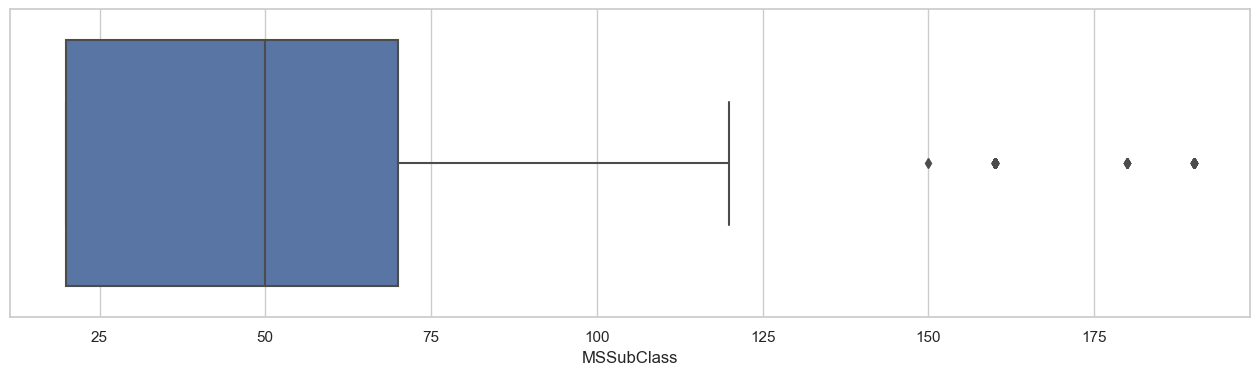

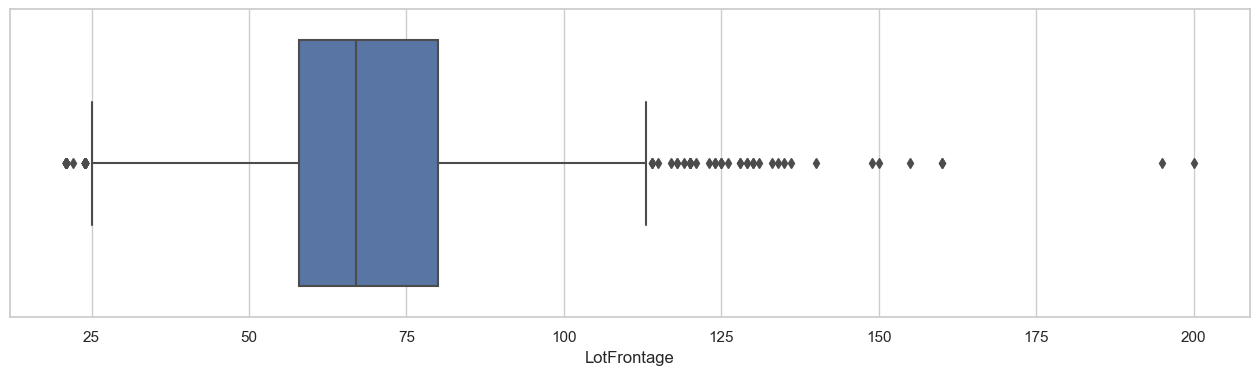

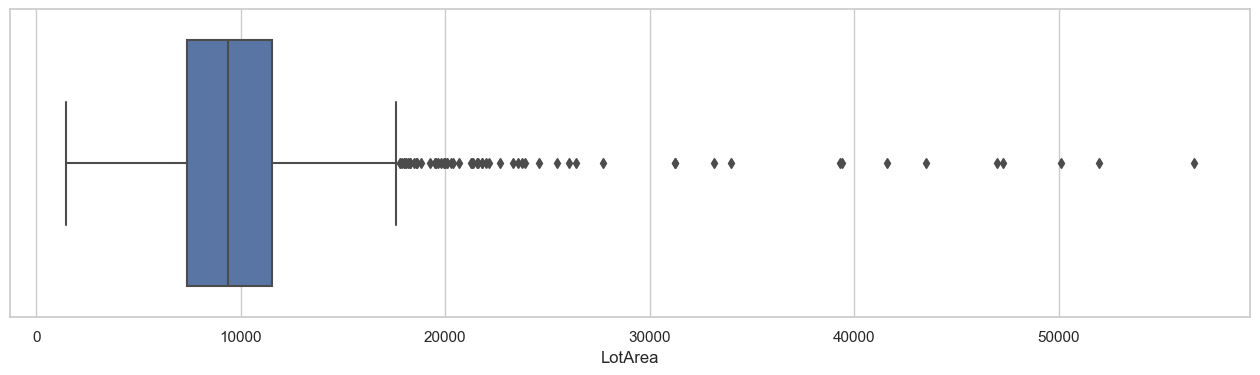

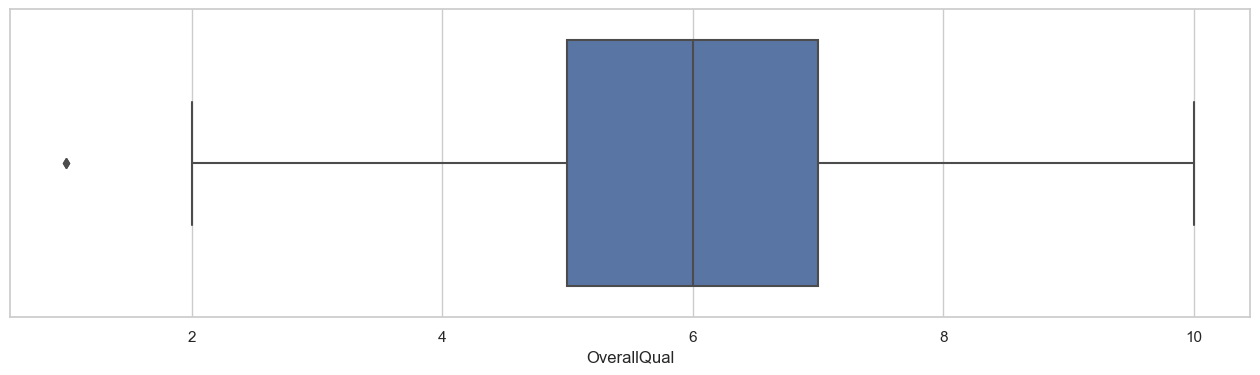

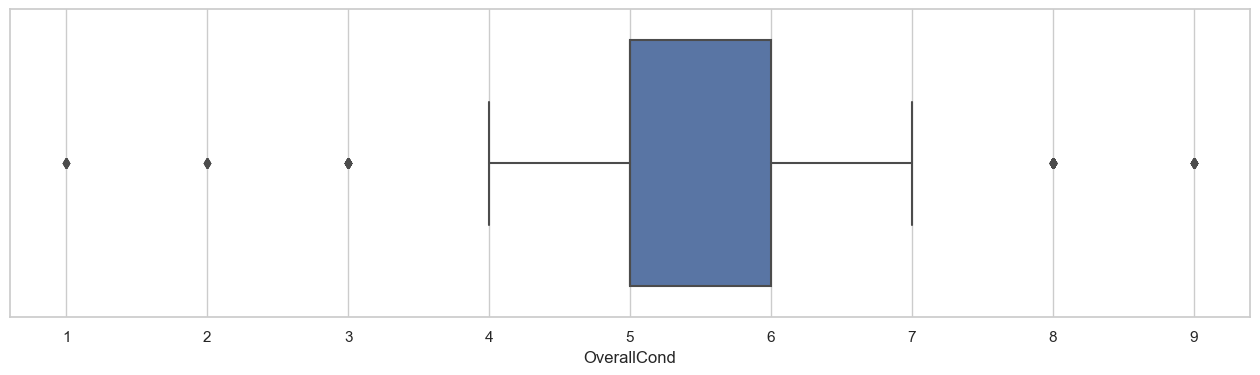

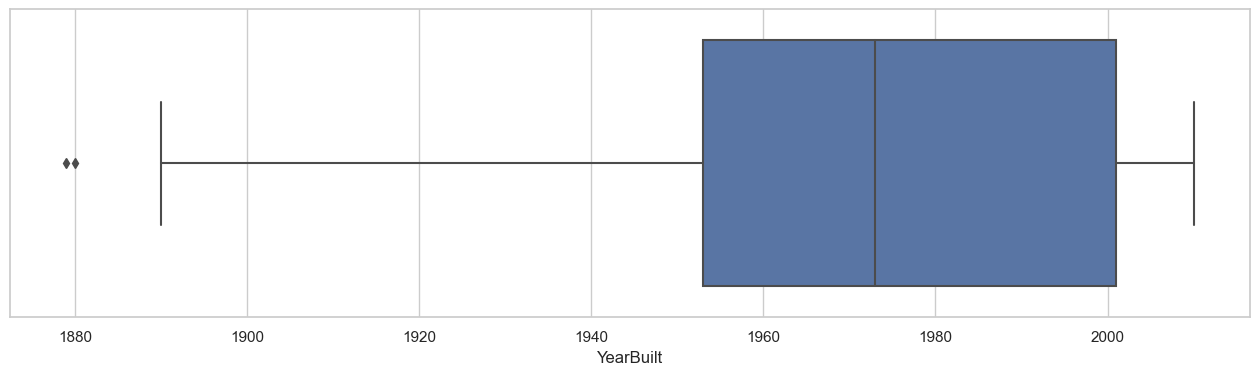

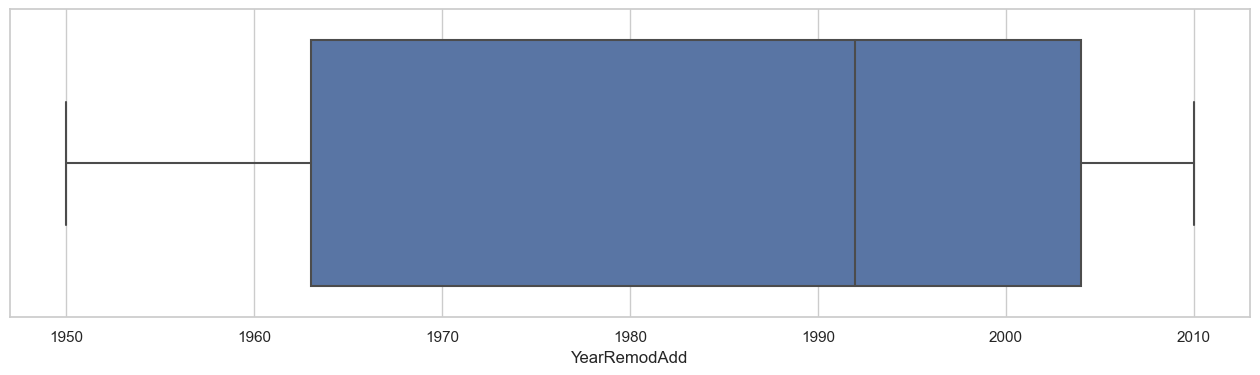

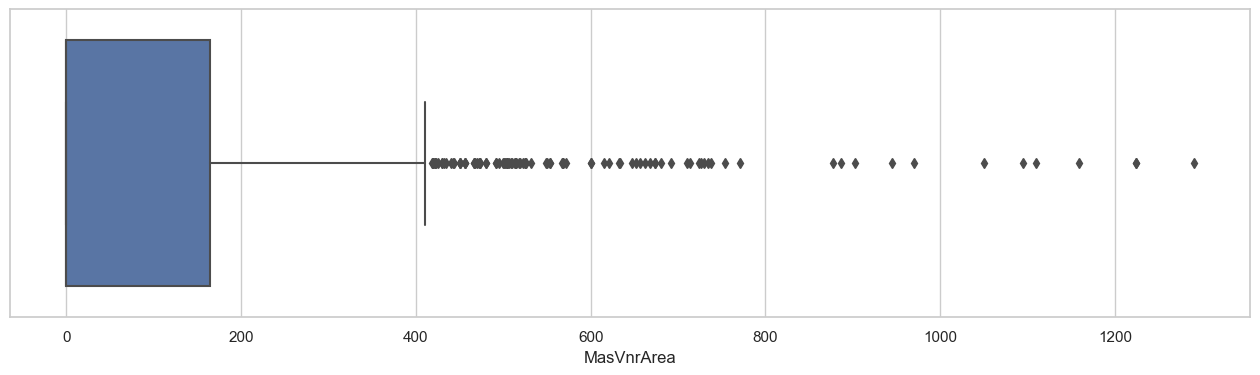

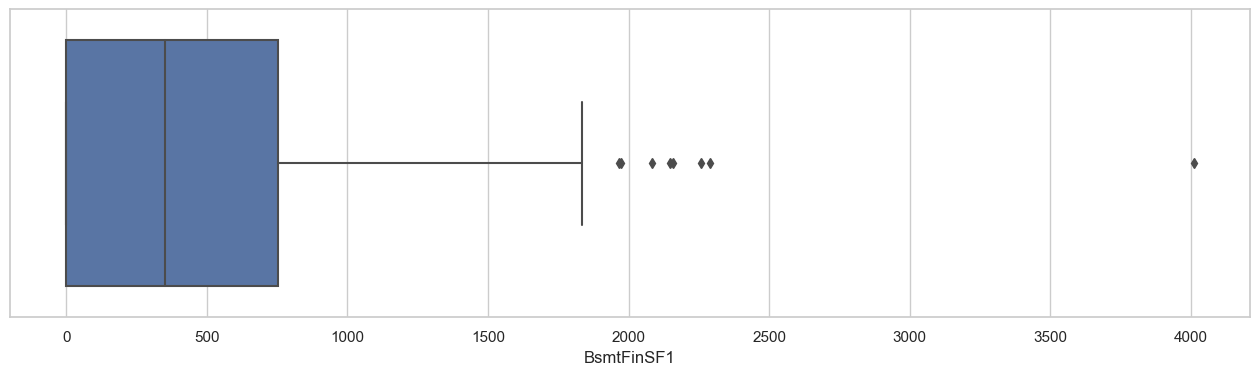

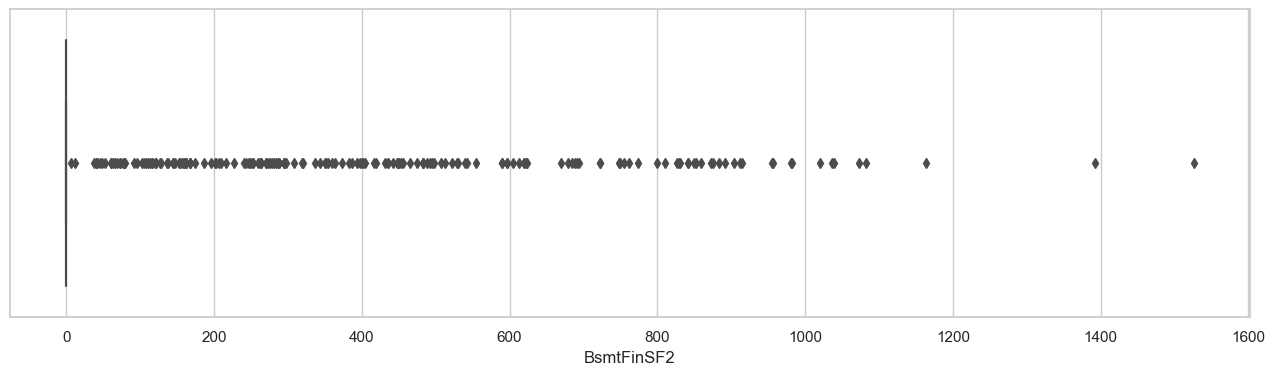

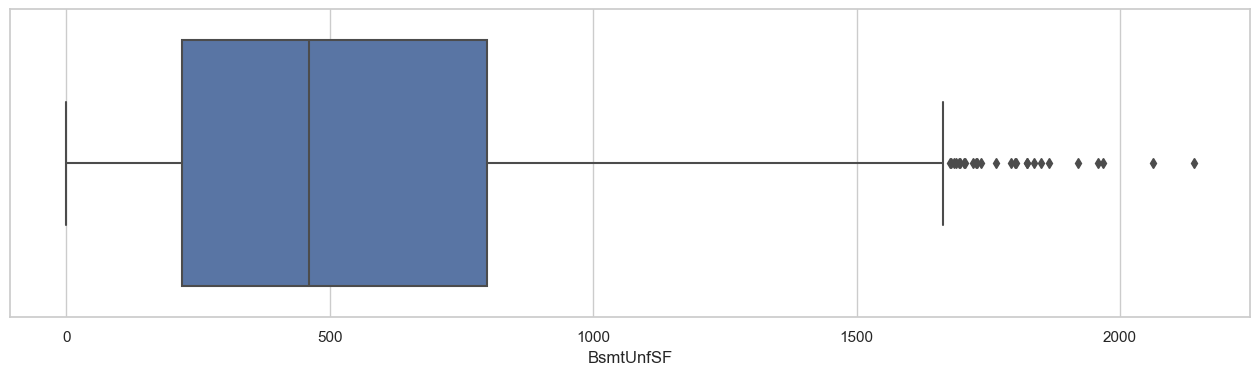

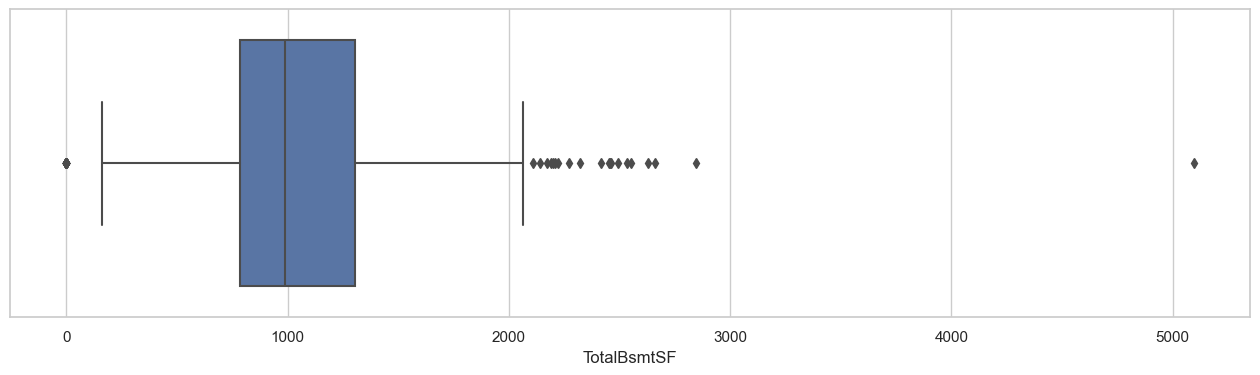

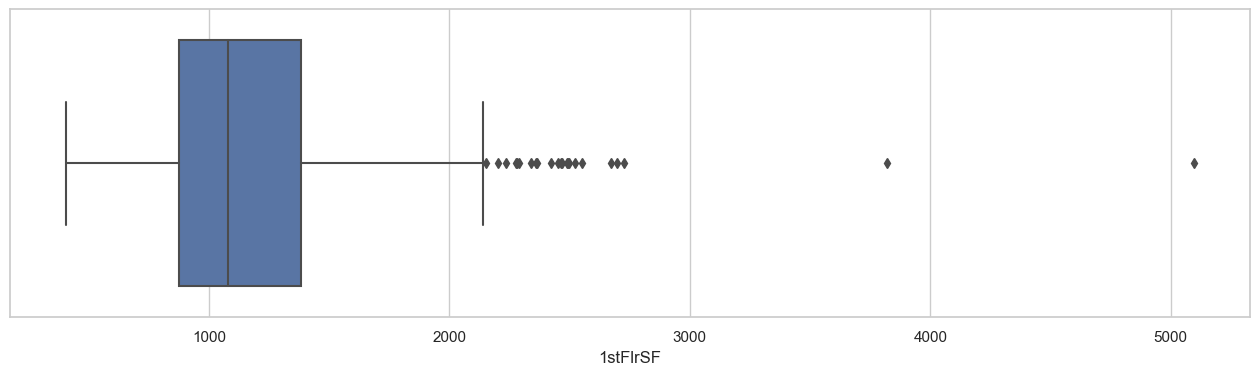

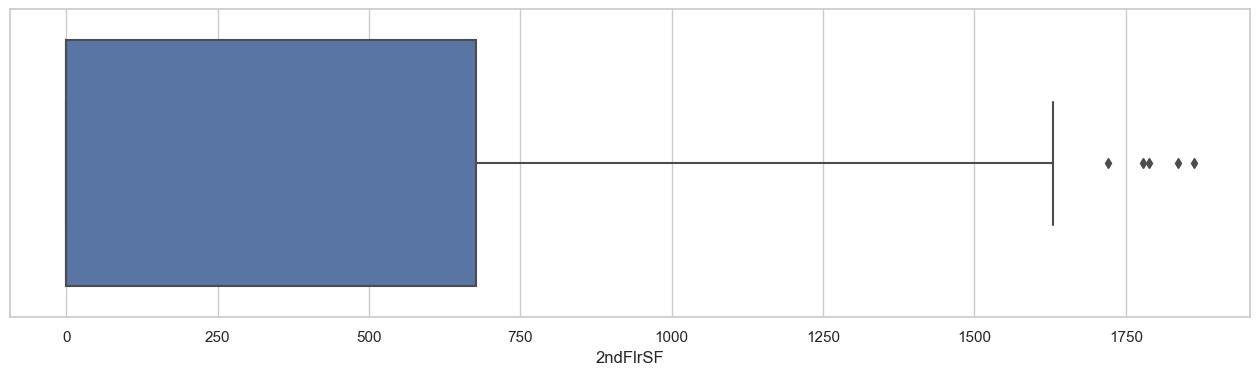

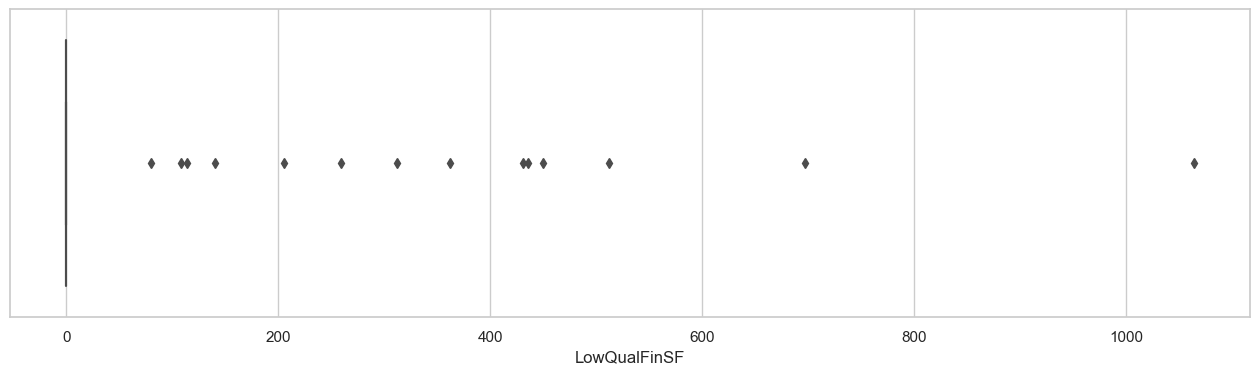

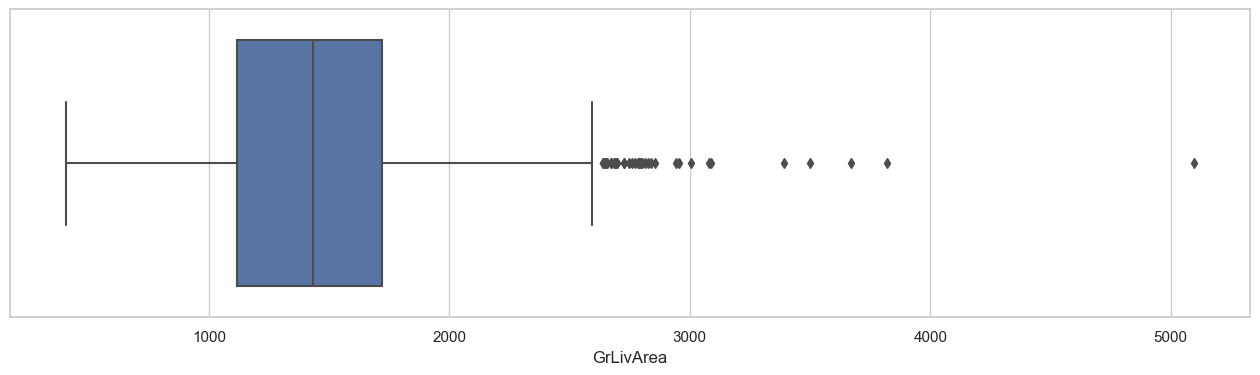

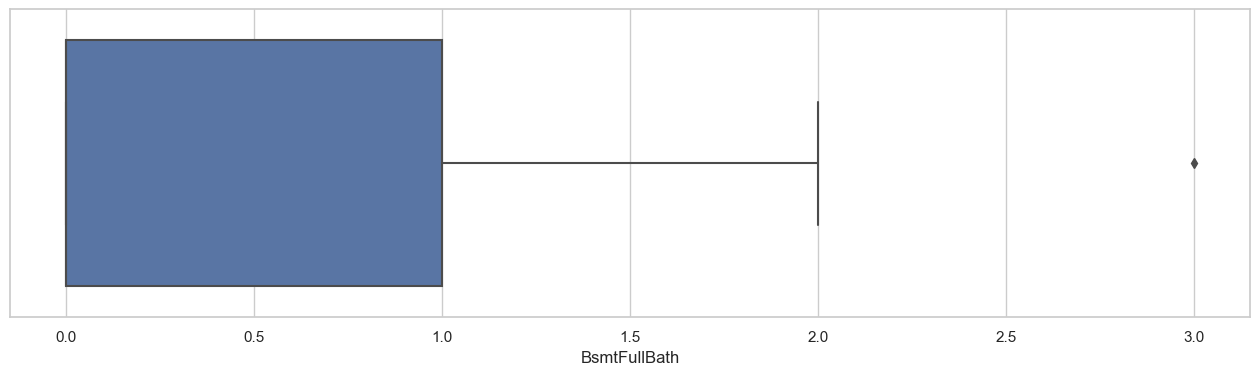

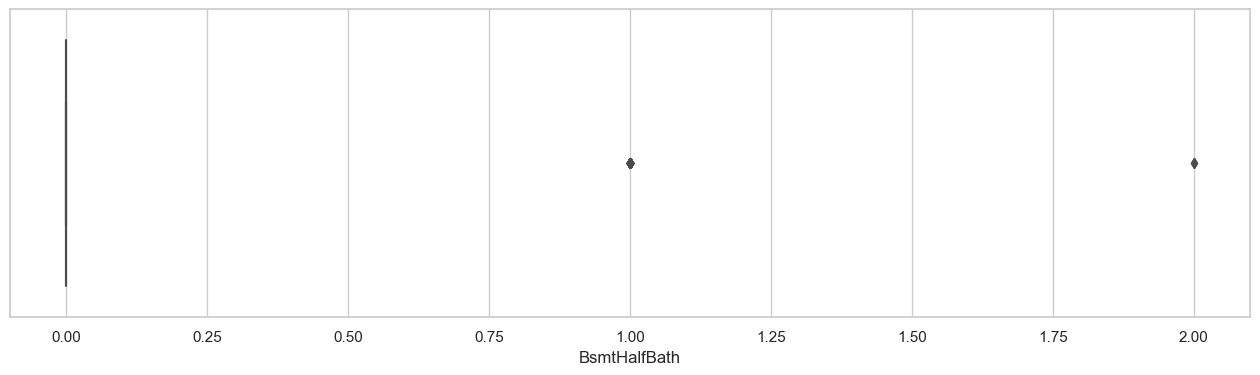

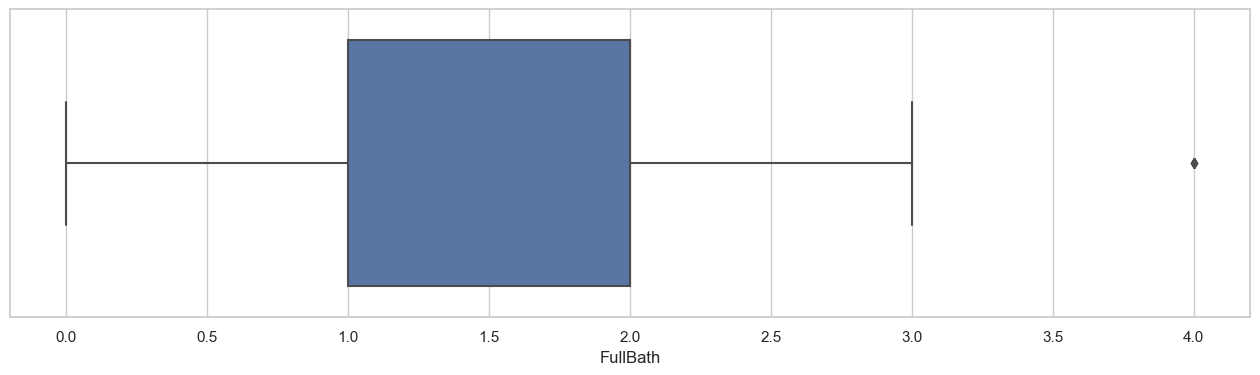

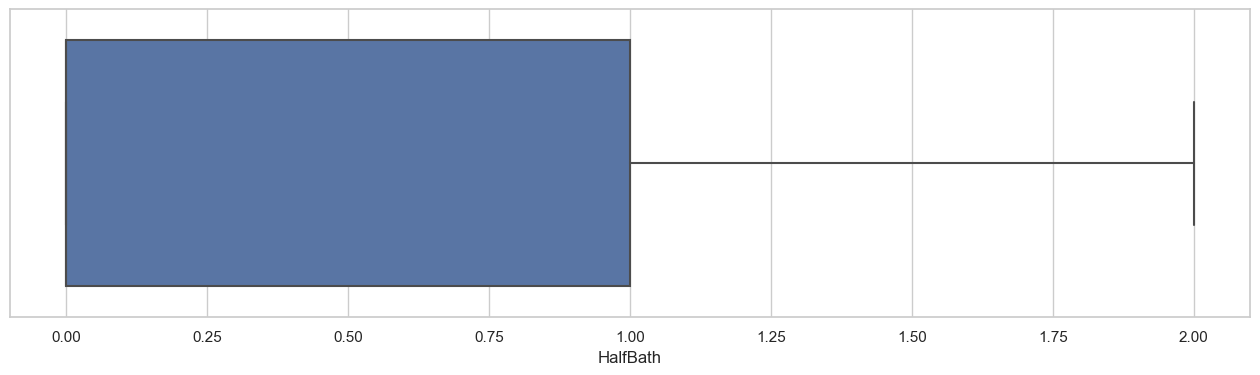

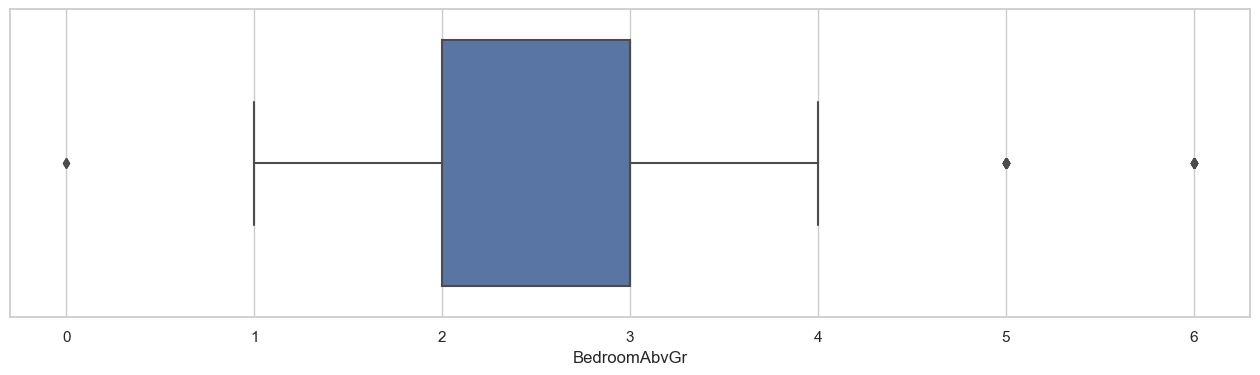

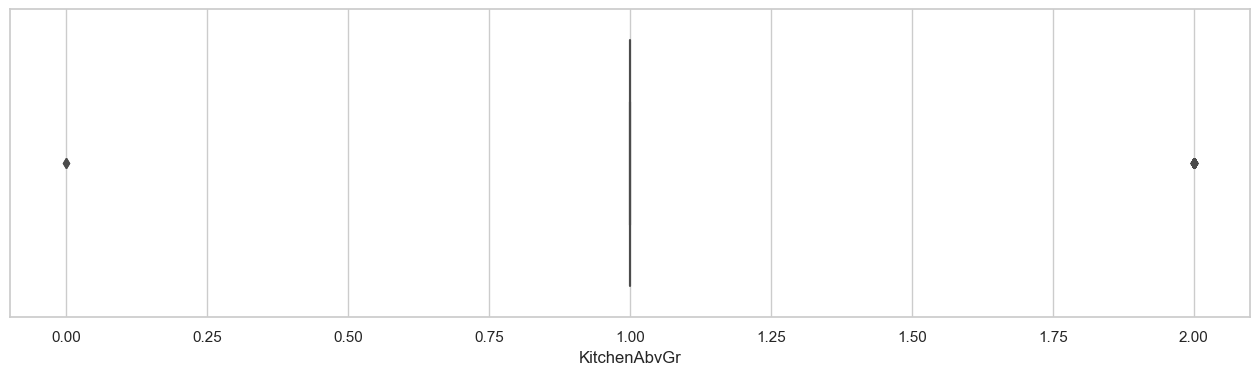

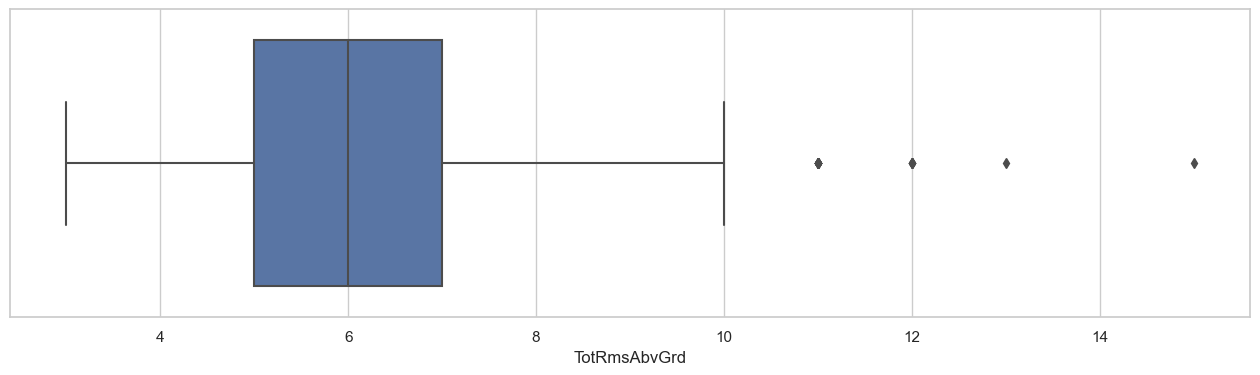

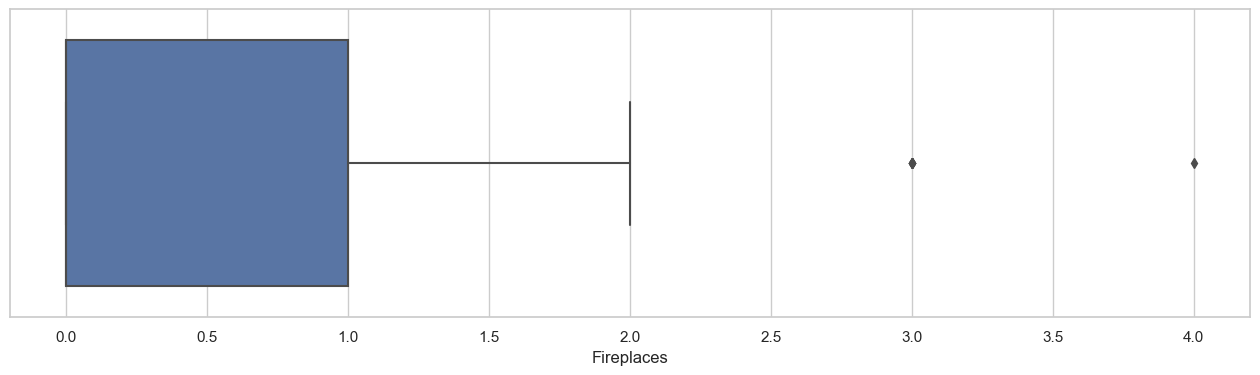

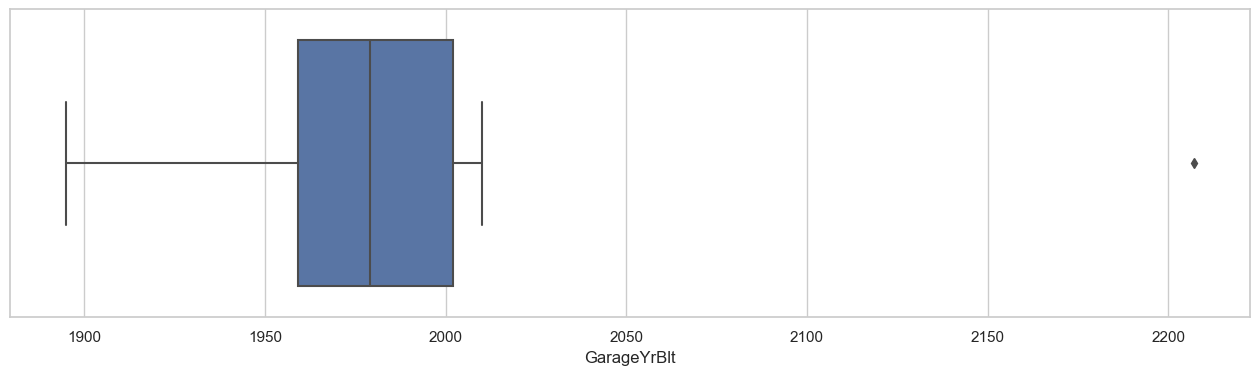

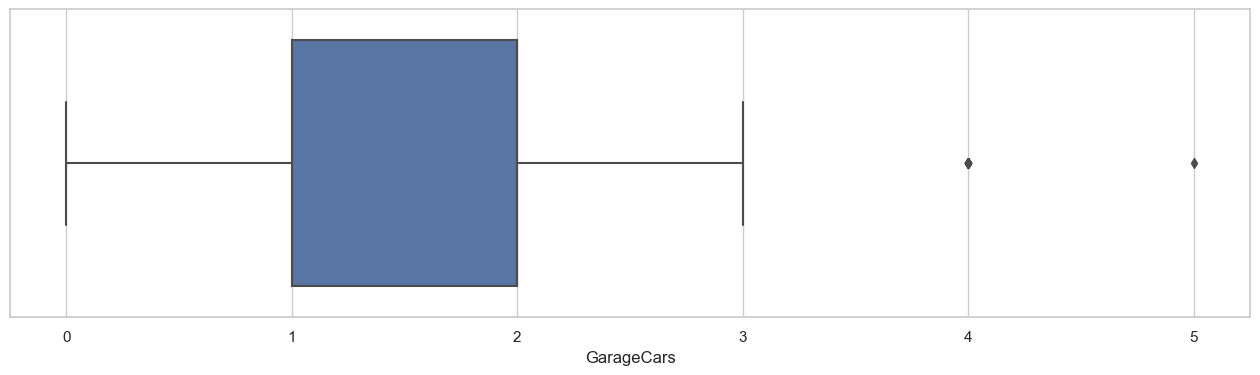

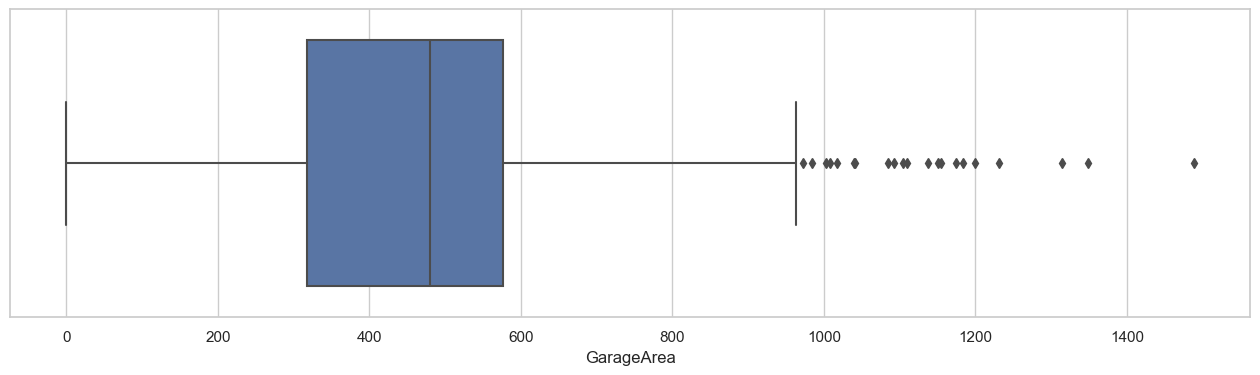

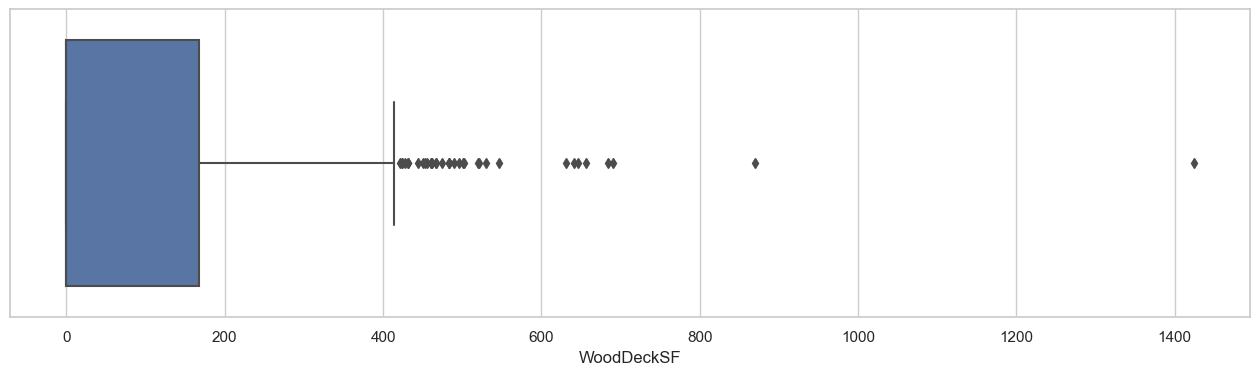

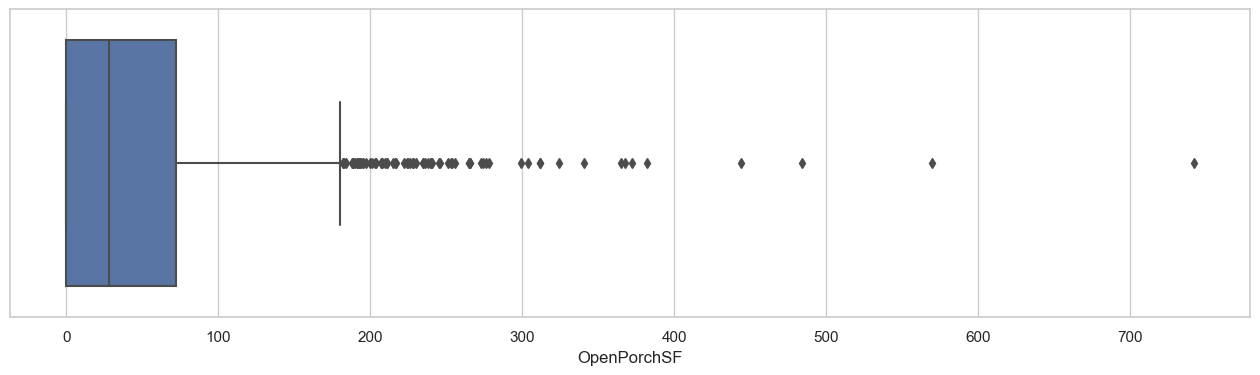

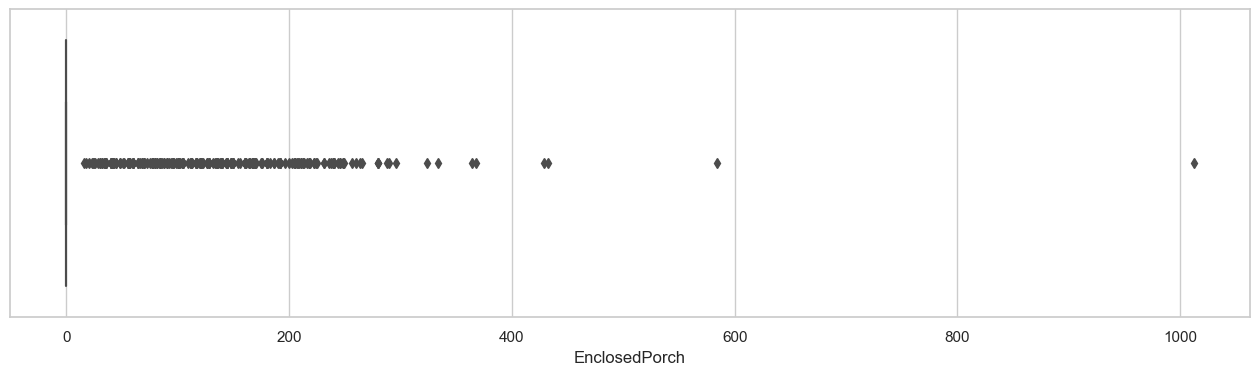

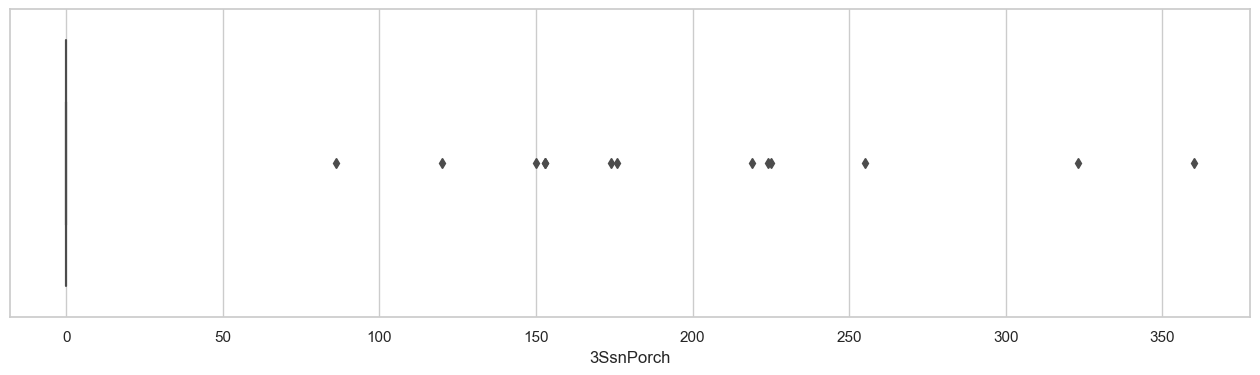

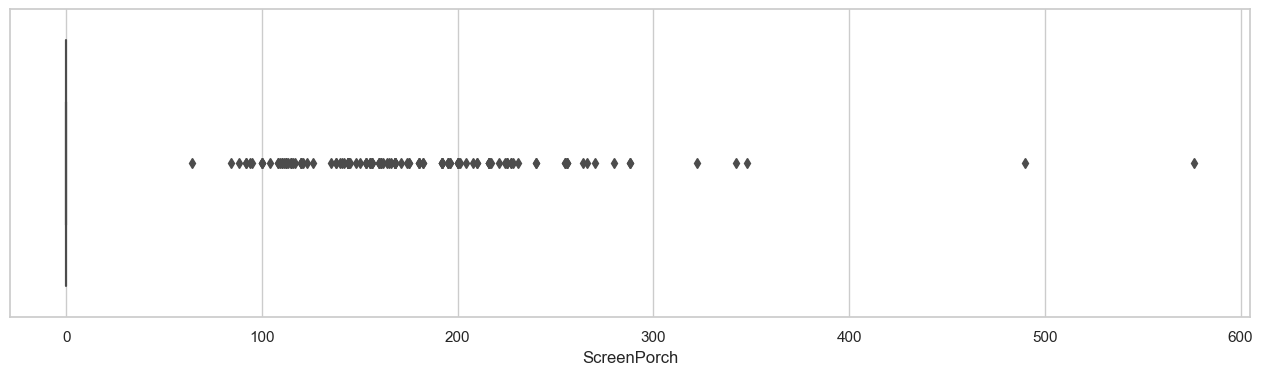

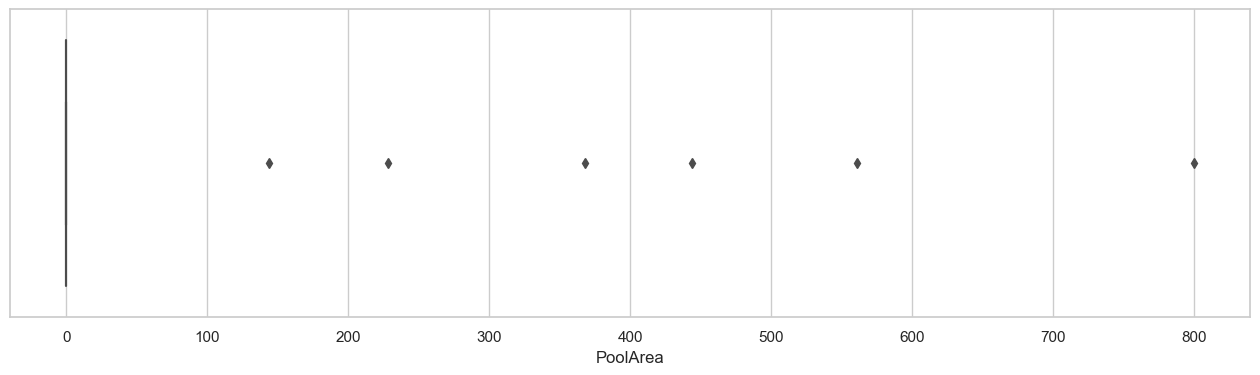

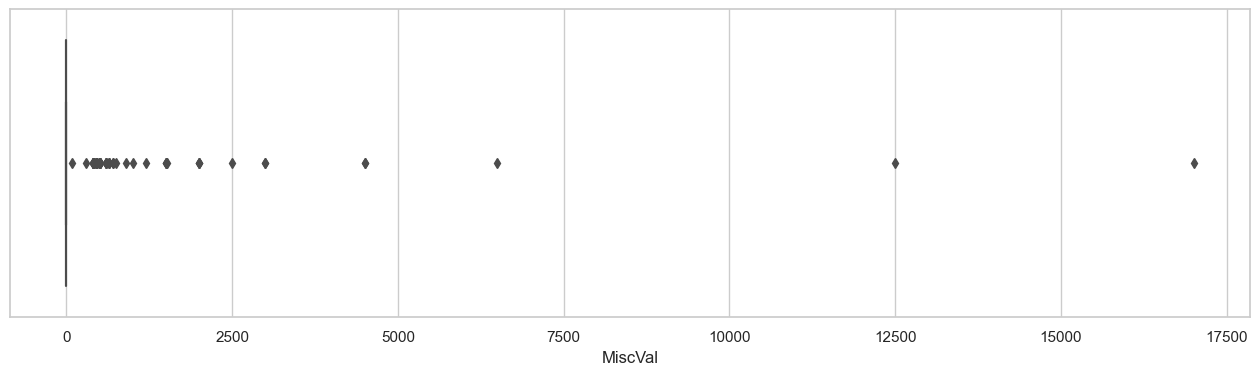

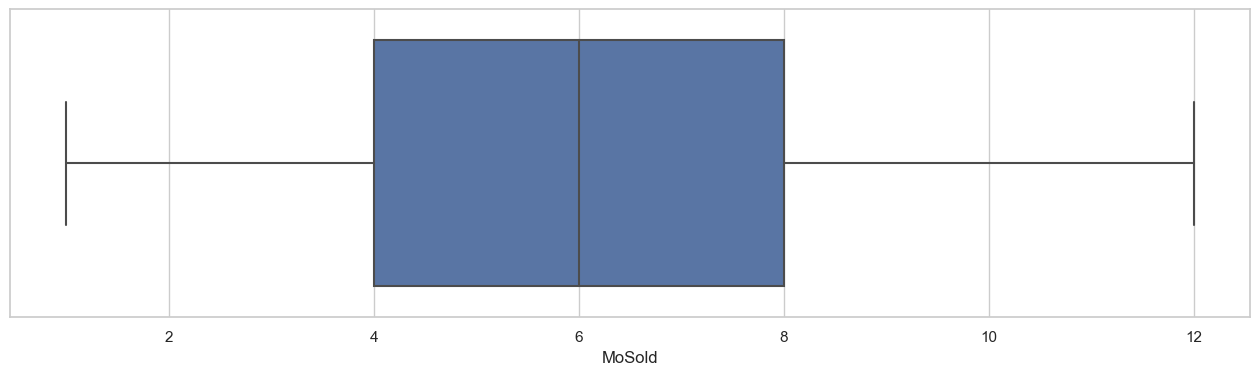

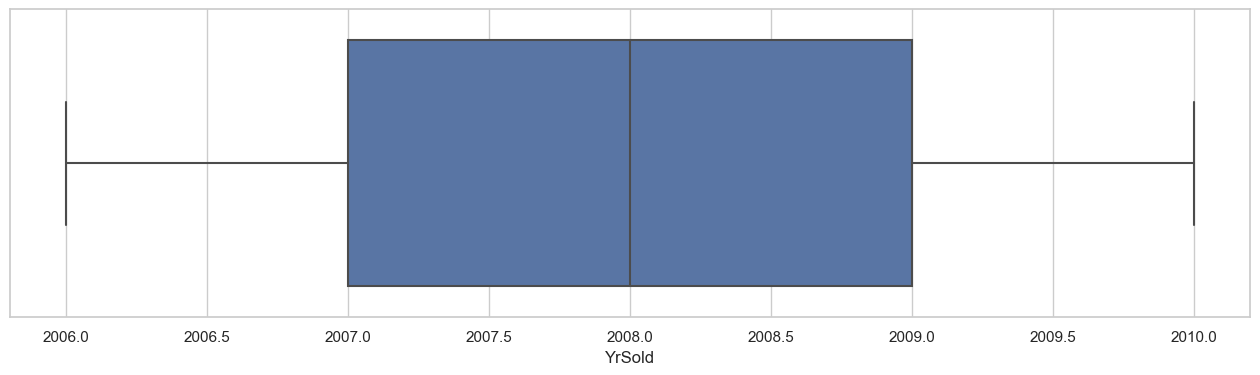

In [45]:
numerical_df = test.select_dtypes(exclude=['object'])
#numerical_df = numerical_df.drop(["Id"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\si

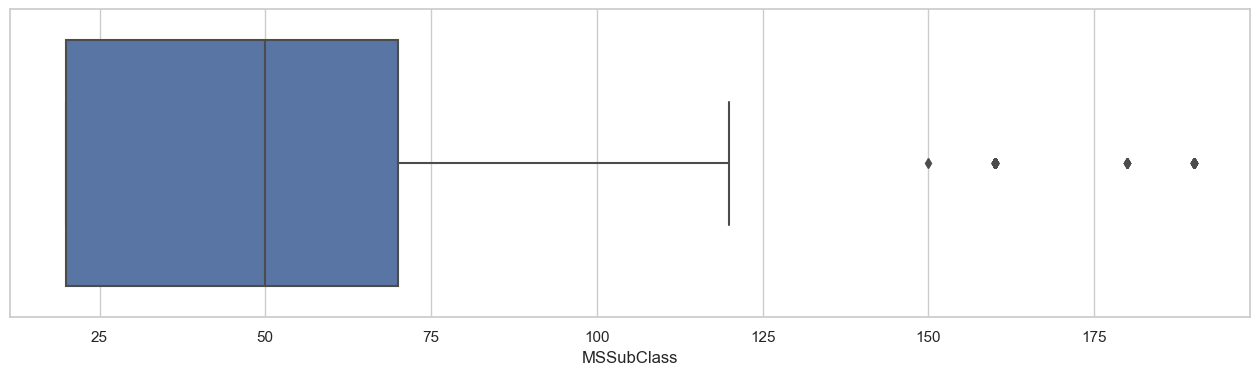

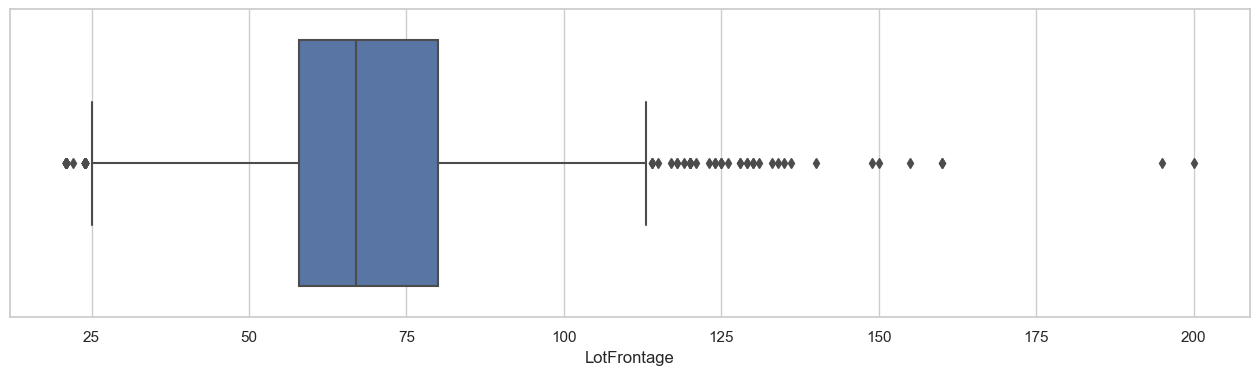

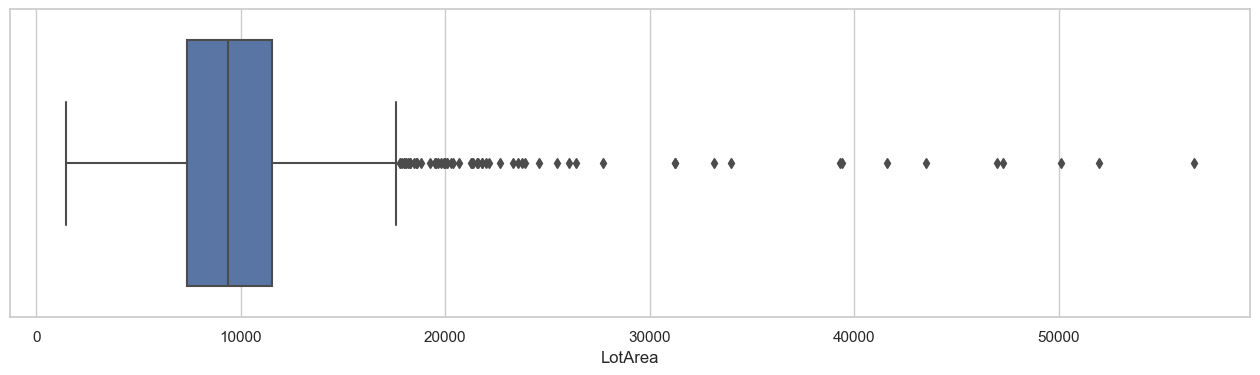

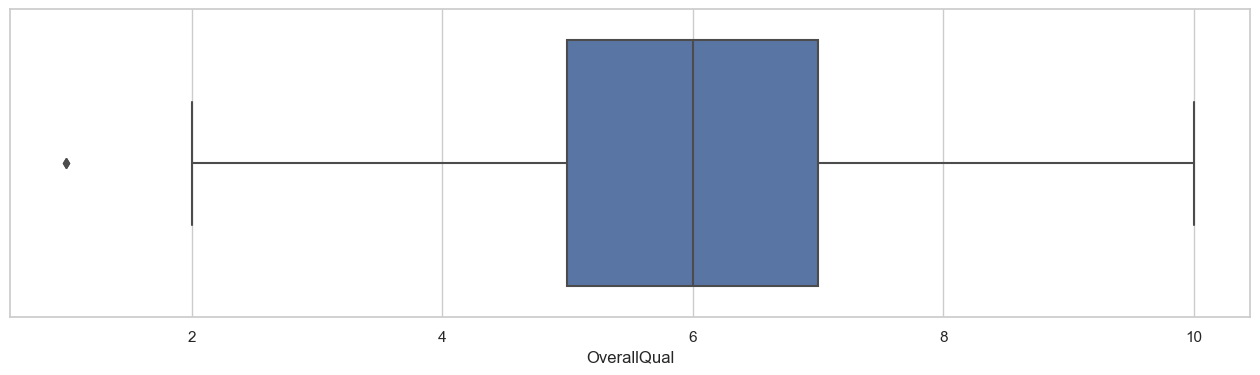

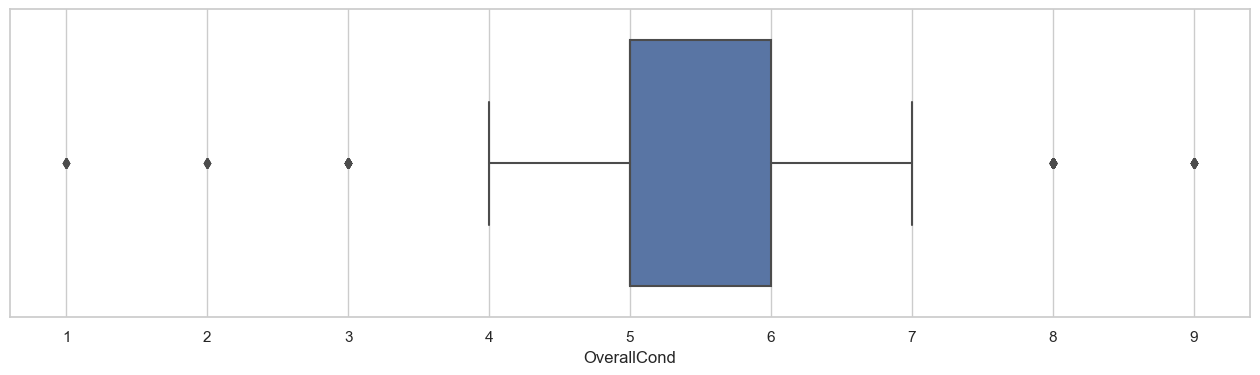

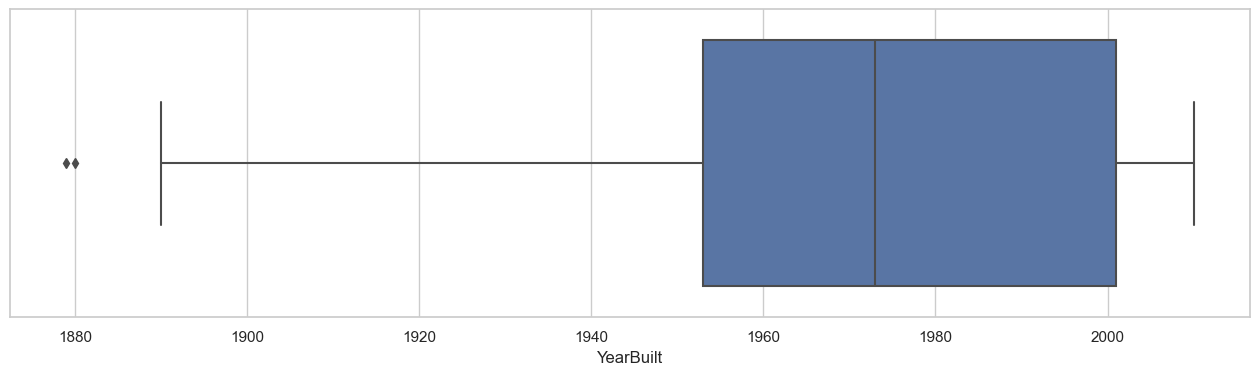

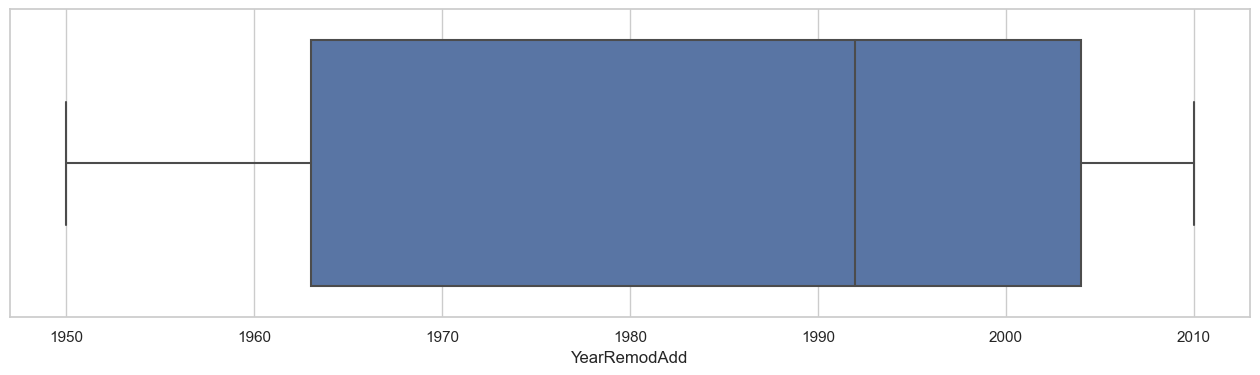

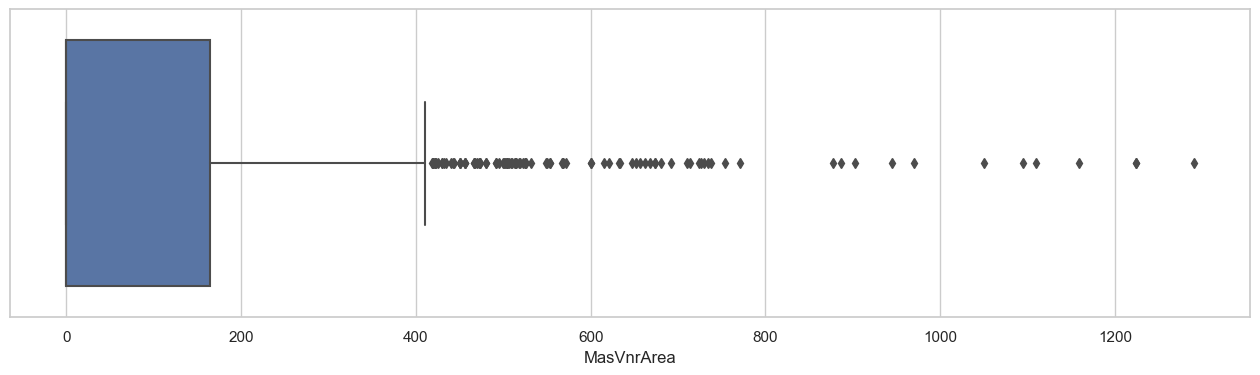

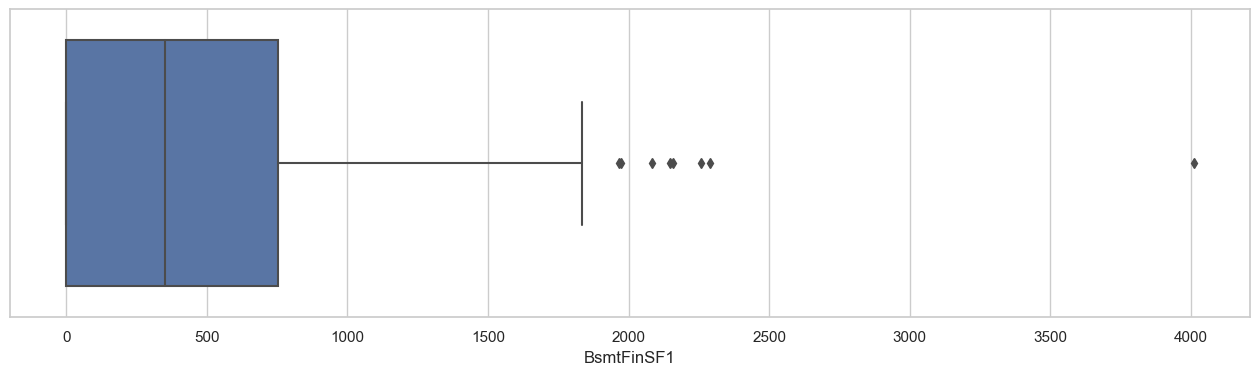

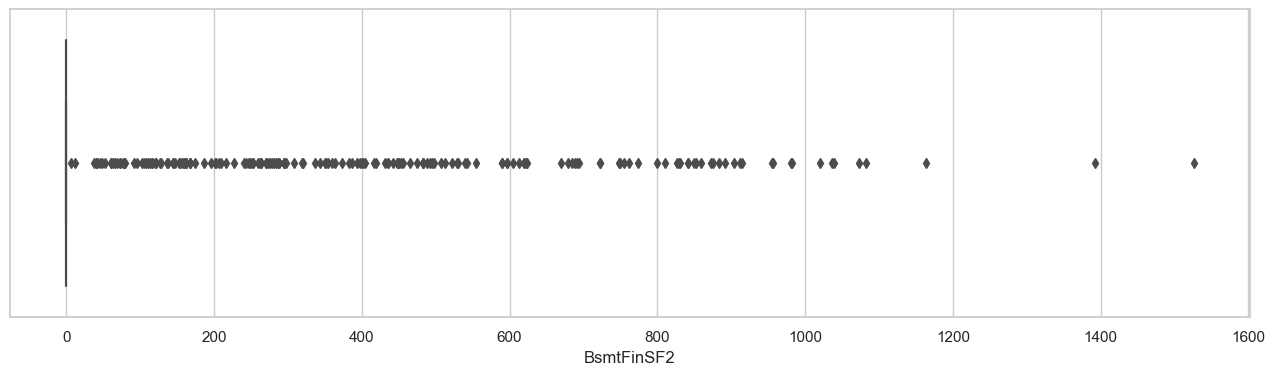

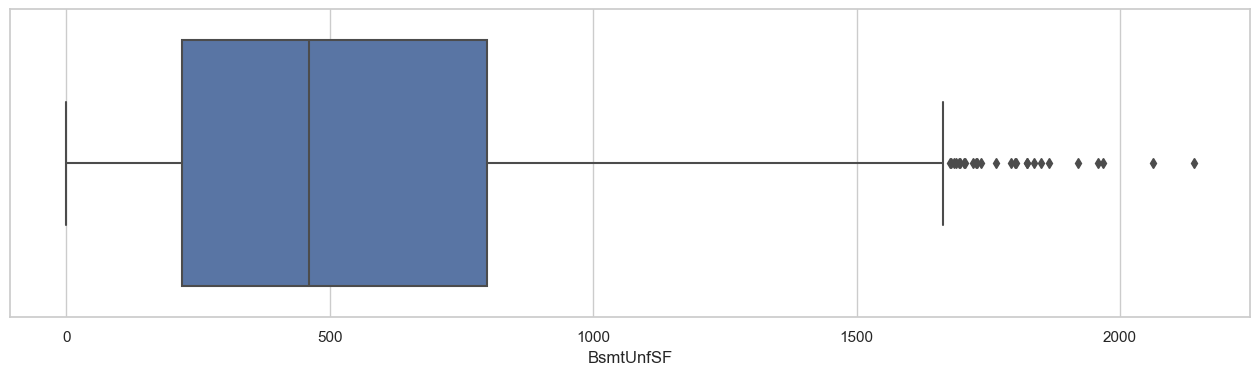

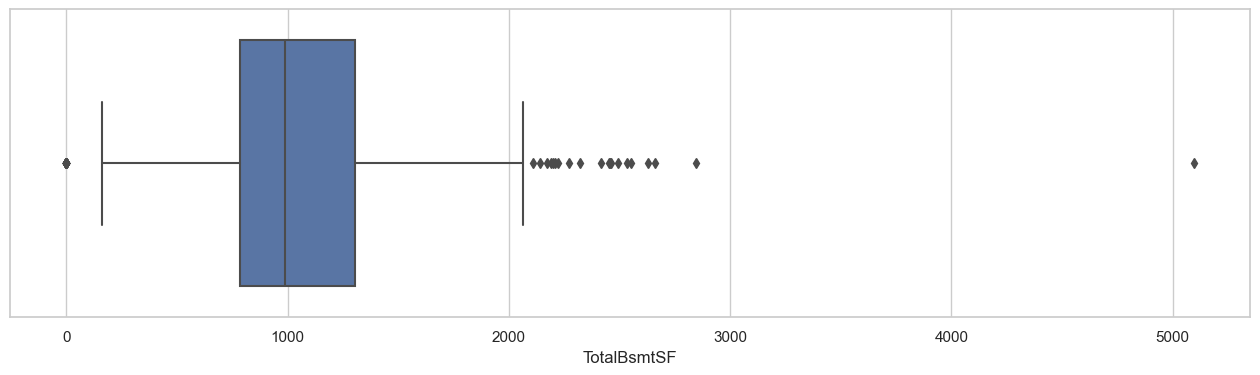

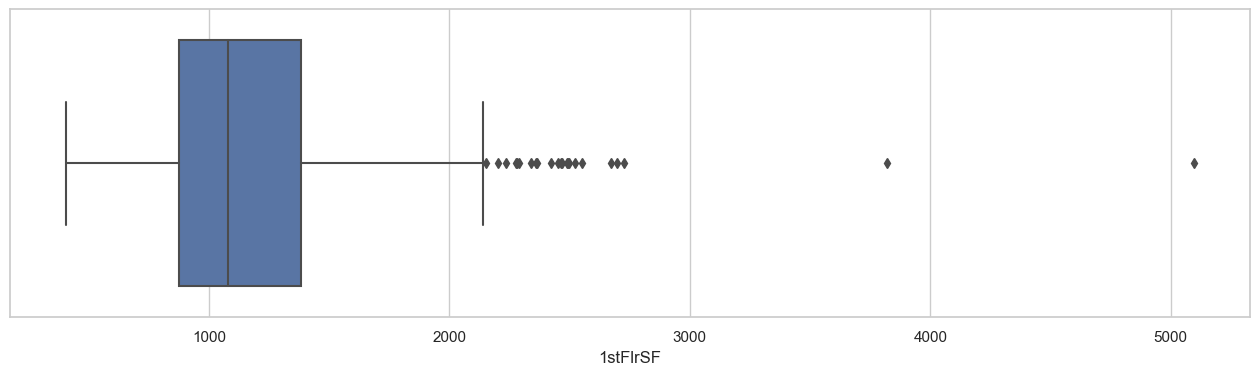

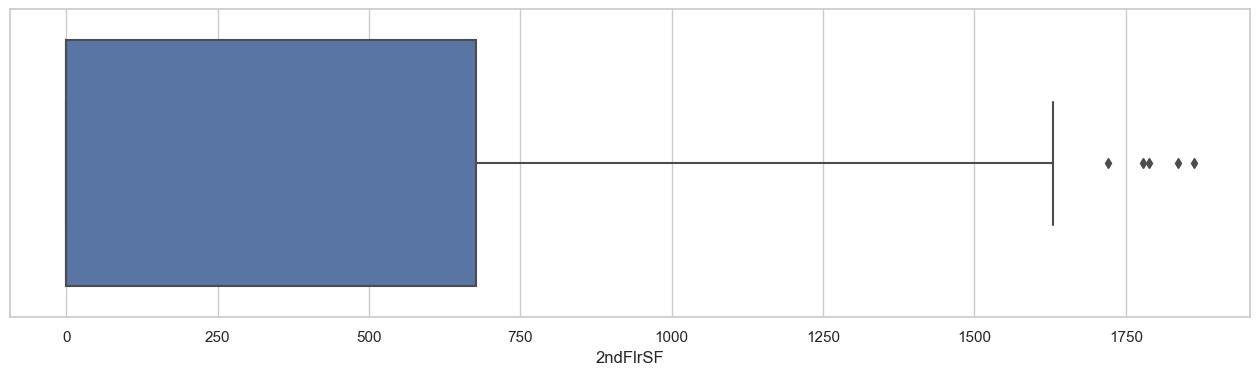

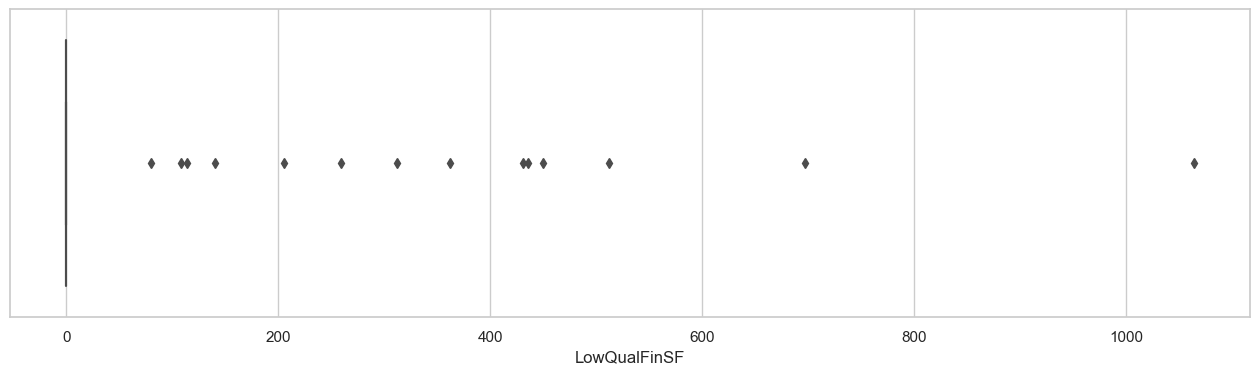

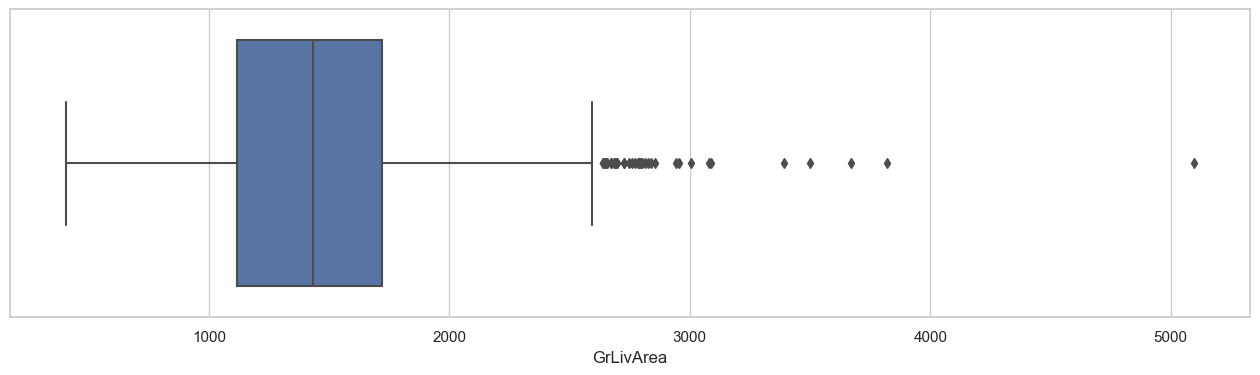

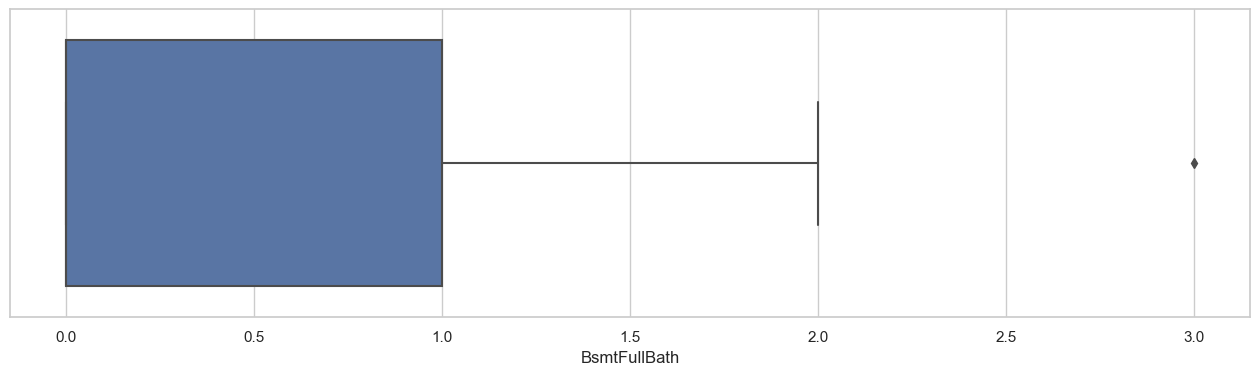

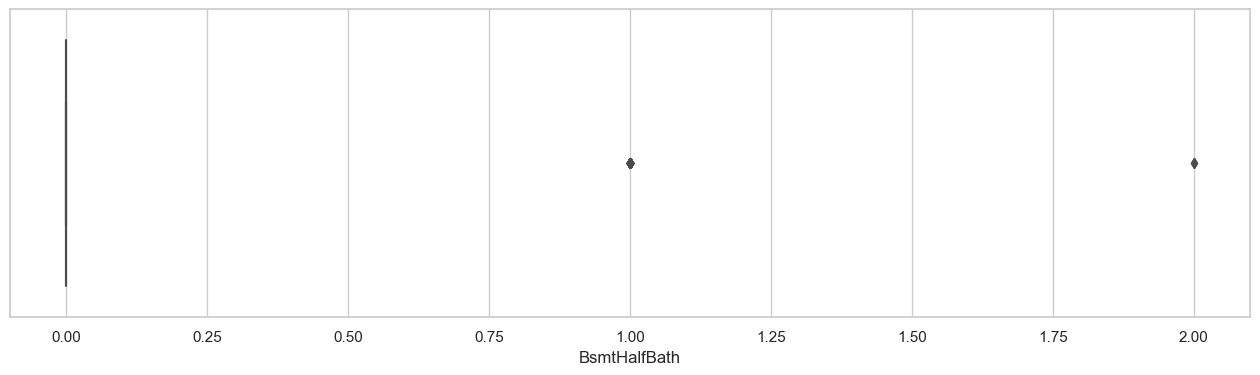

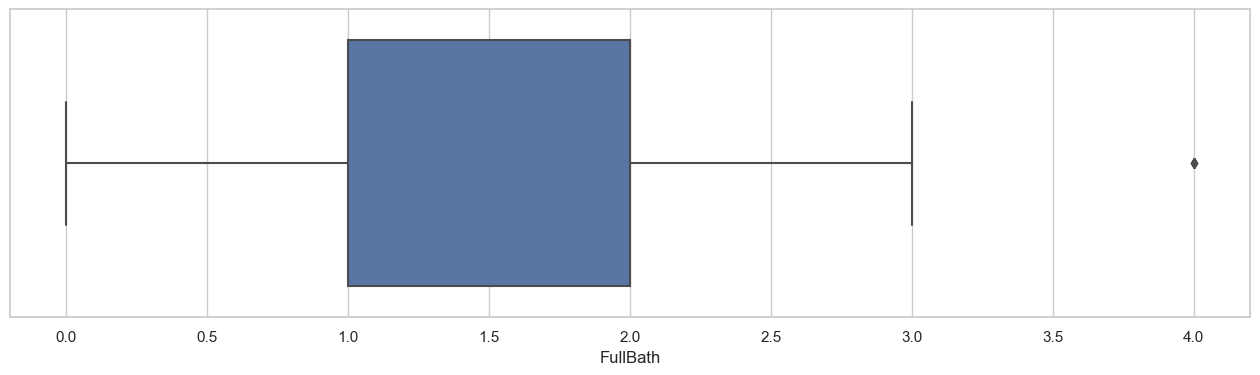

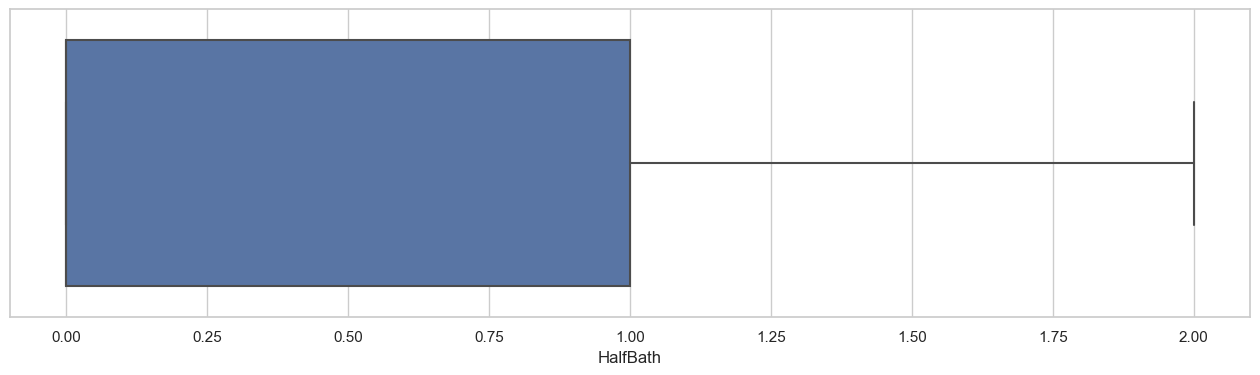

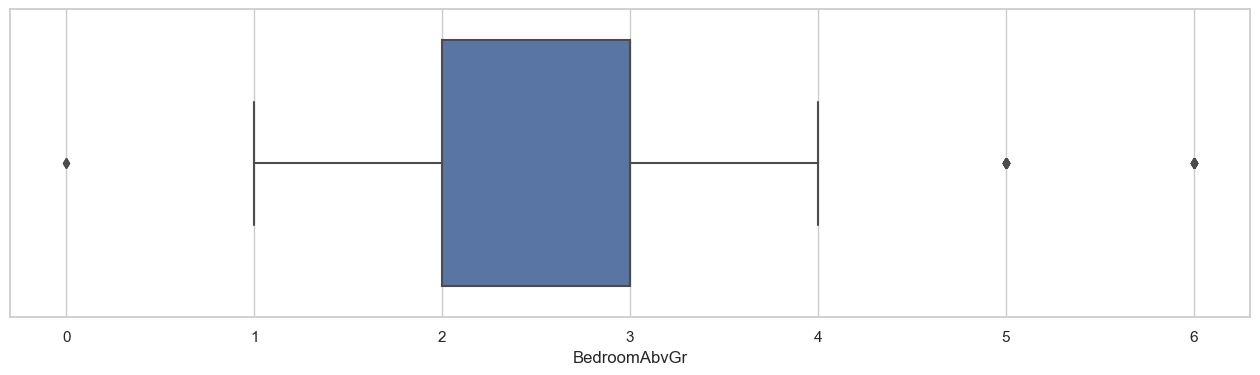

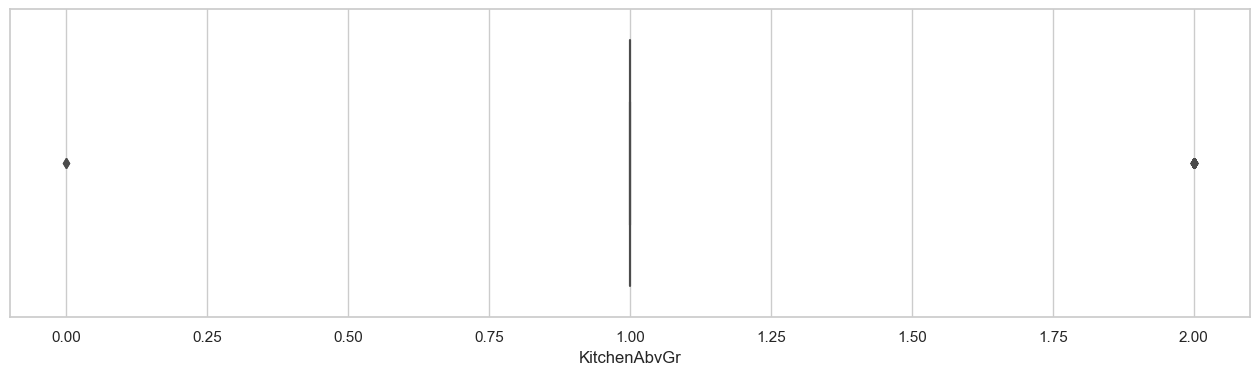

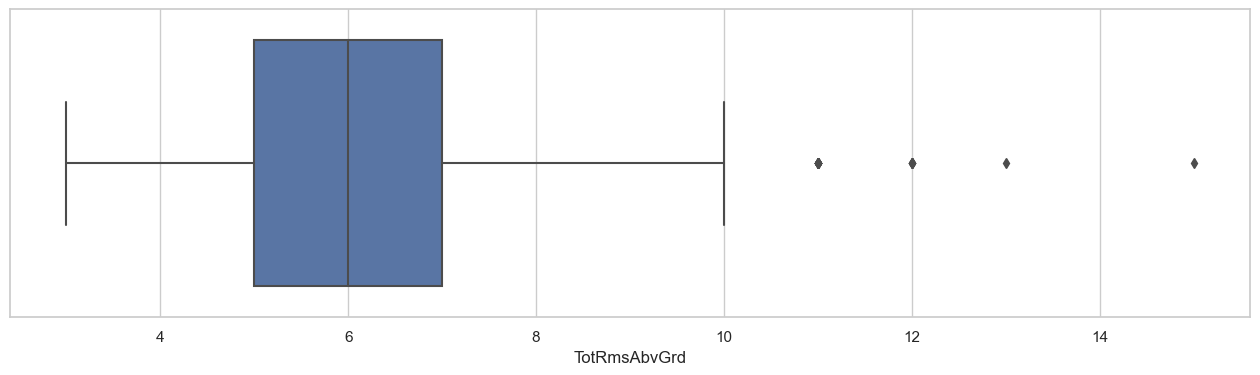

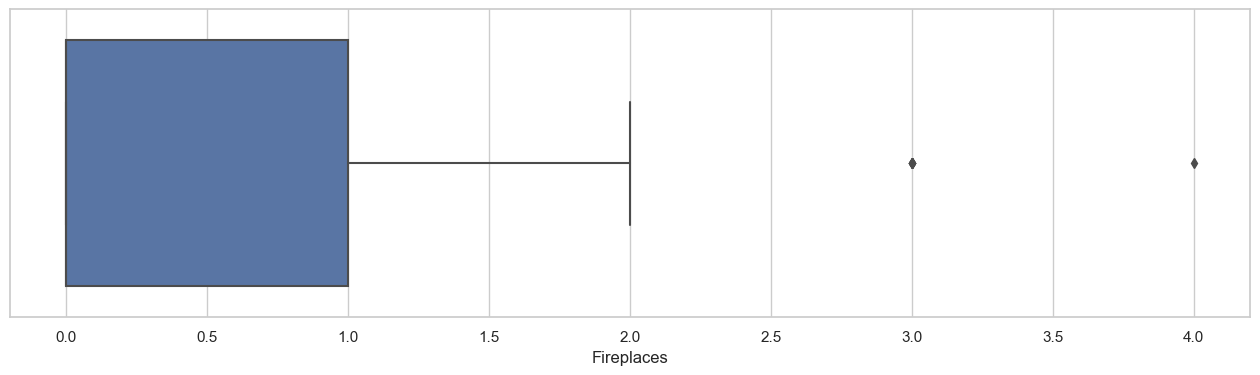

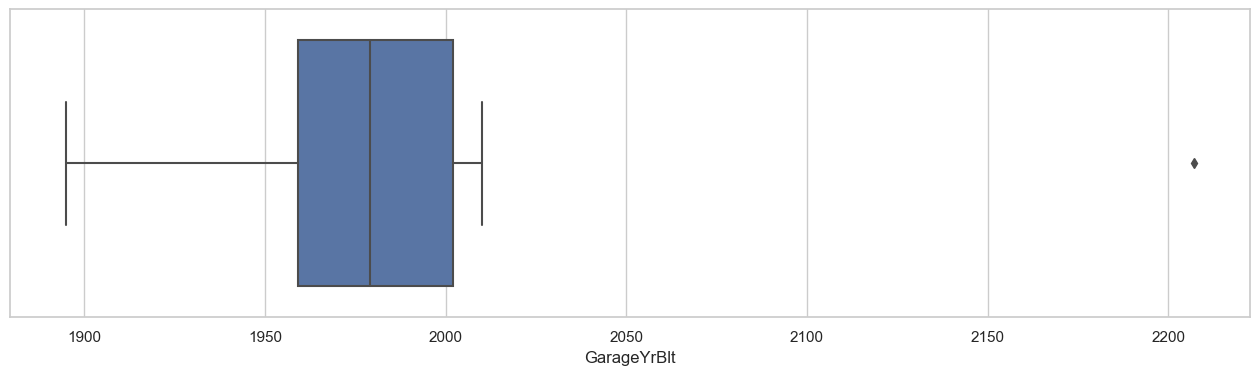

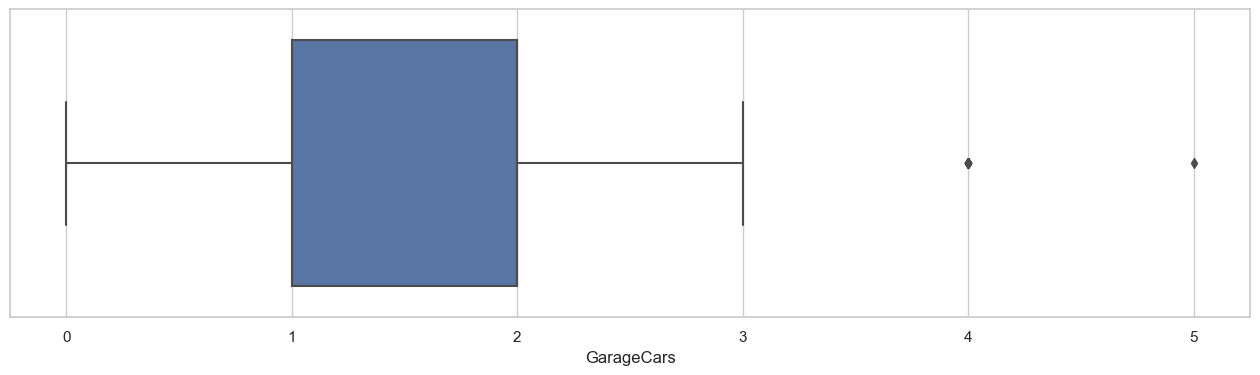

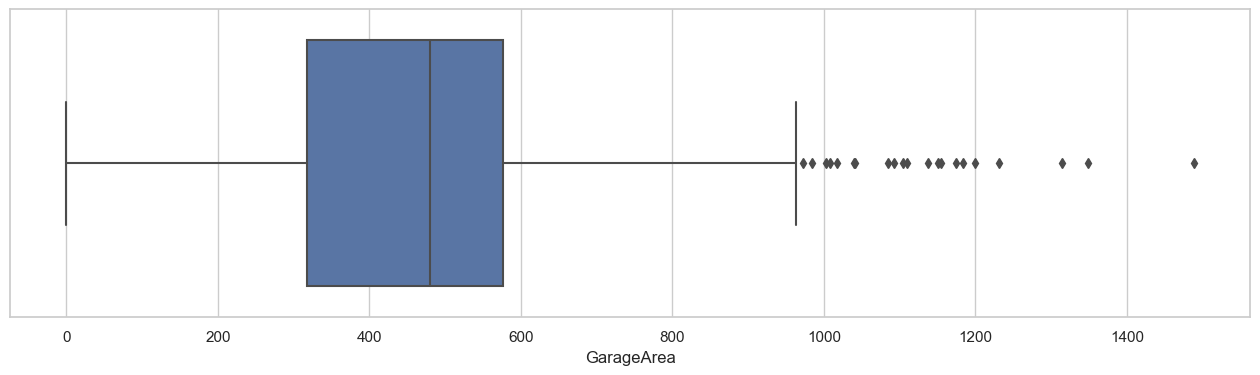

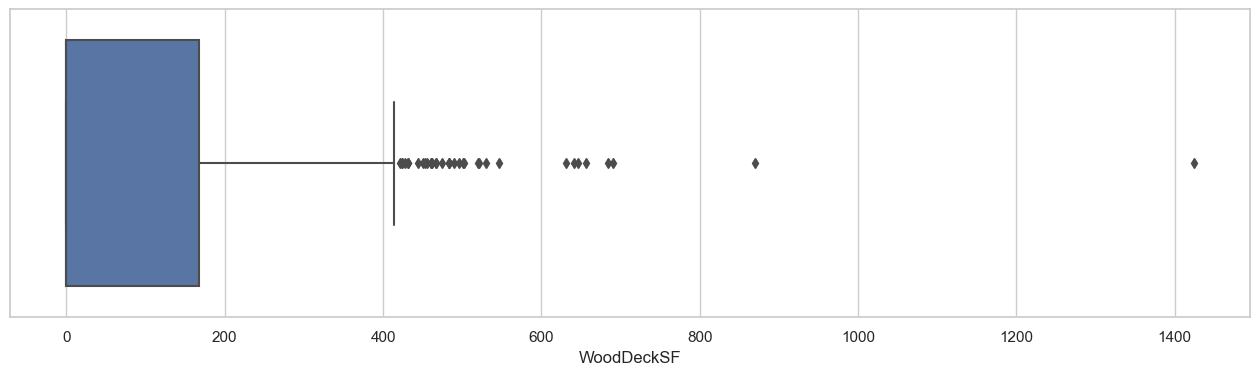

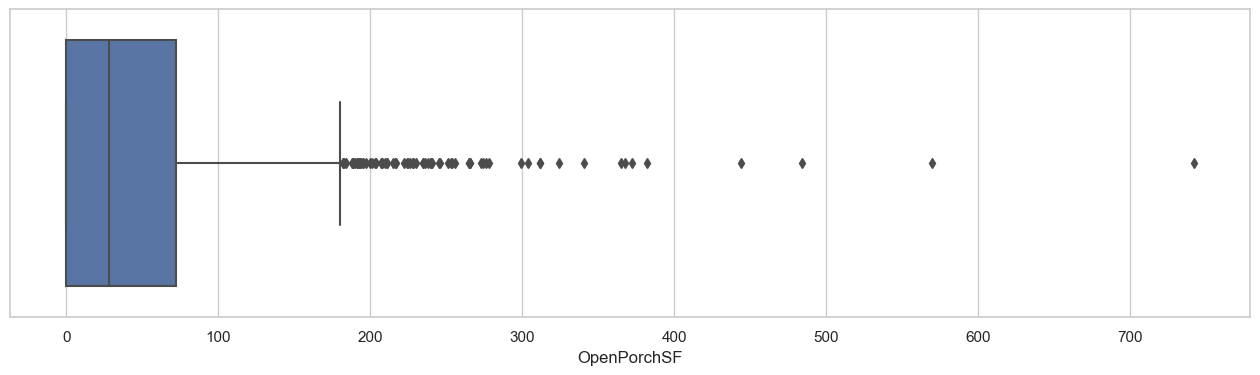

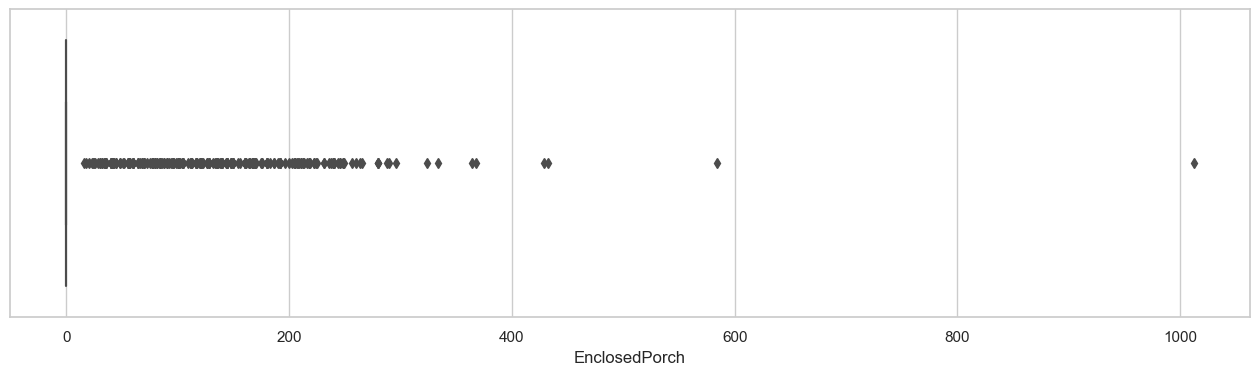

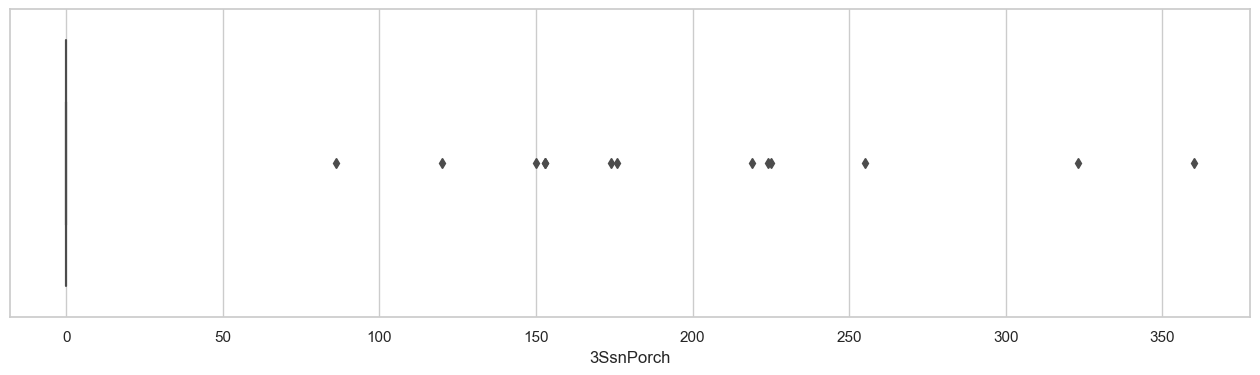

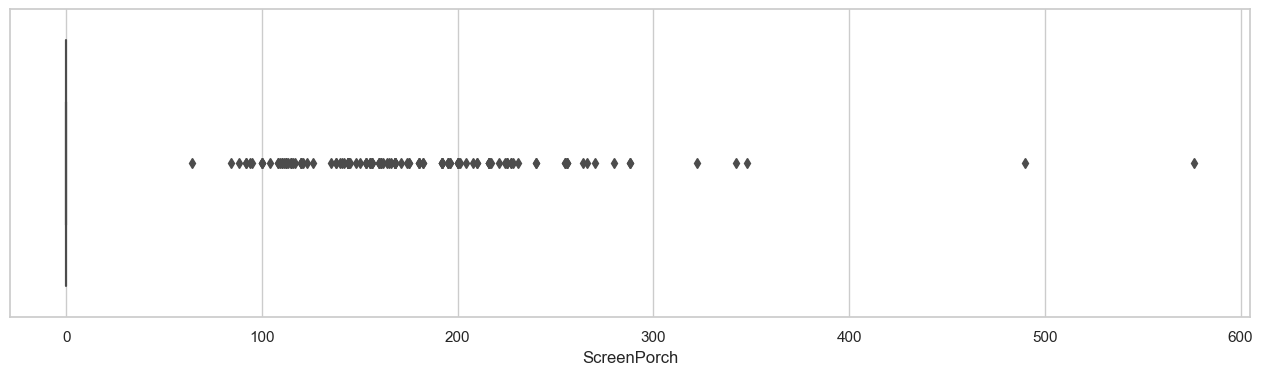

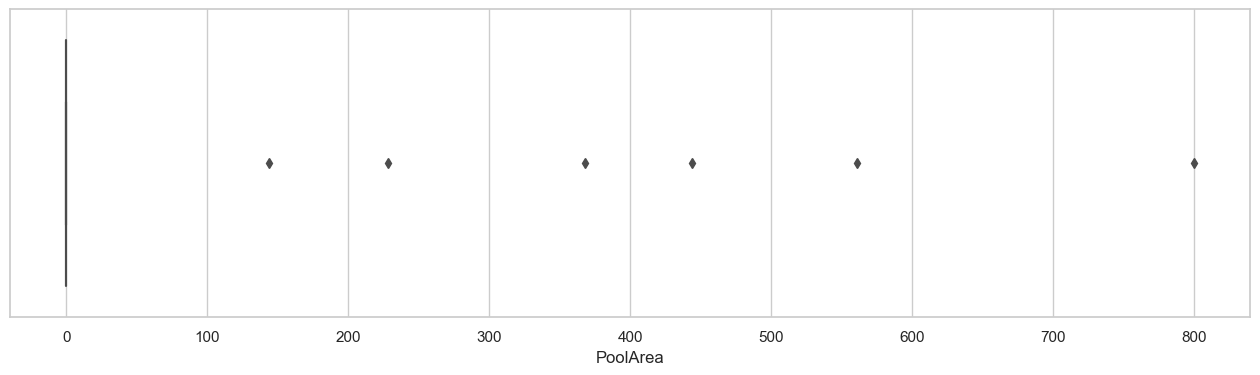

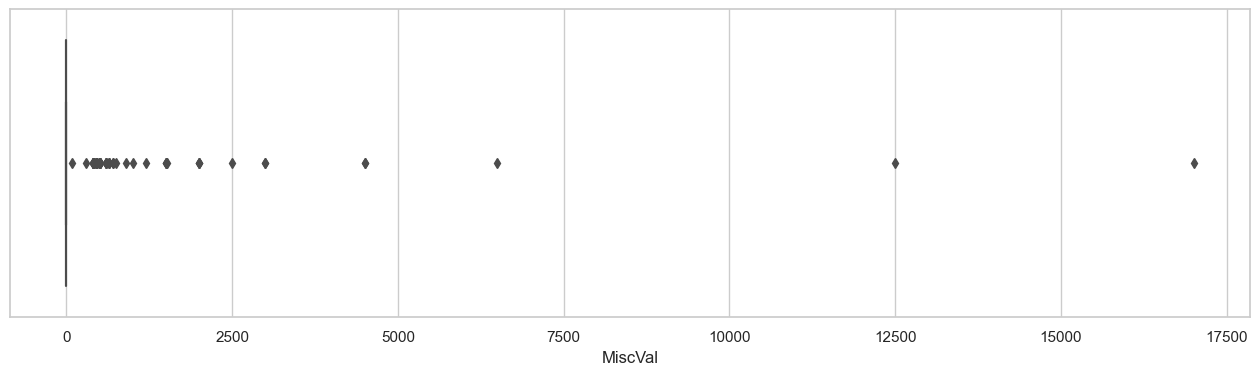

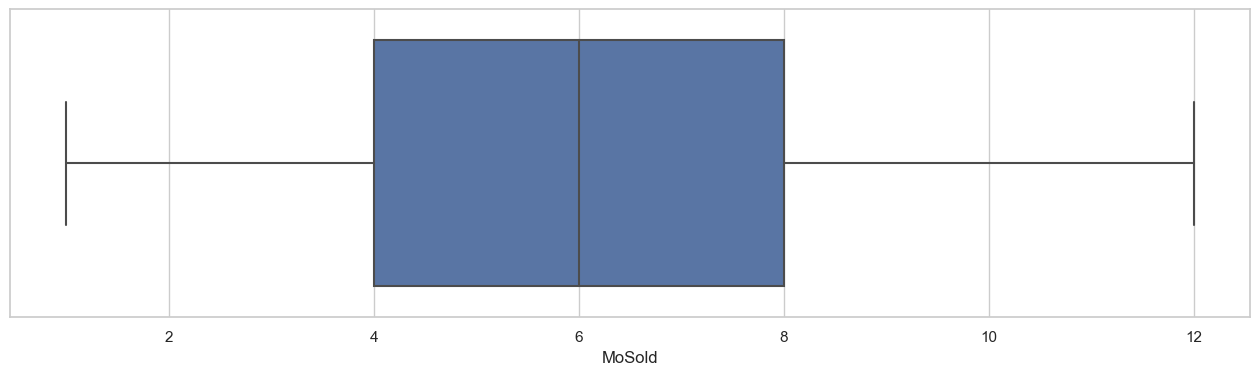

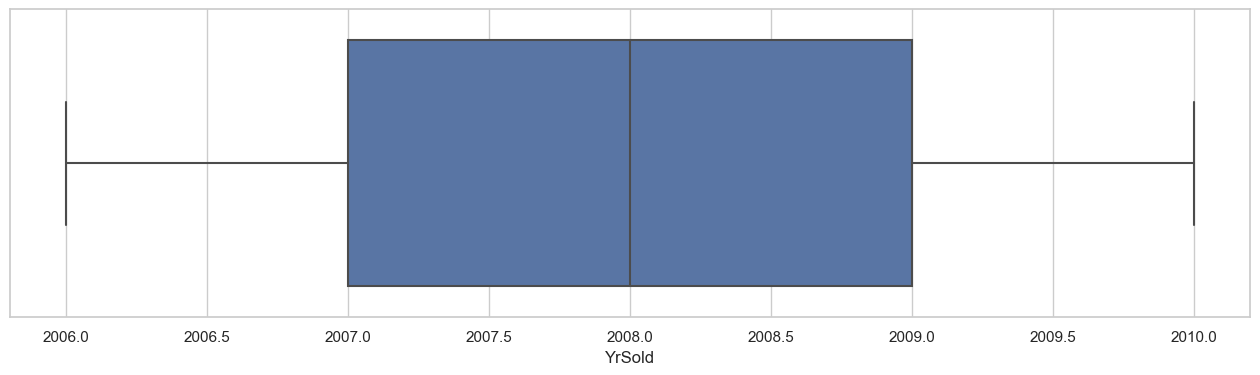

In [ ]:
numerical_df = test.select_dtypes(exclude=['object'])
#numerical_df = numerical_df.drop(["Id"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\si

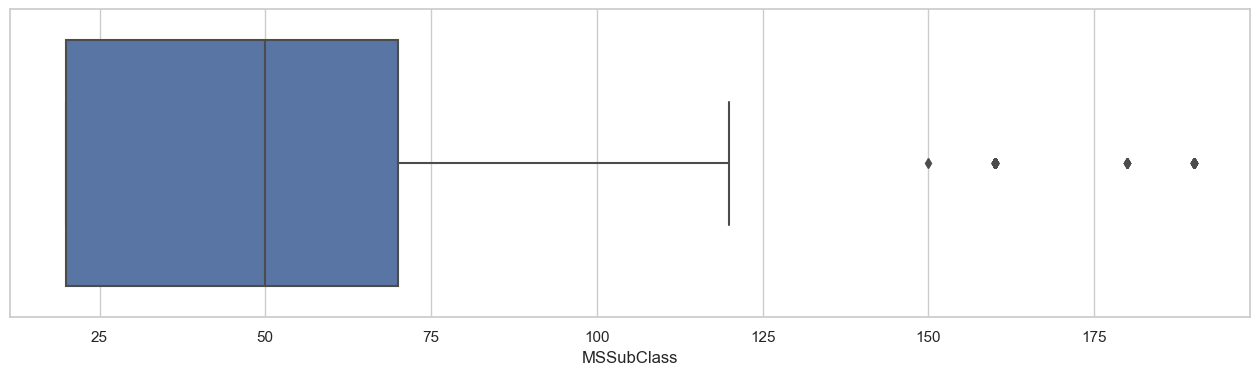

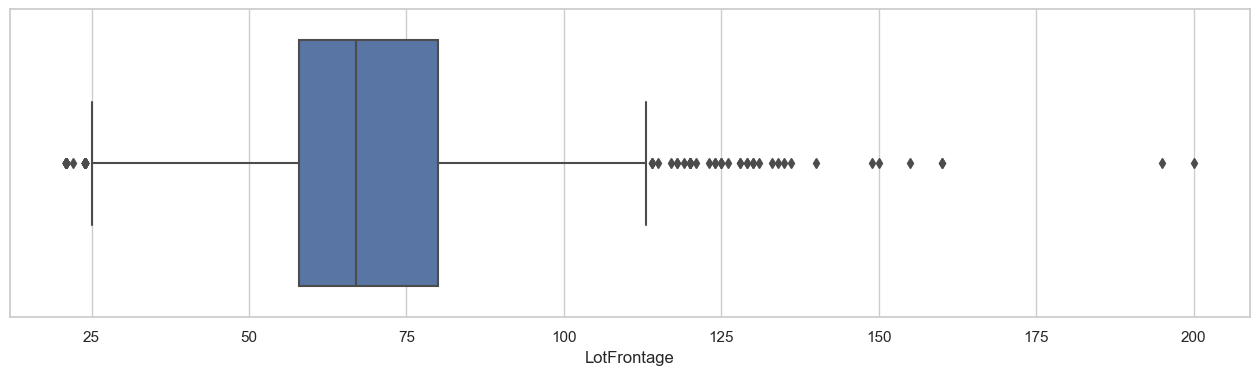

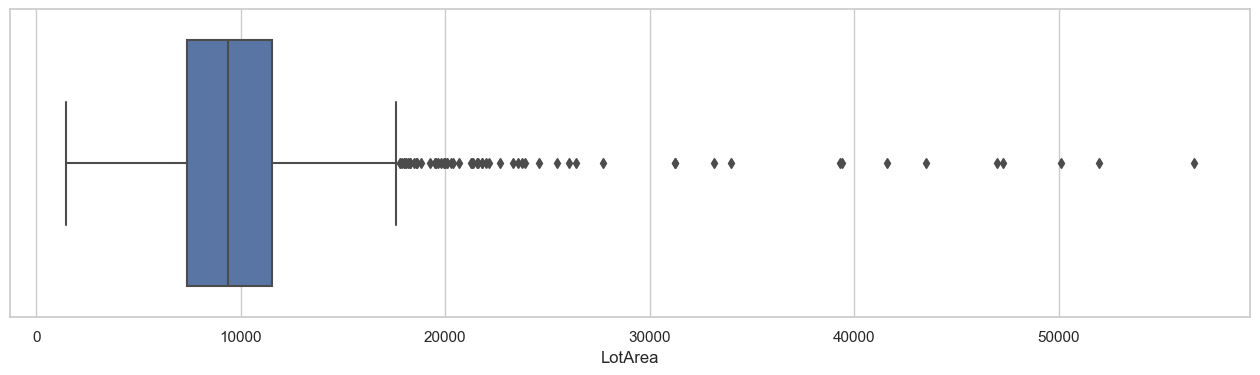

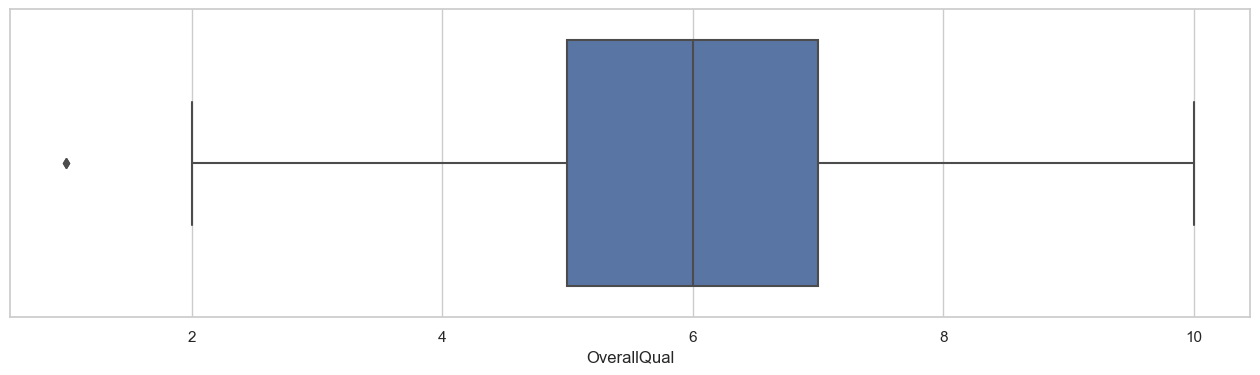

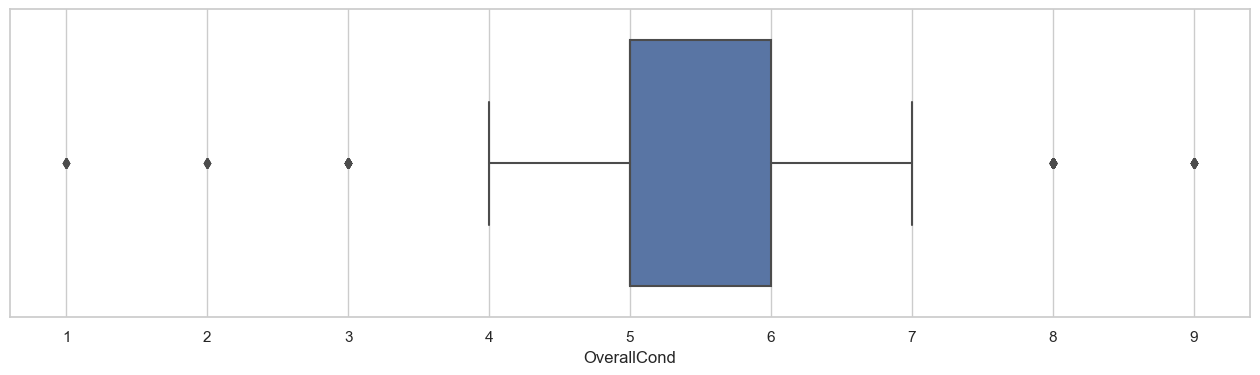

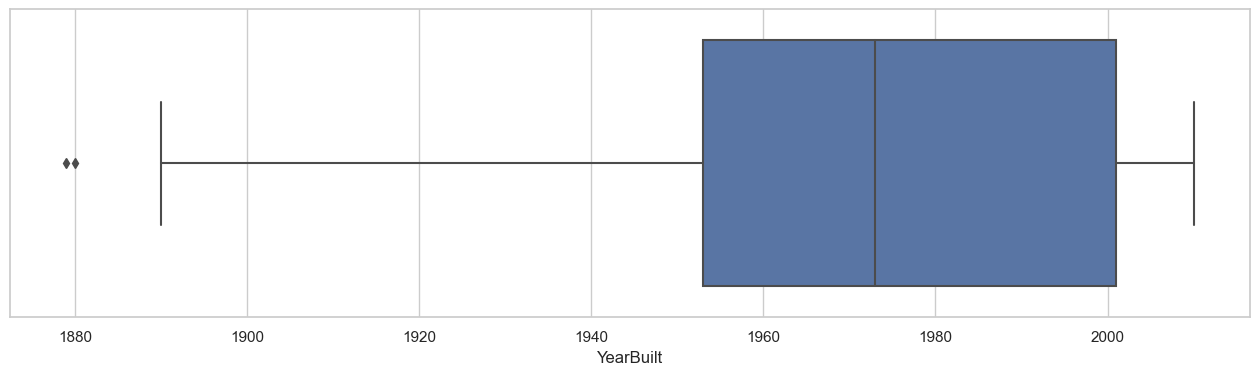

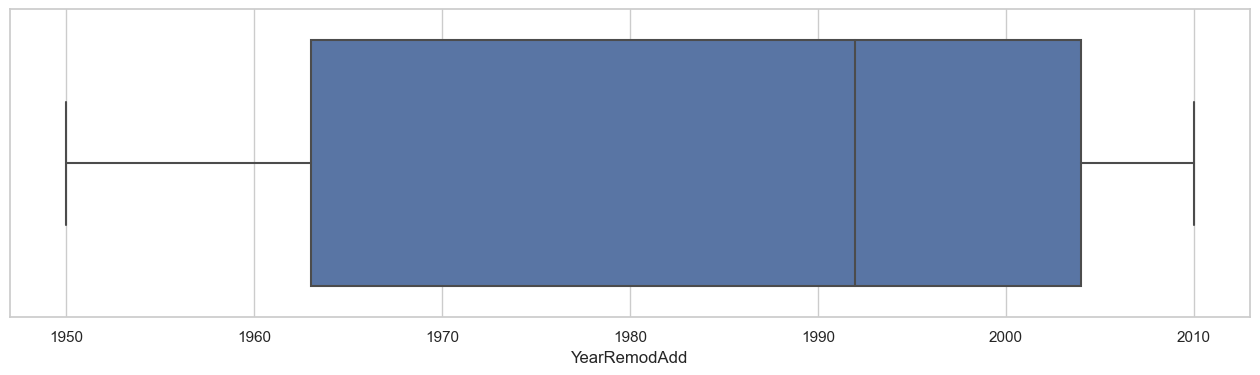

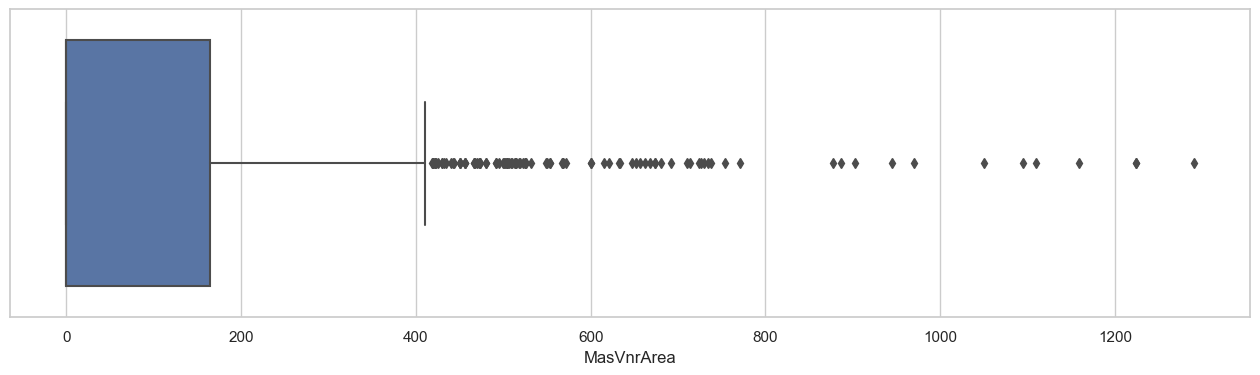

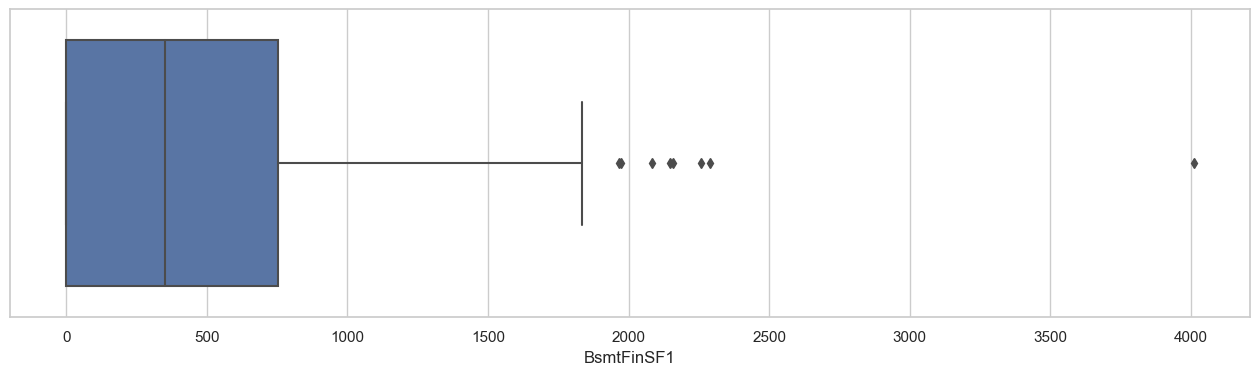

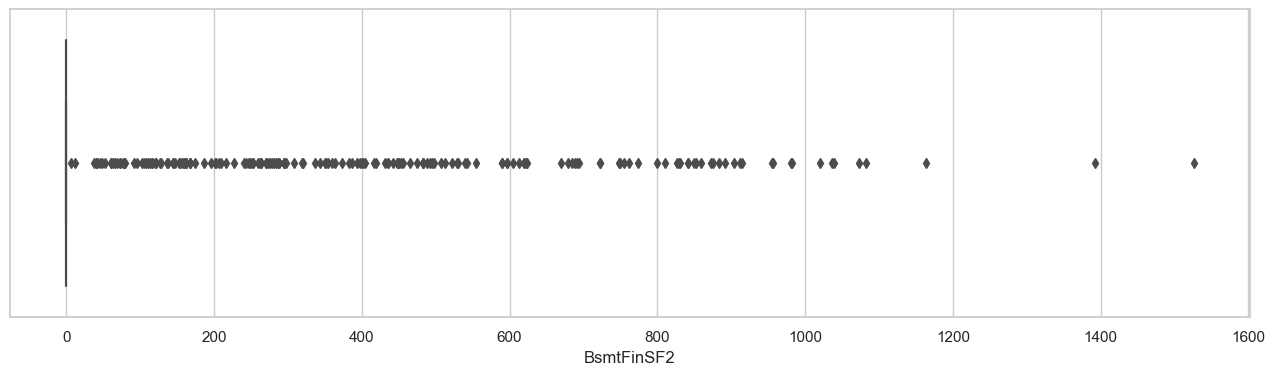

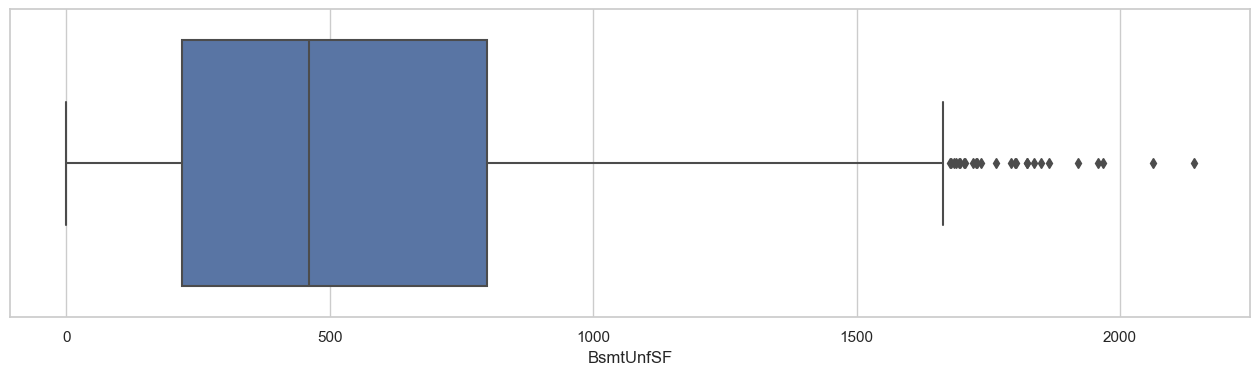

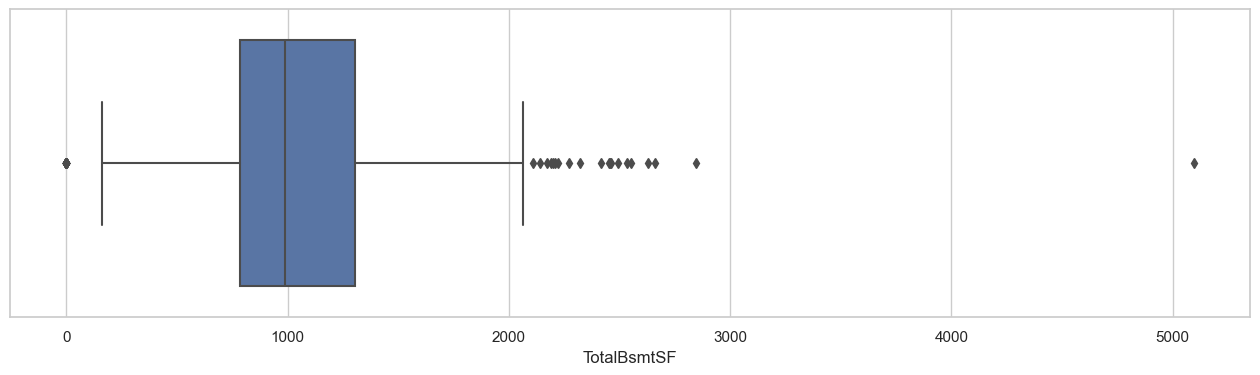

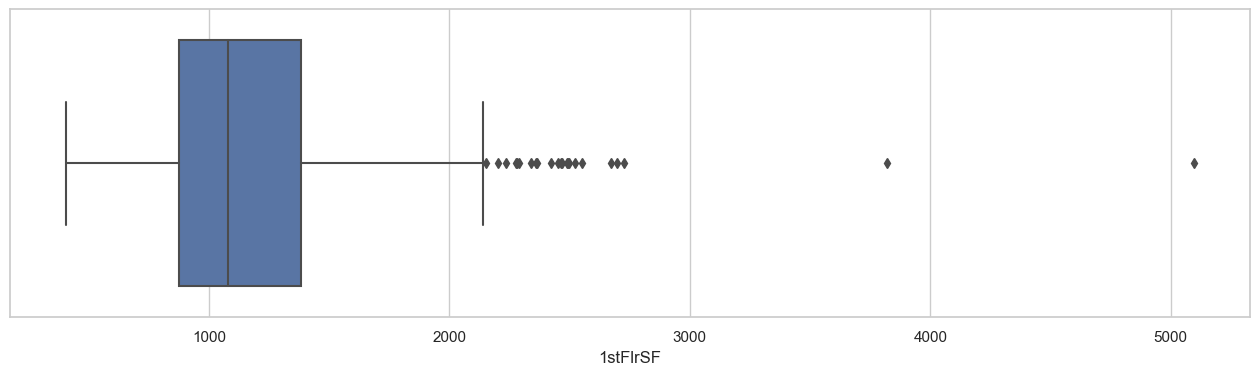

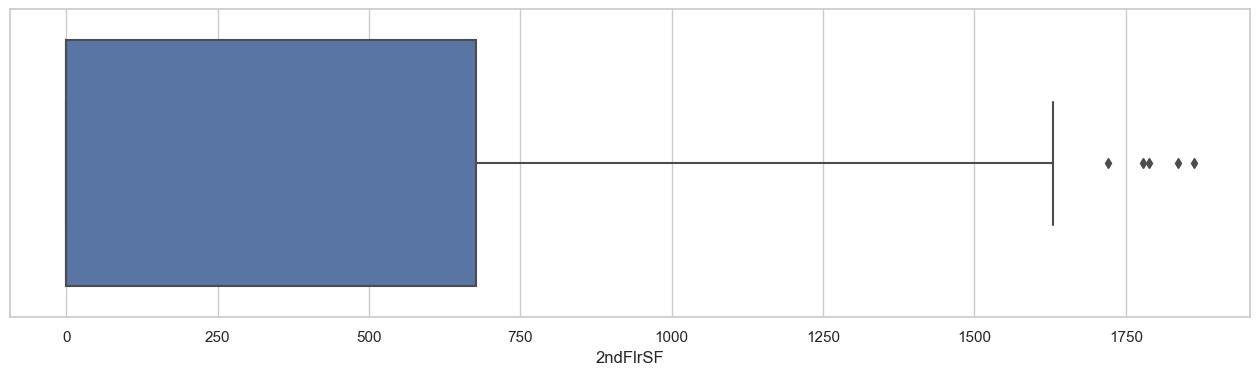

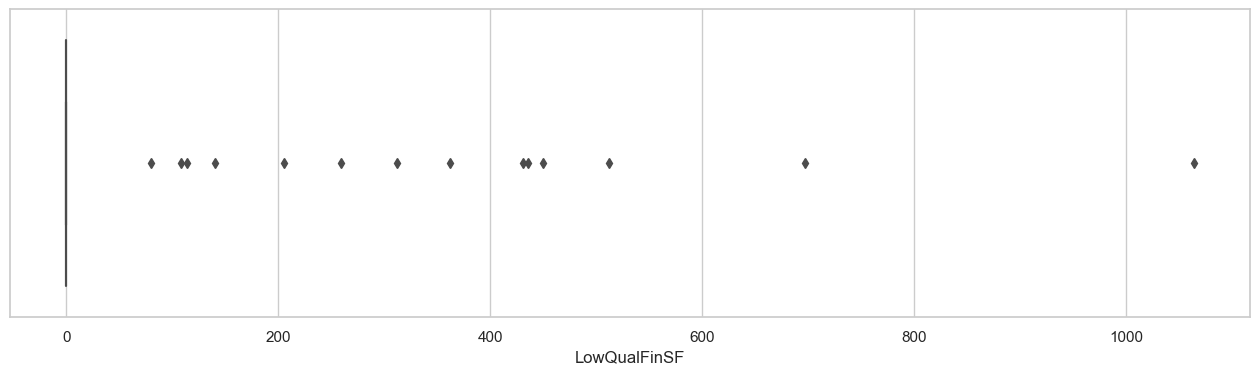

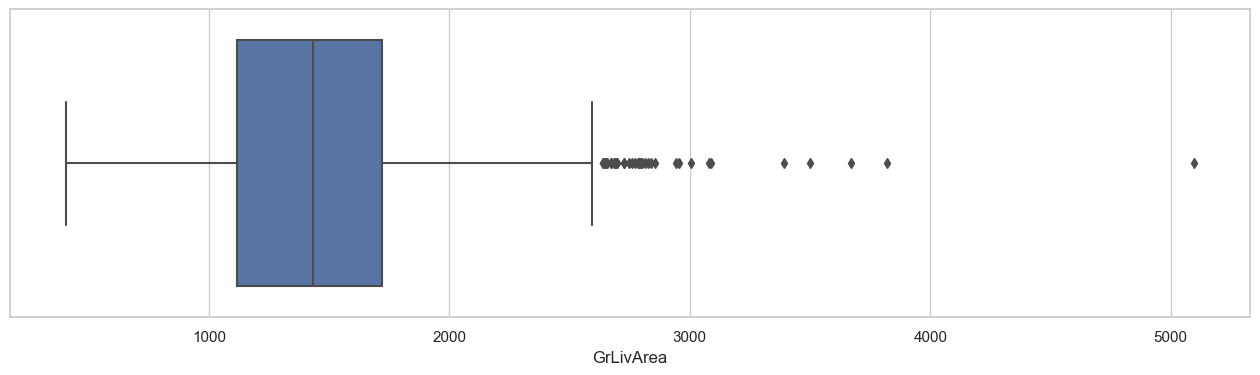

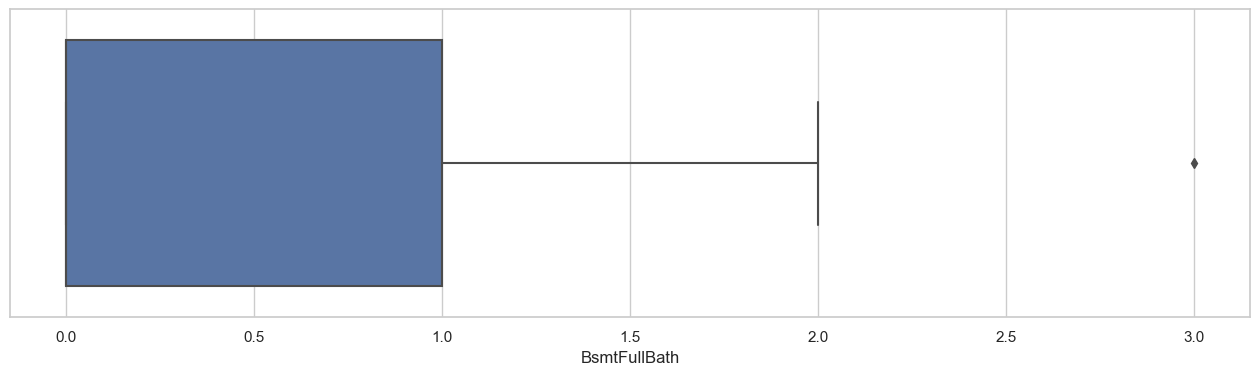

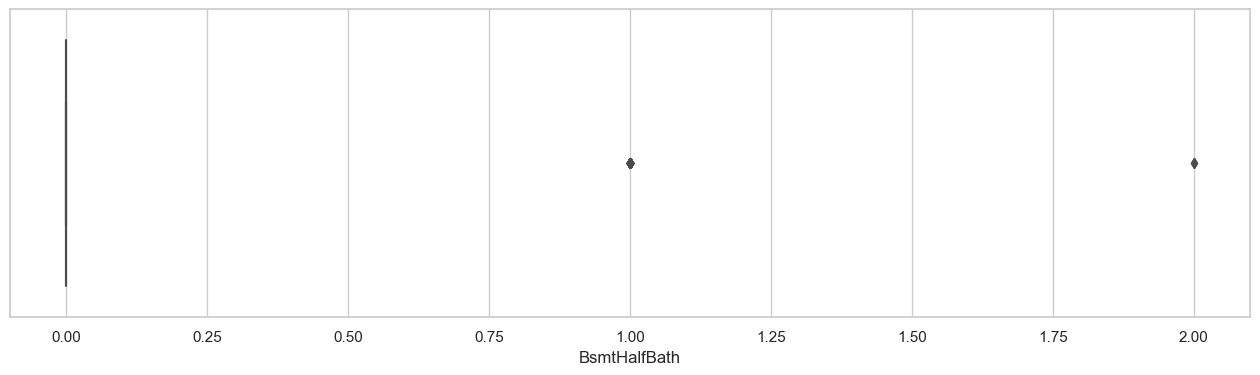

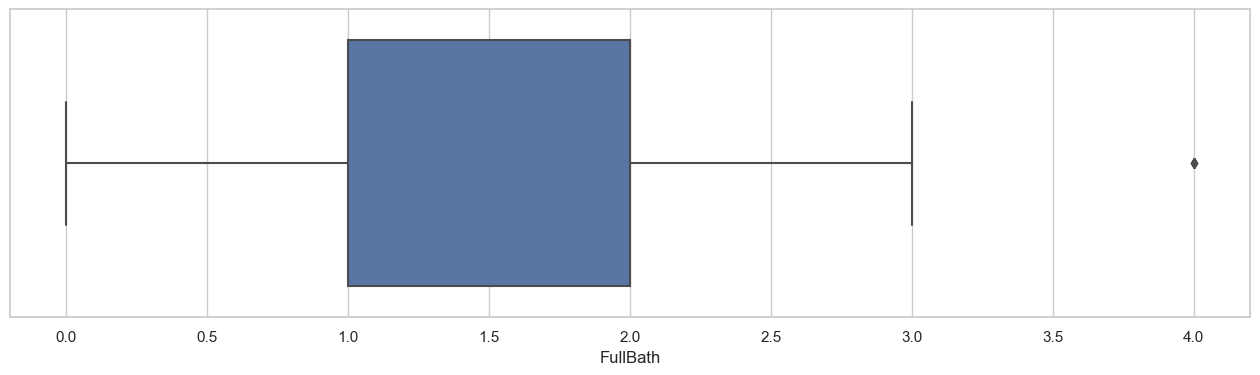

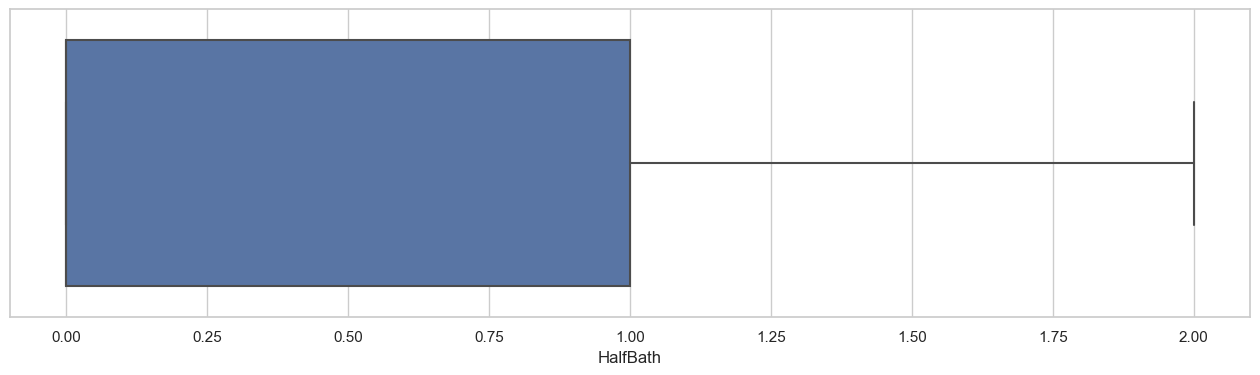

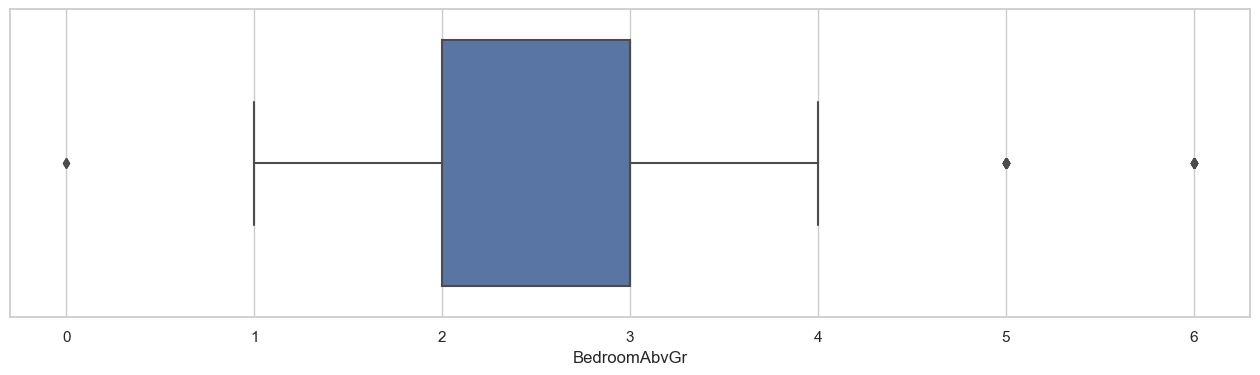

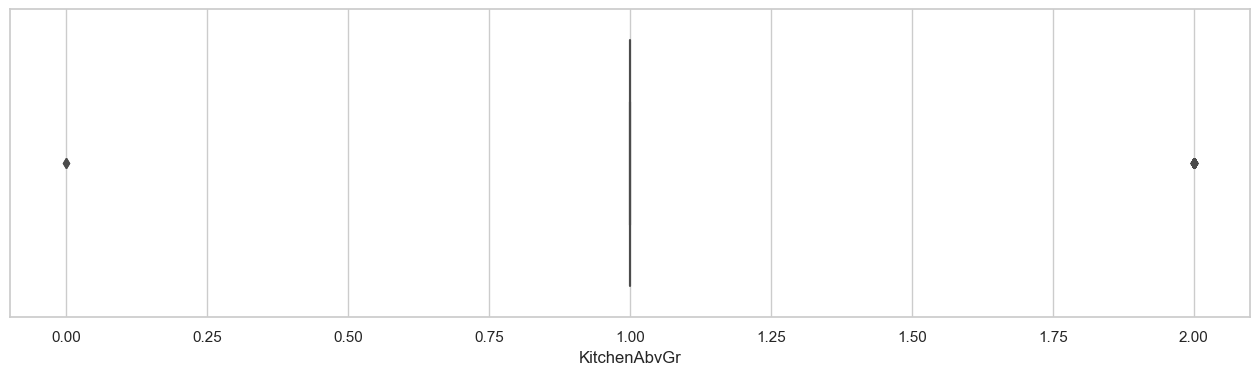

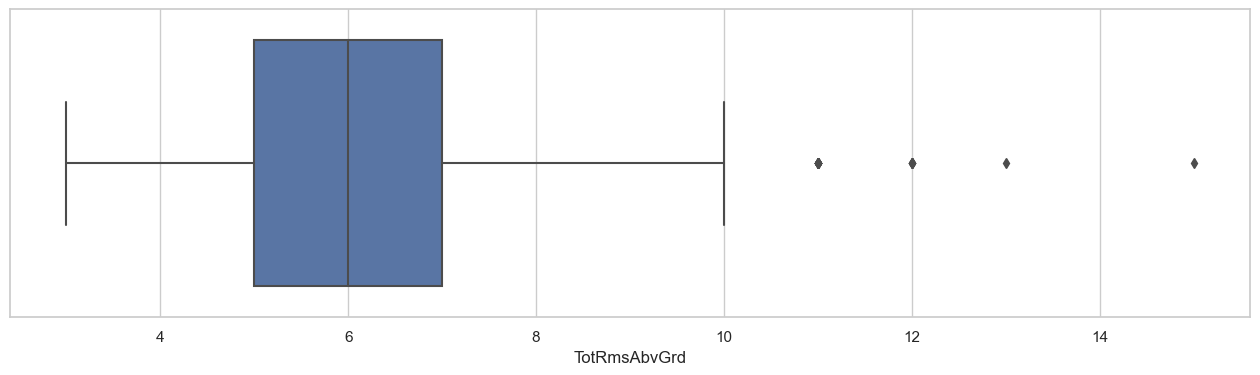

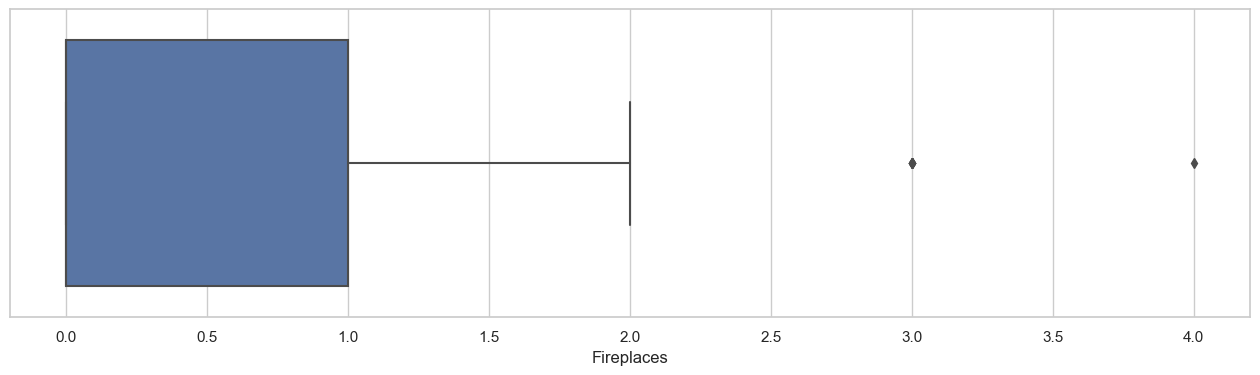

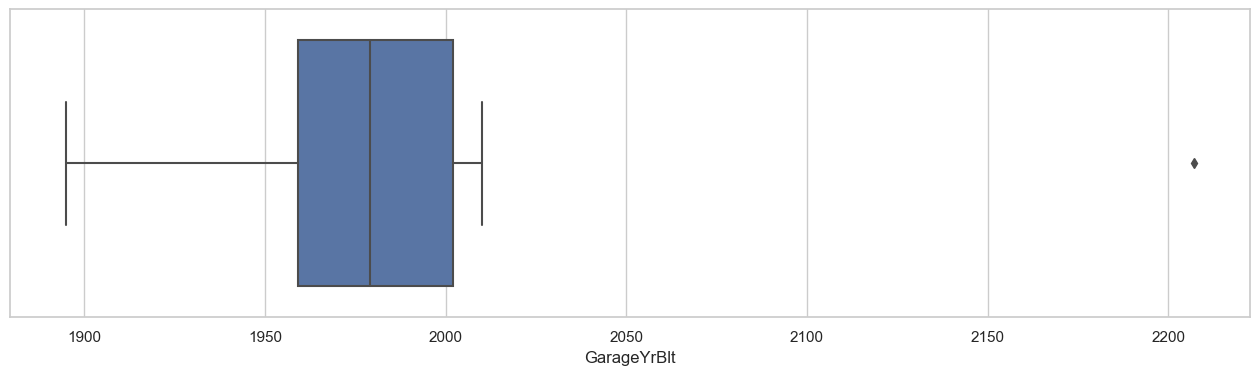

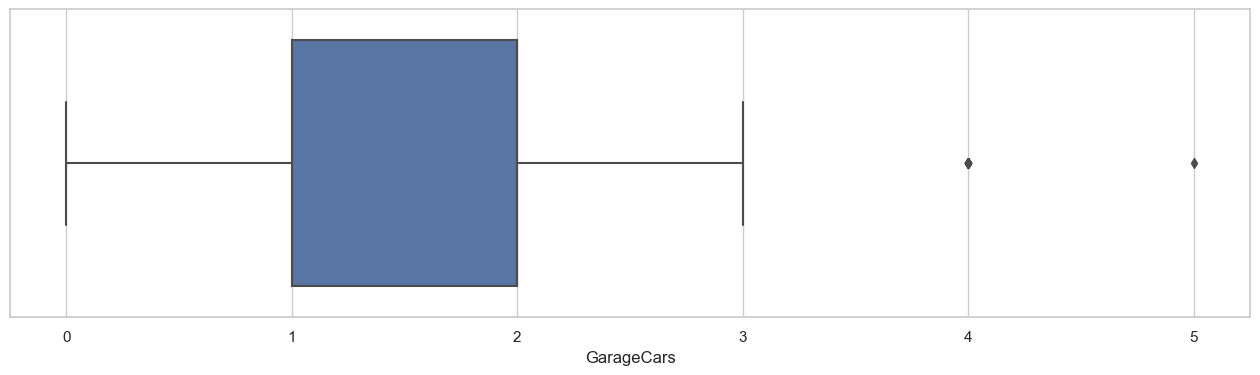

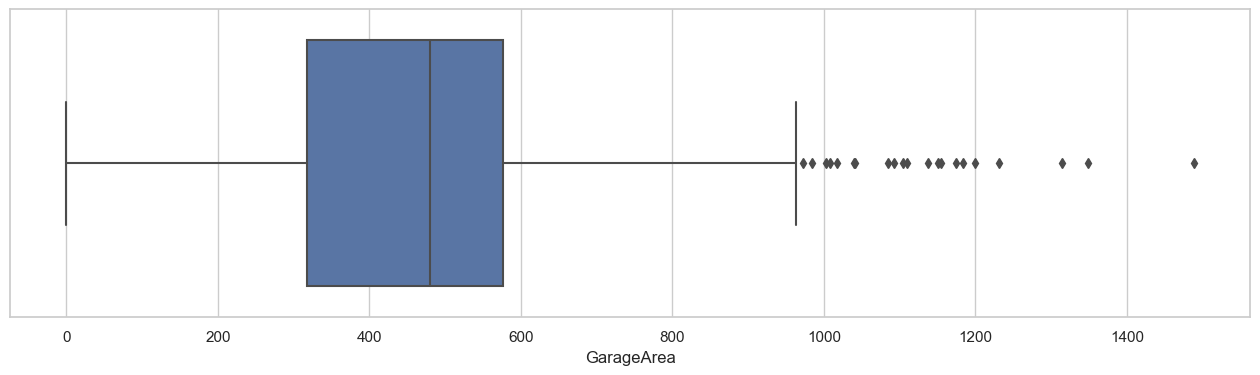

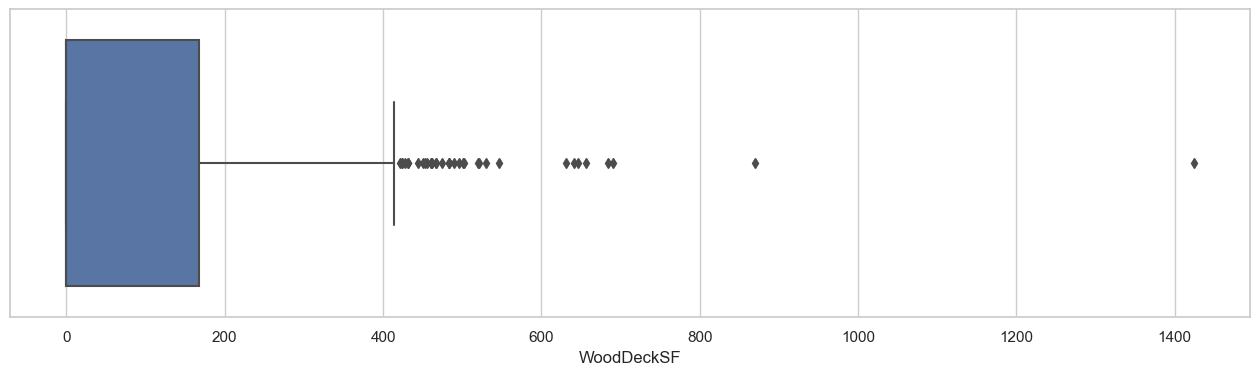

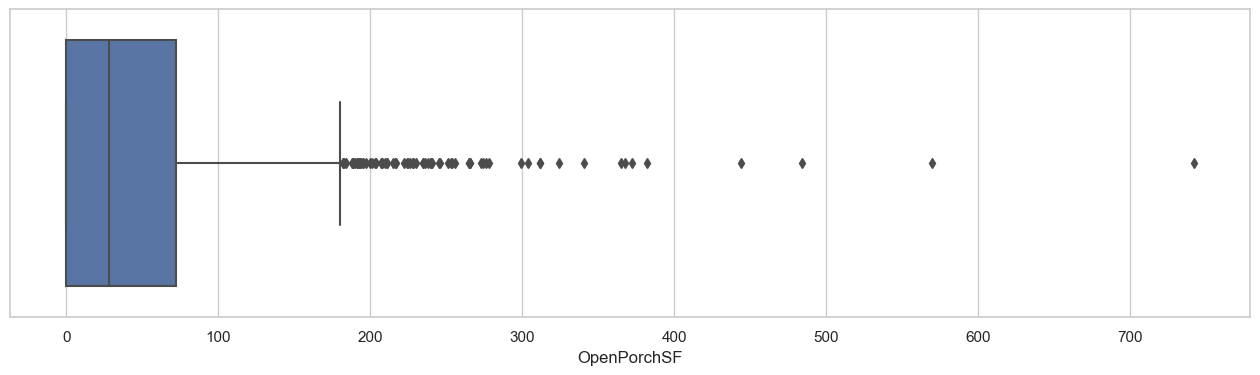

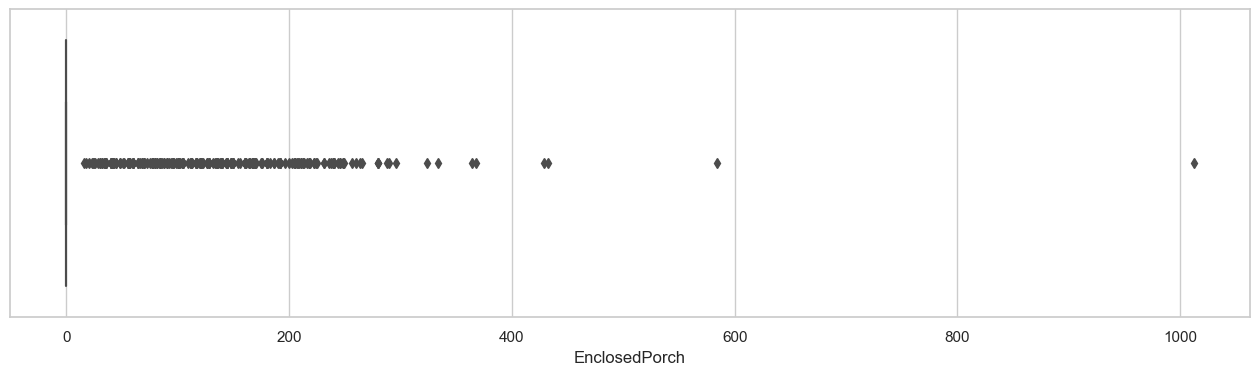

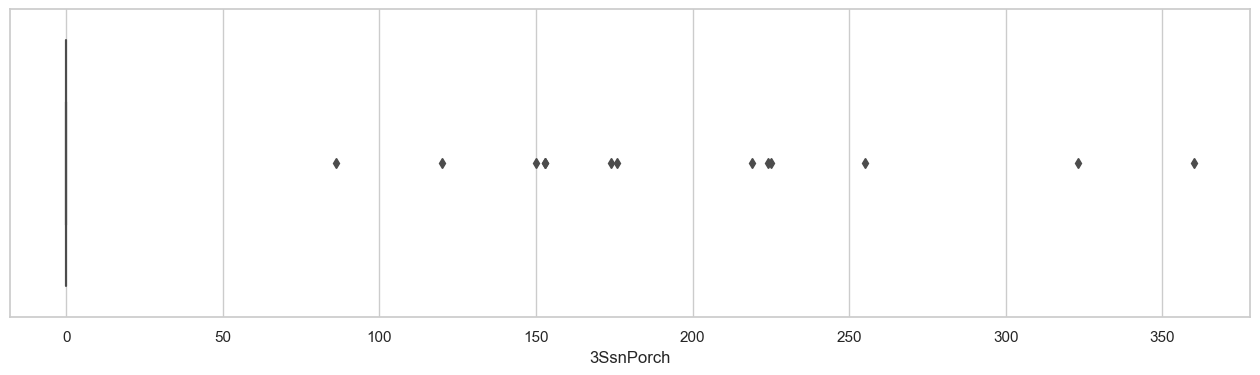

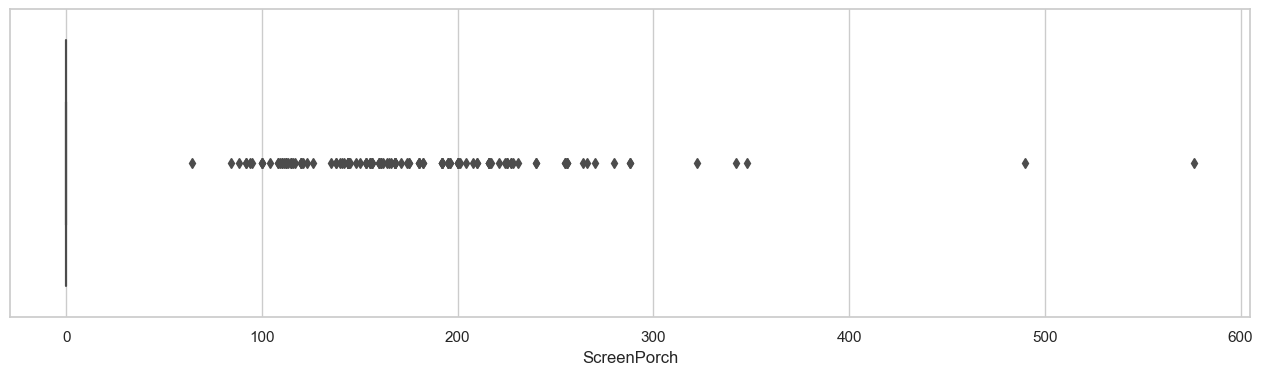

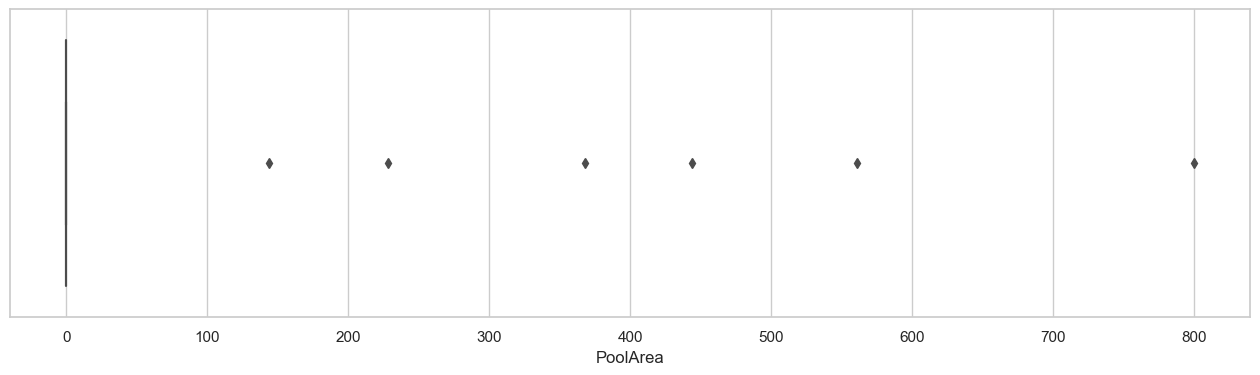

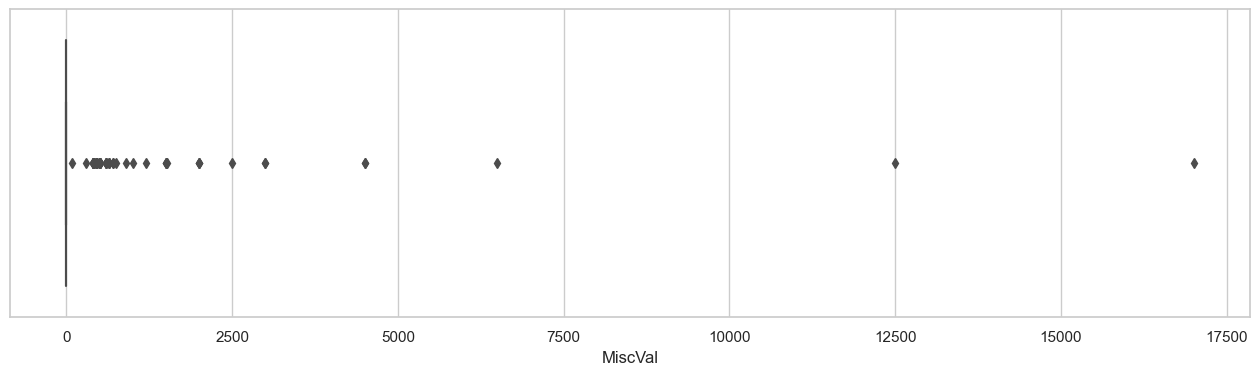

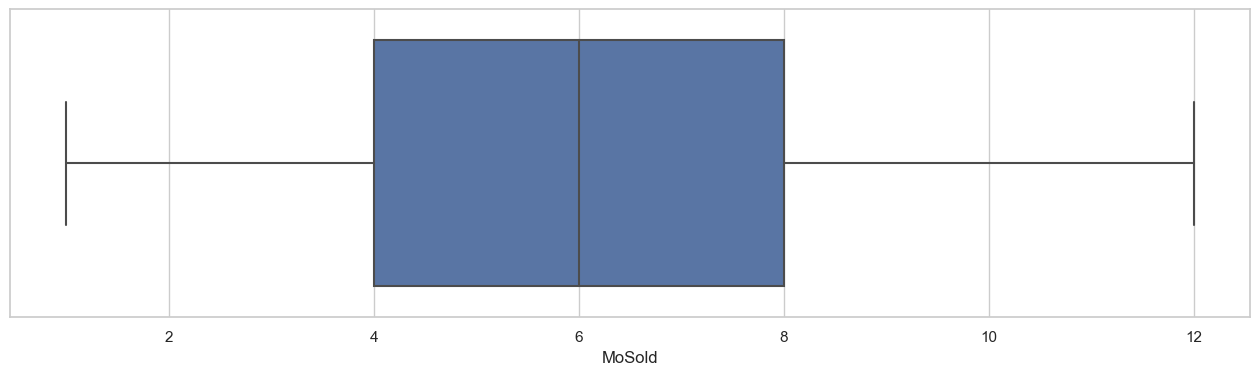

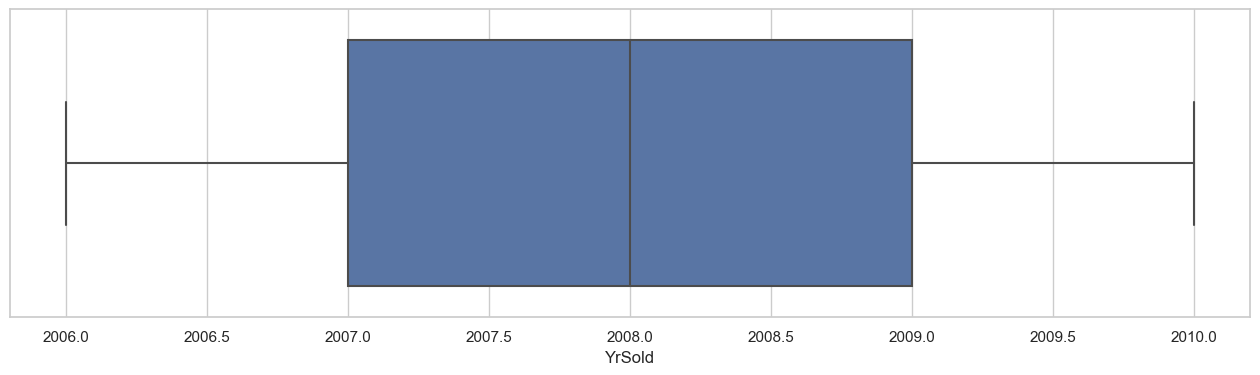

In [ ]:
numerical_df = test.select_dtypes(exclude=['object'])
#numerical_df = numerical_df.drop(["Id"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\si

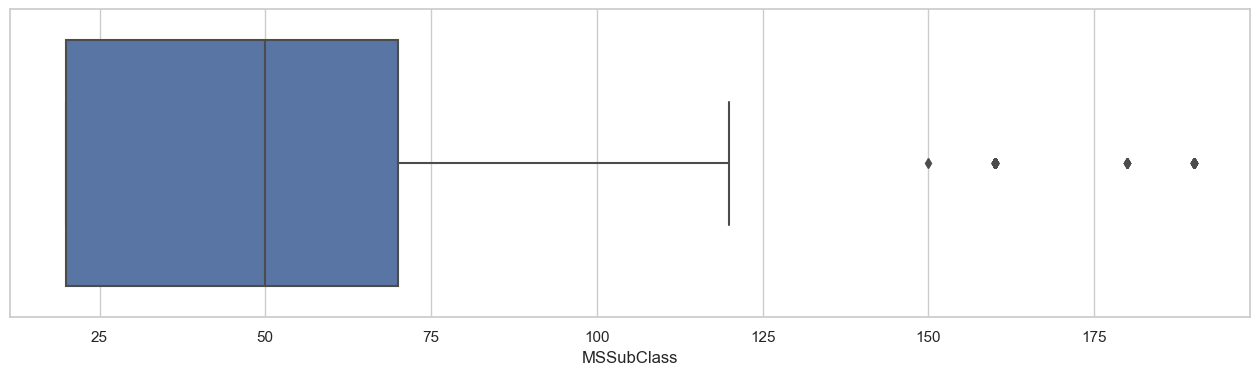

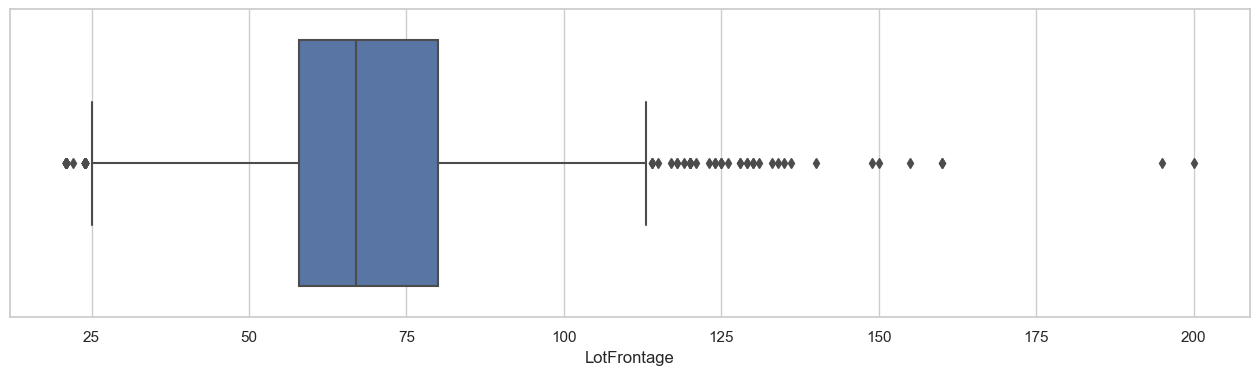

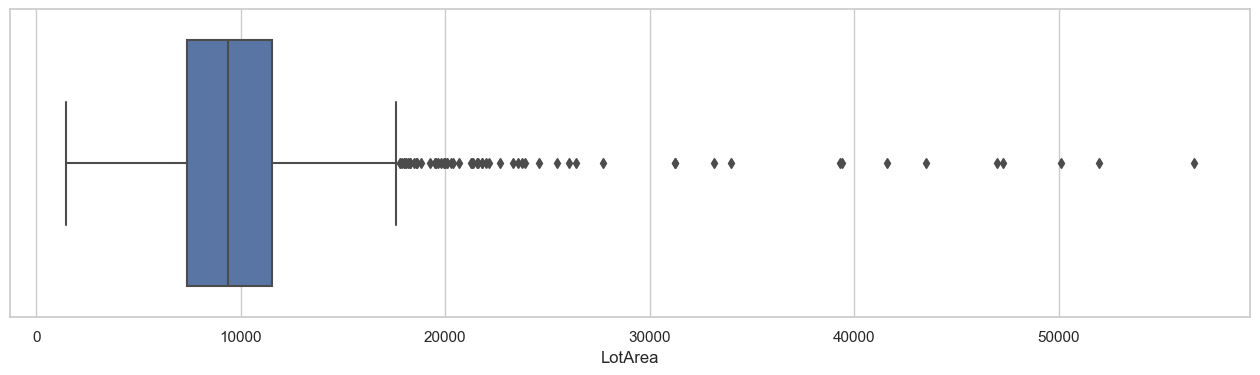

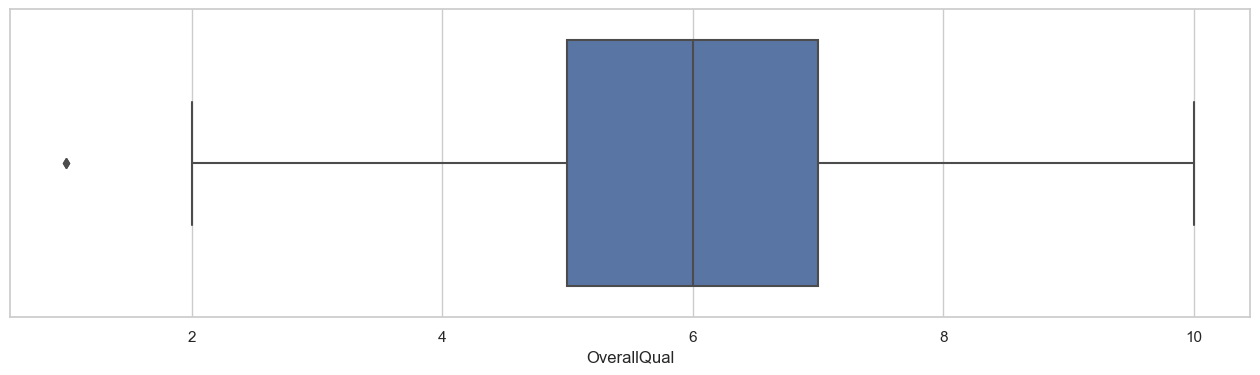

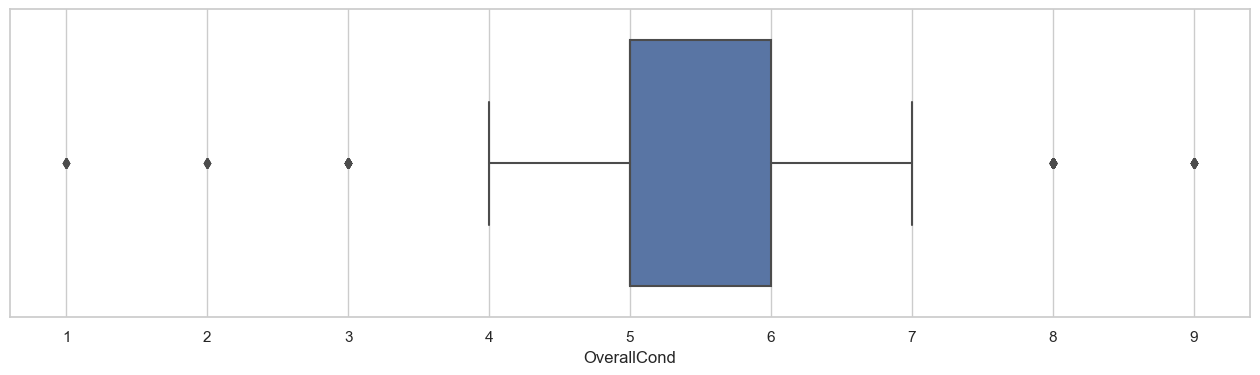

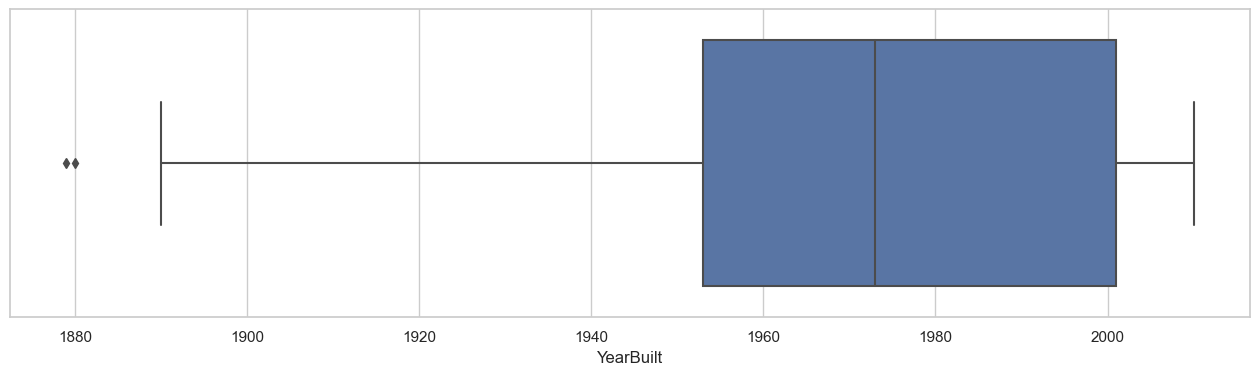

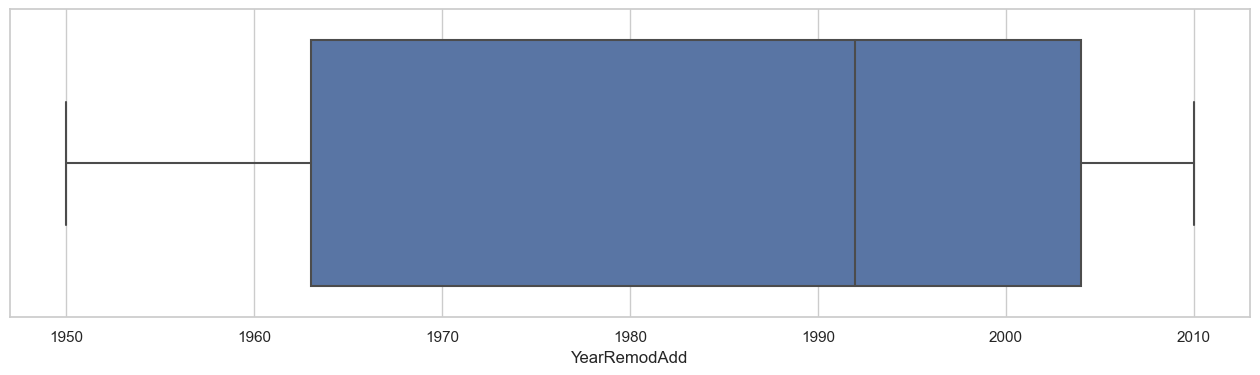

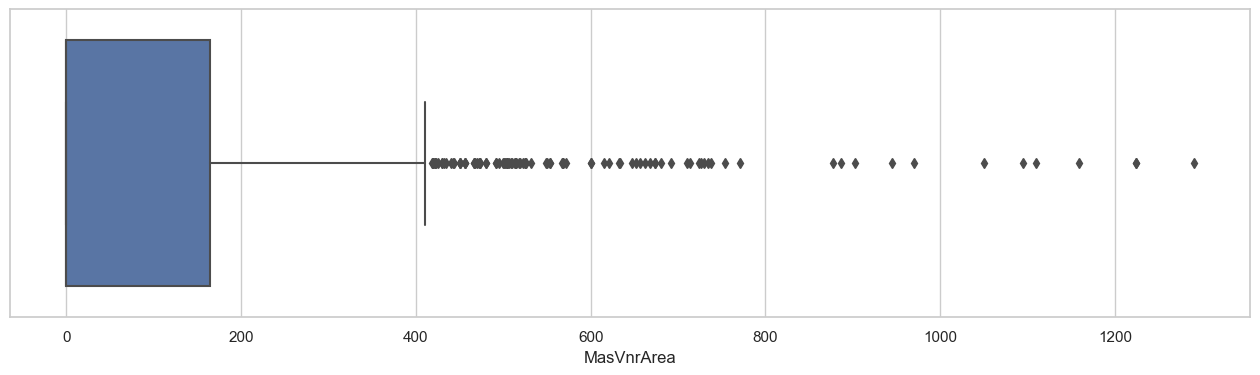

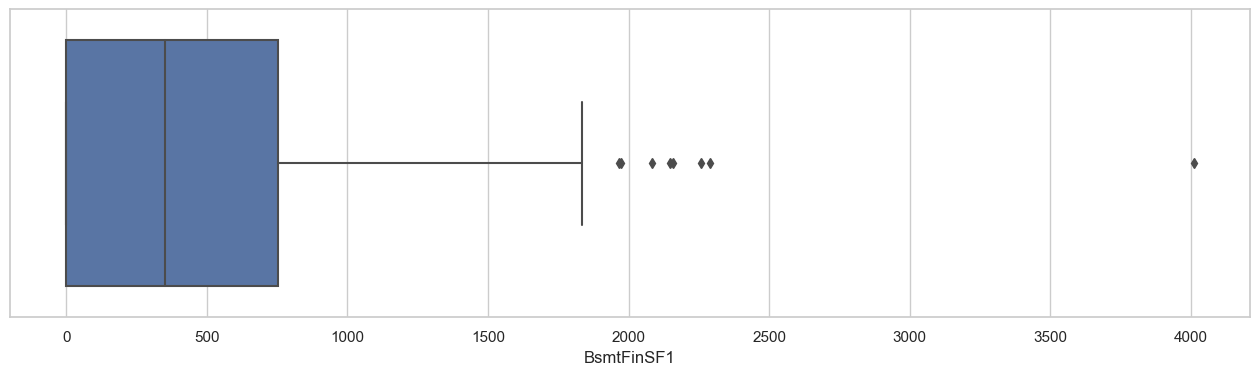

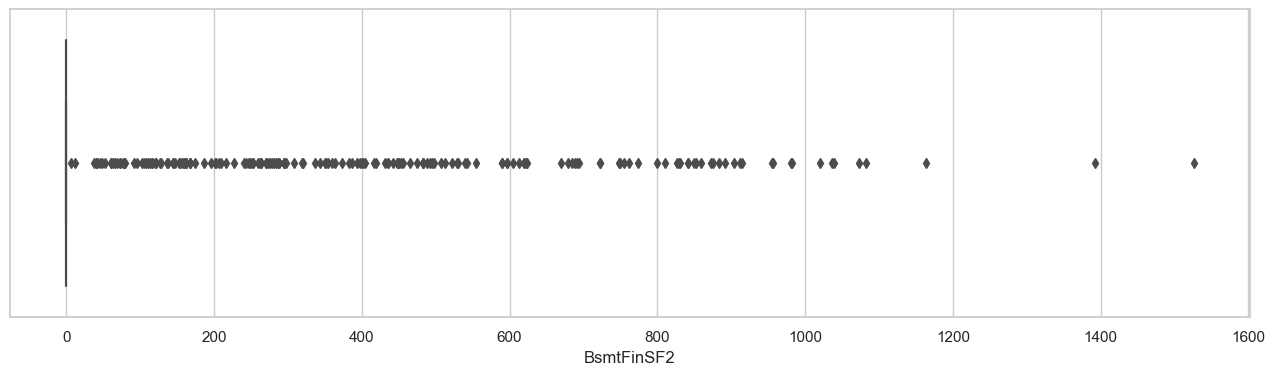

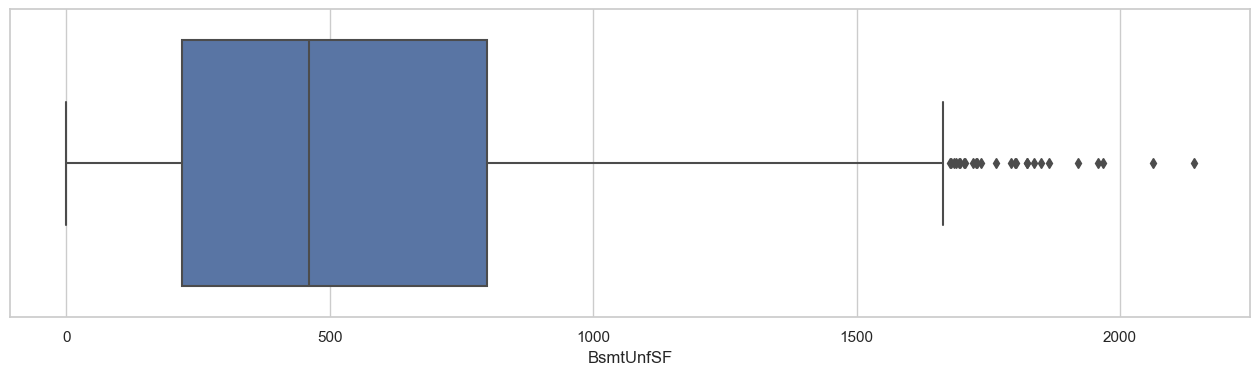

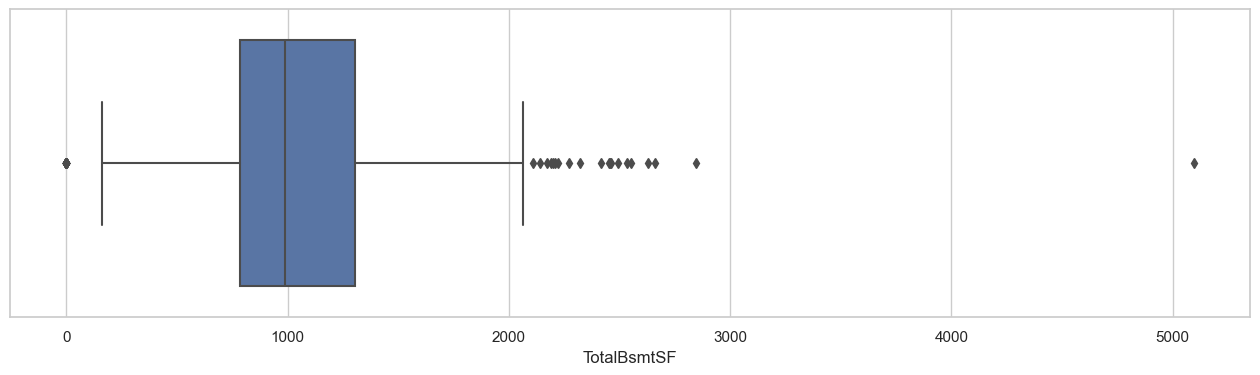

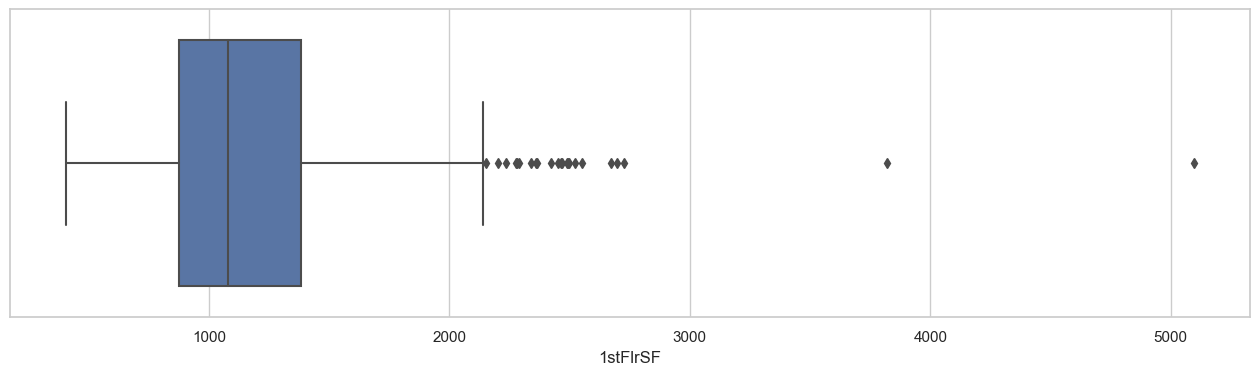

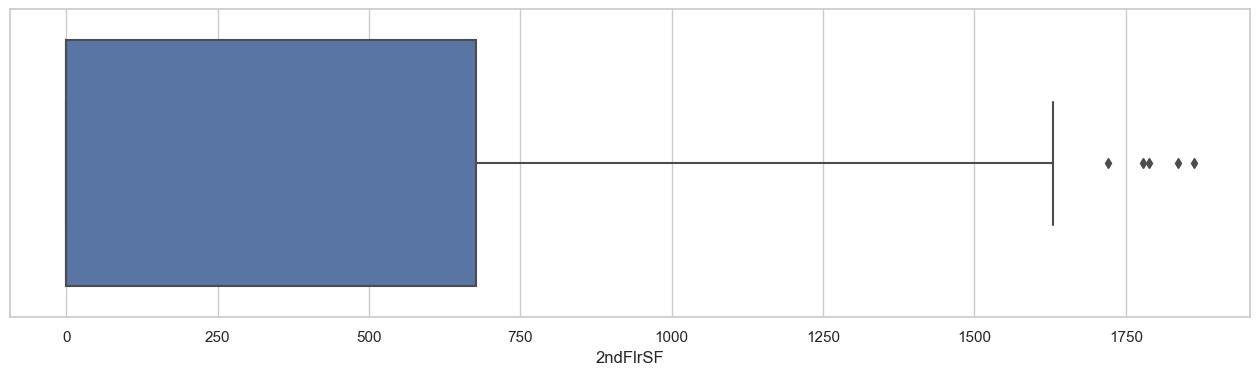

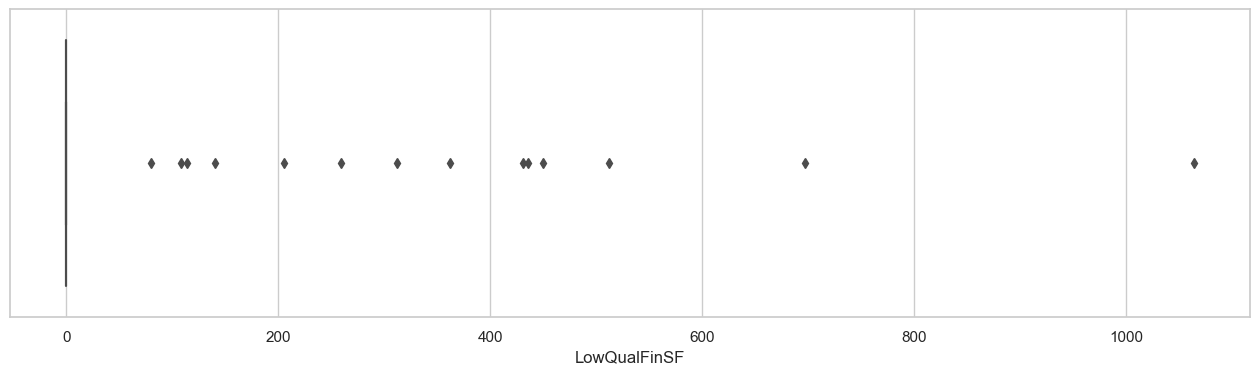

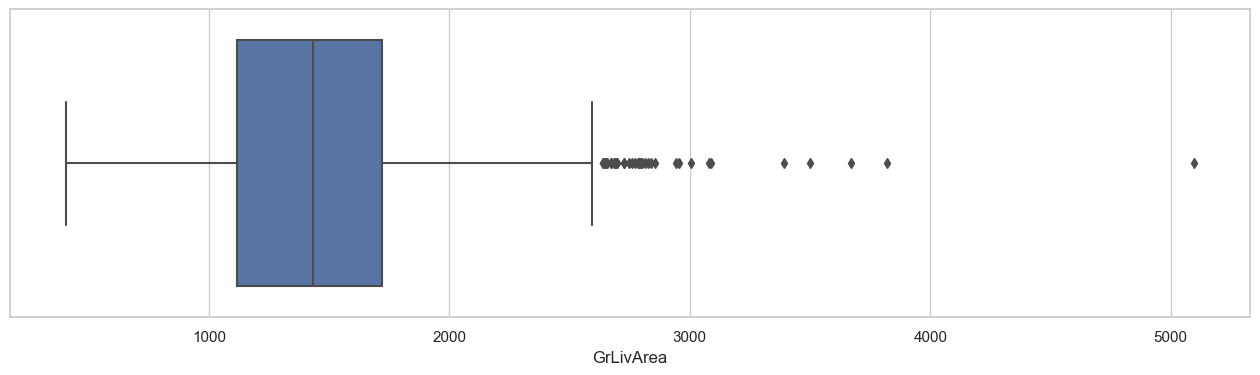

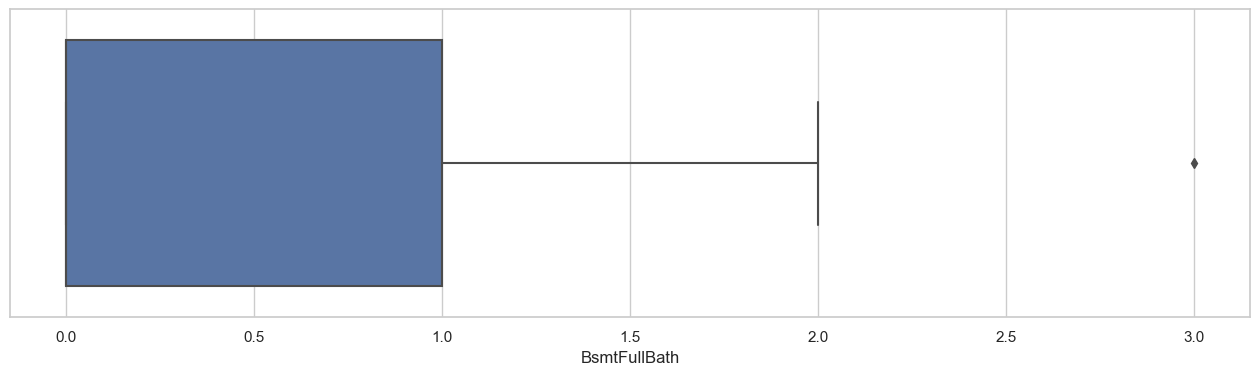

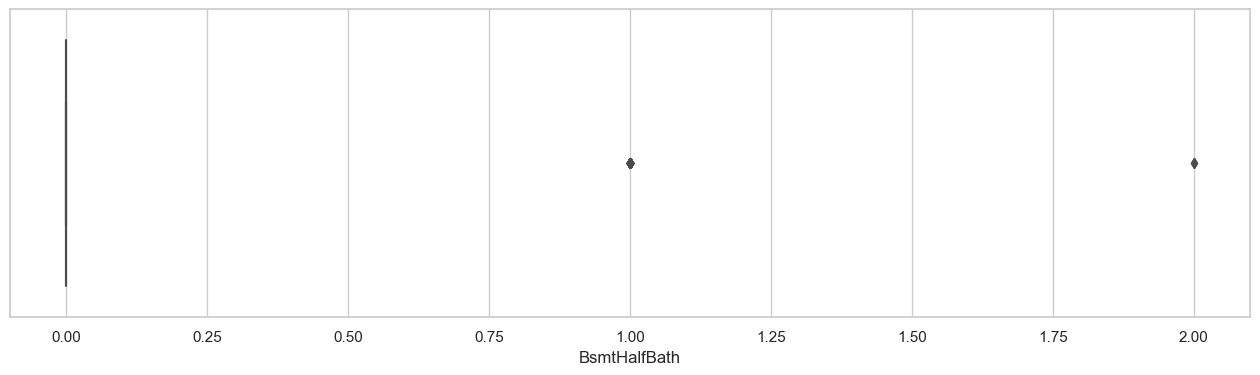

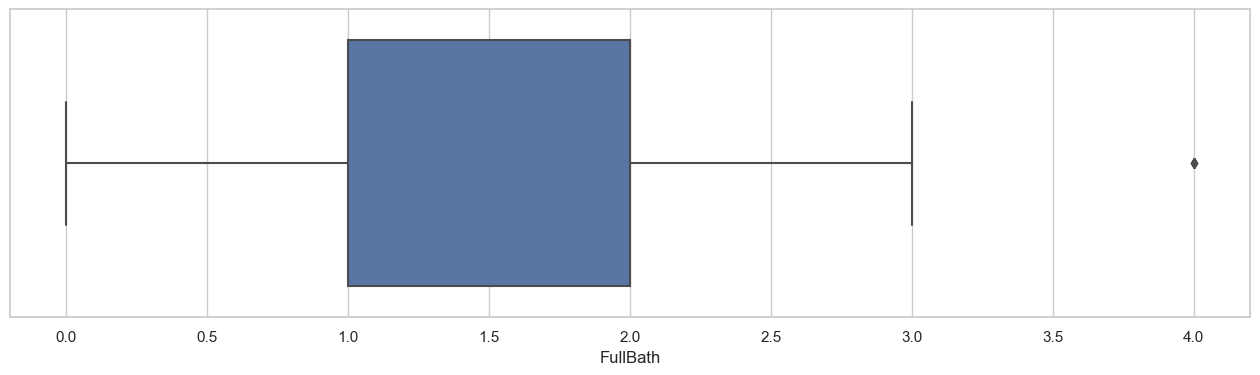

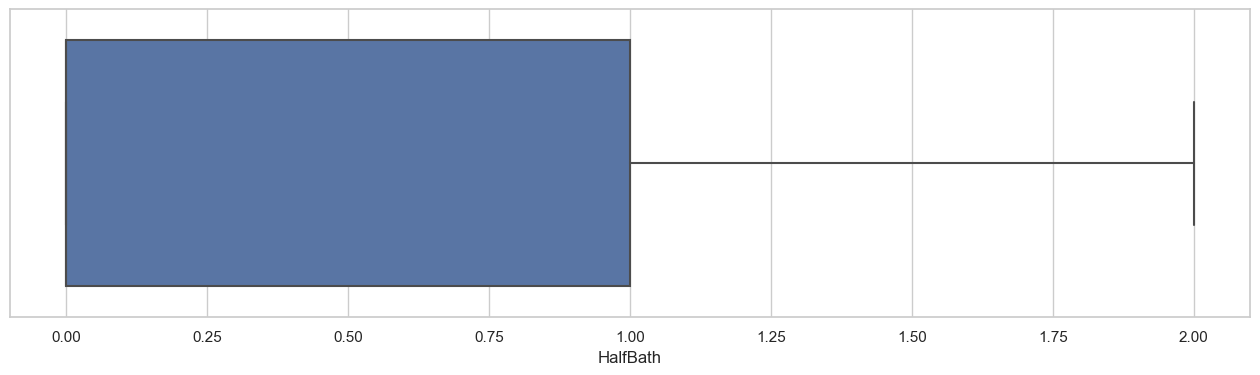

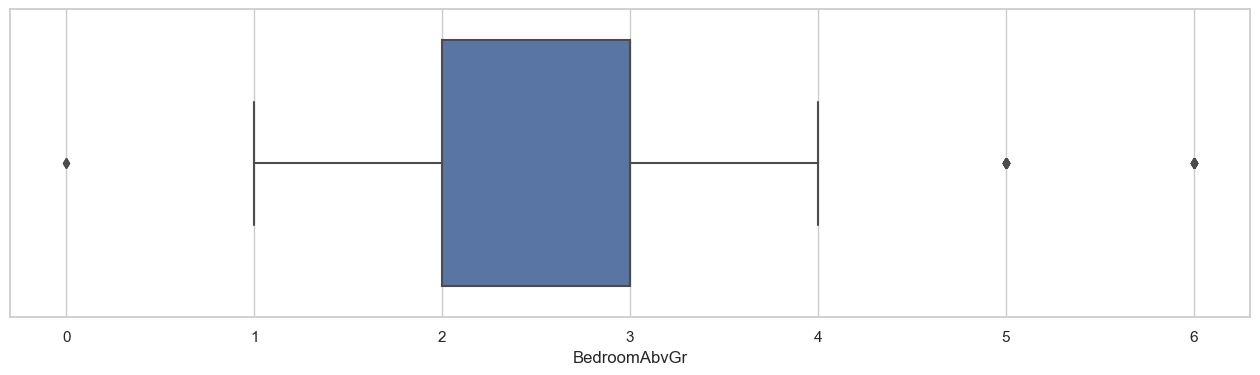

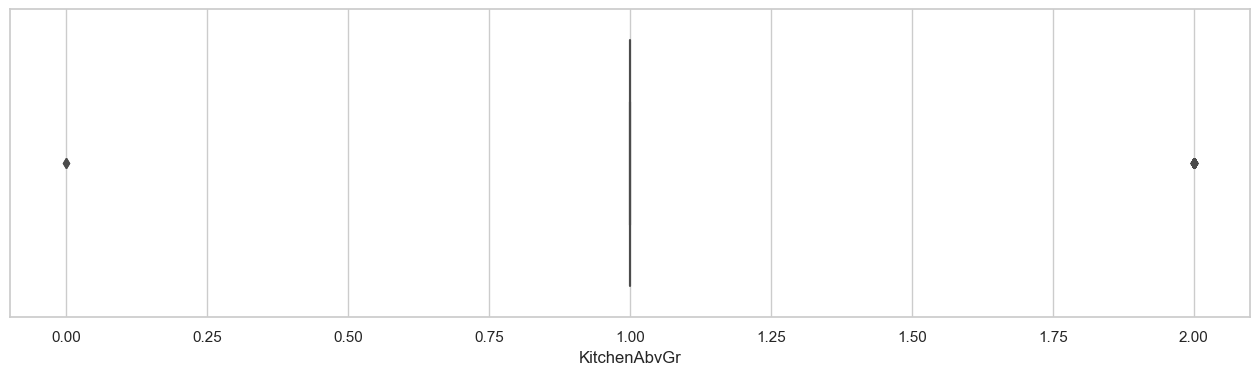

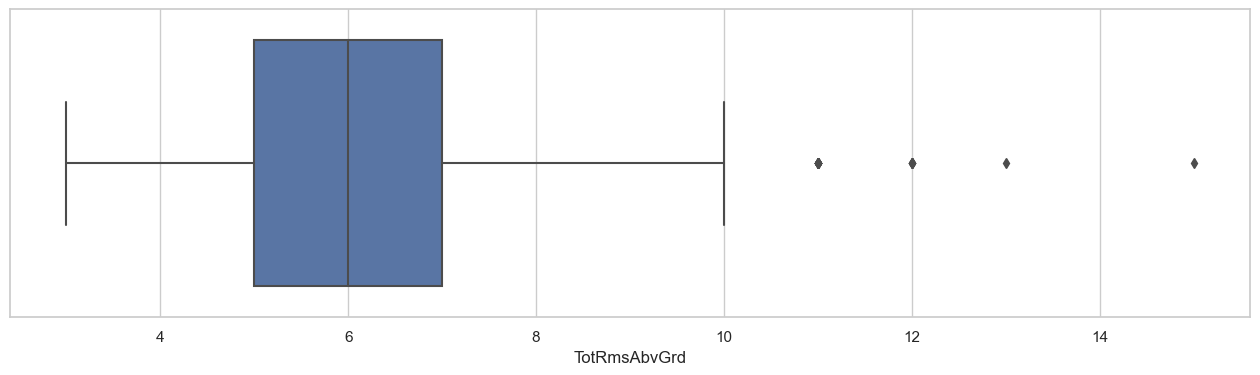

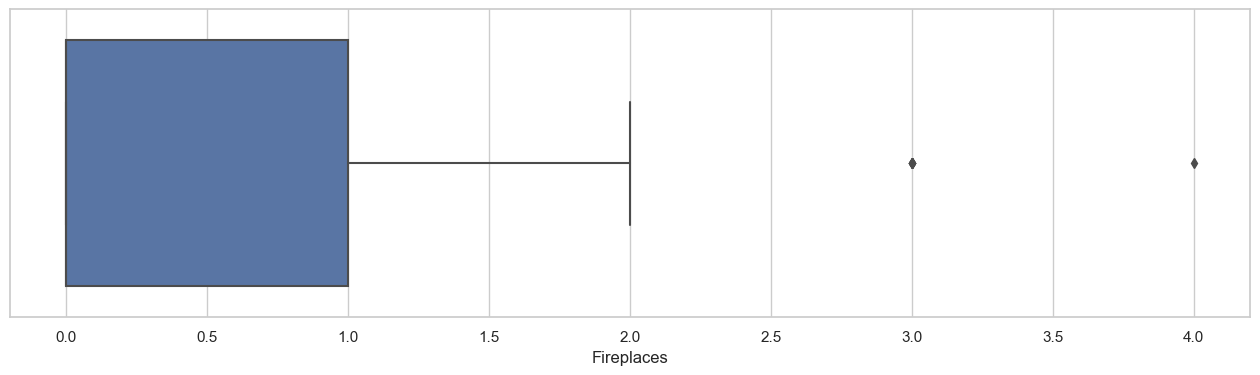

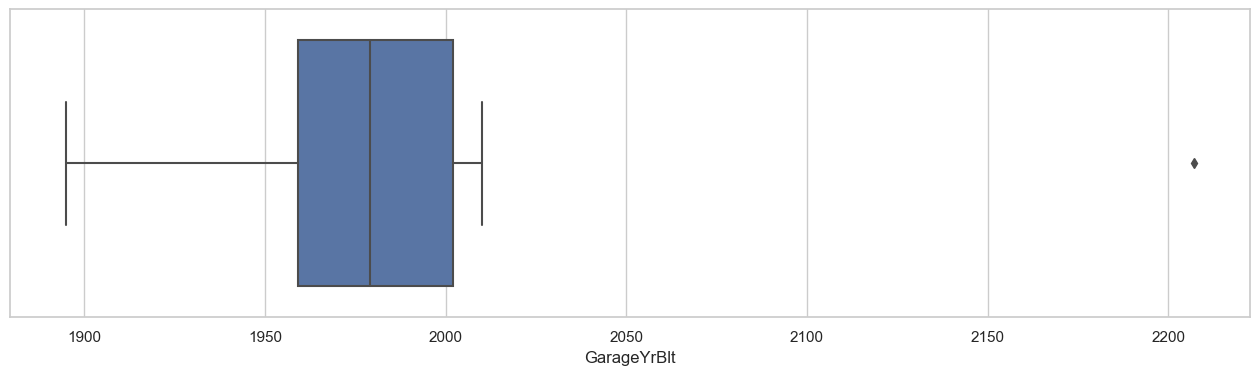

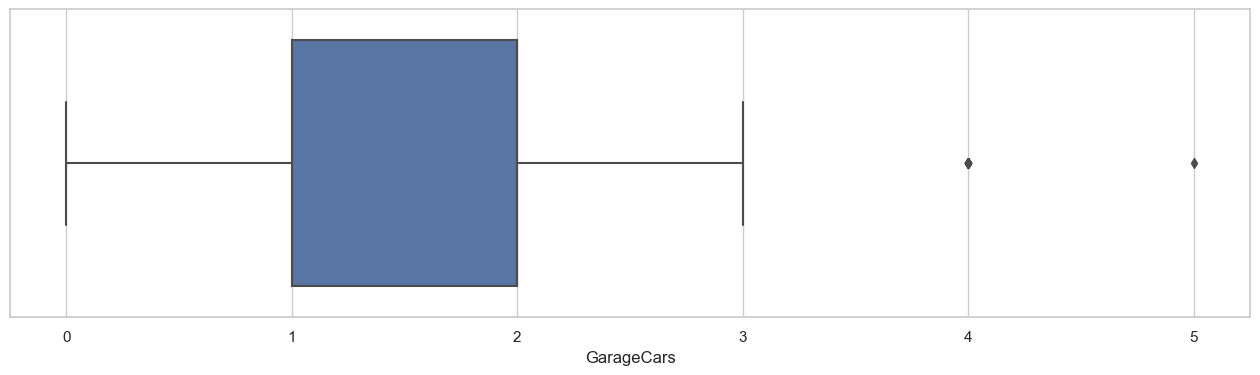

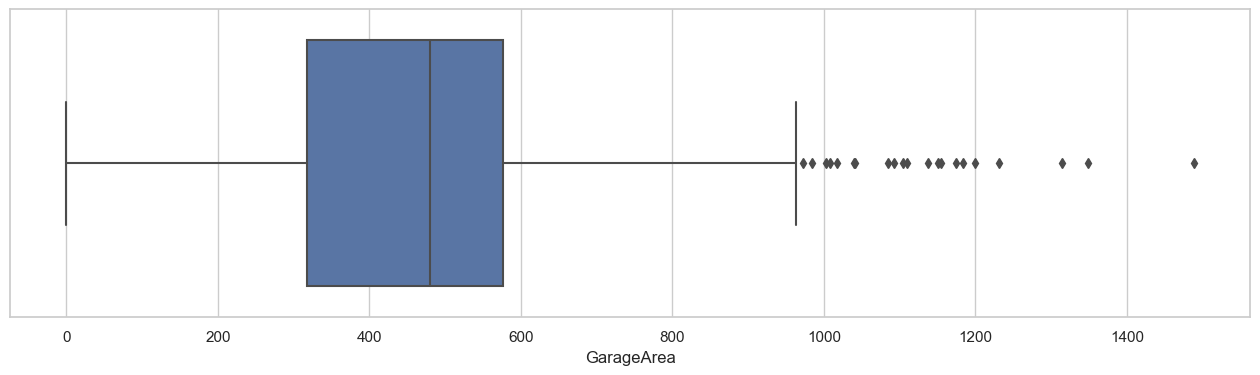

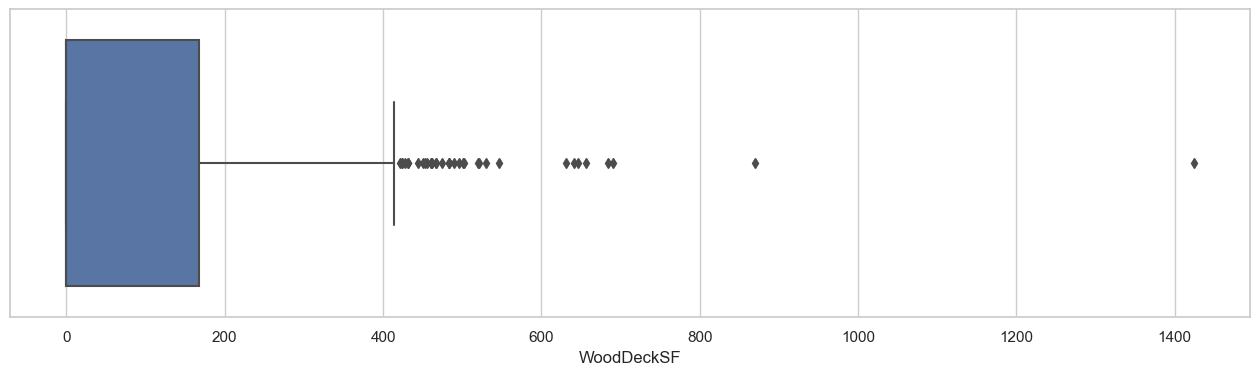

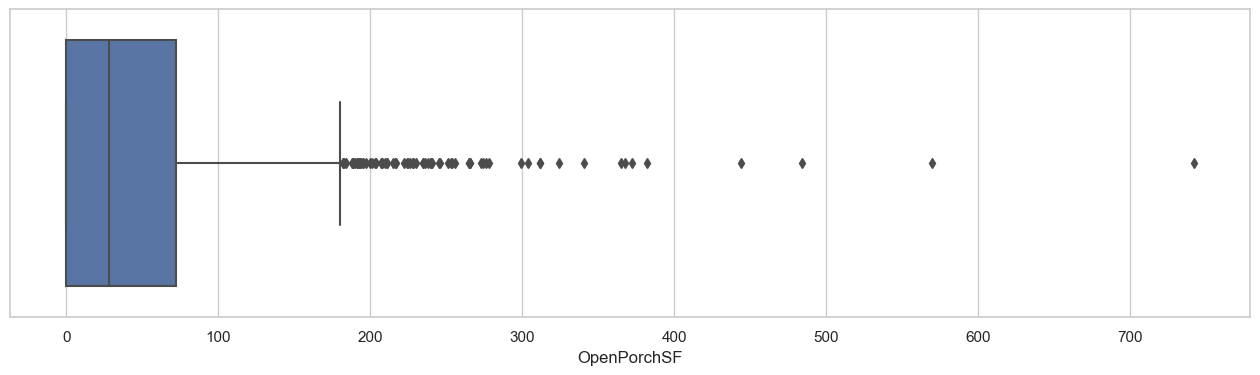

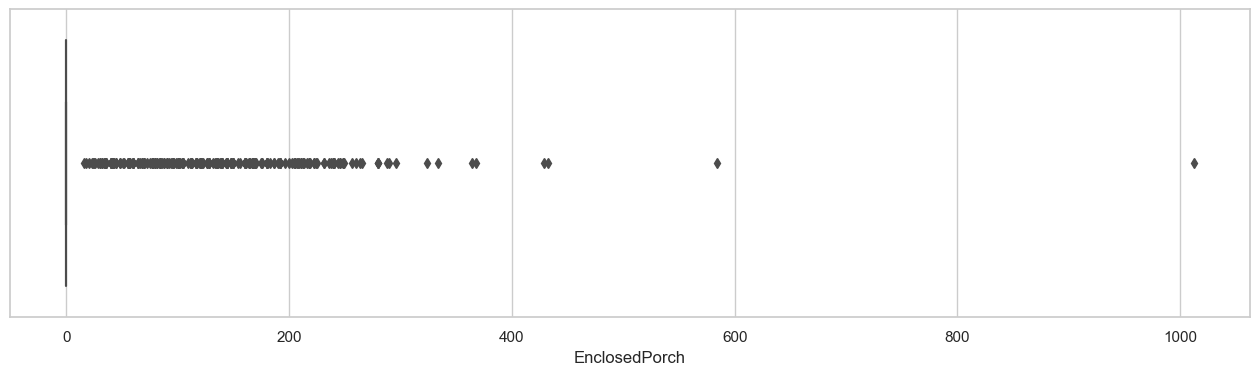

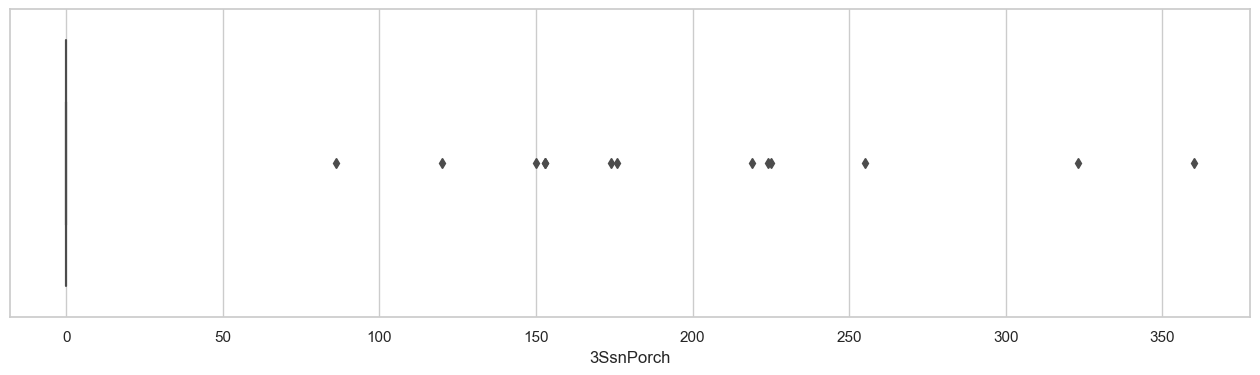

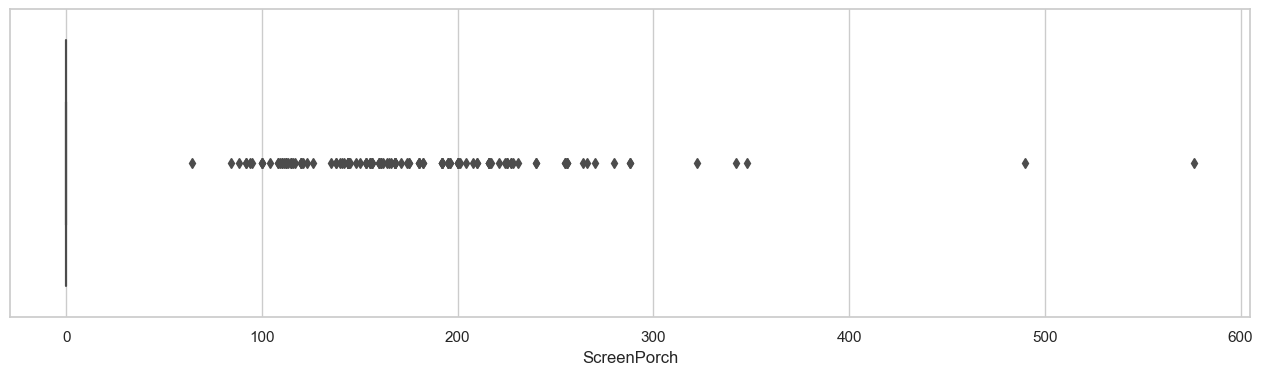

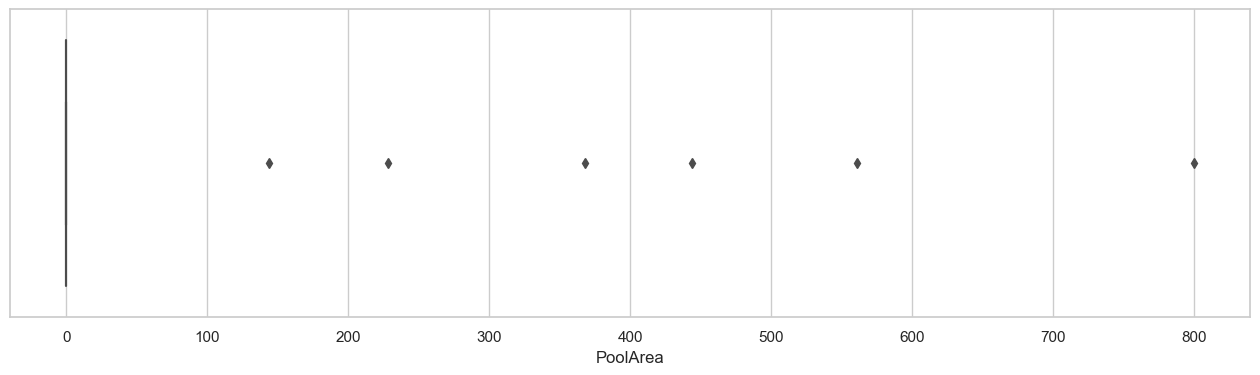

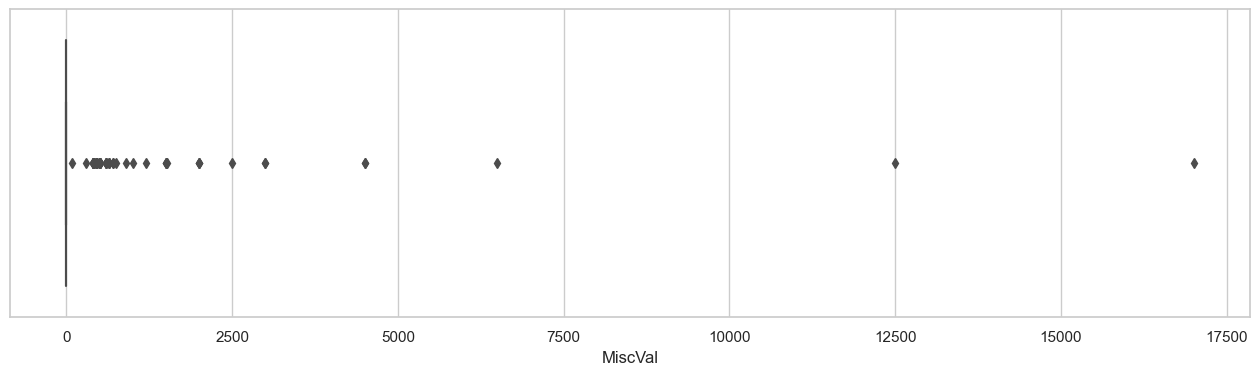

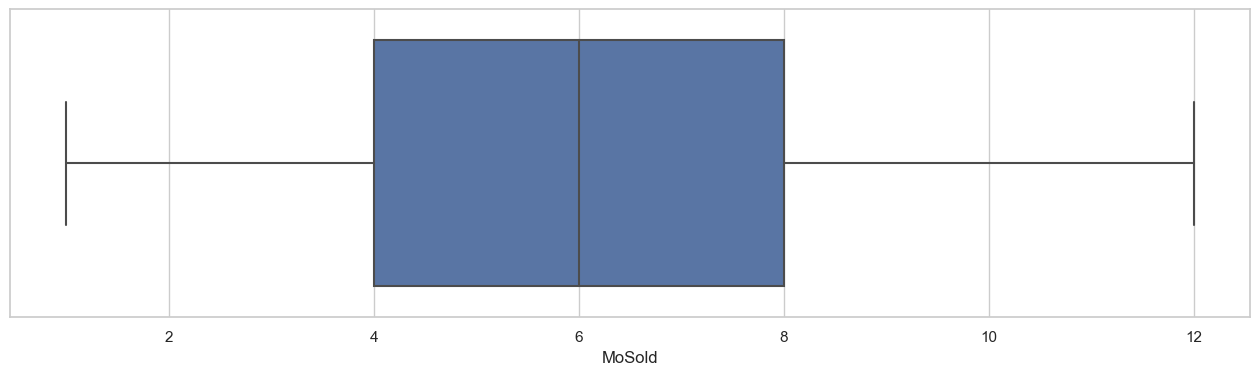

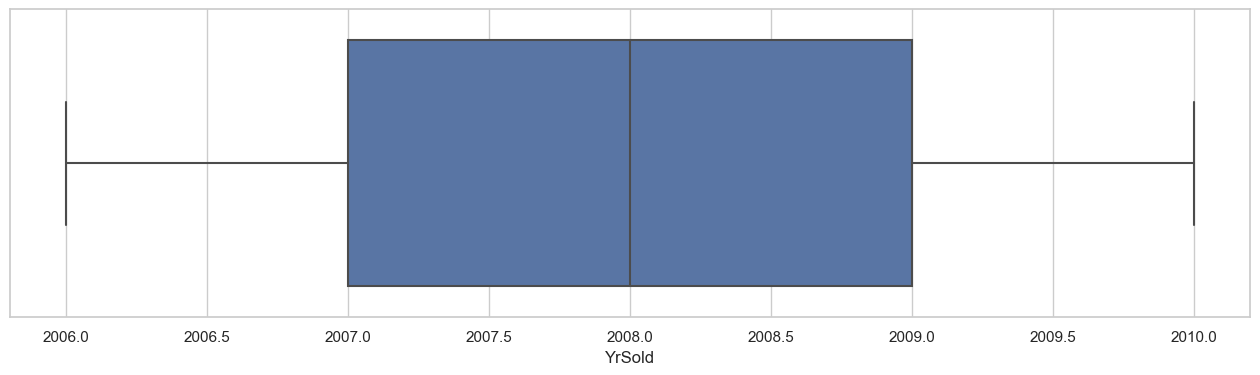

In [ ]:
numerical_df = test.select_dtypes(exclude=['object'])
#numerical_df = numerical_df.drop(["Id"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\si

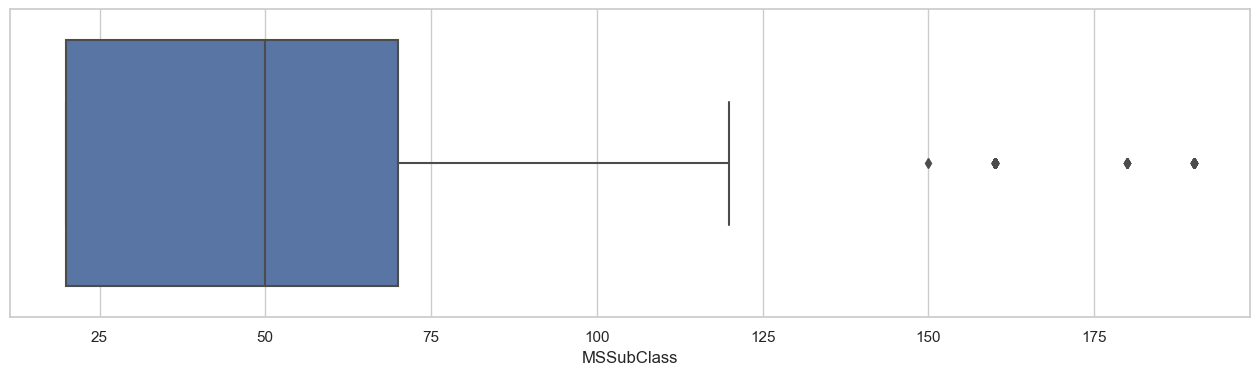

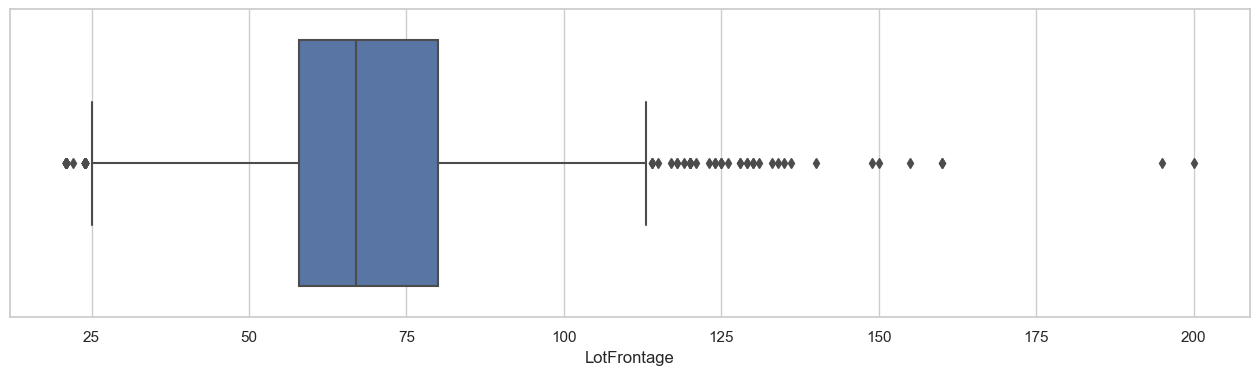

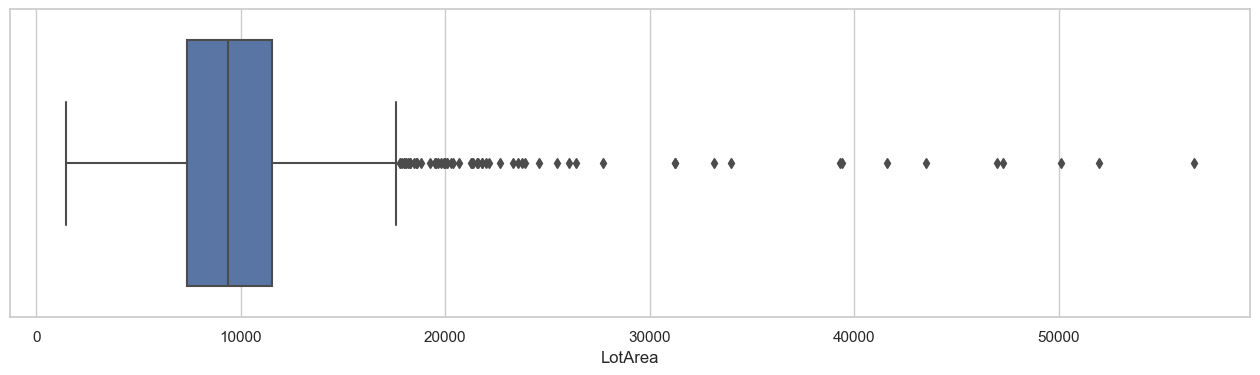

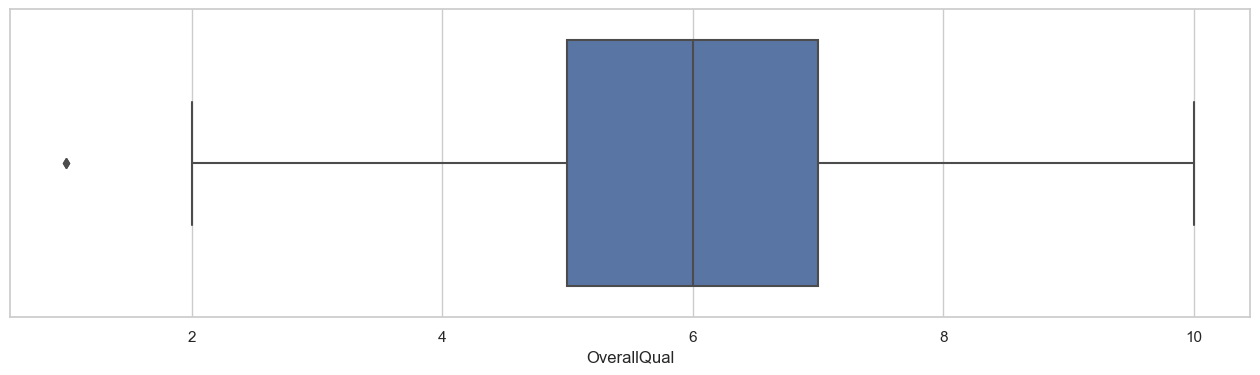

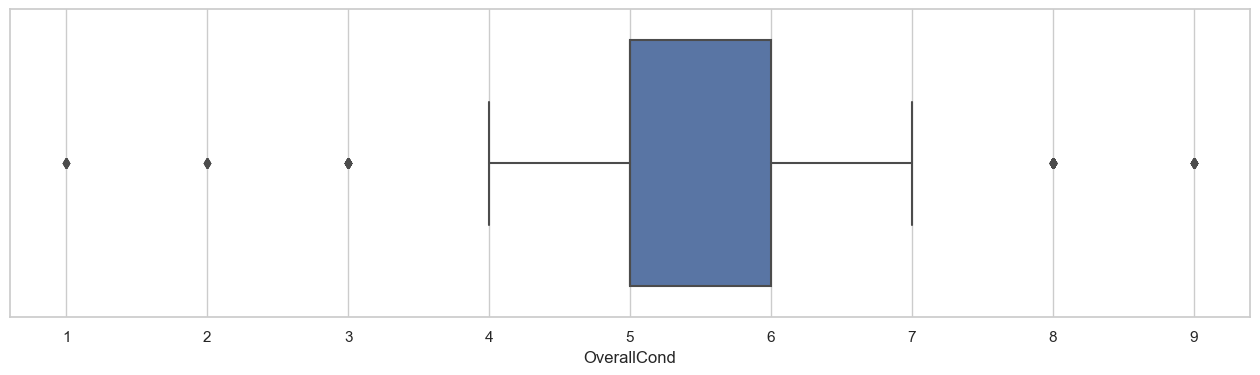

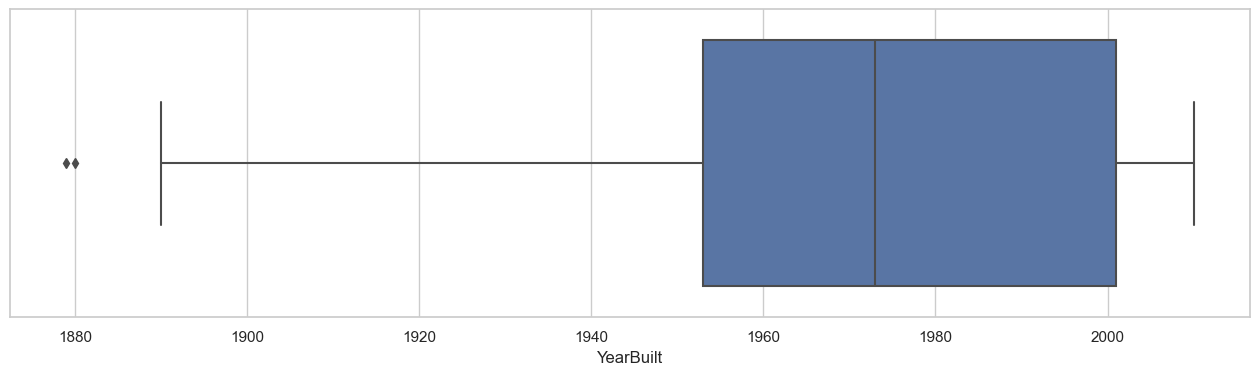

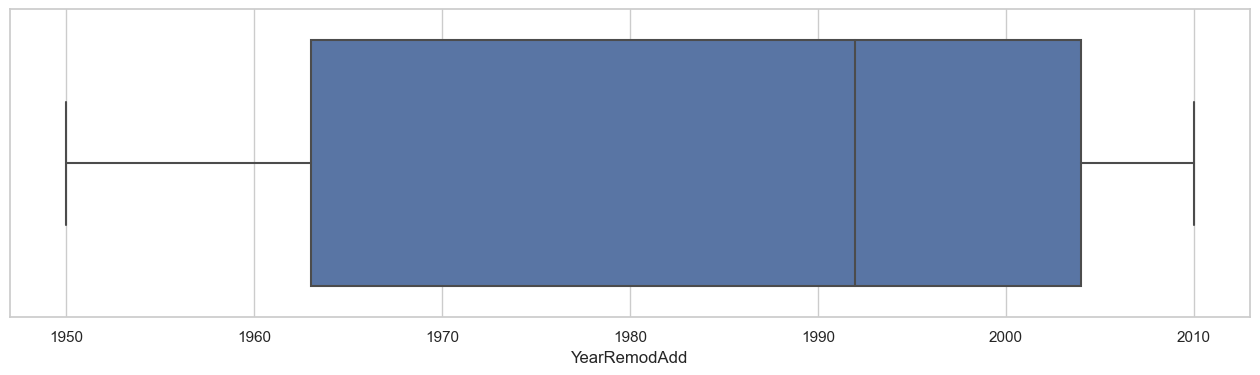

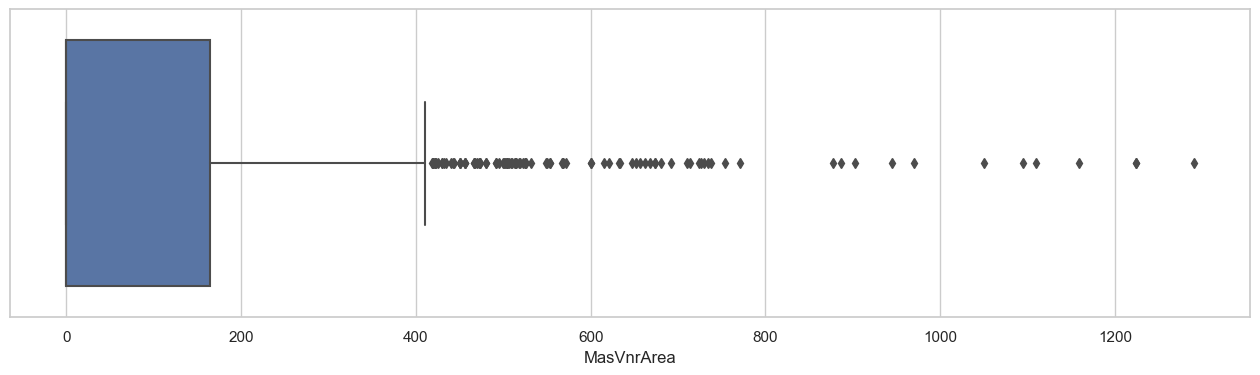

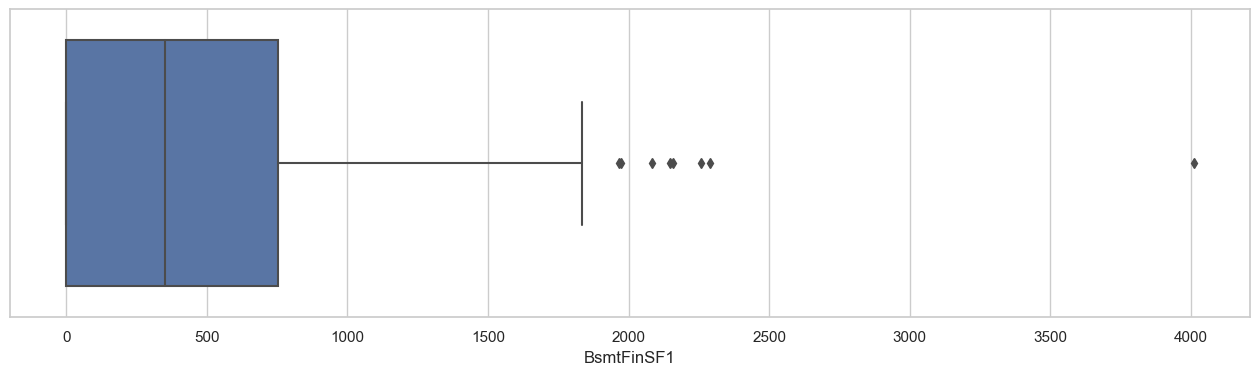

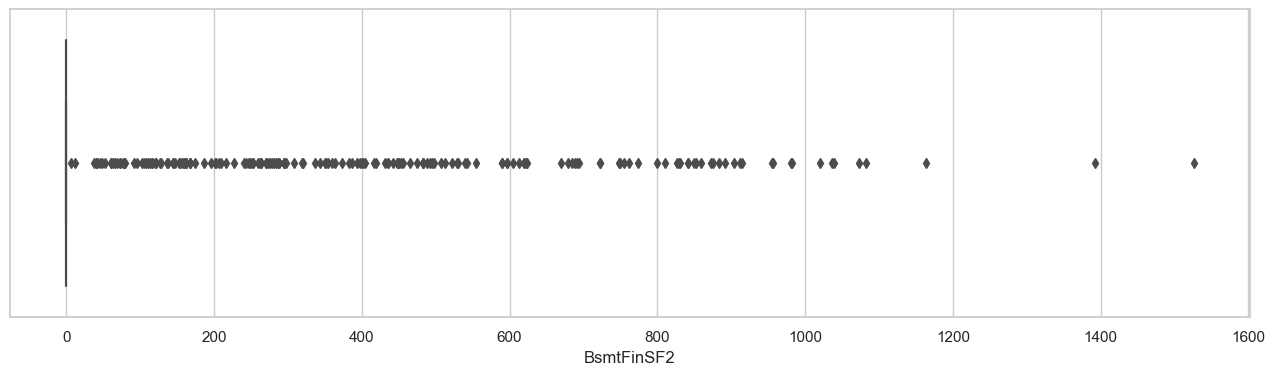

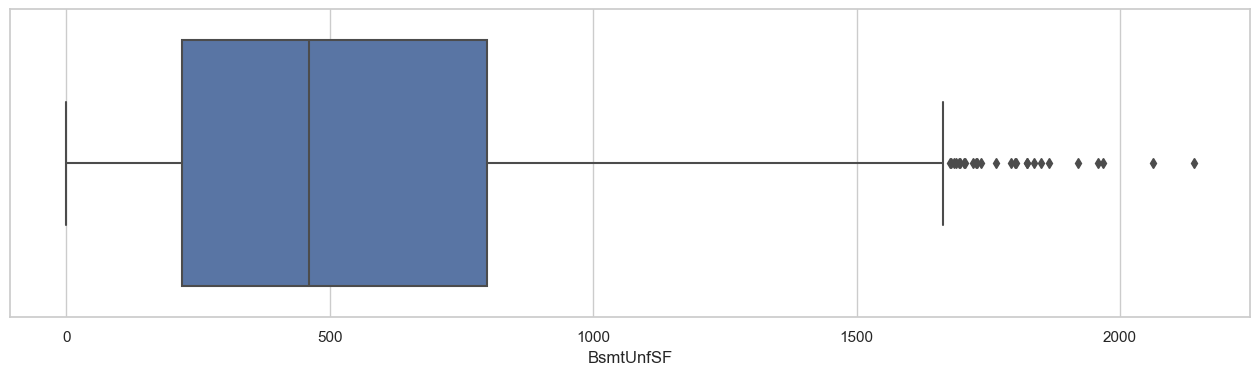

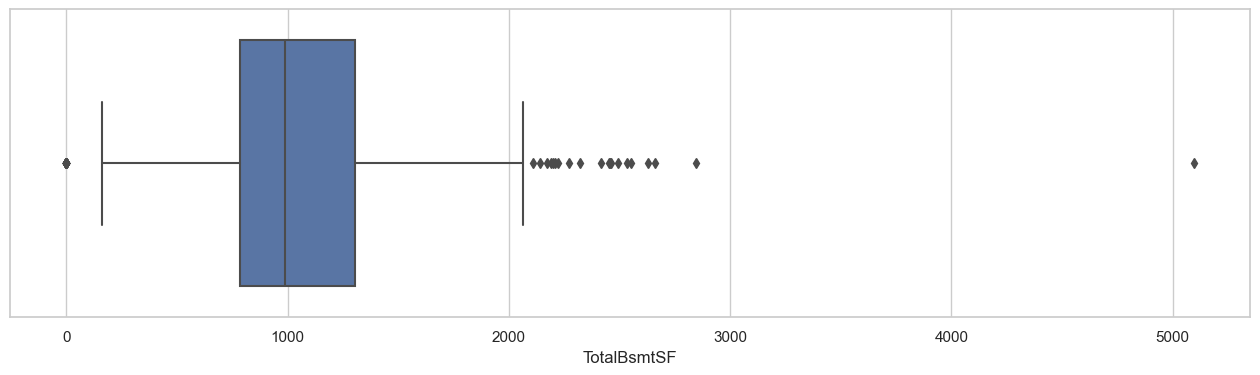

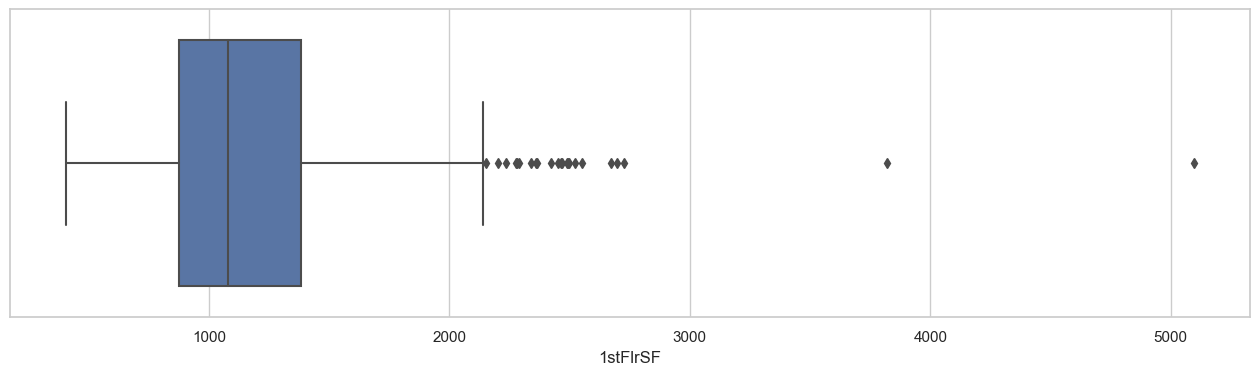

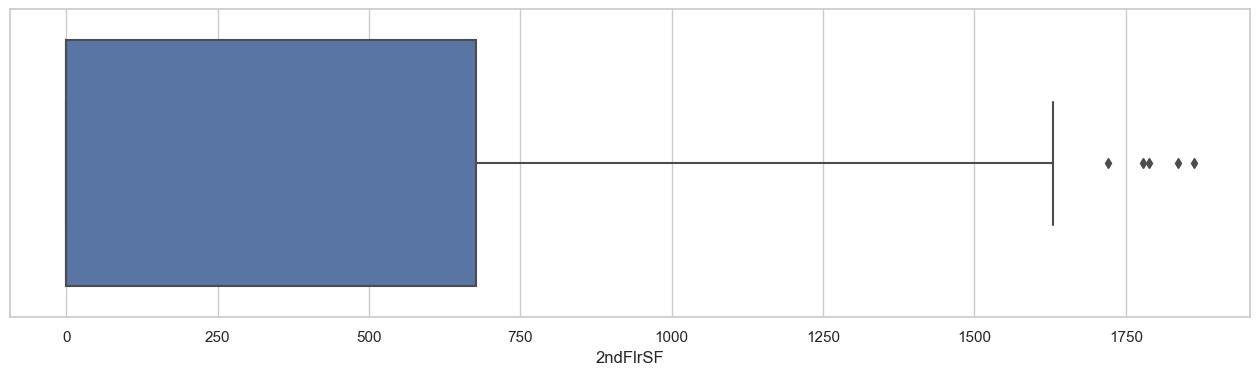

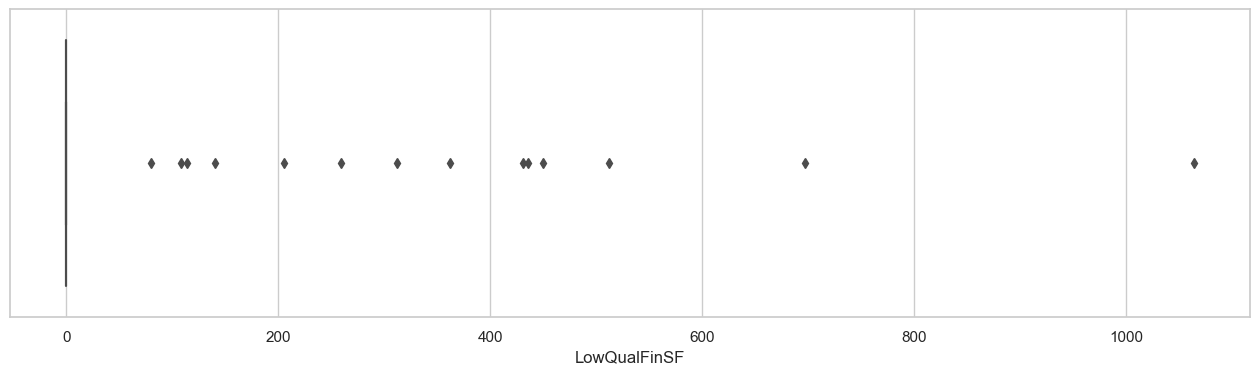

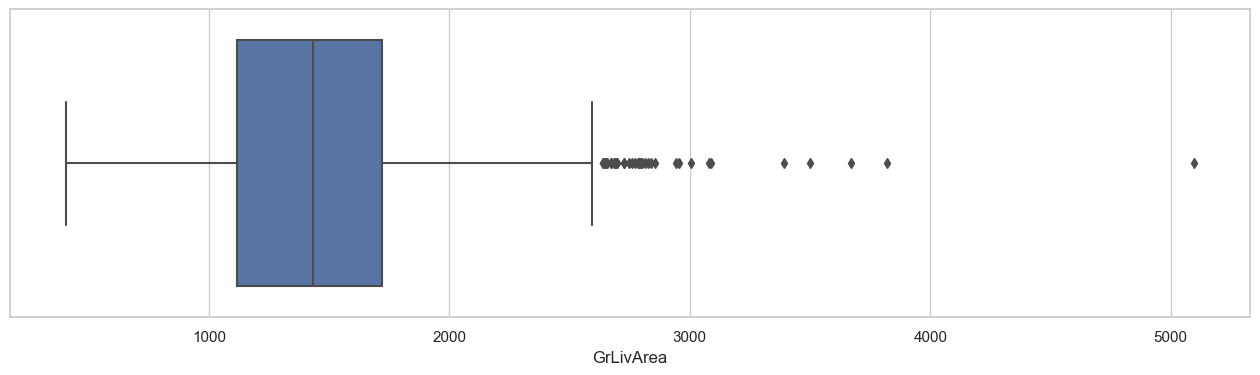

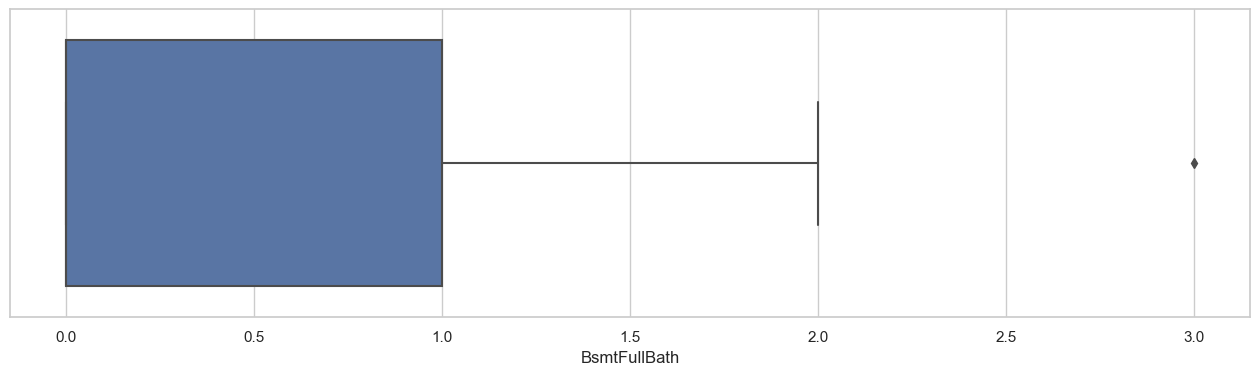

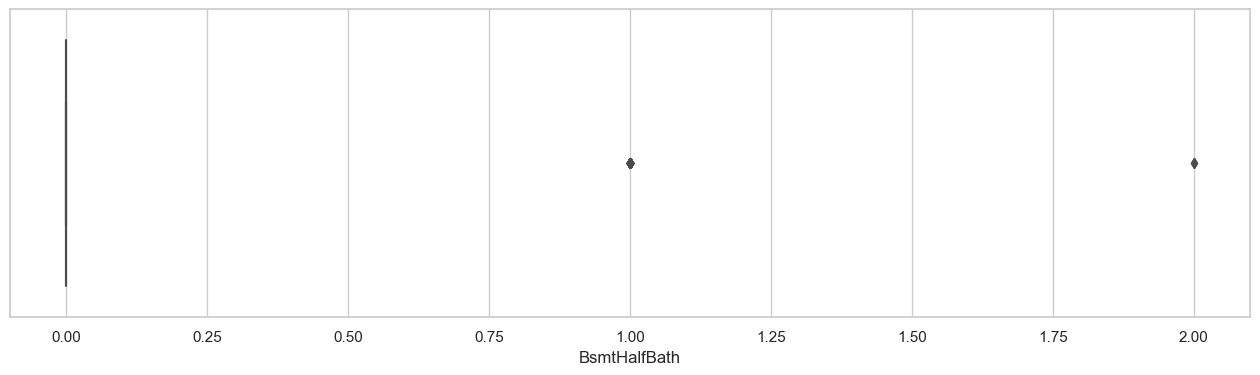

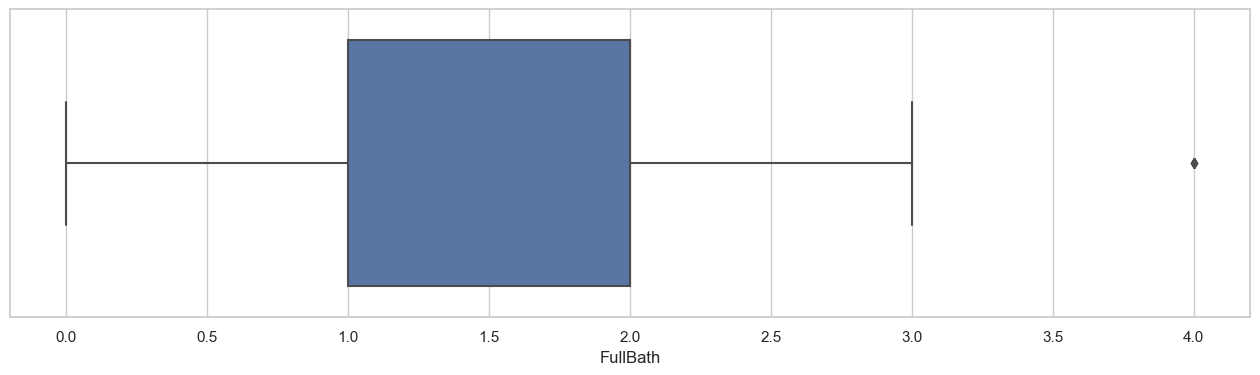

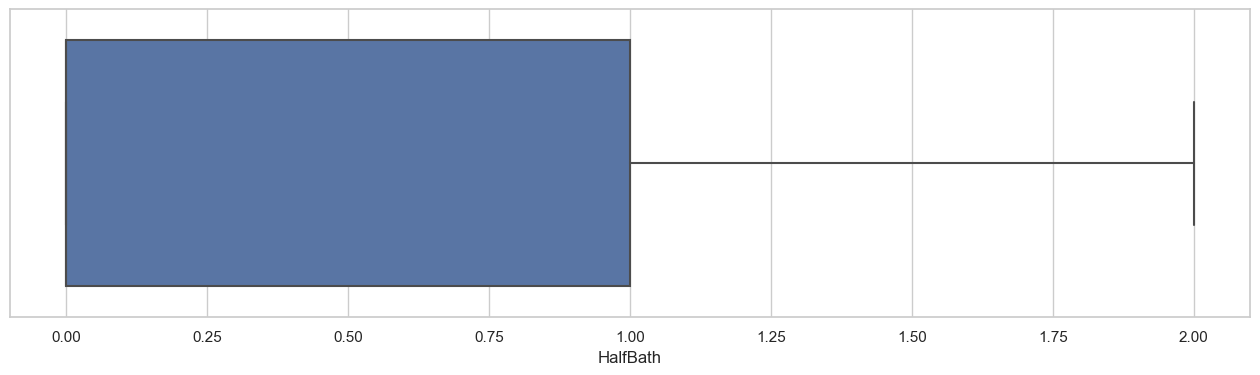

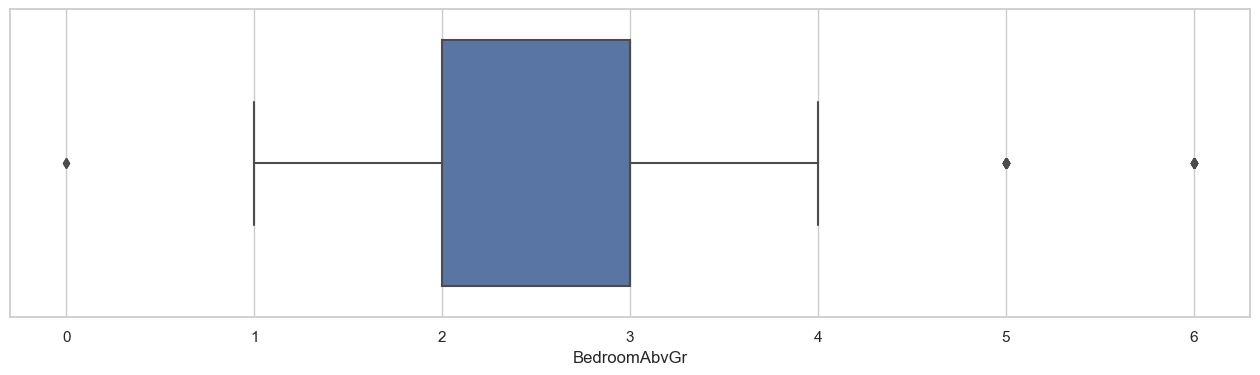

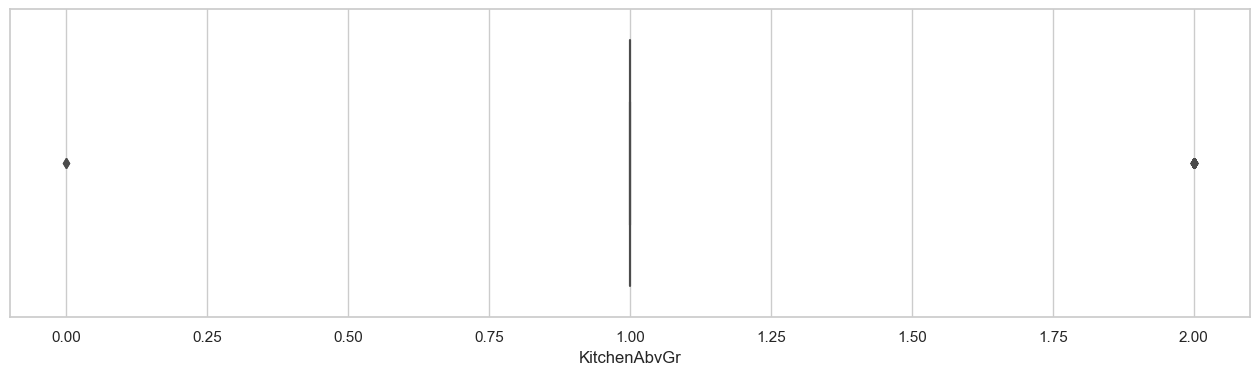

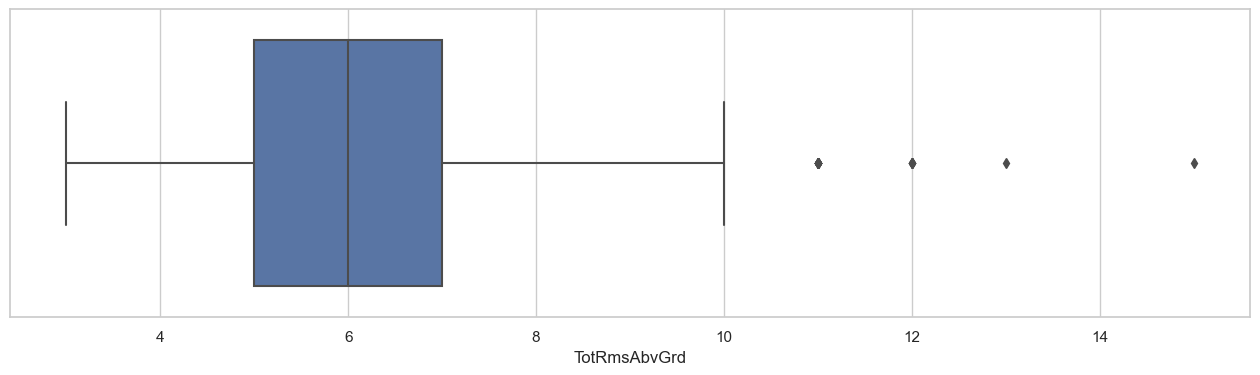

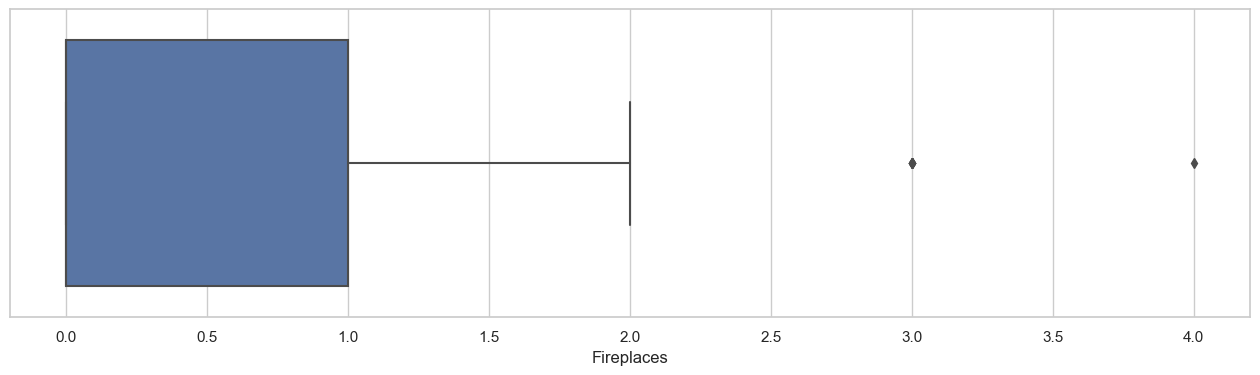

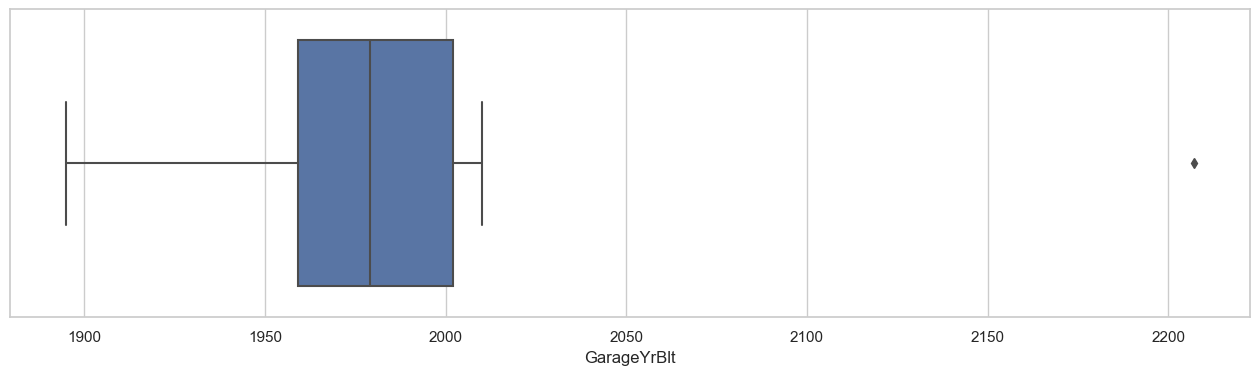

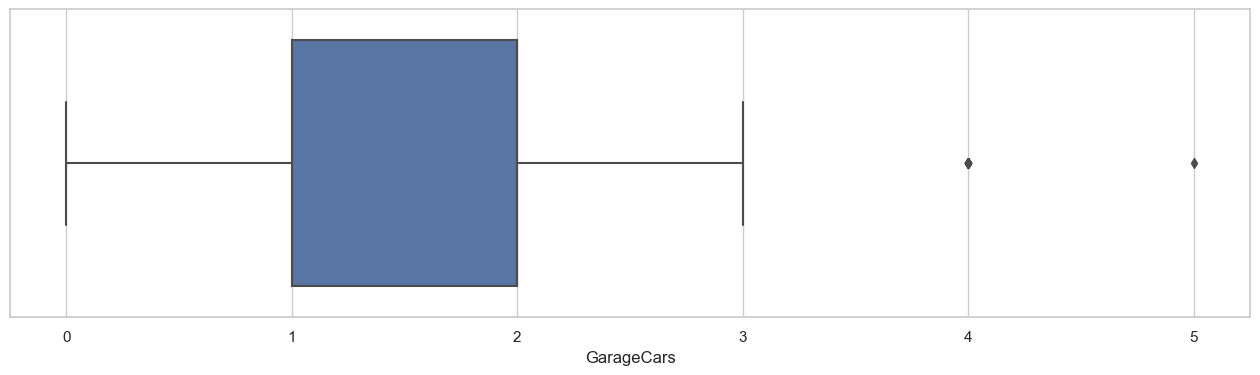

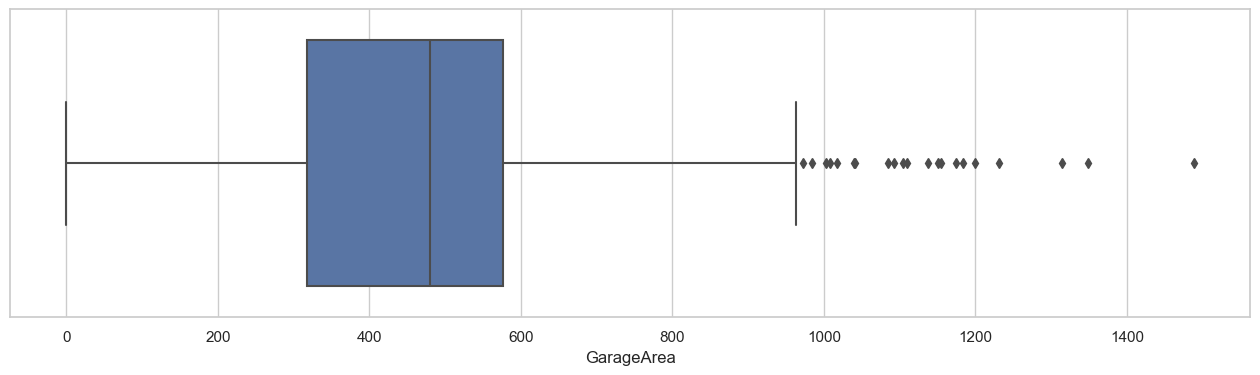

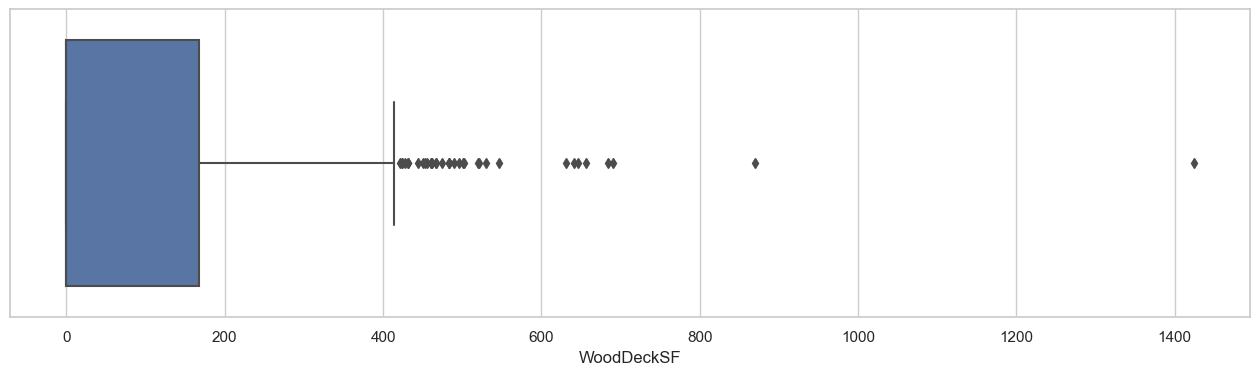

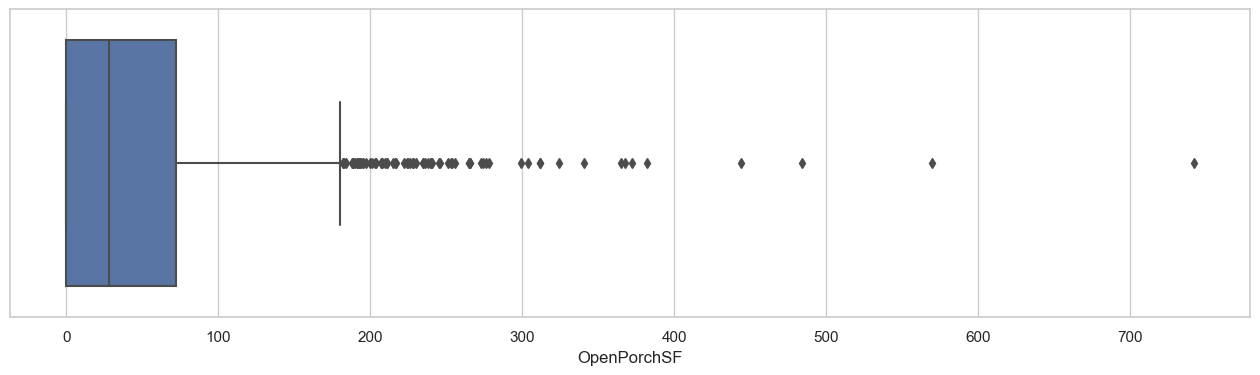

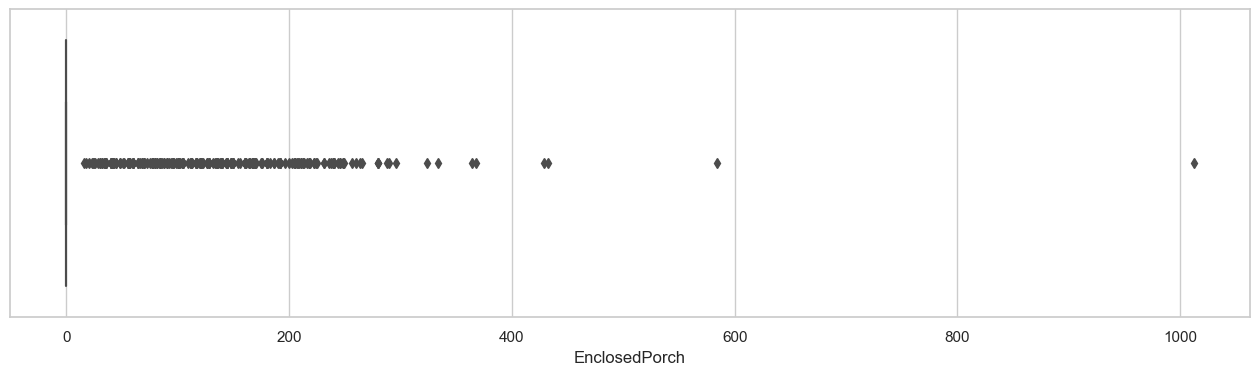

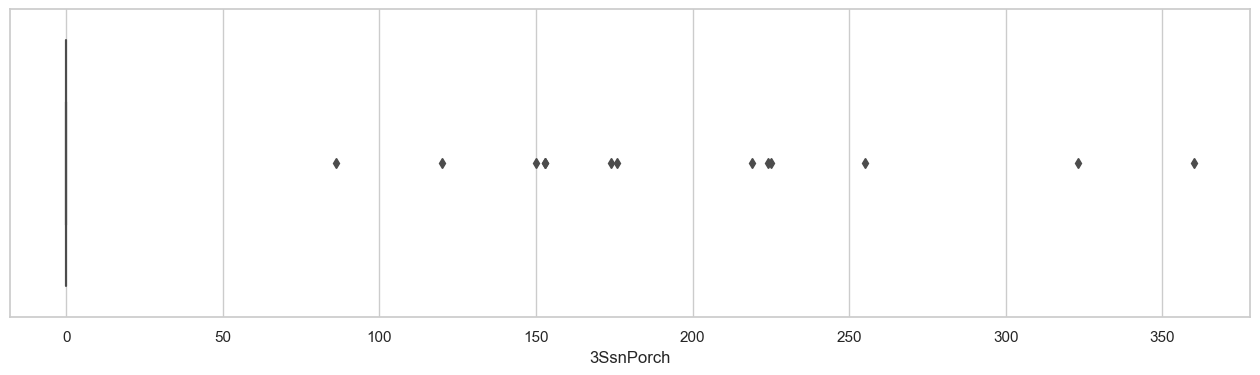

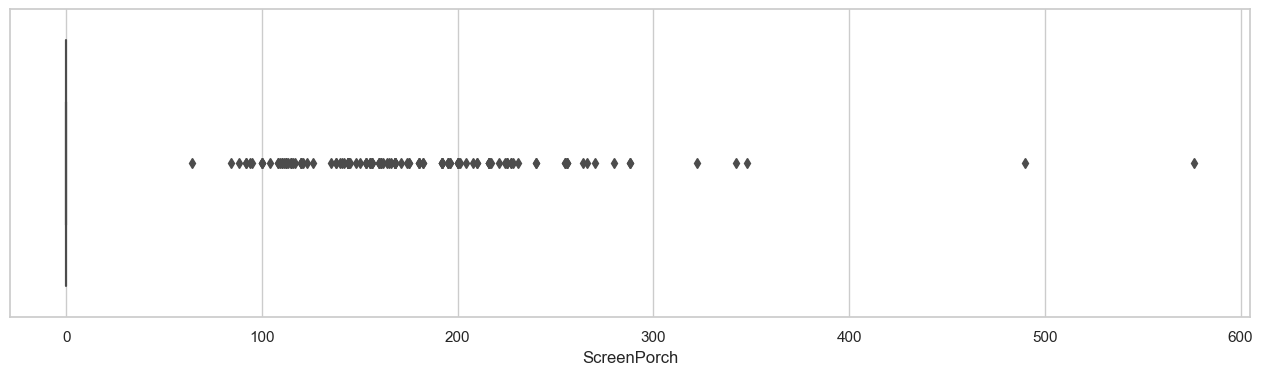

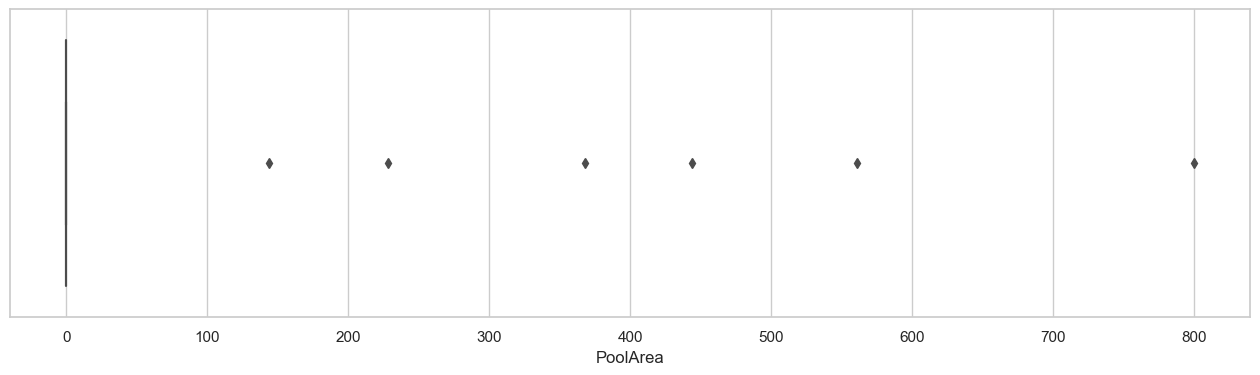

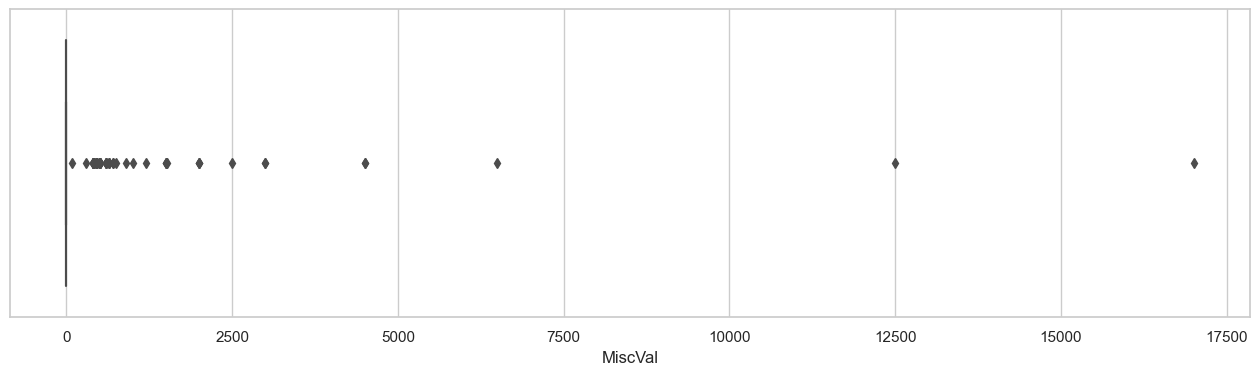

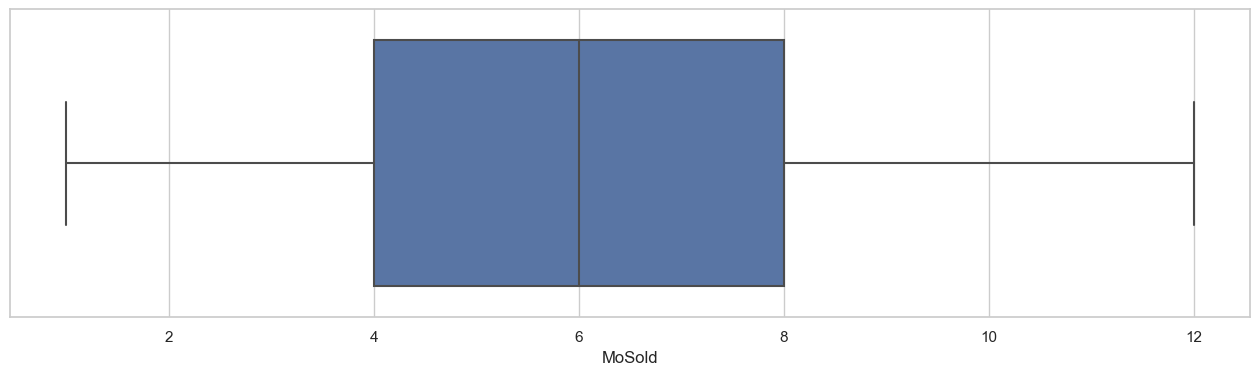

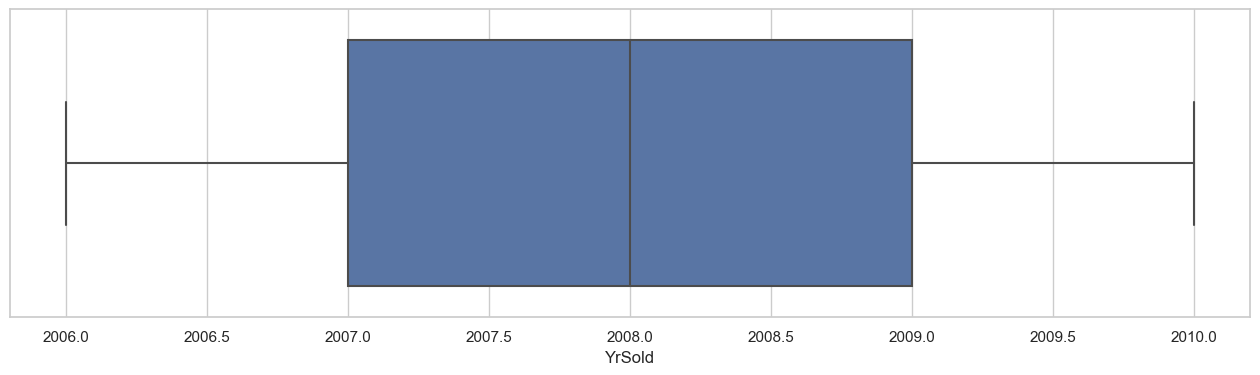

In [ ]:
numerical_df = test.select_dtypes(exclude=['object'])
#numerical_df = numerical_df.drop(["Id"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\si

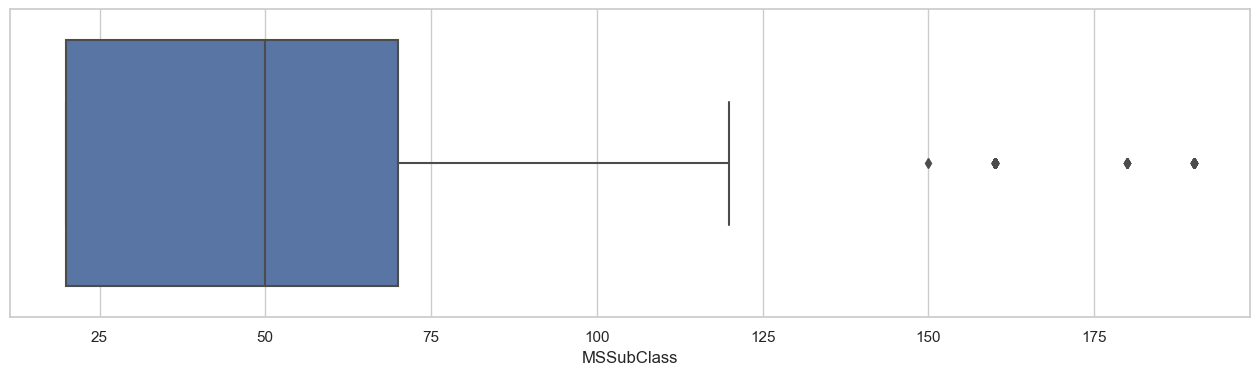

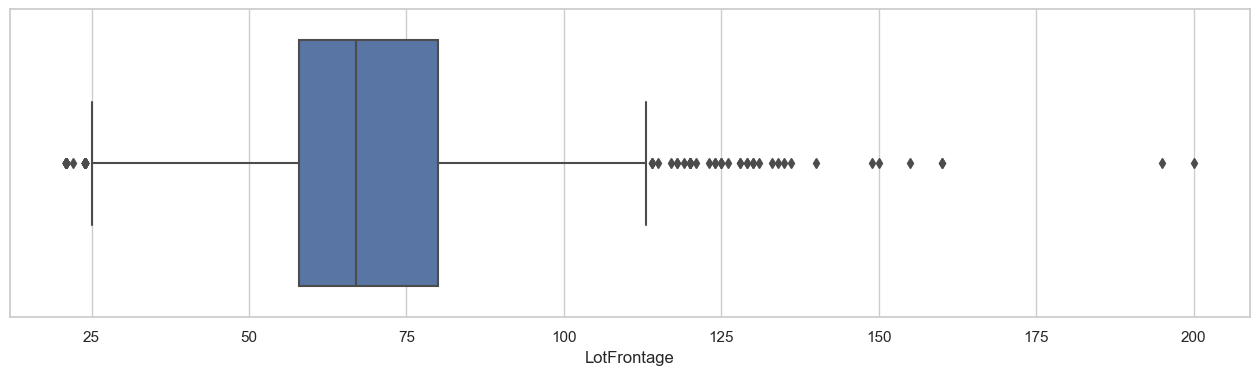

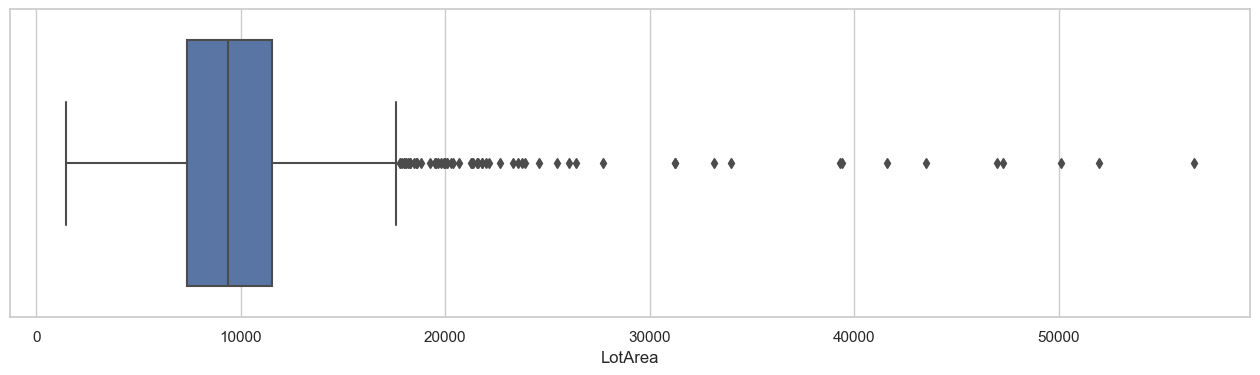

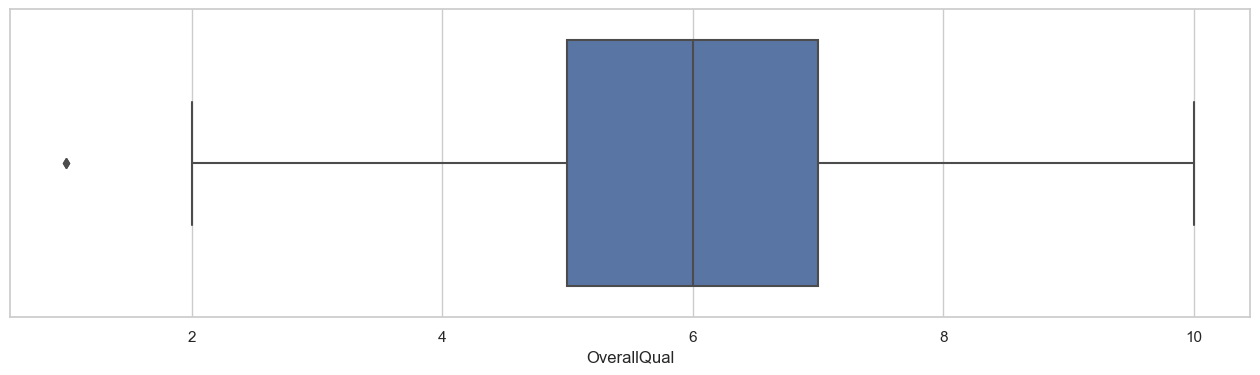

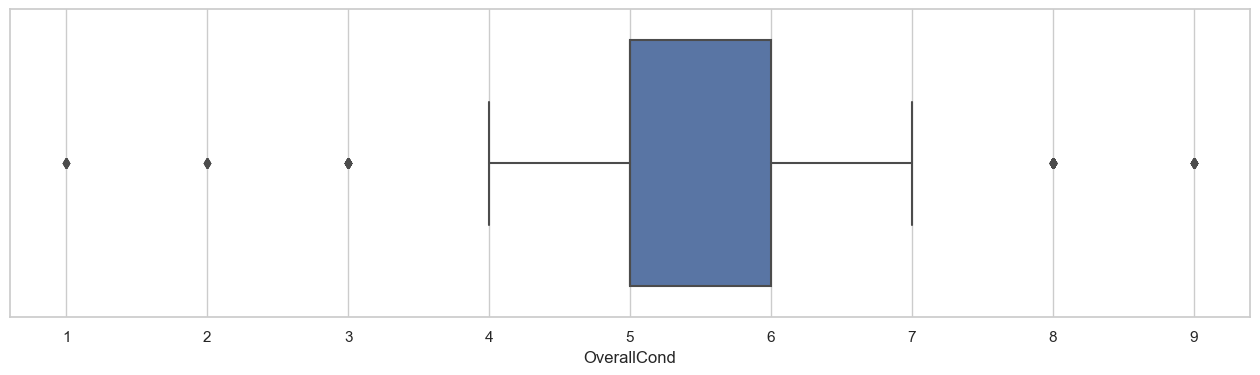

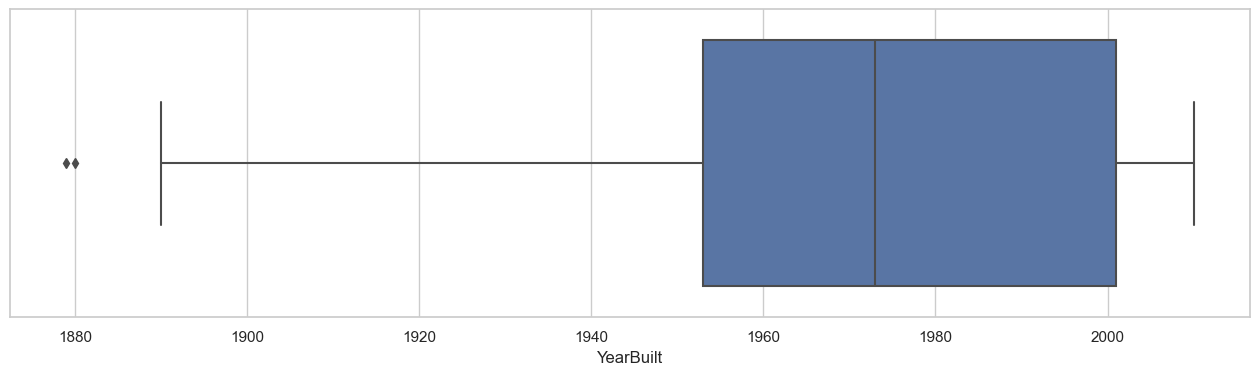

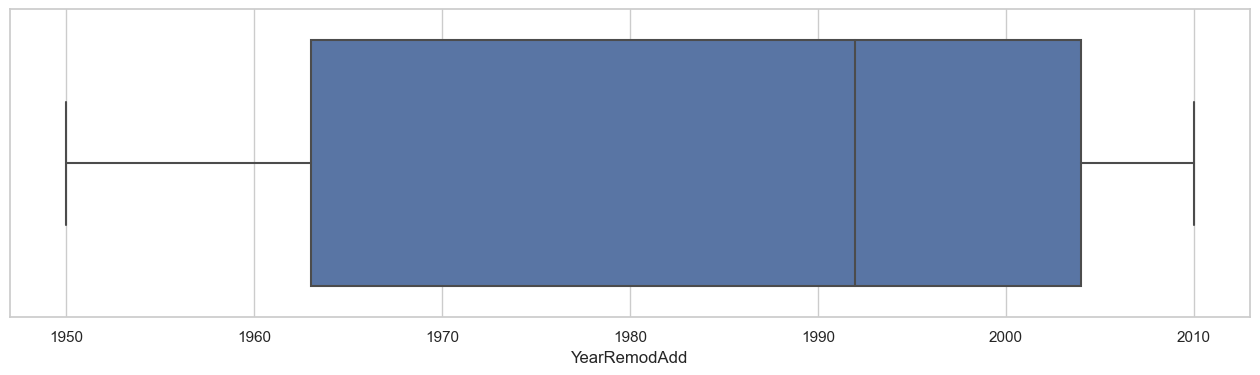

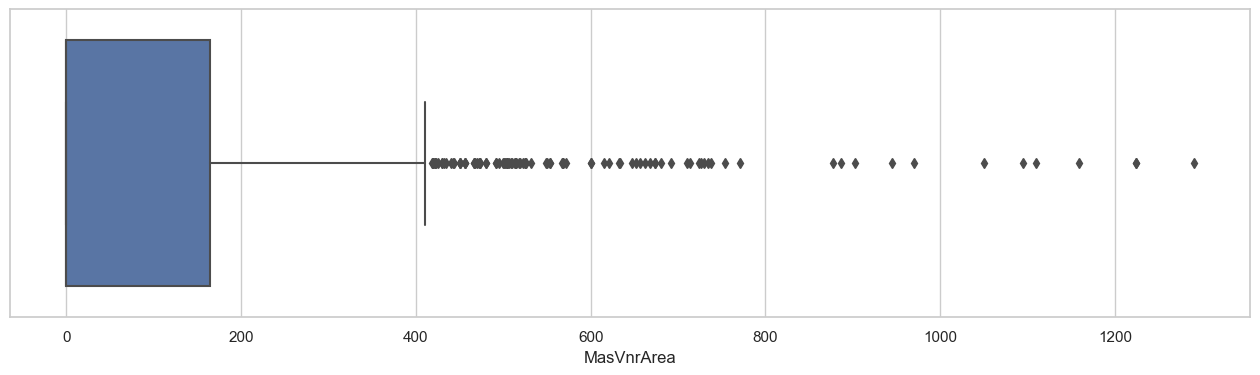

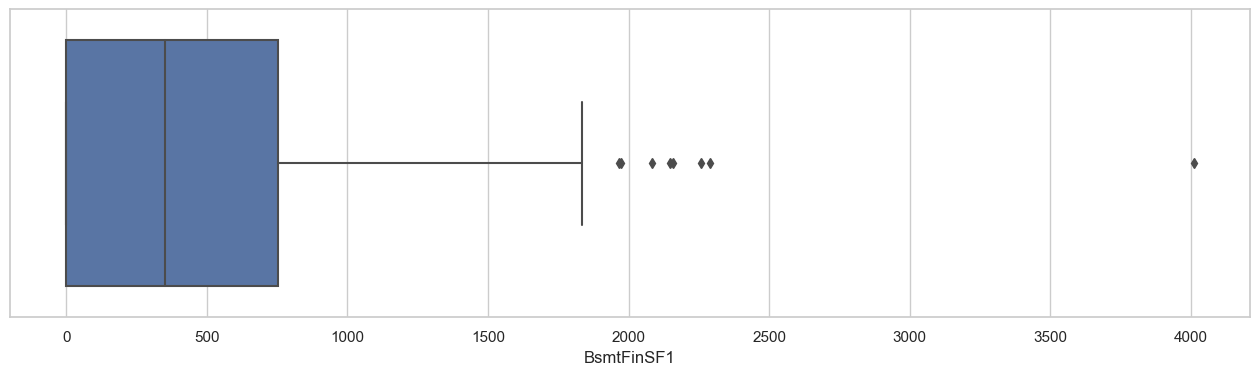

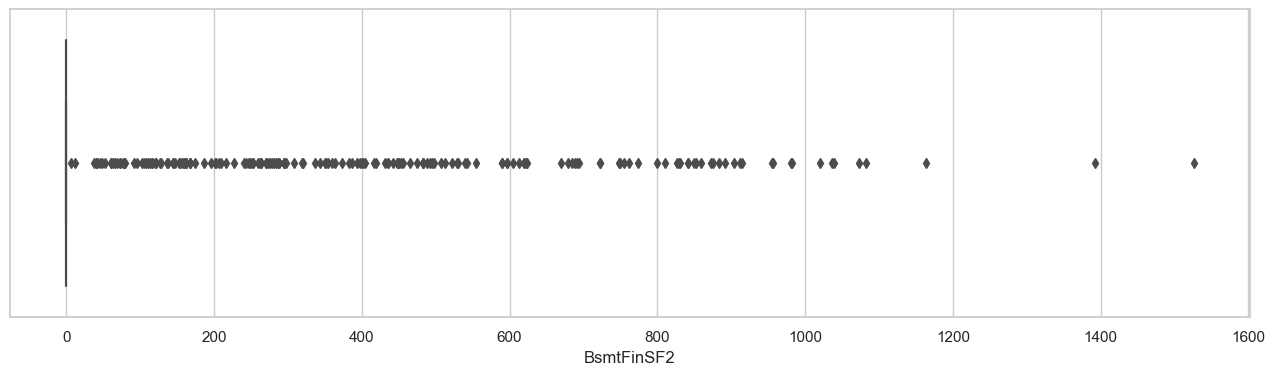

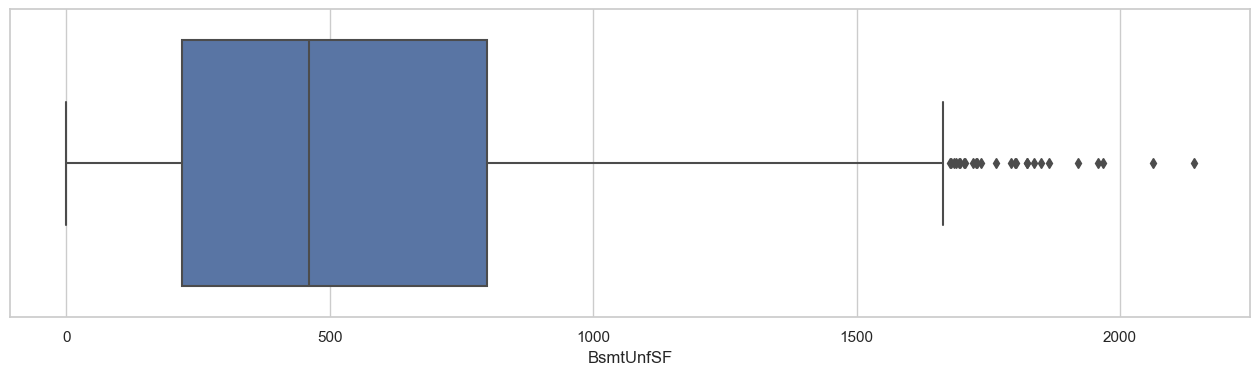

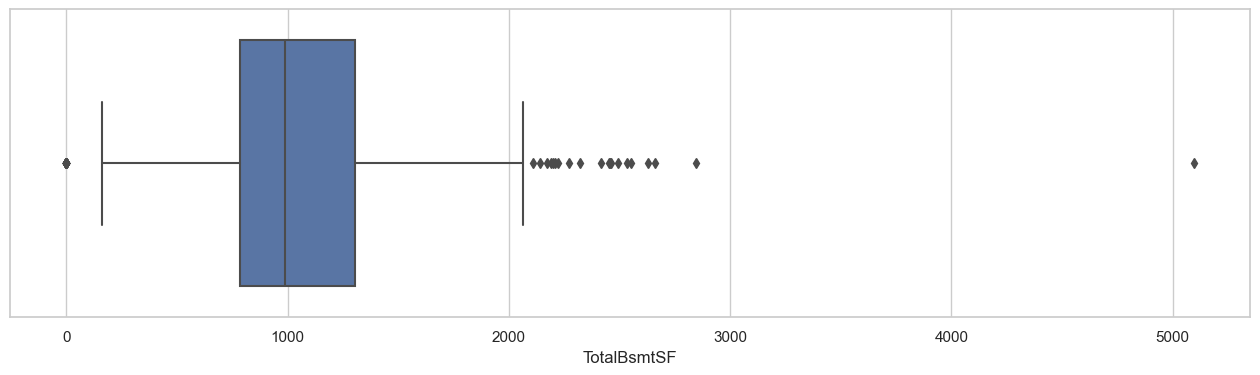

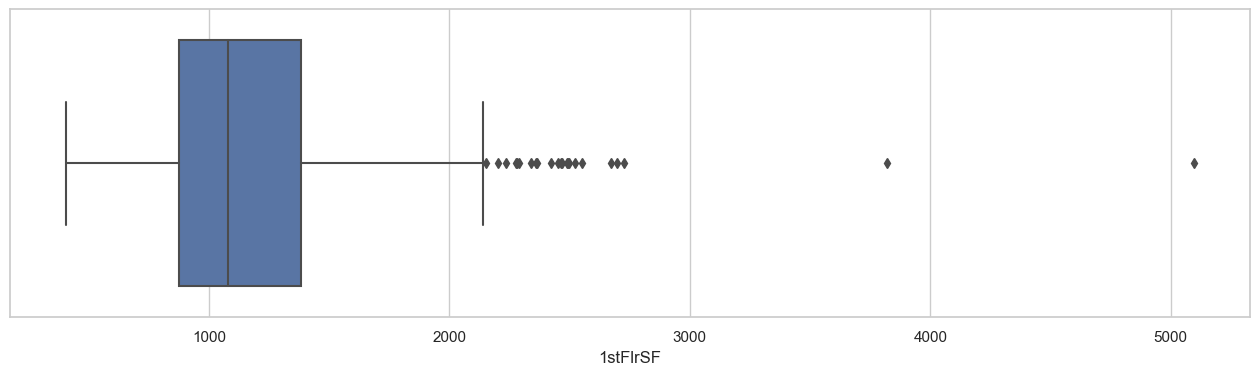

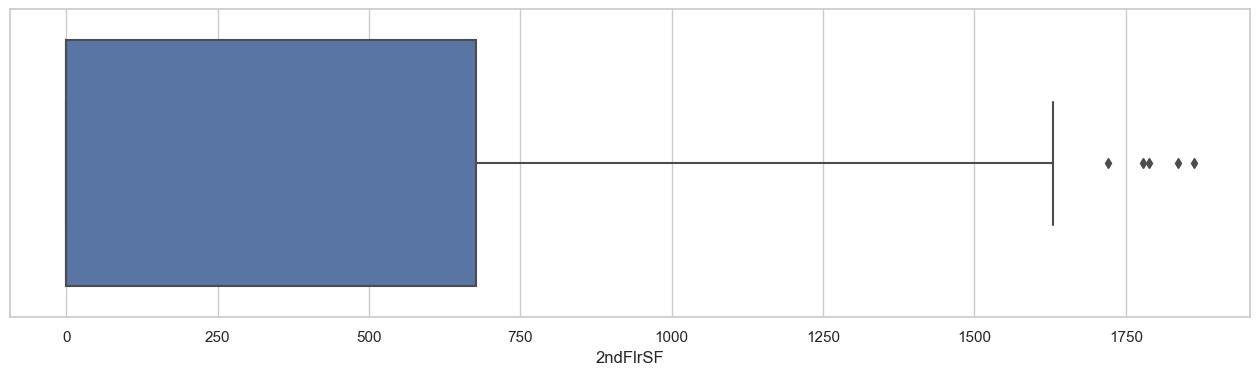

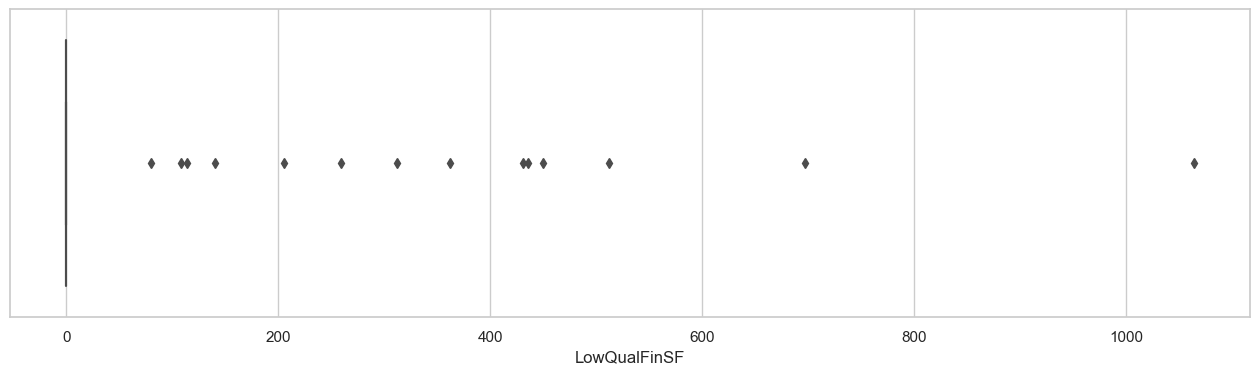

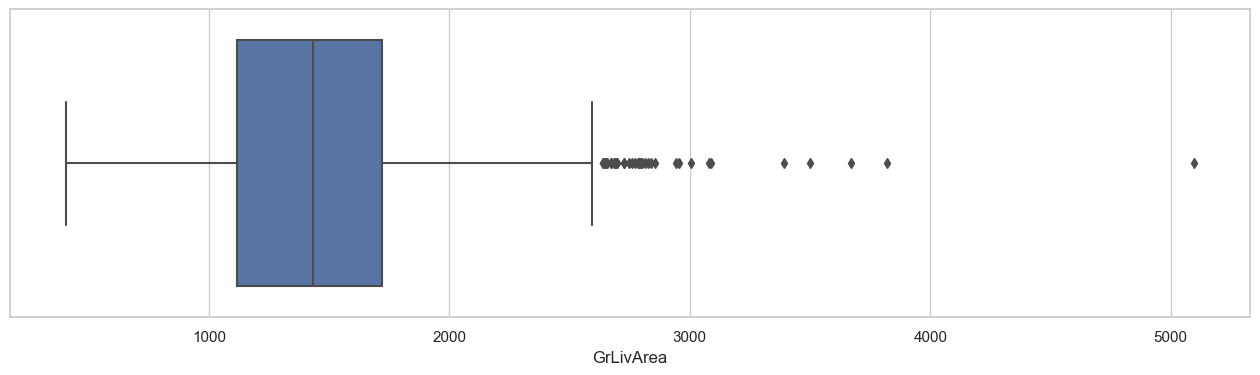

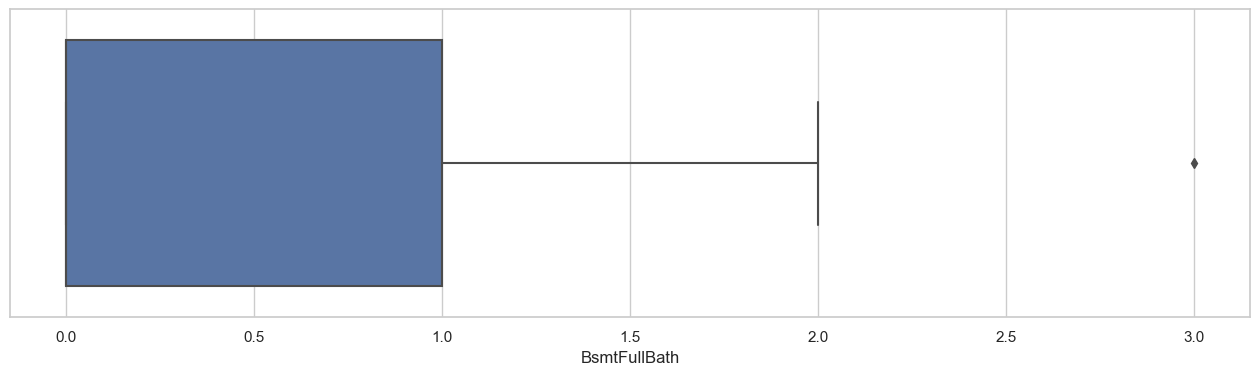

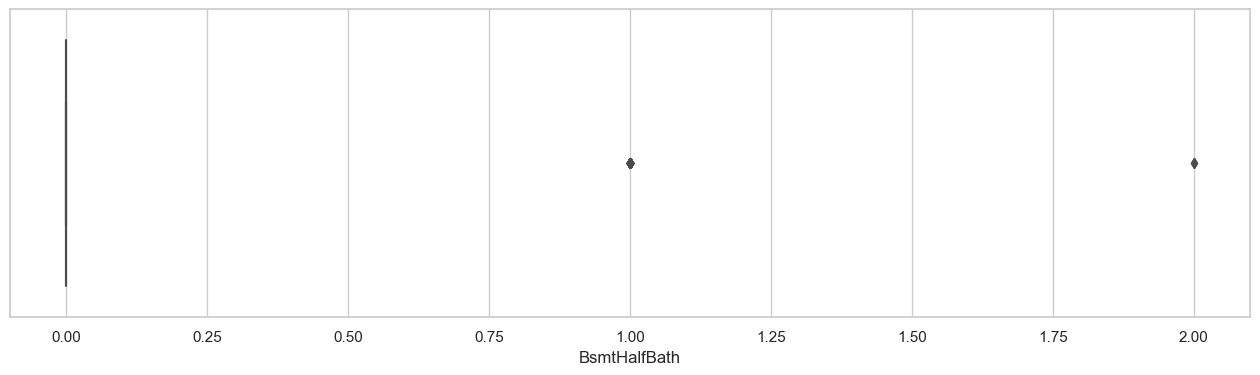

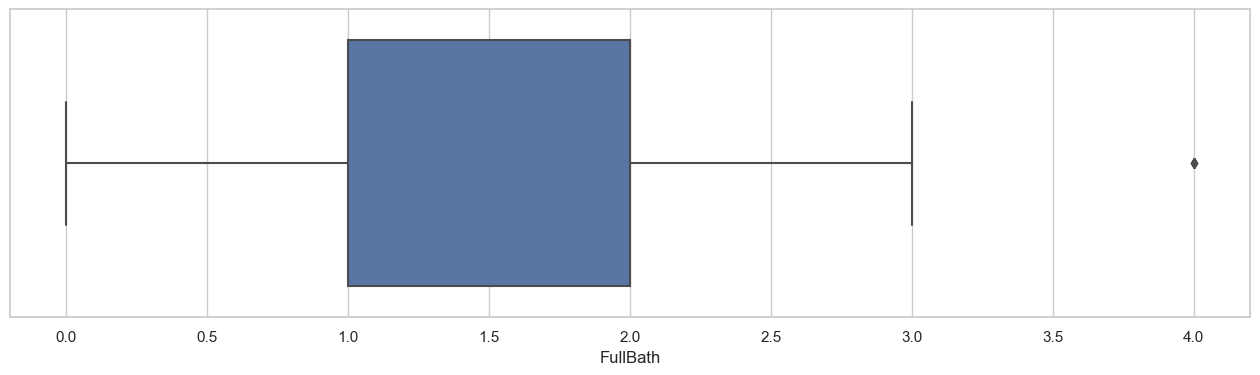

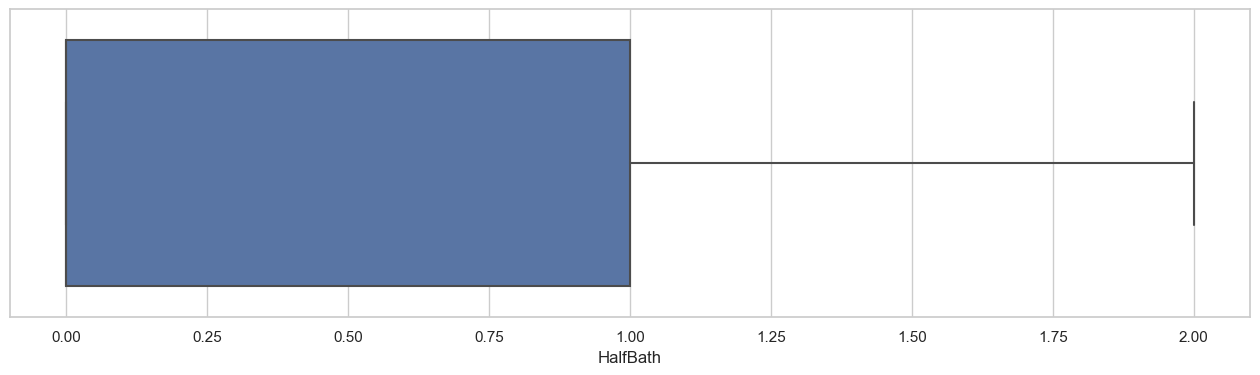

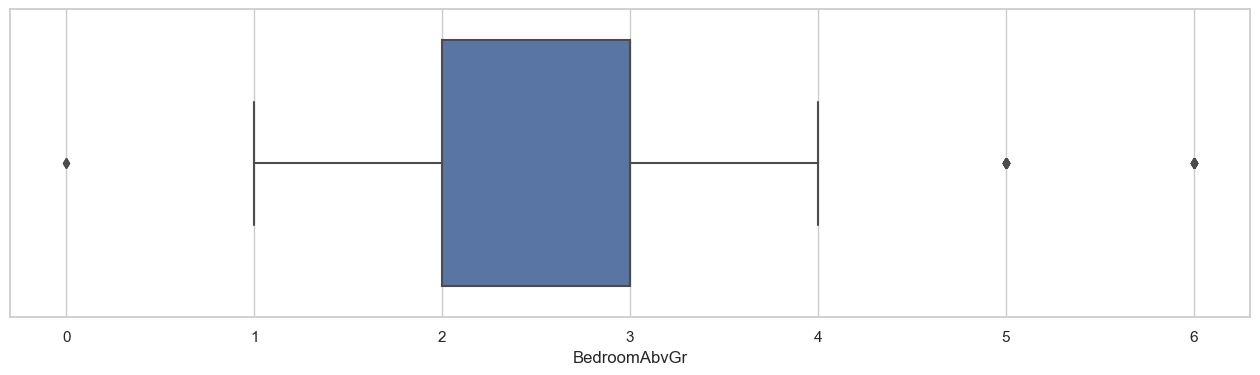

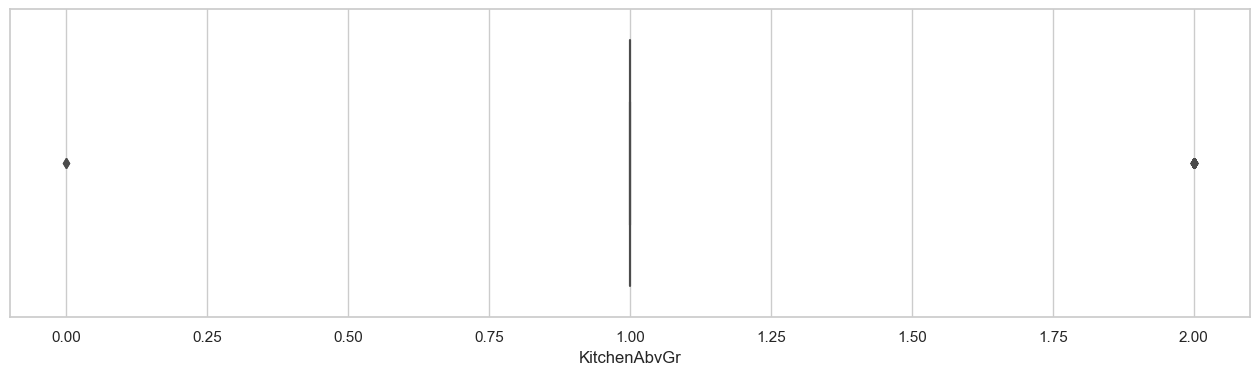

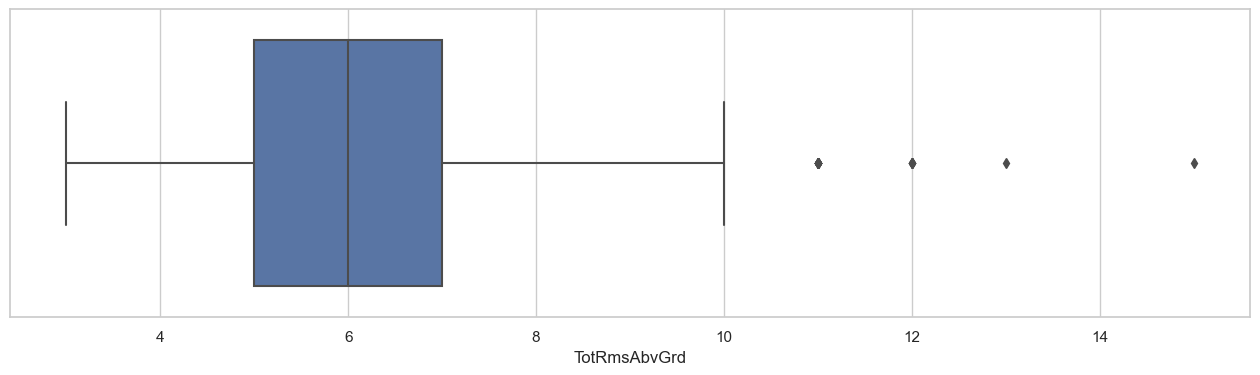

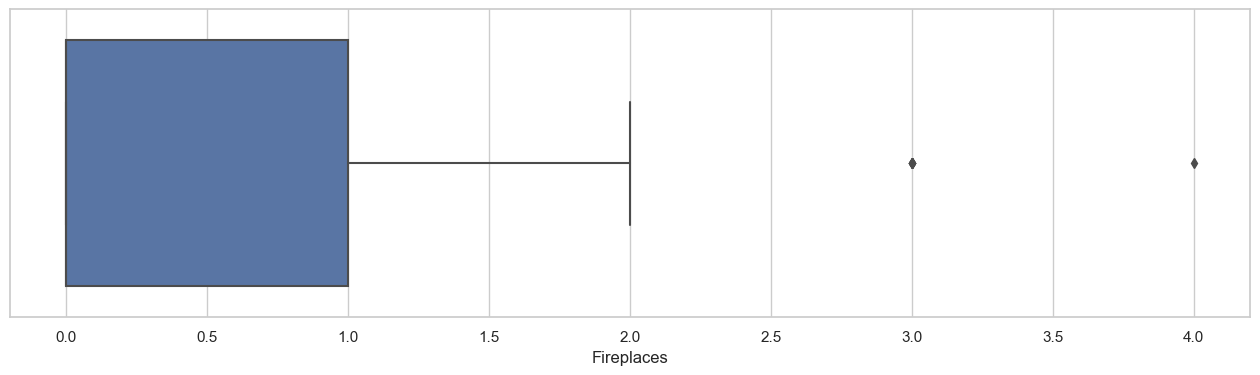

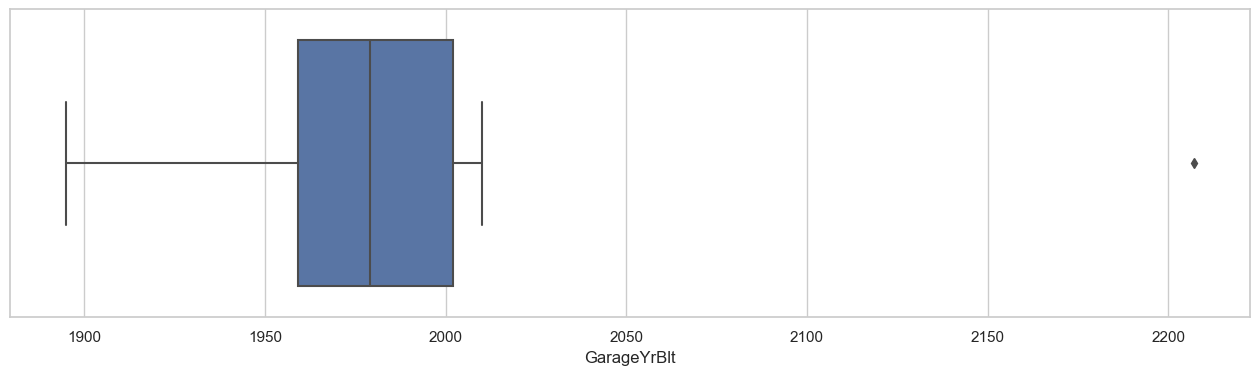

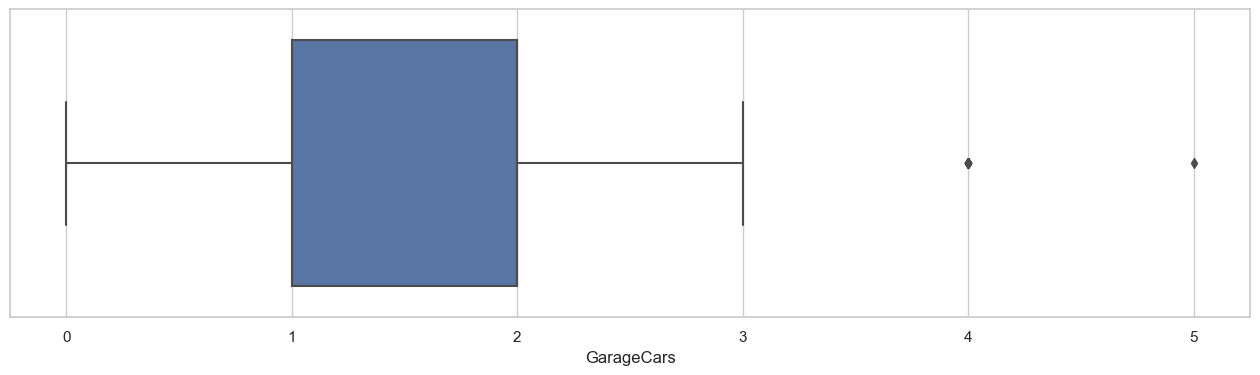

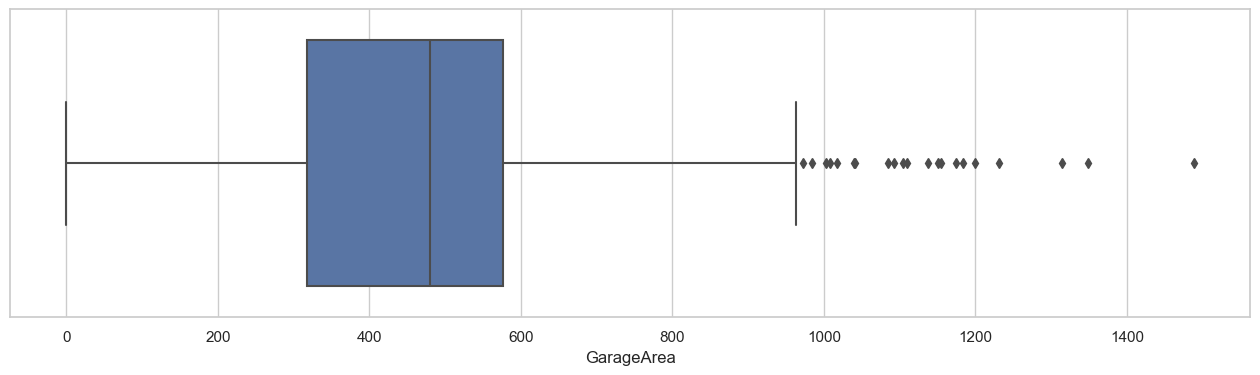

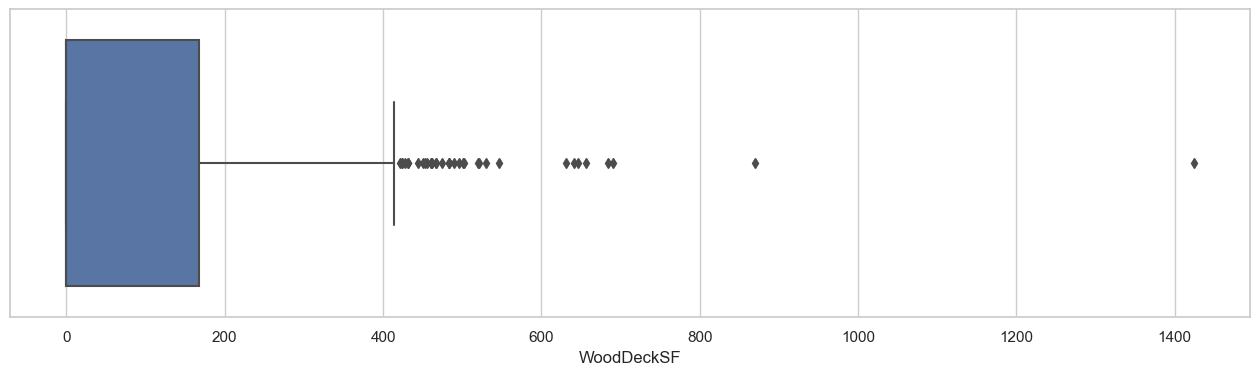

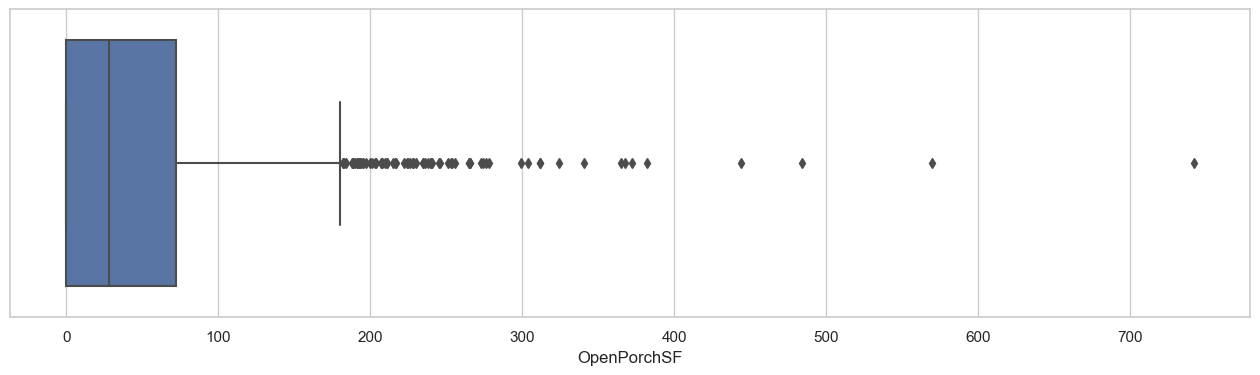

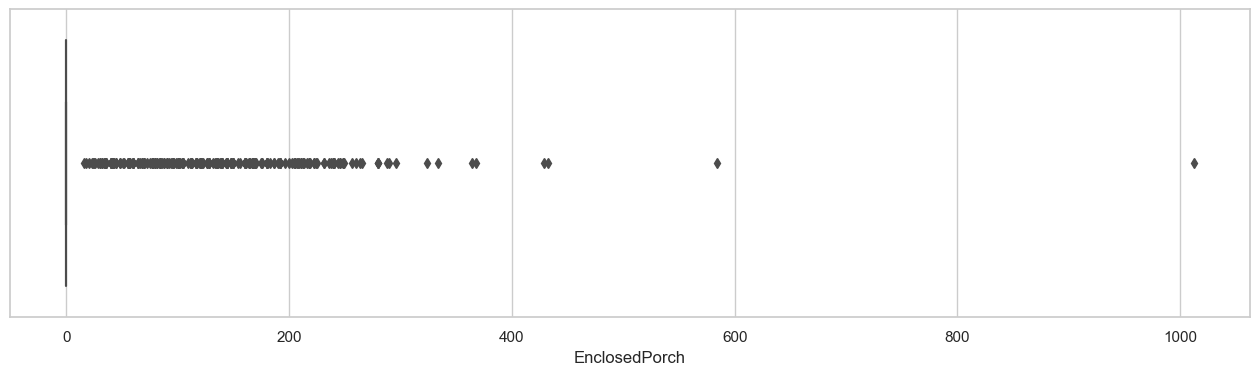

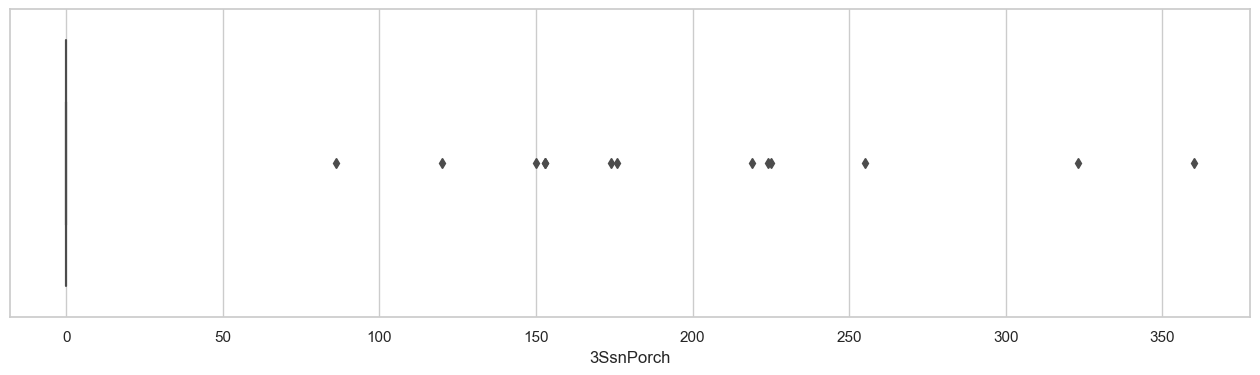

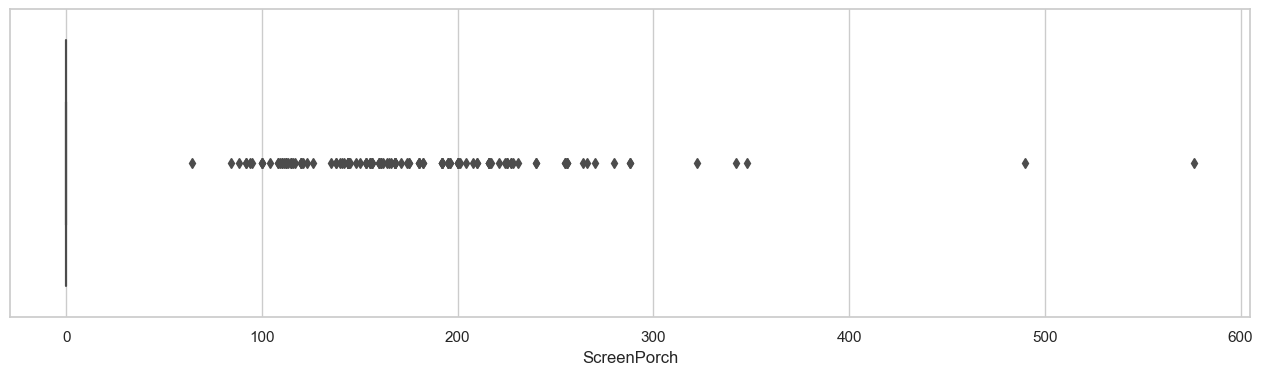

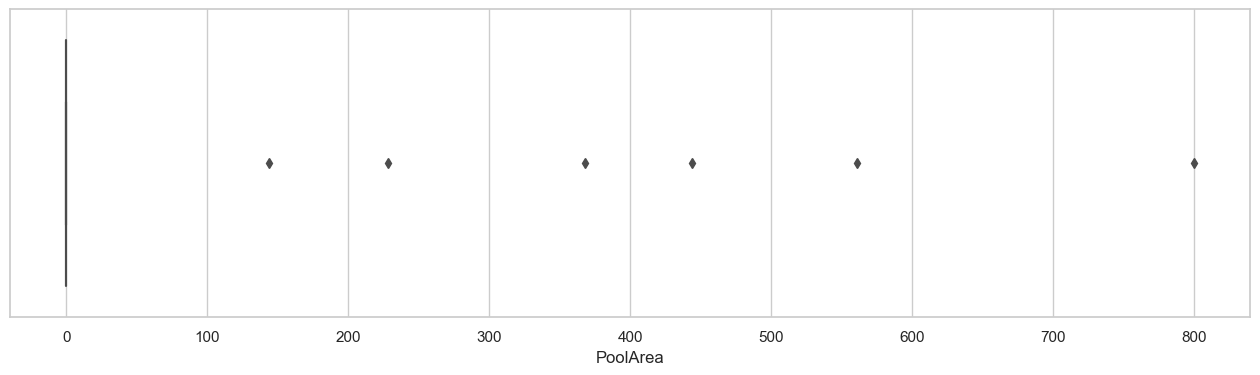

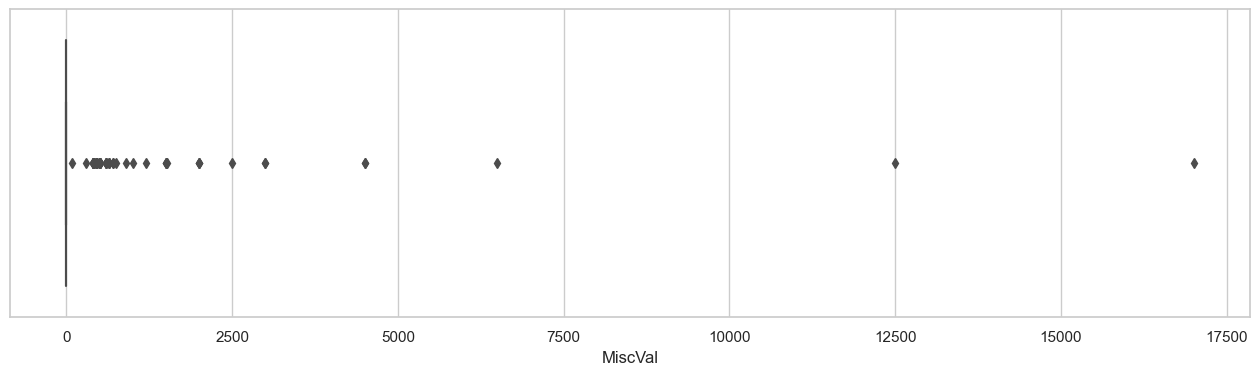

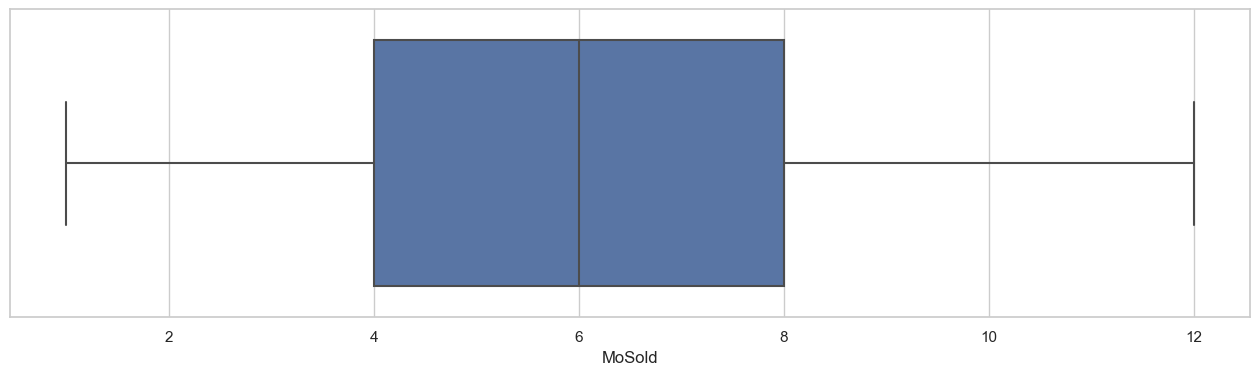

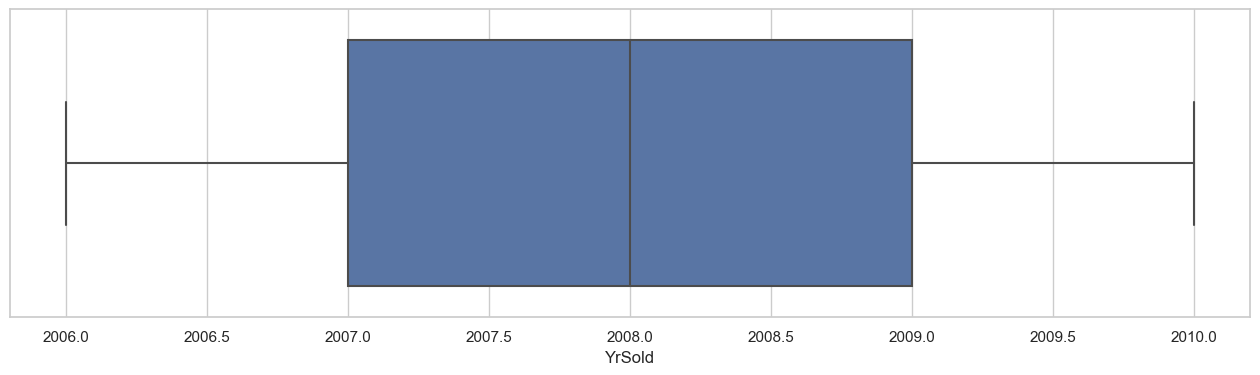

In [ ]:
numerical_df = test.select_dtypes(exclude=['object'])
#numerical_df = numerical_df.drop(["Id"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\si

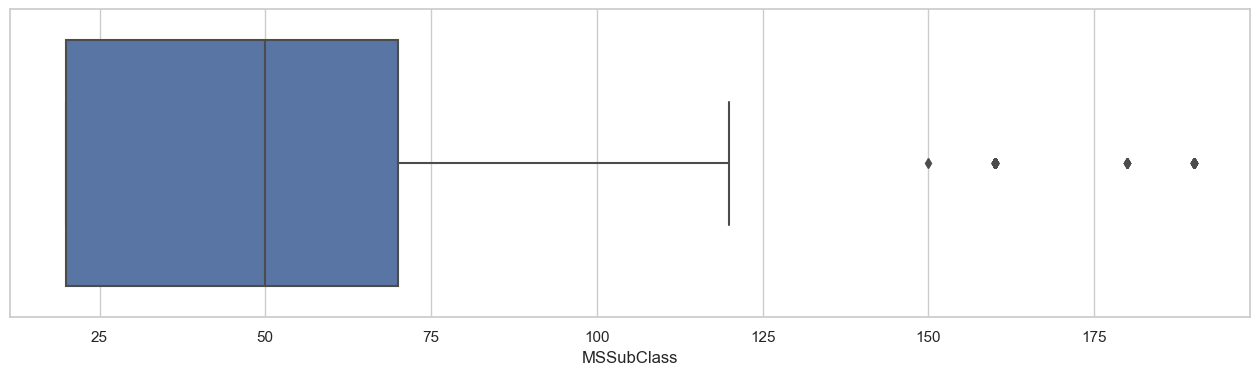

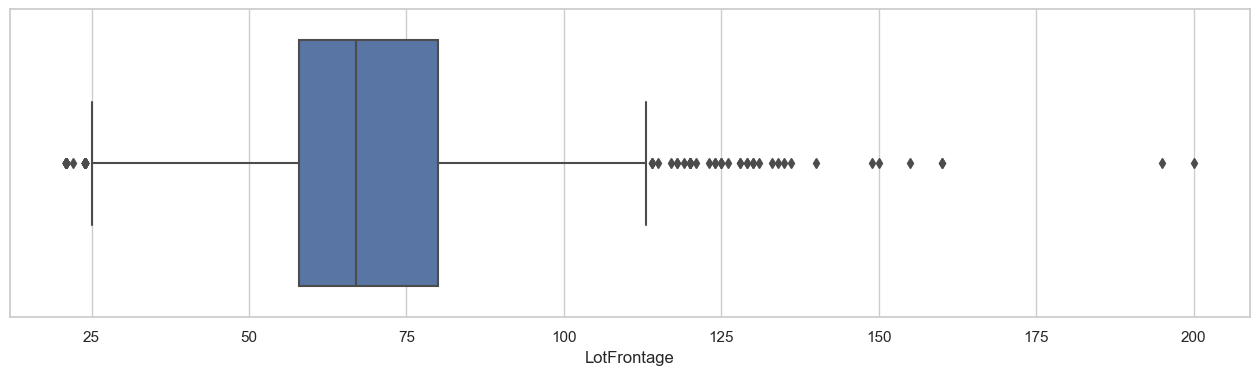

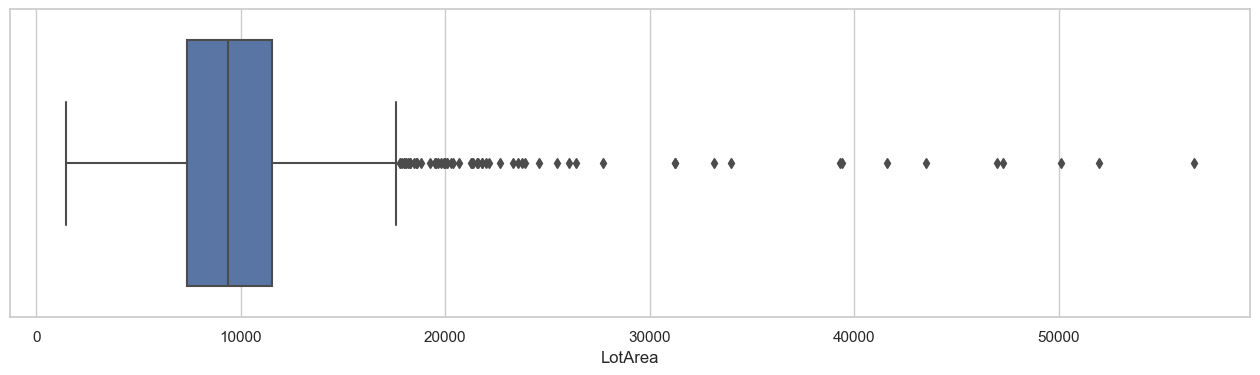

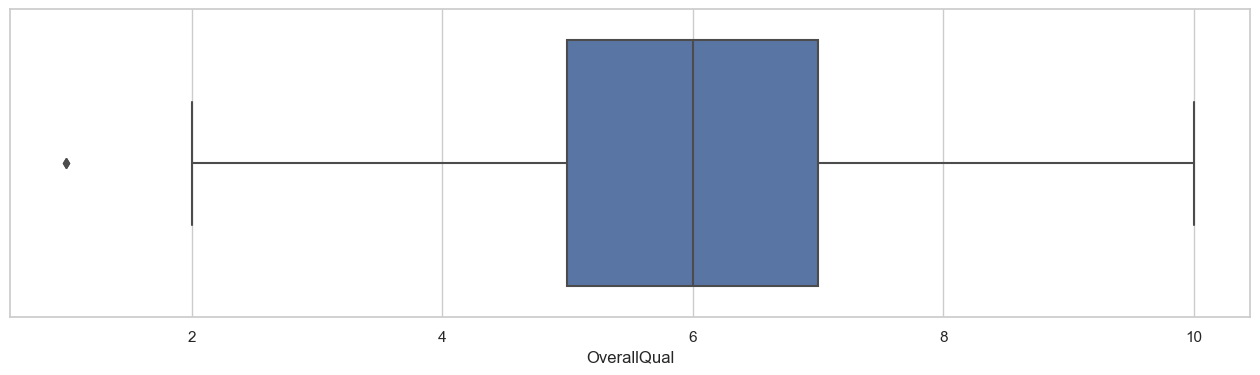

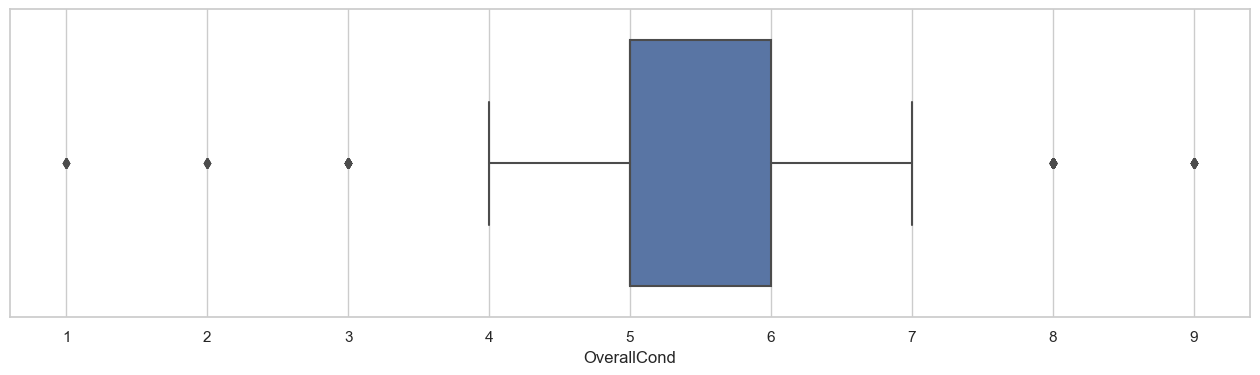

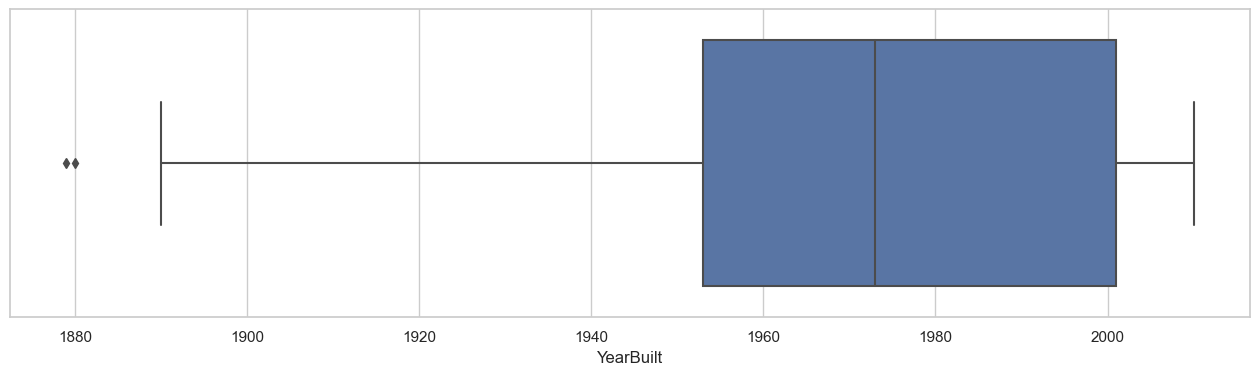

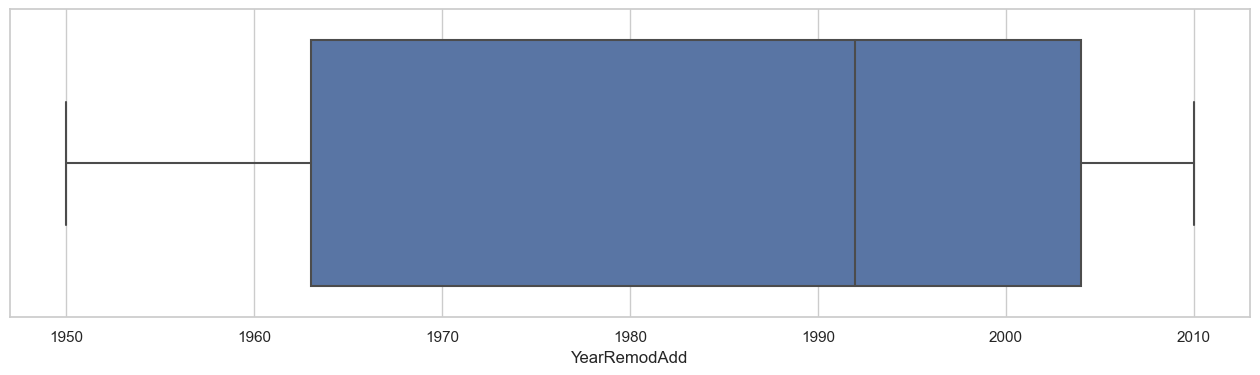

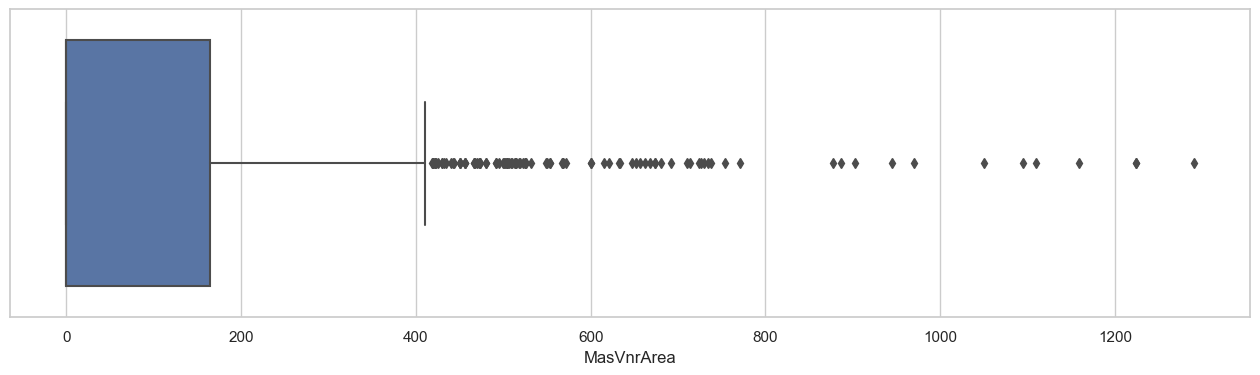

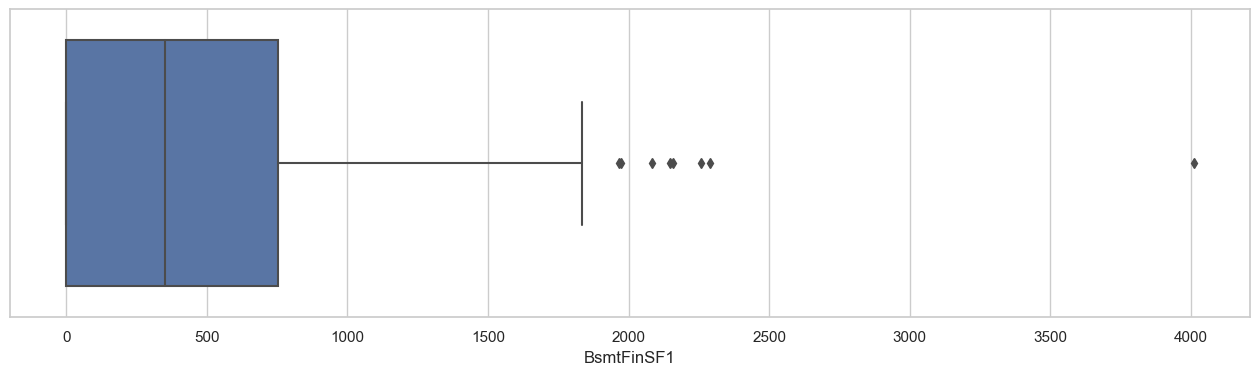

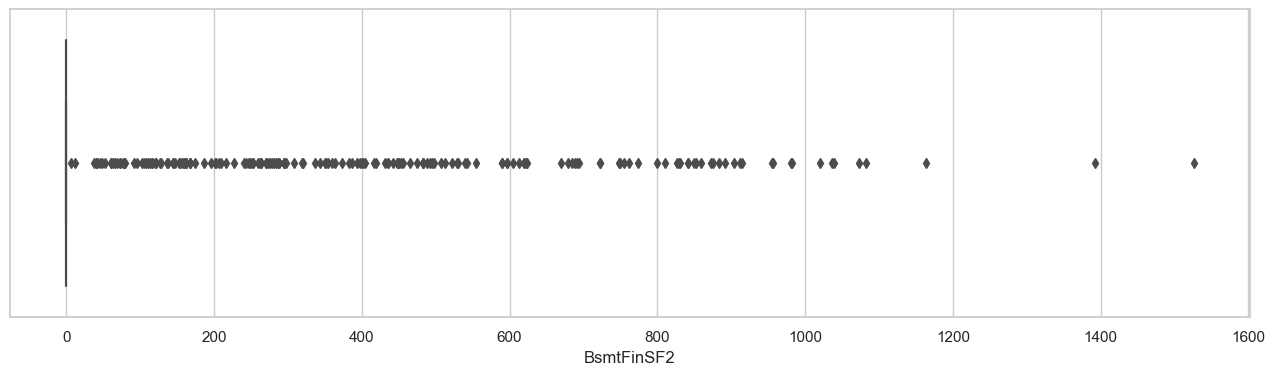

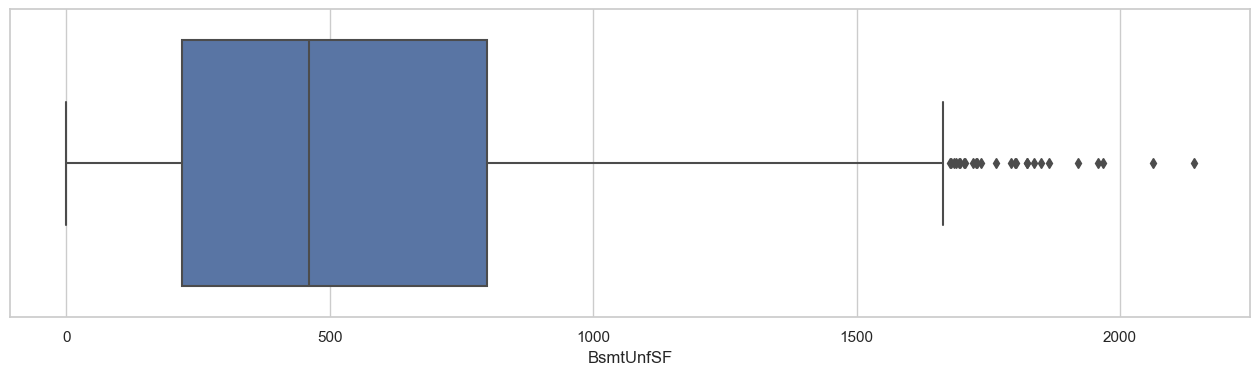

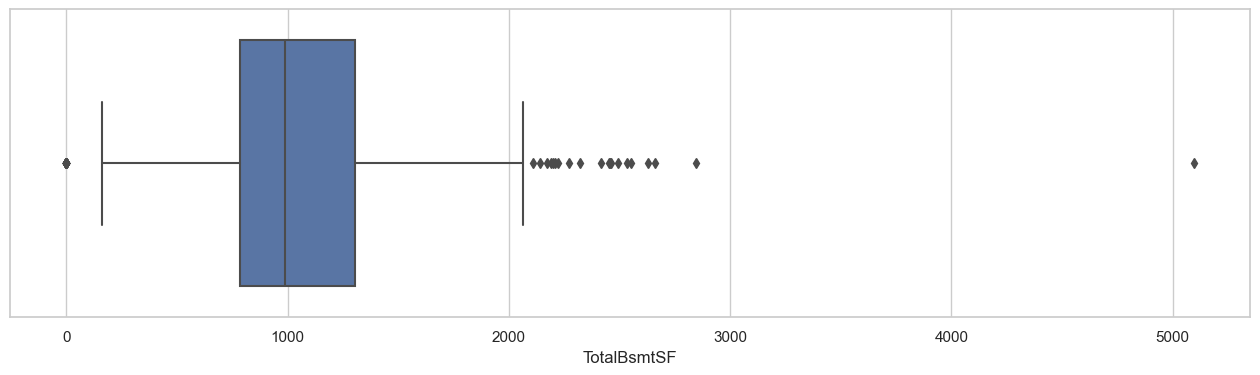

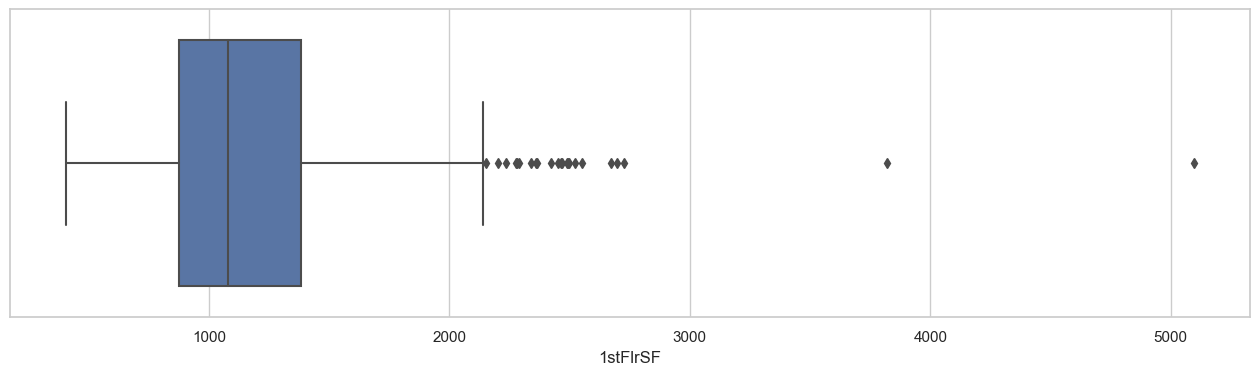

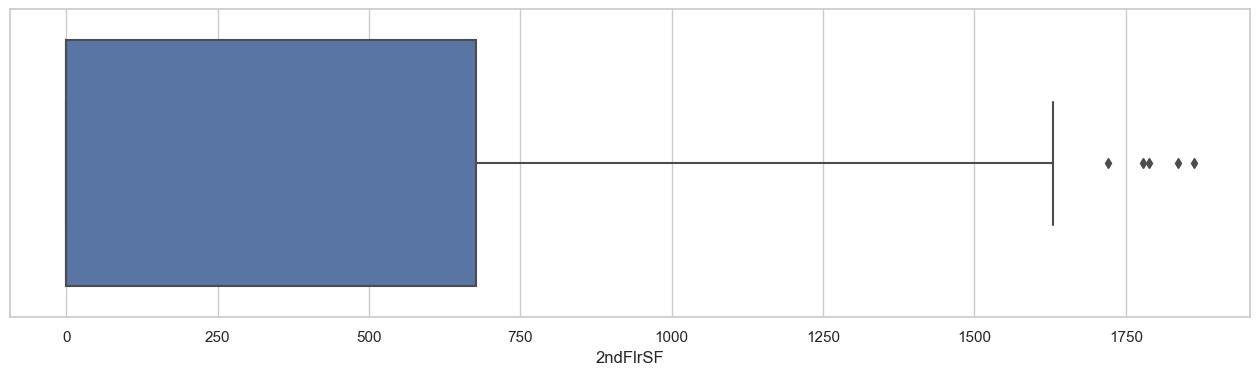

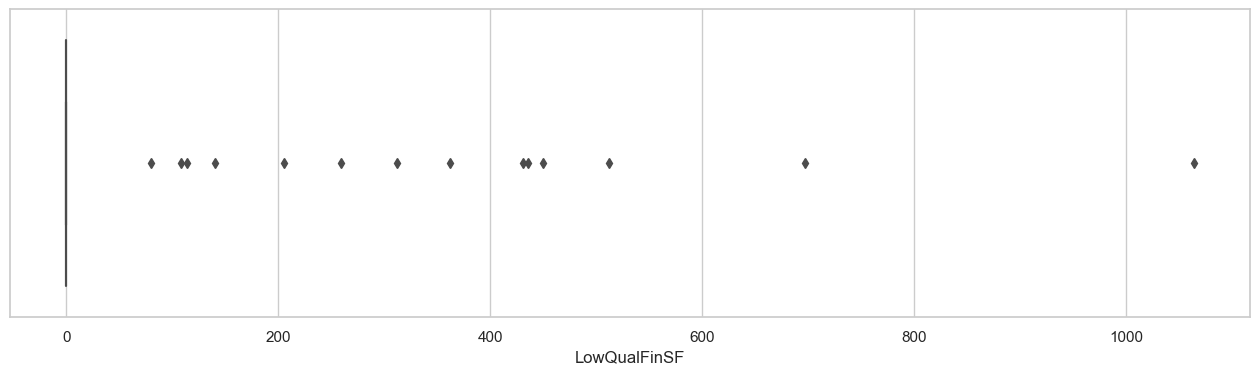

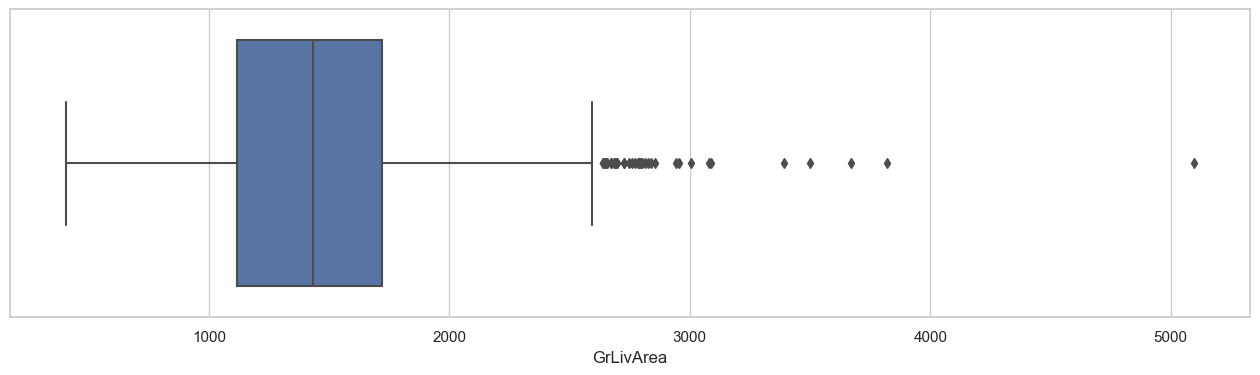

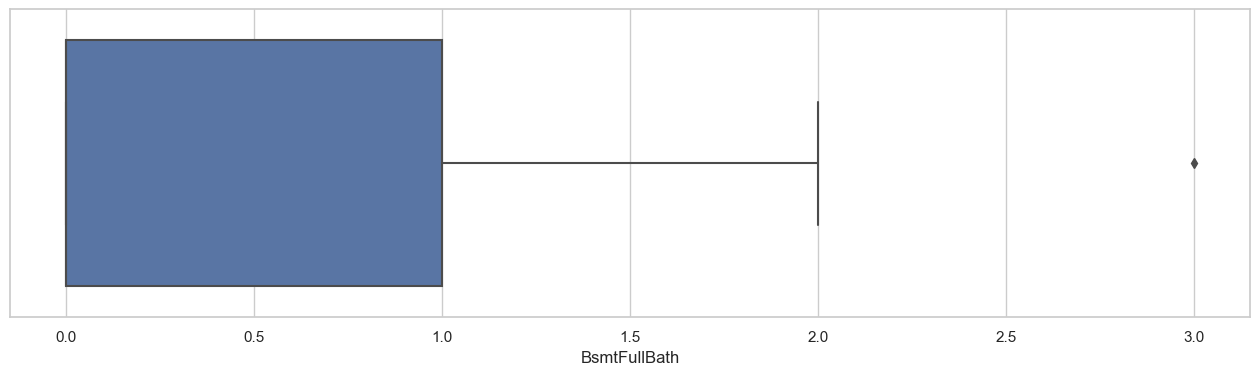

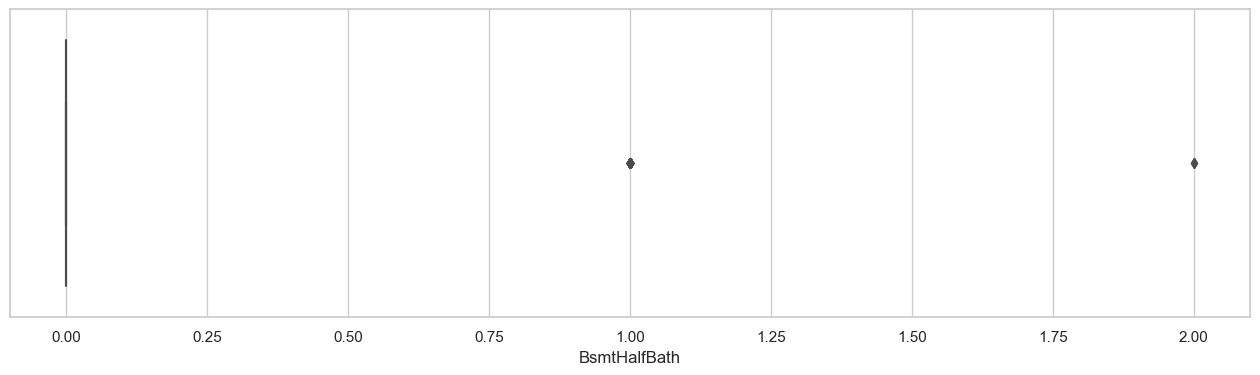

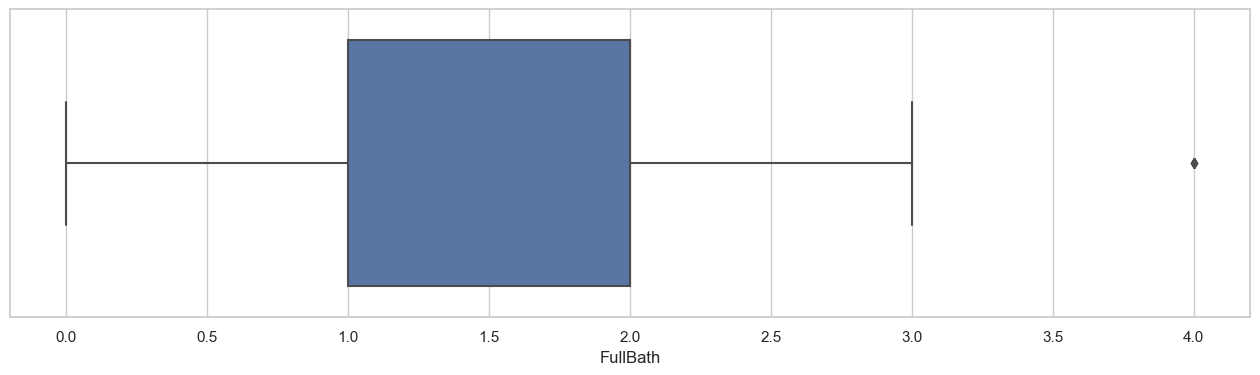

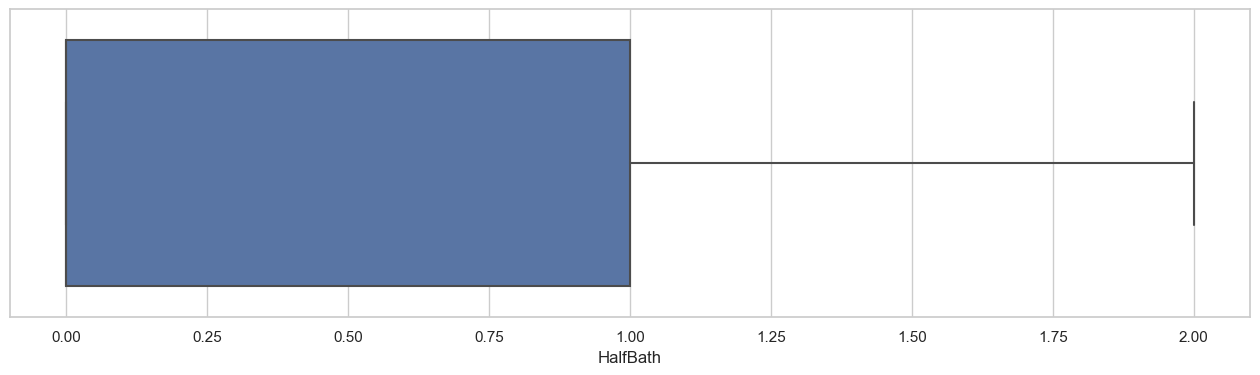

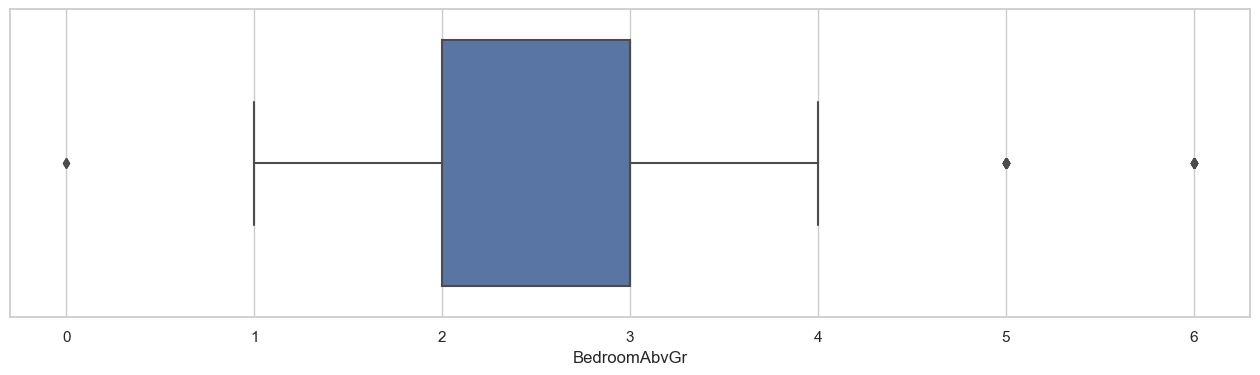

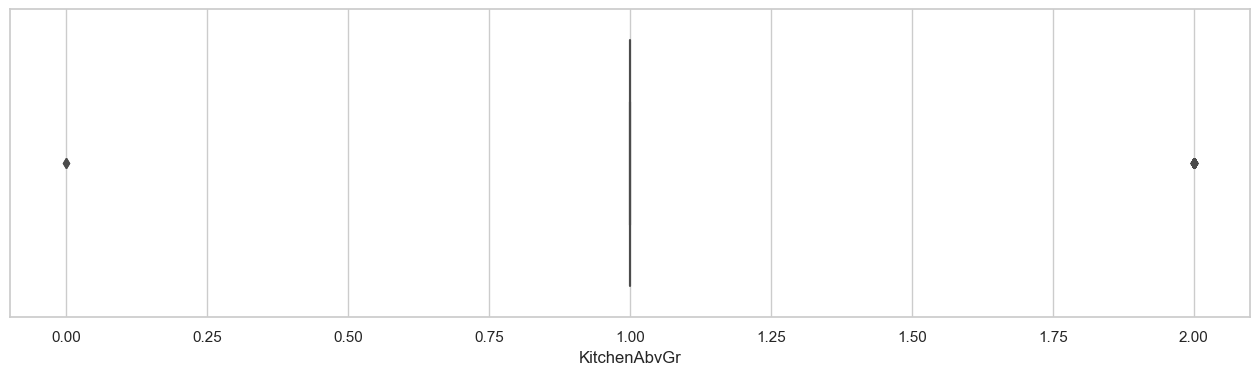

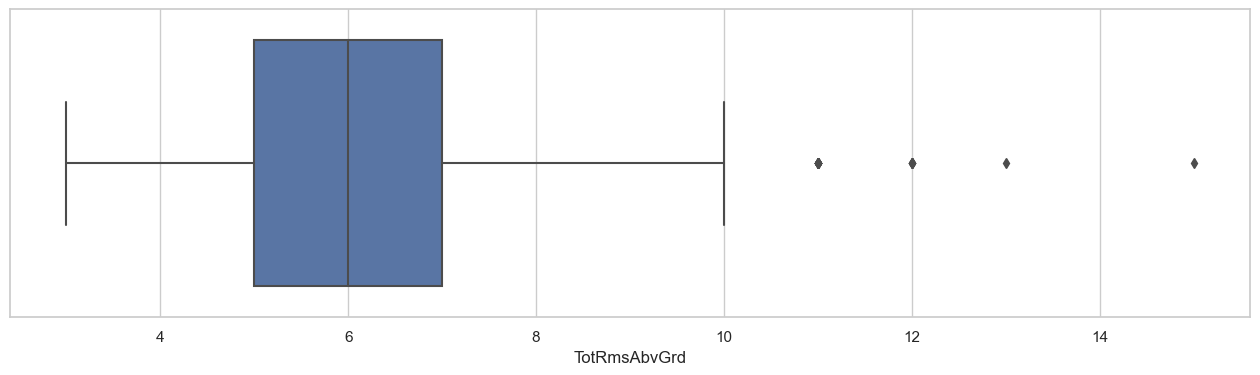

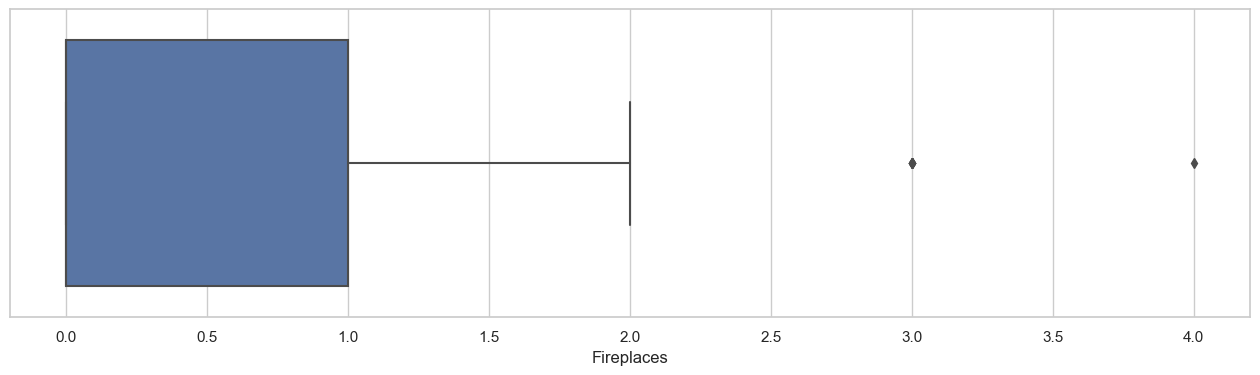

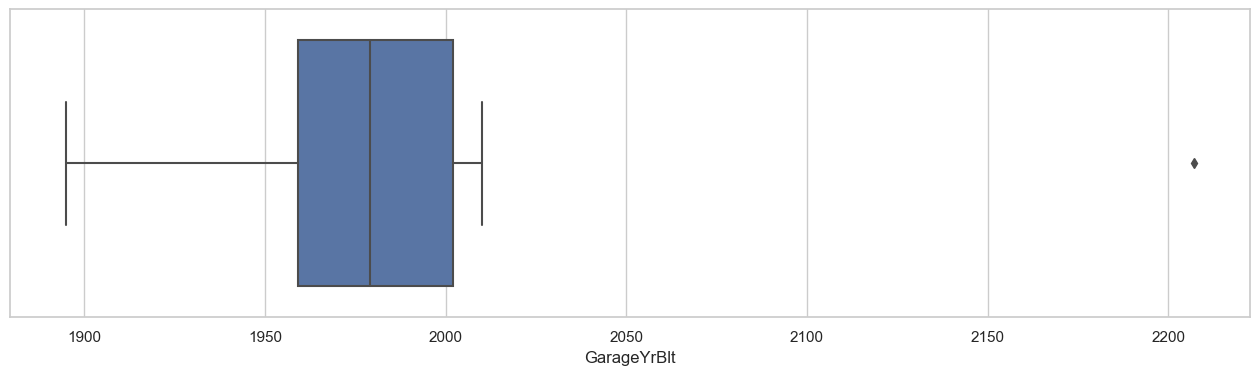

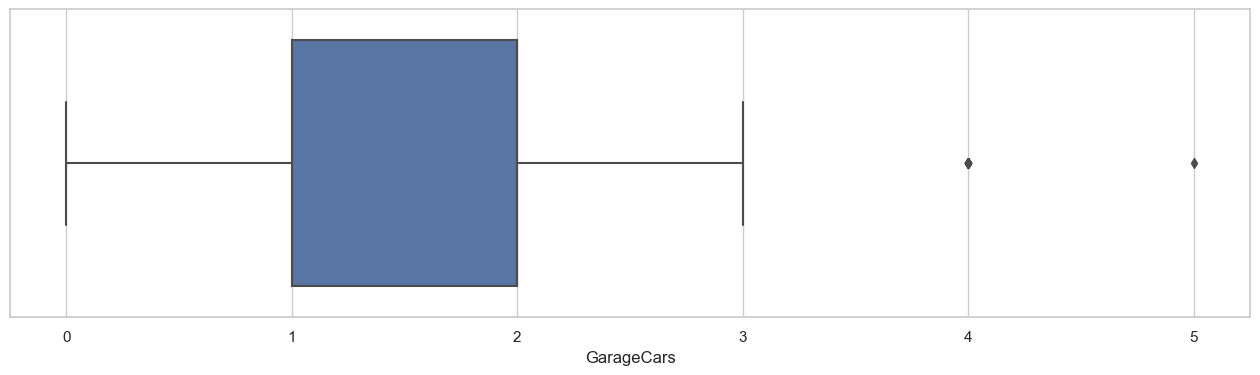

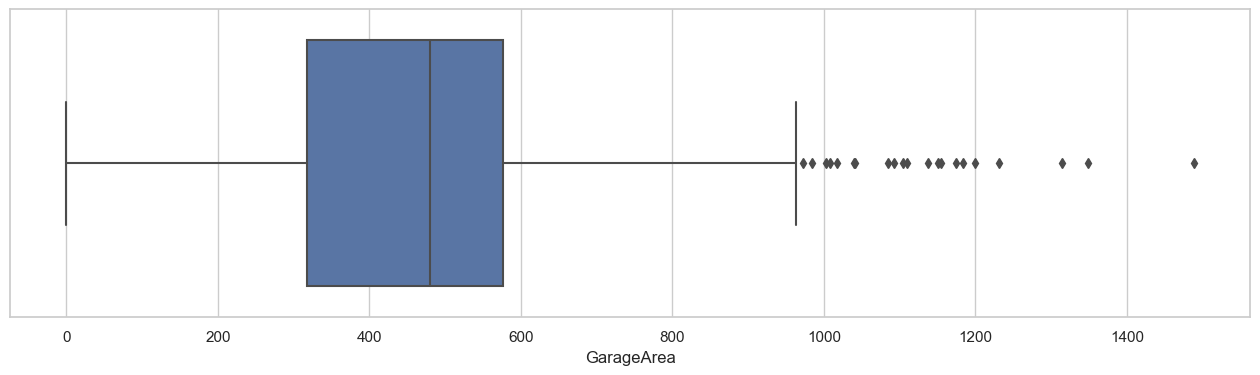

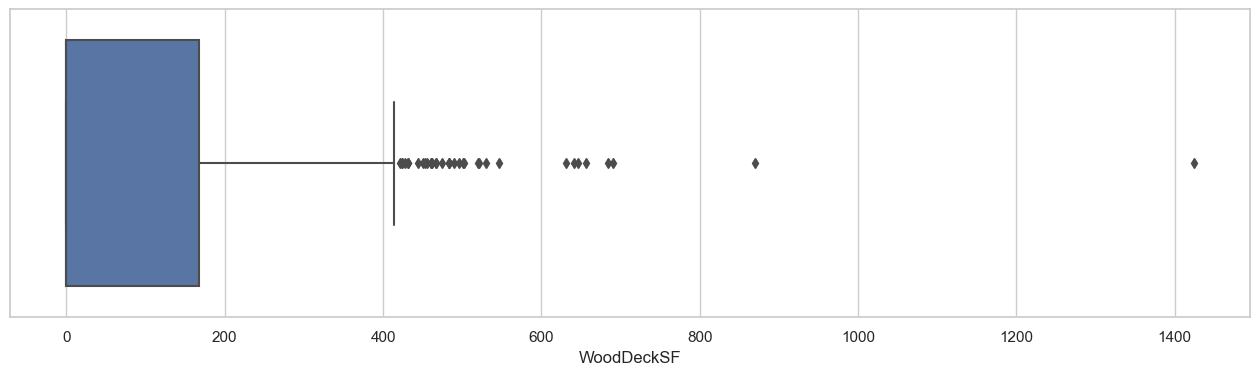

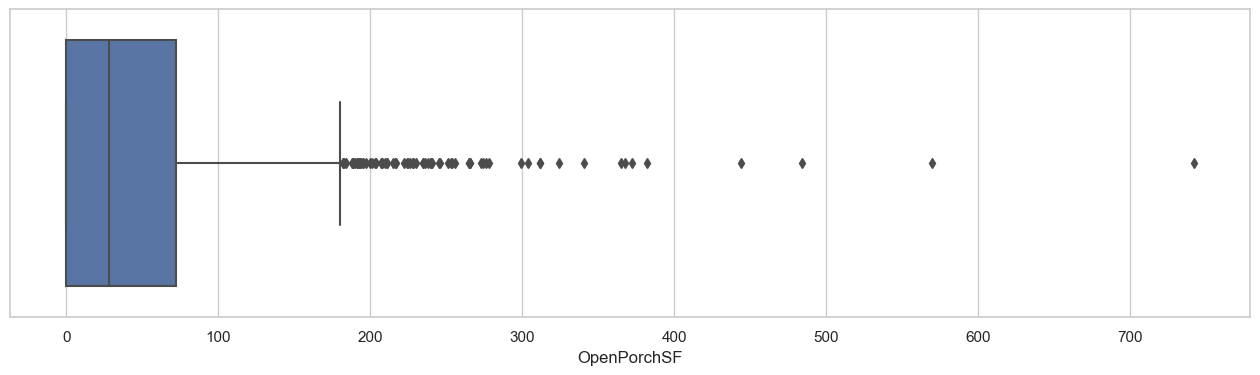

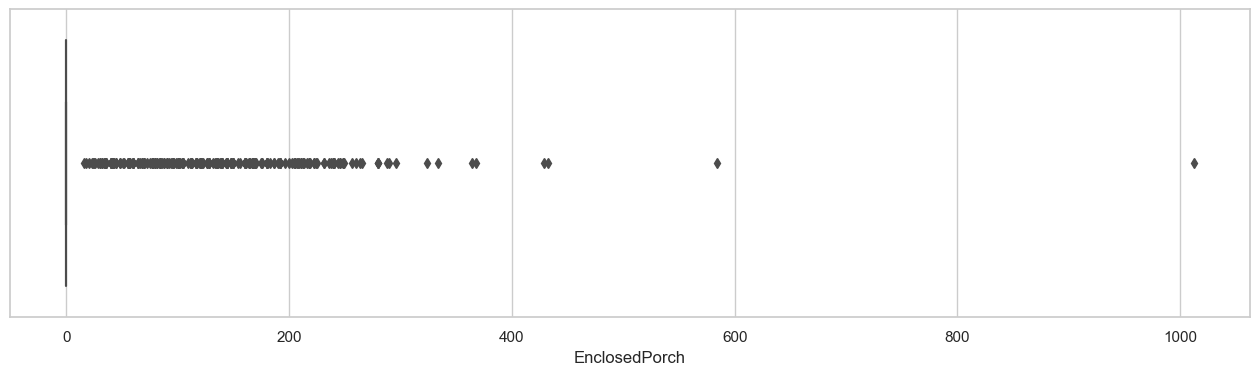

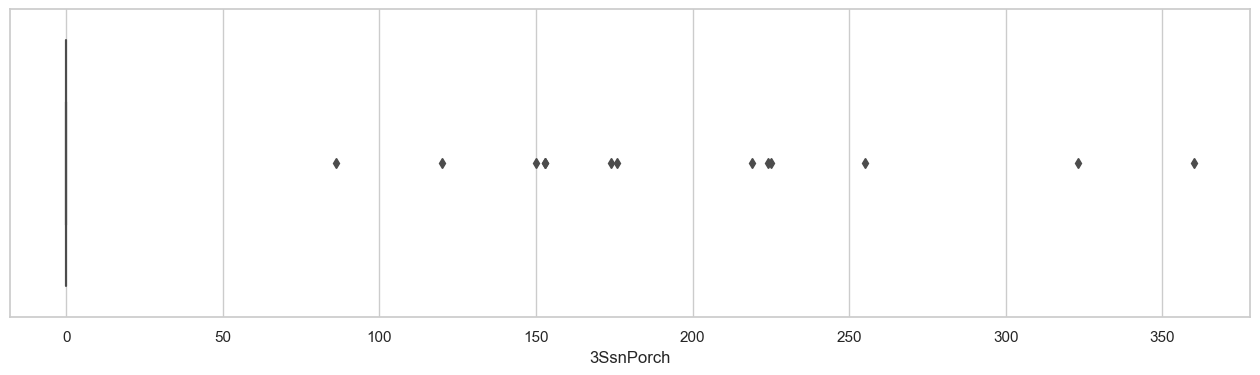

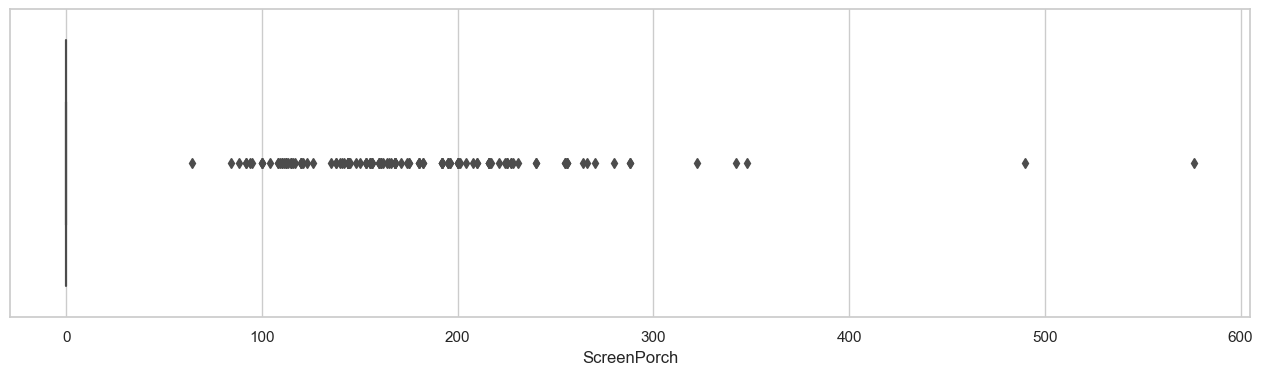

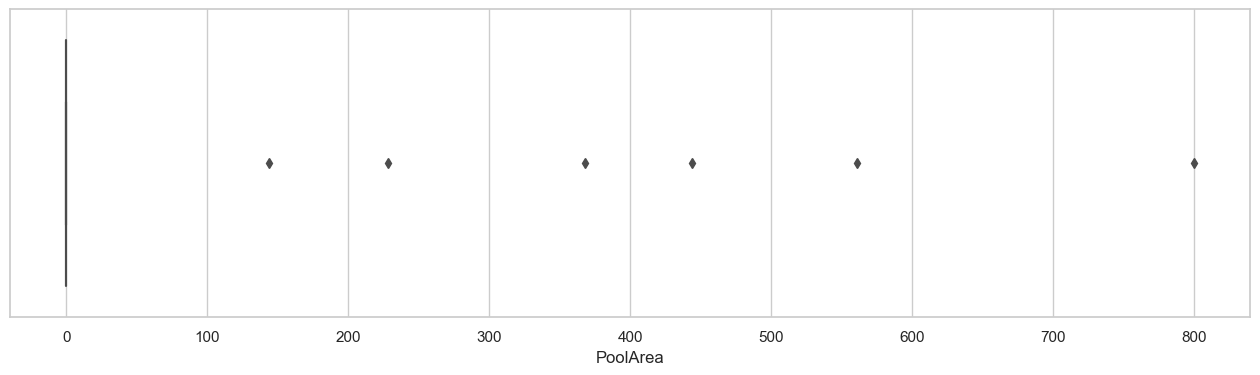

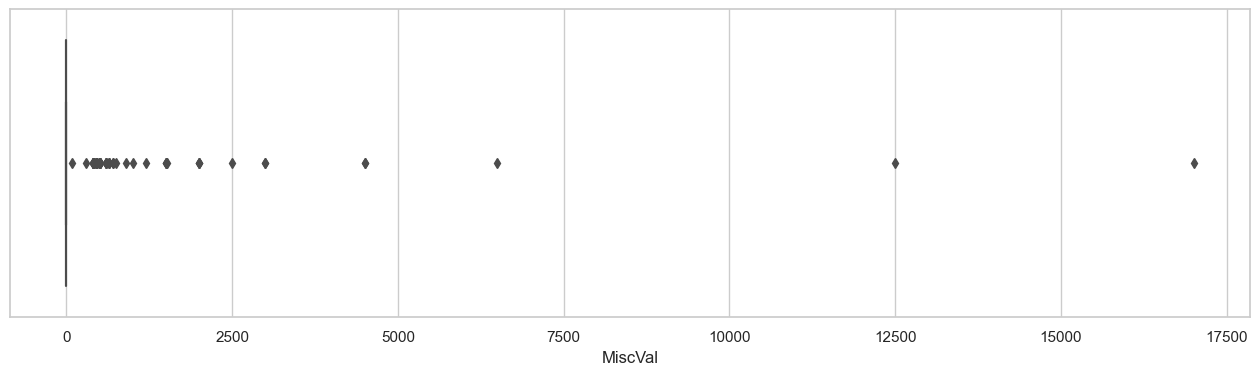

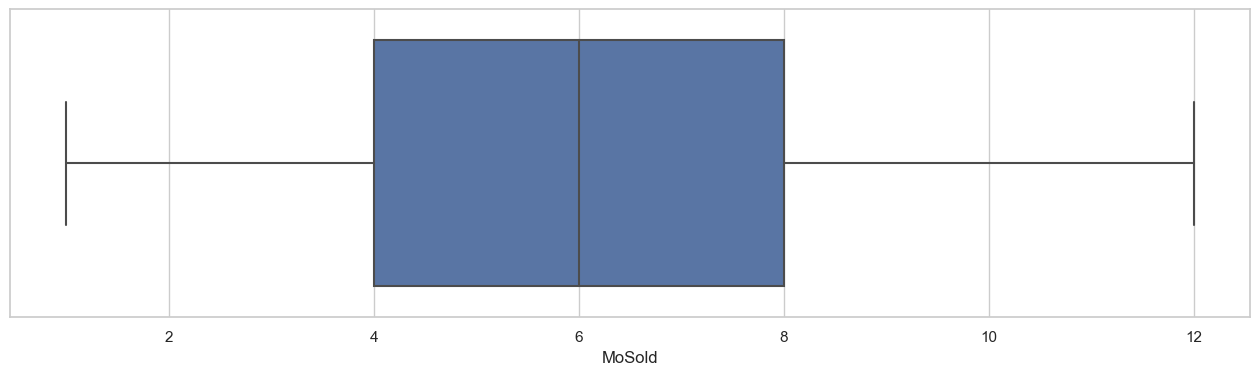

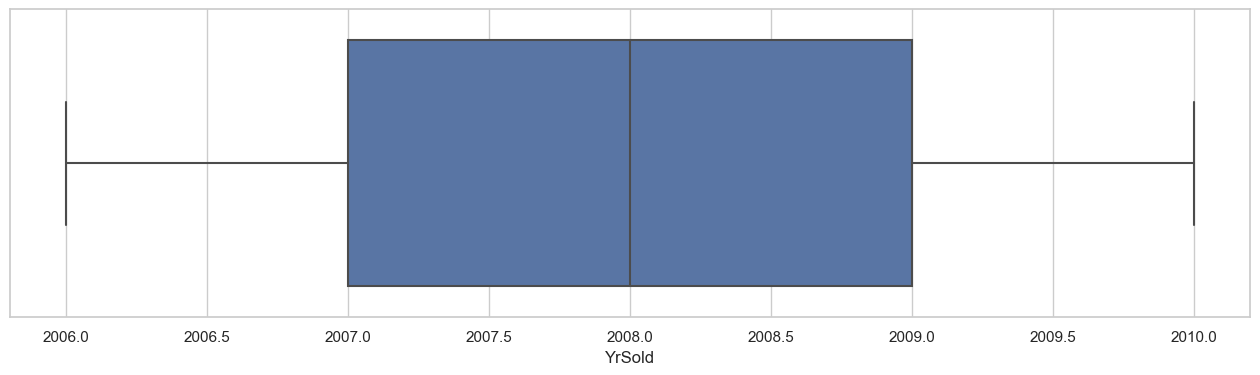

In [ ]:
numerical_df = test.select_dtypes(exclude=['object'])
#numerical_df = numerical_df.drop(["Id"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\si

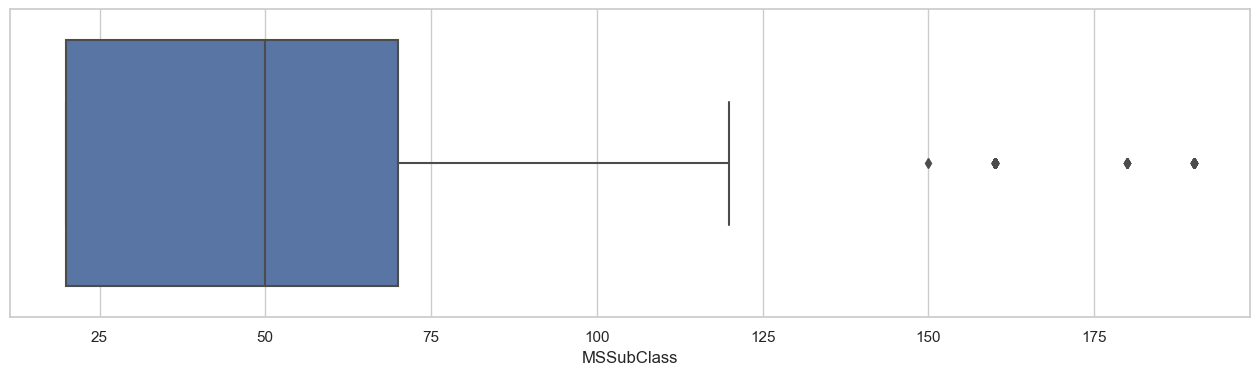

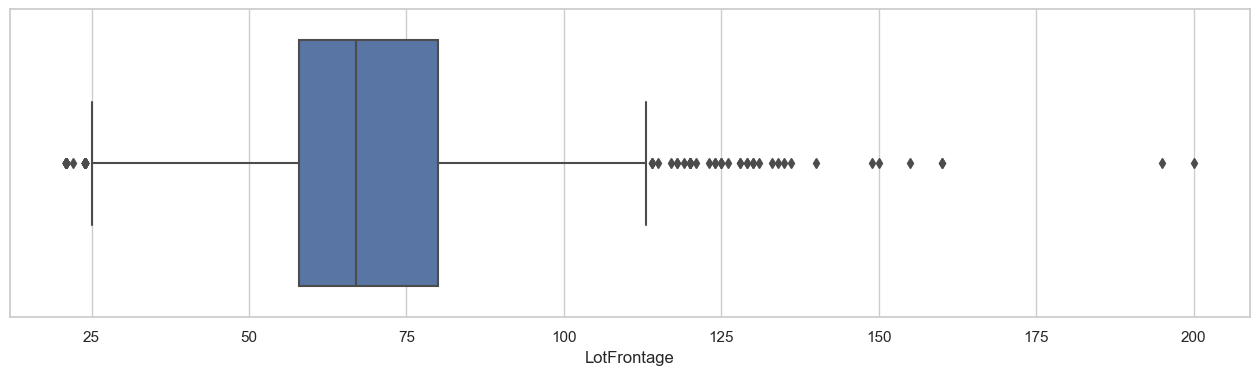

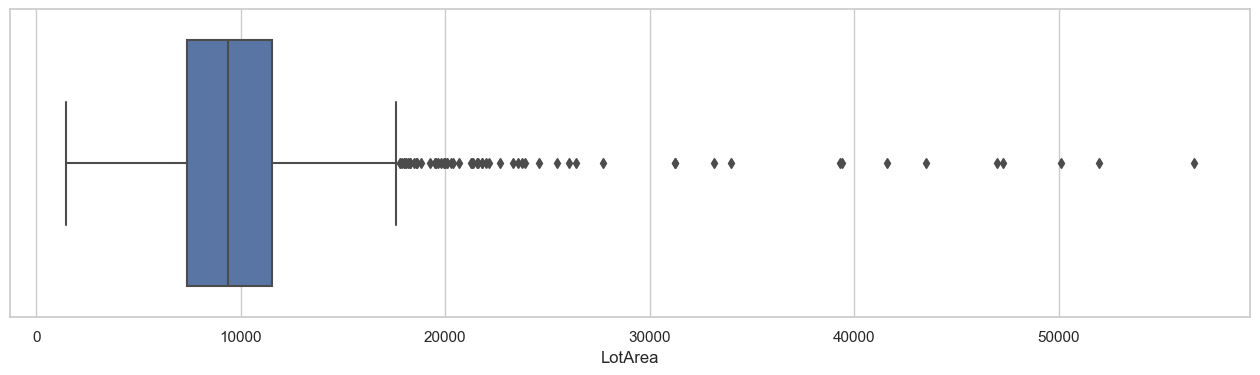

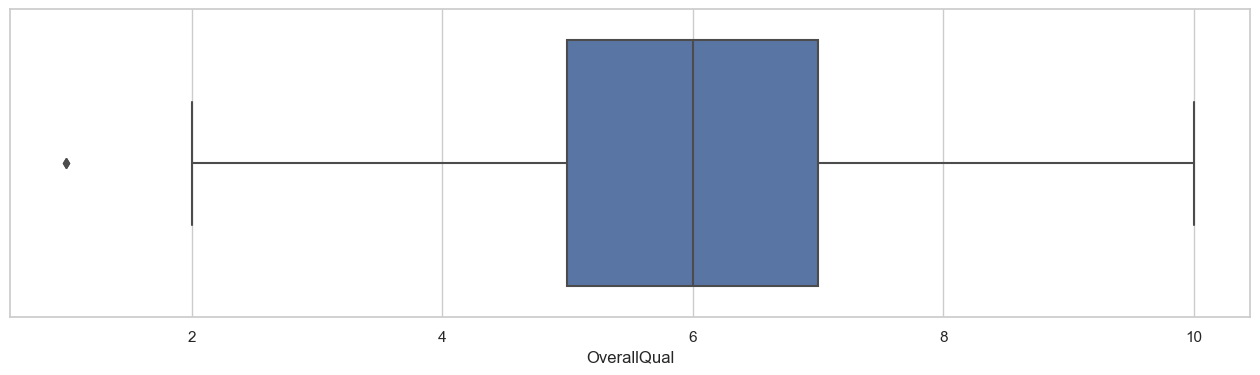

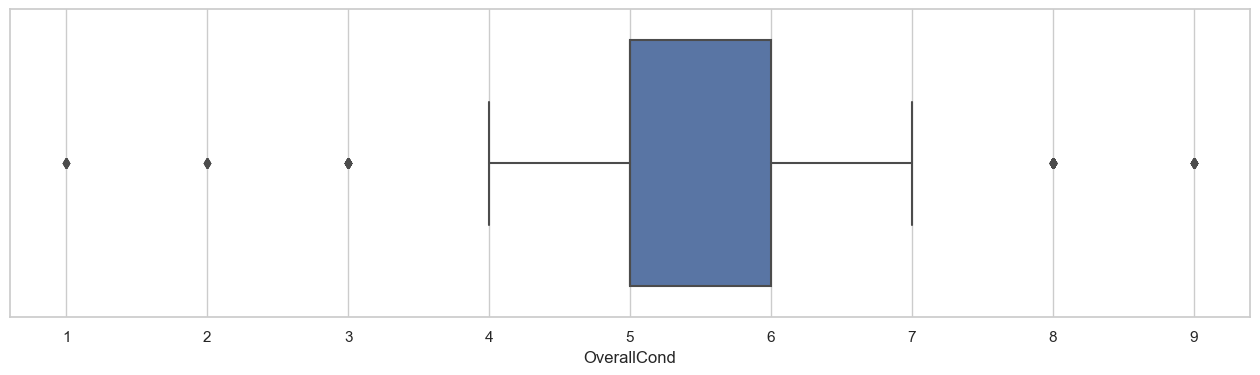

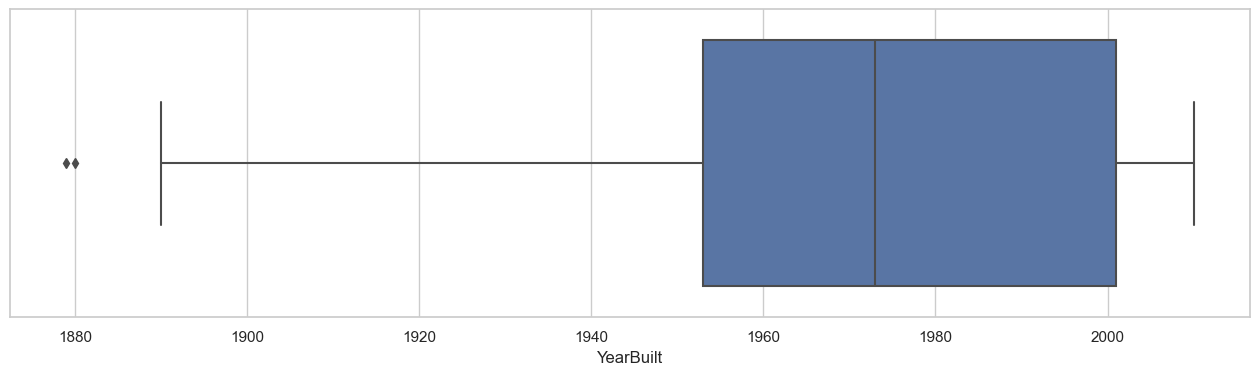

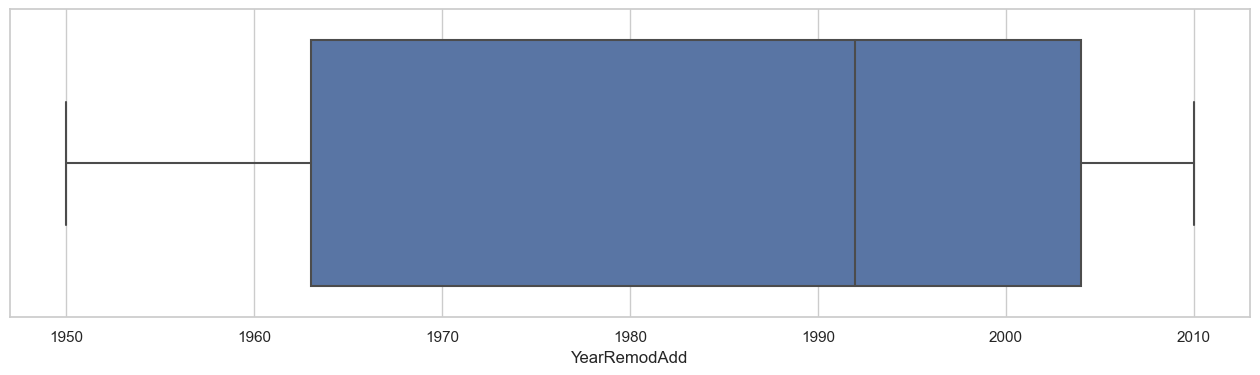

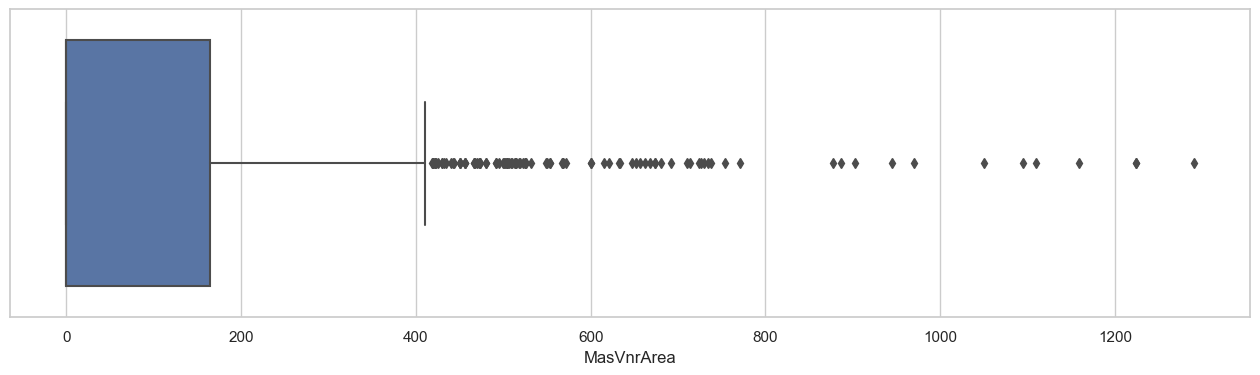

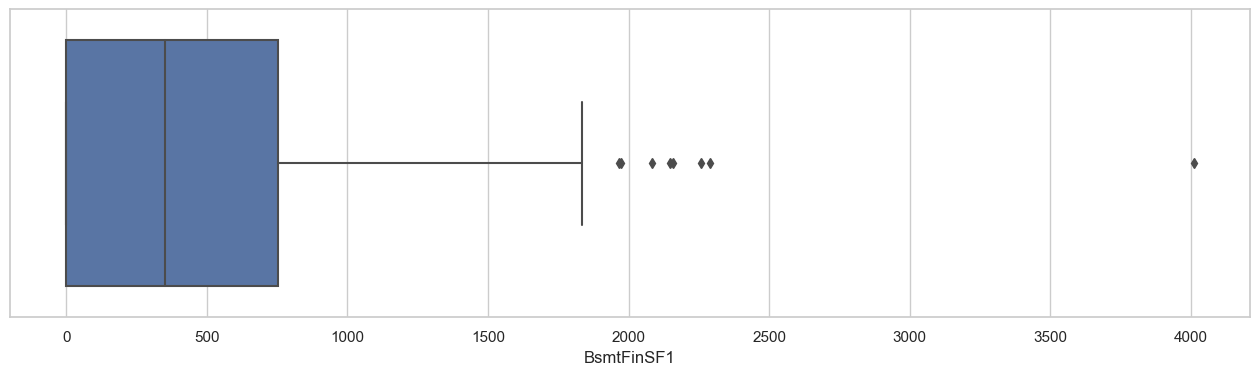

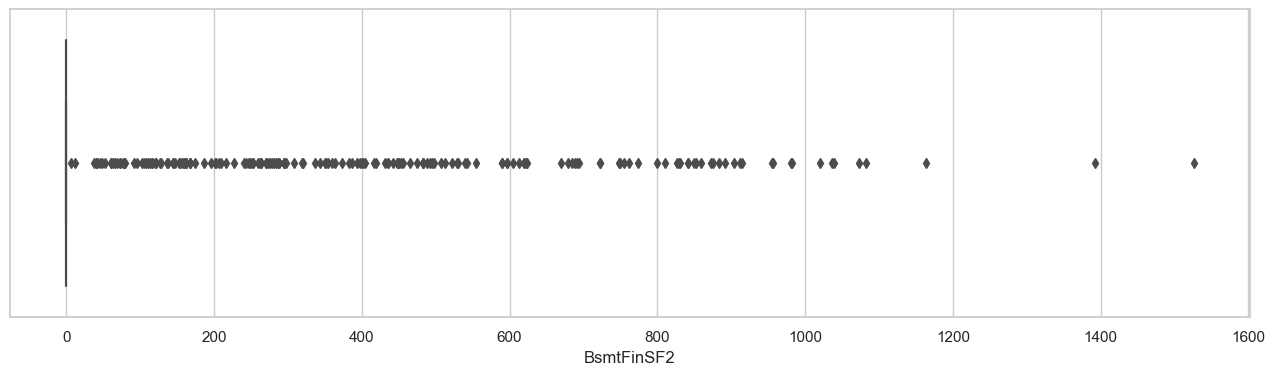

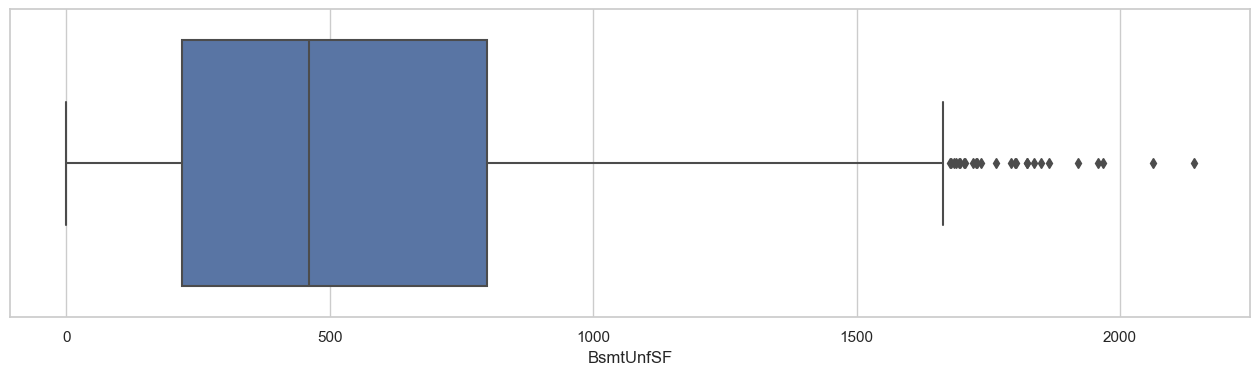

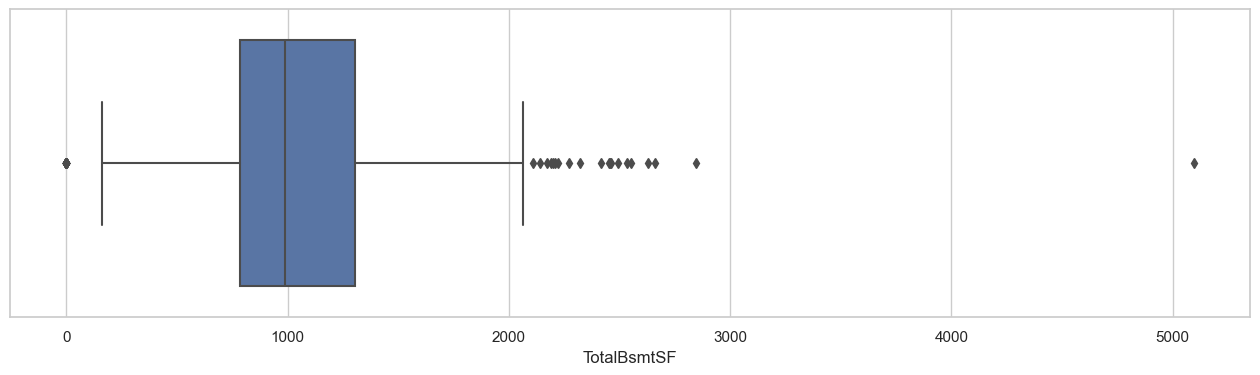

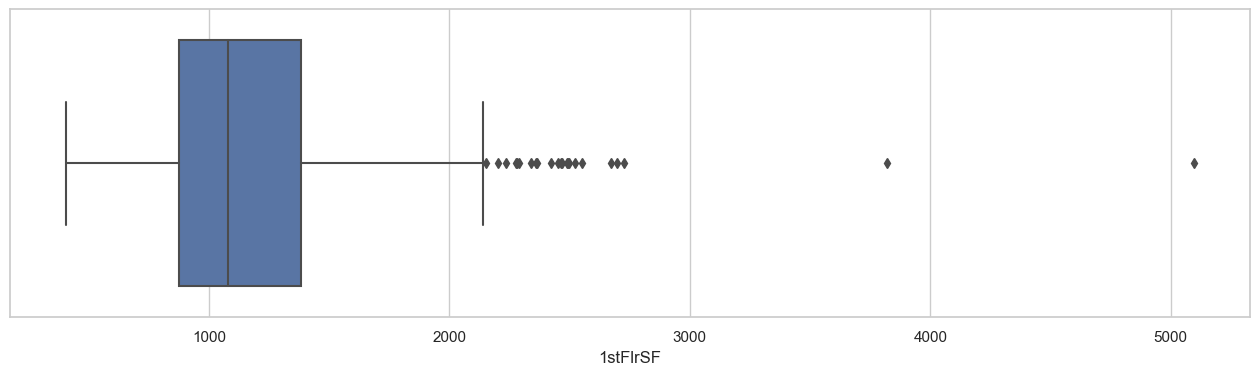

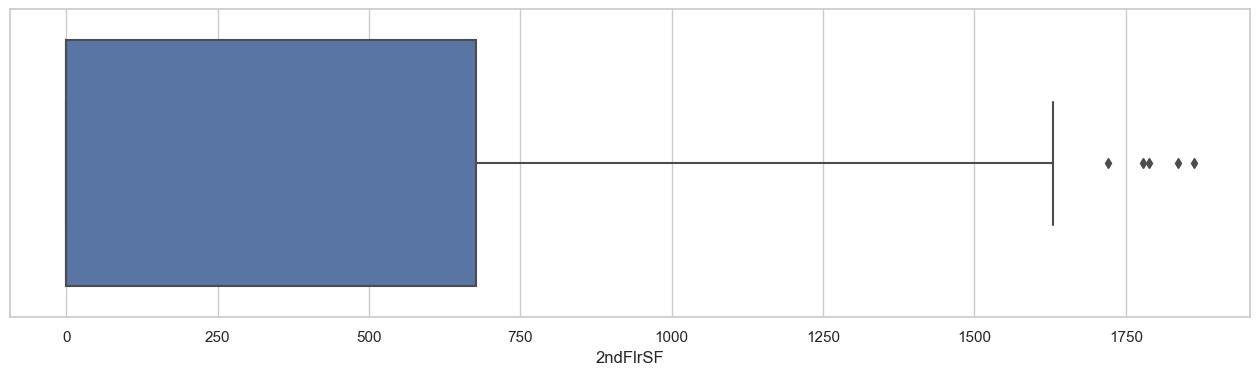

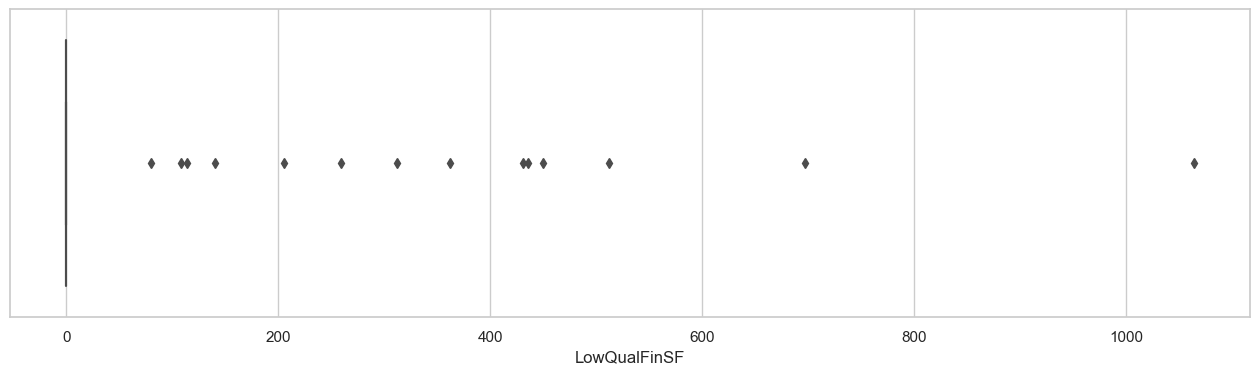

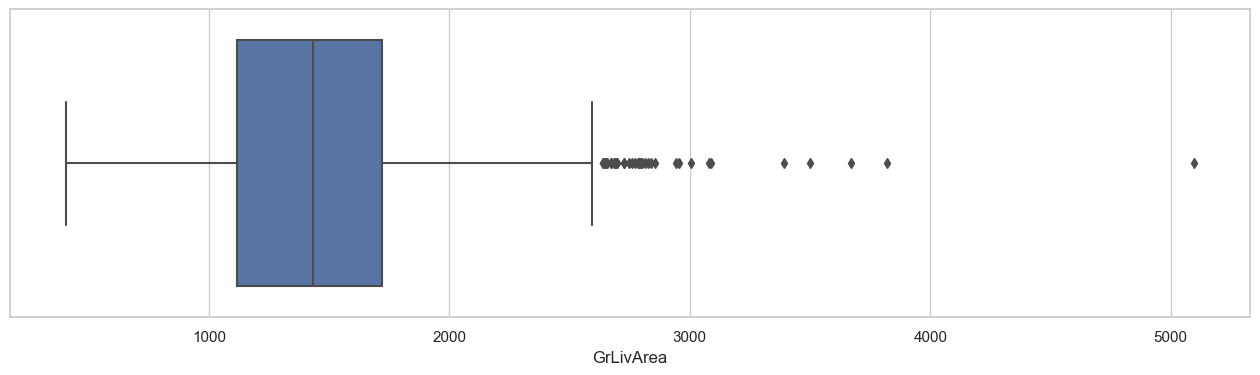

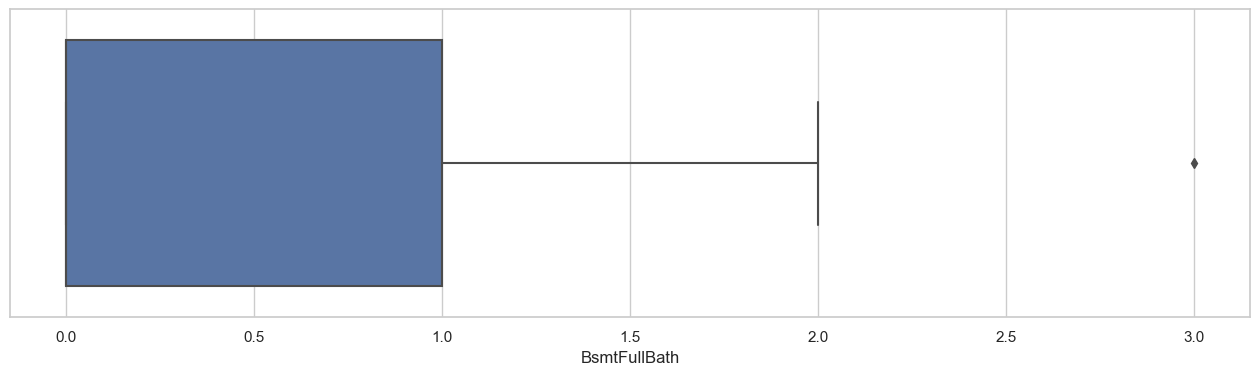

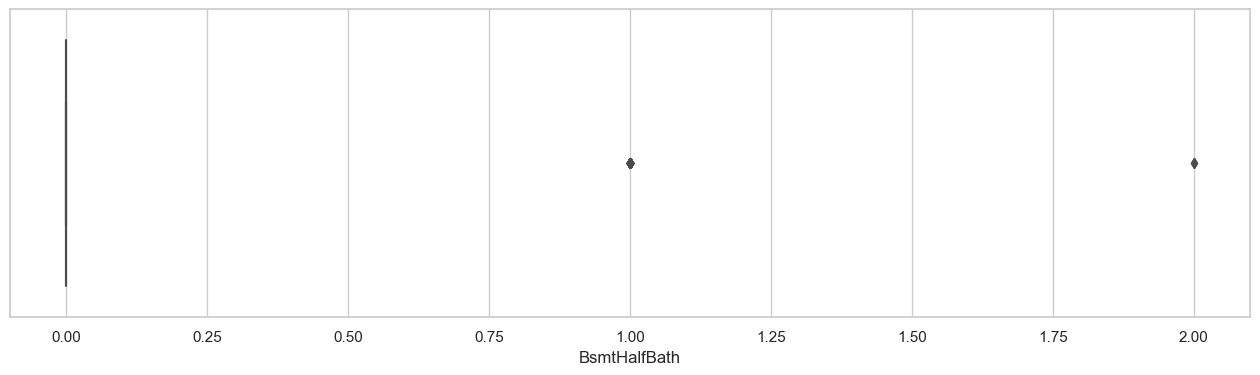

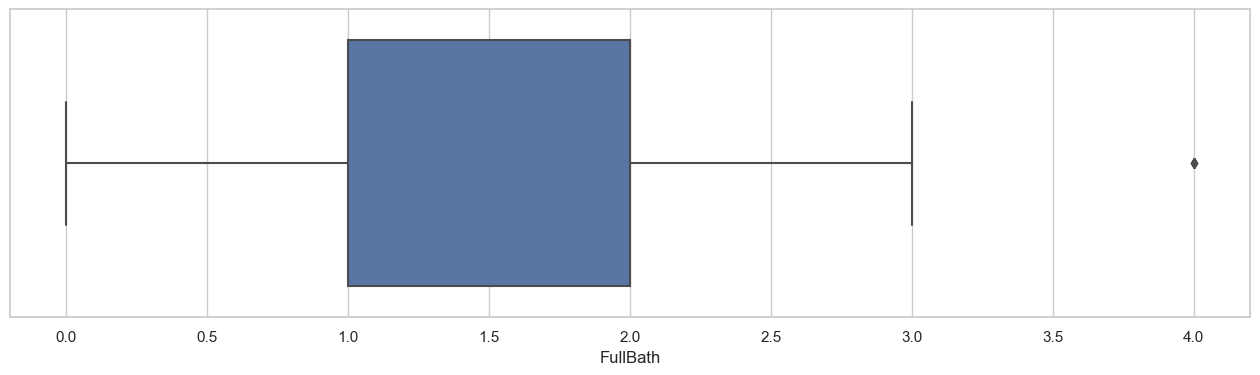

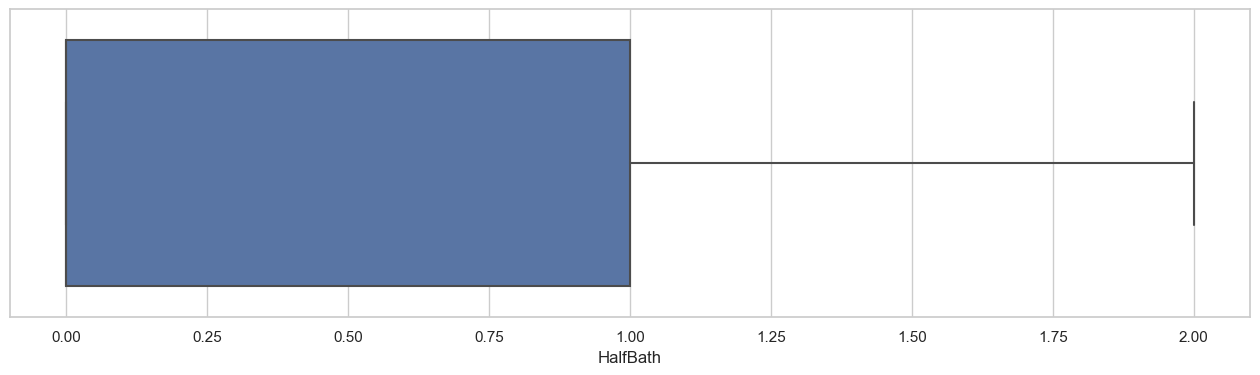

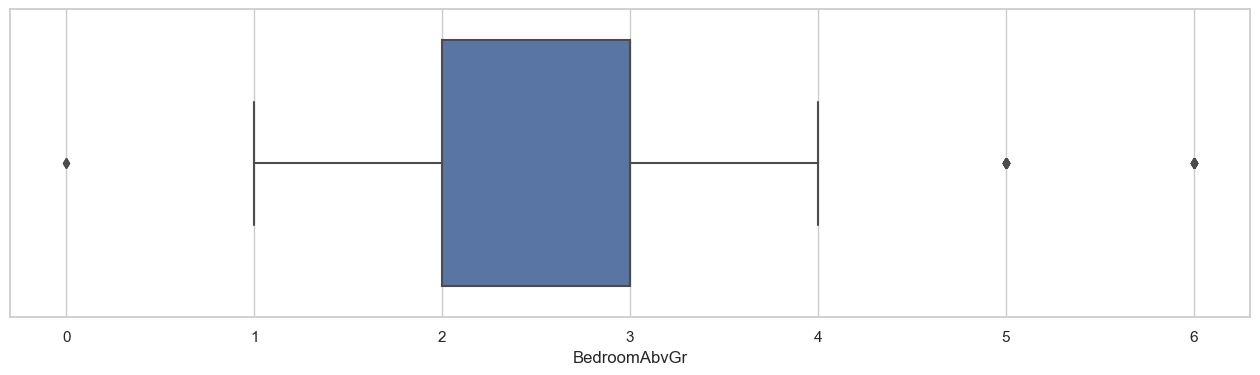

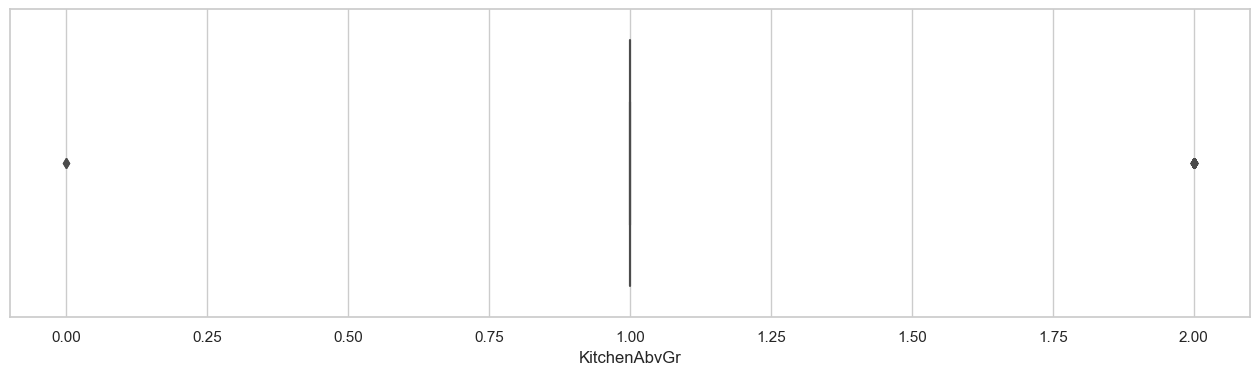

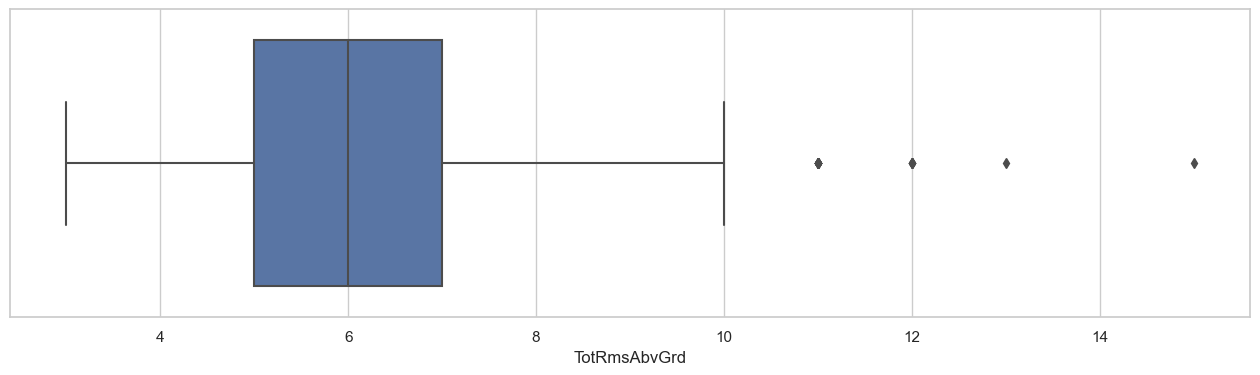

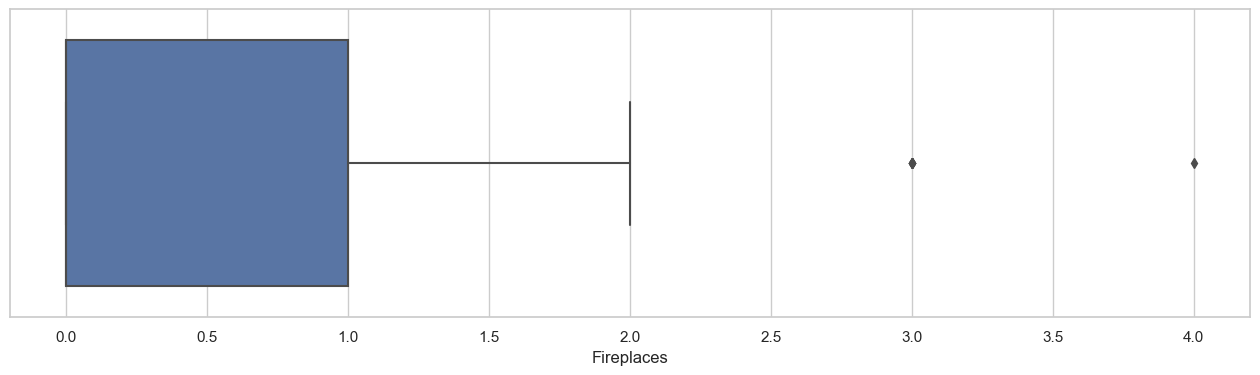

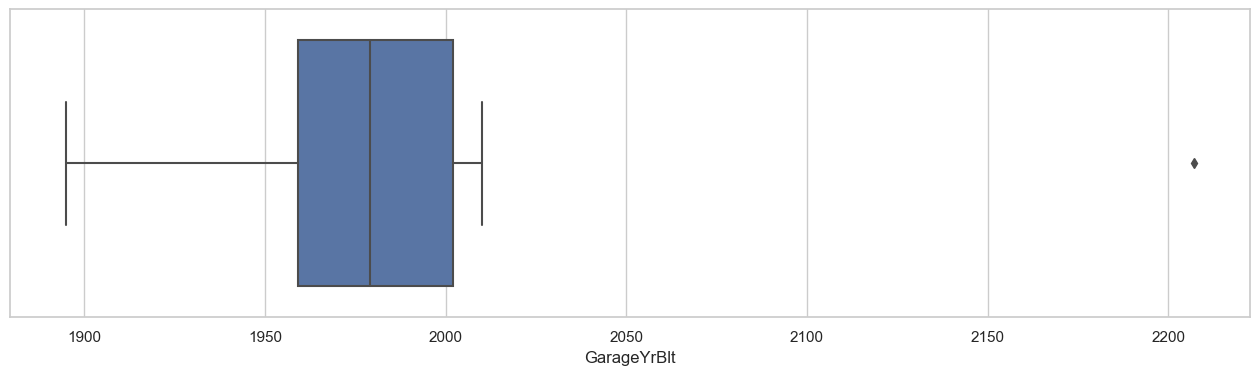

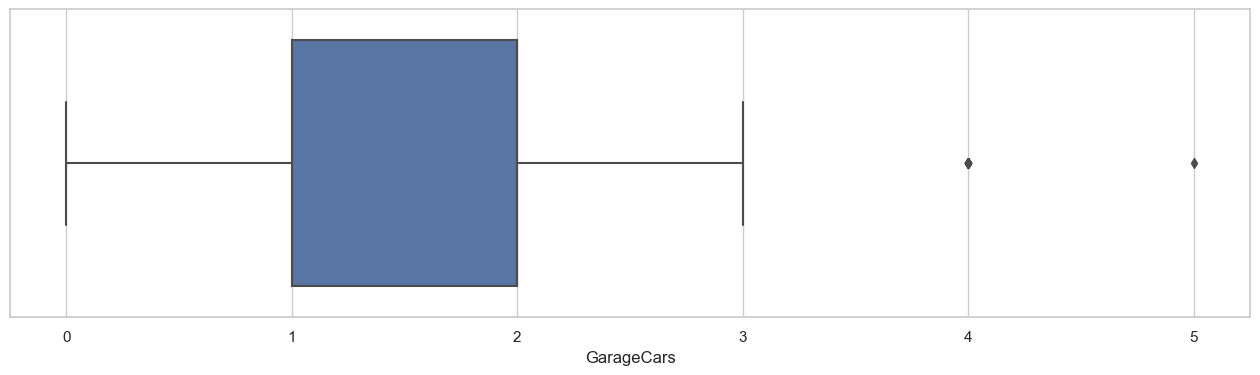

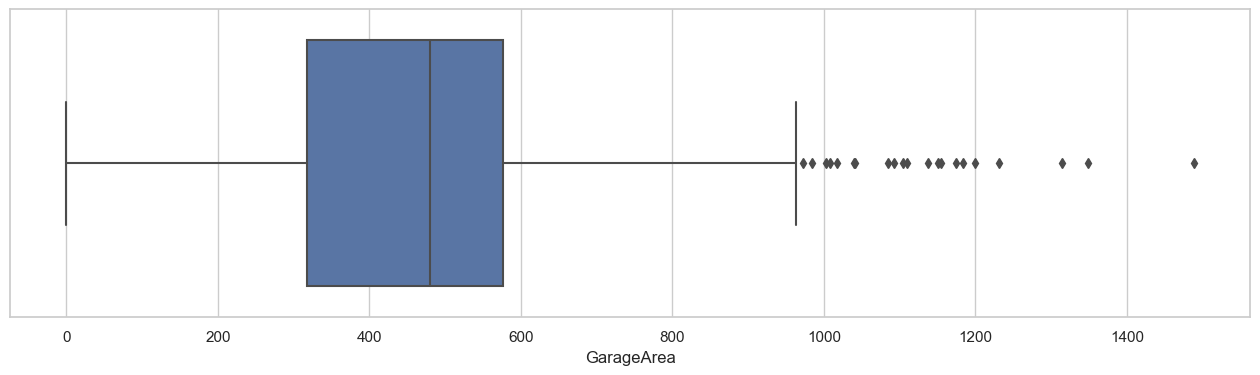

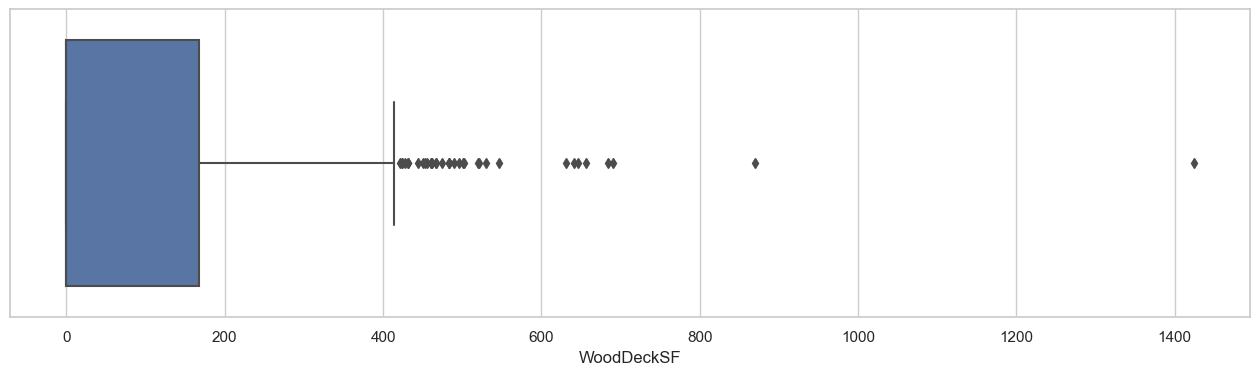

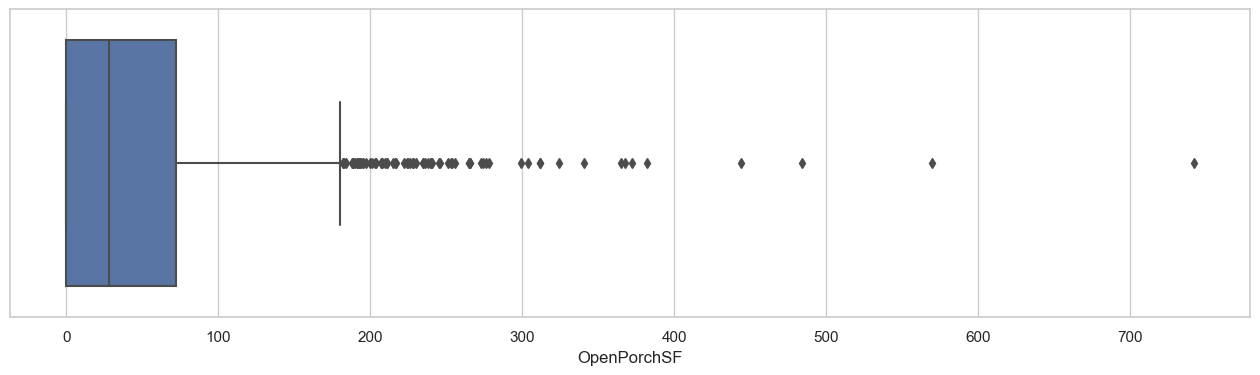

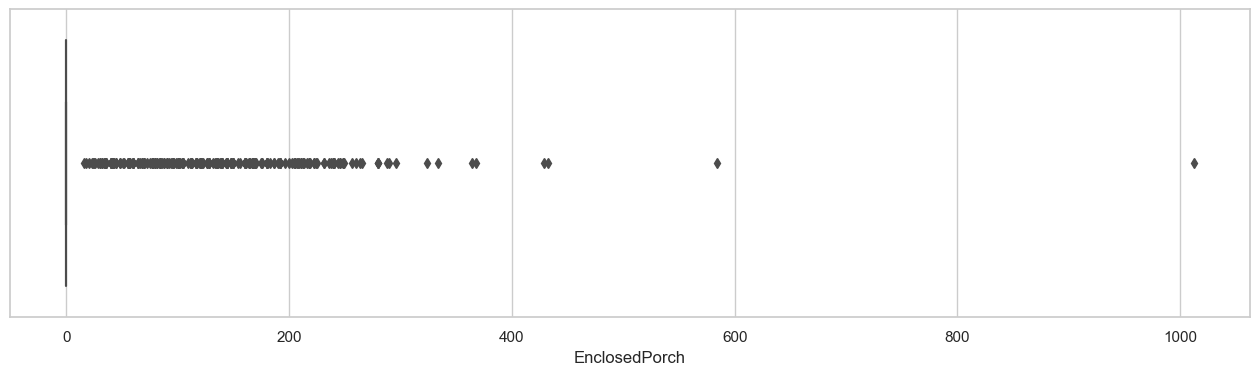

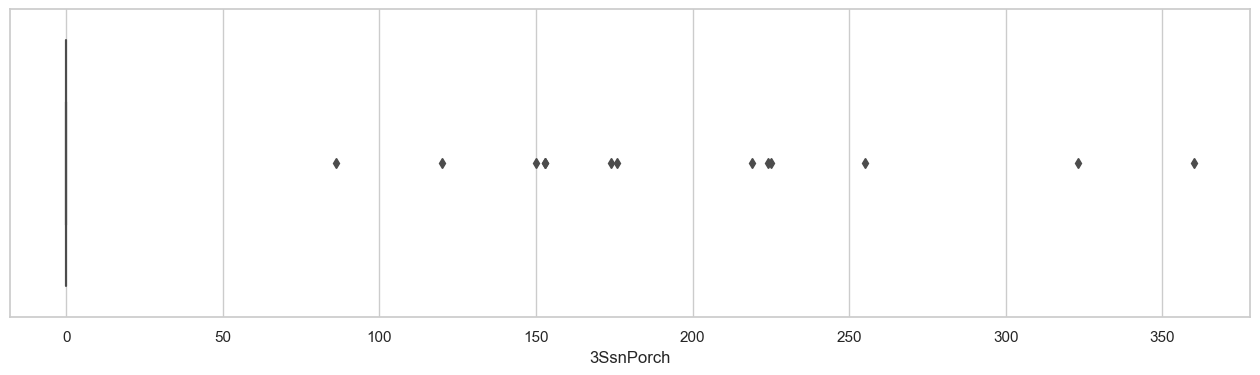

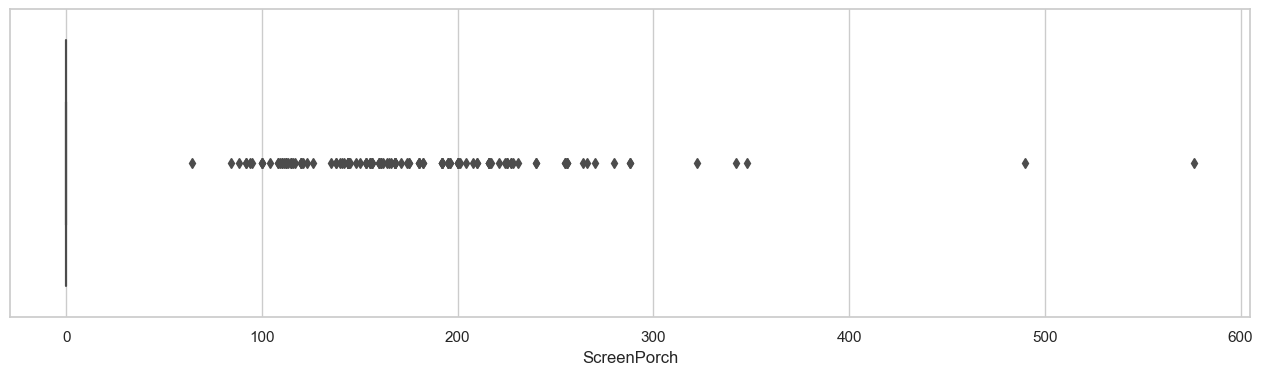

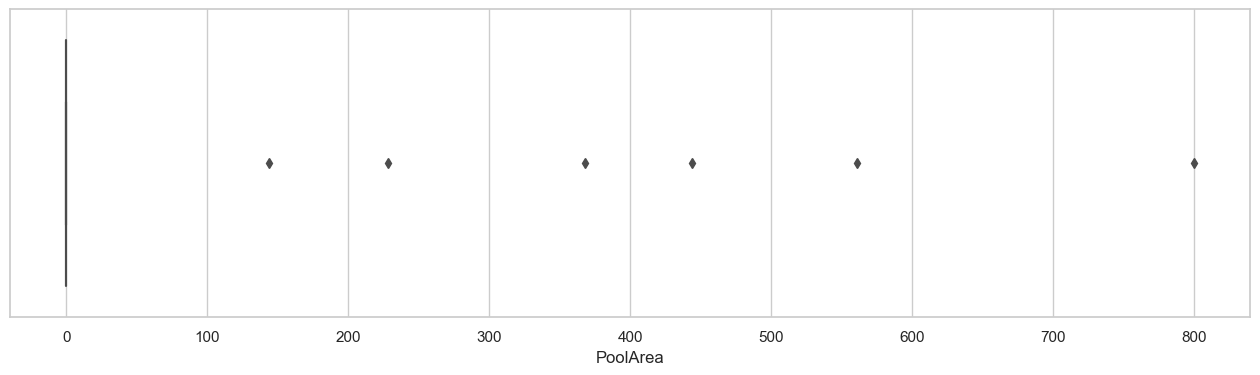

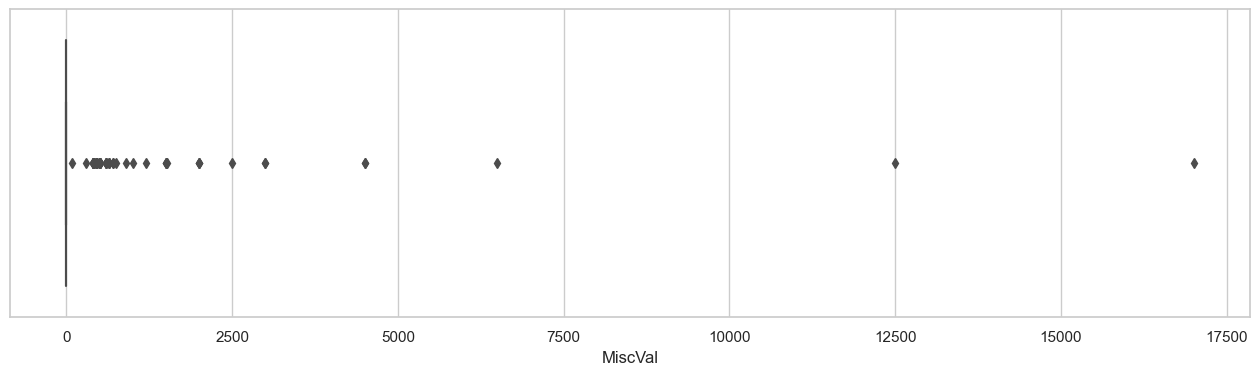

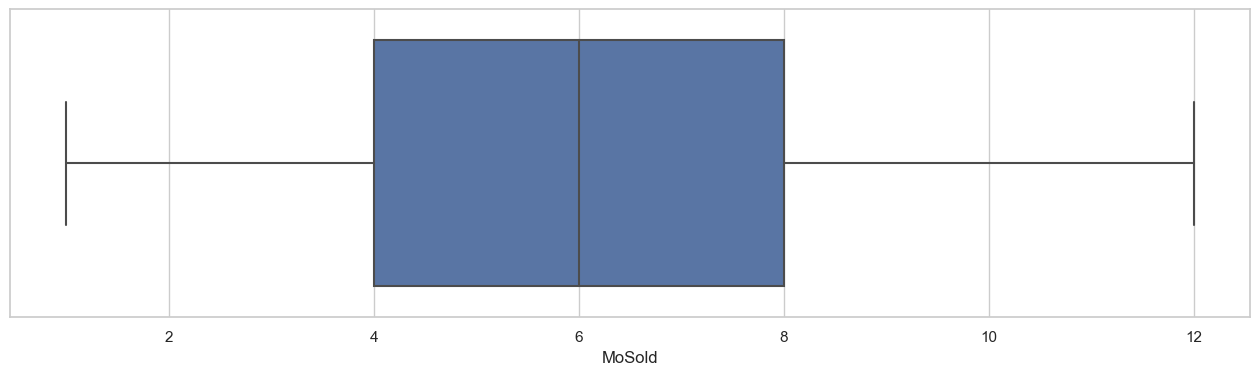

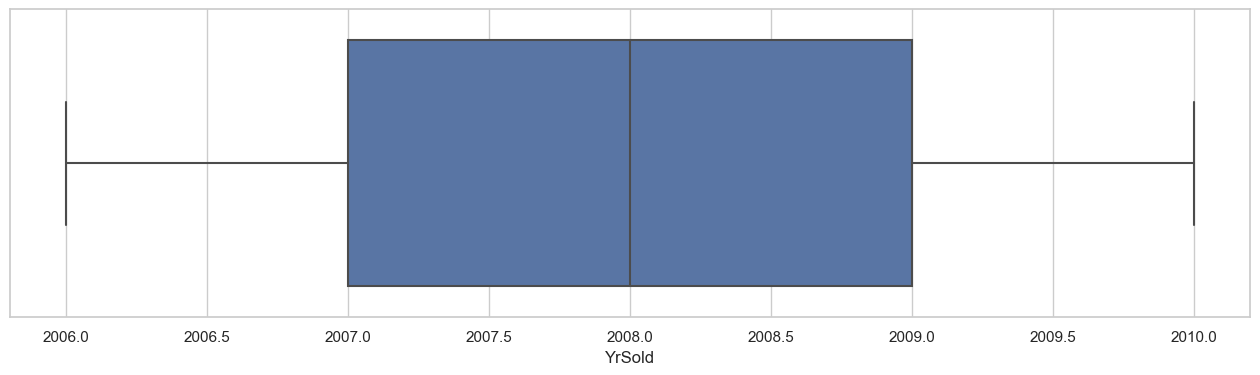

In [ ]:
numerical_df = test.select_dtypes(exclude=['object'])
#numerical_df = numerical_df.drop(["Id"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\si

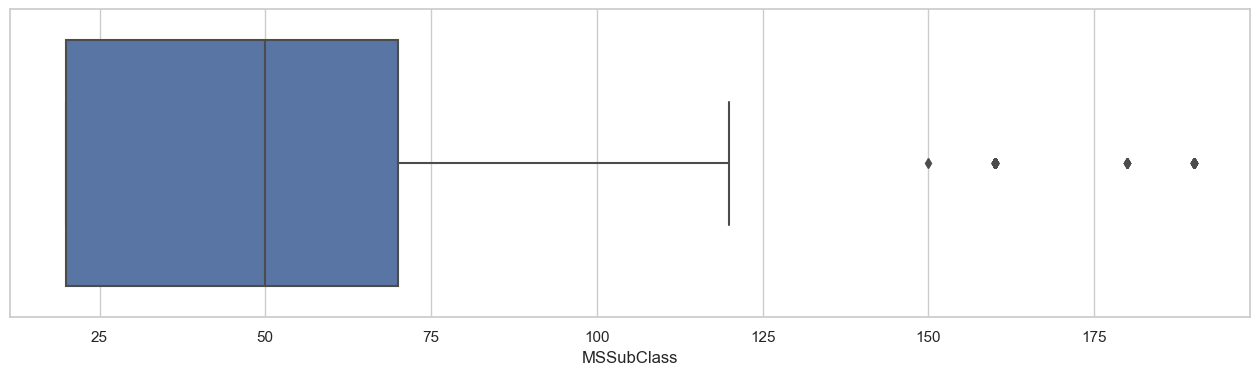

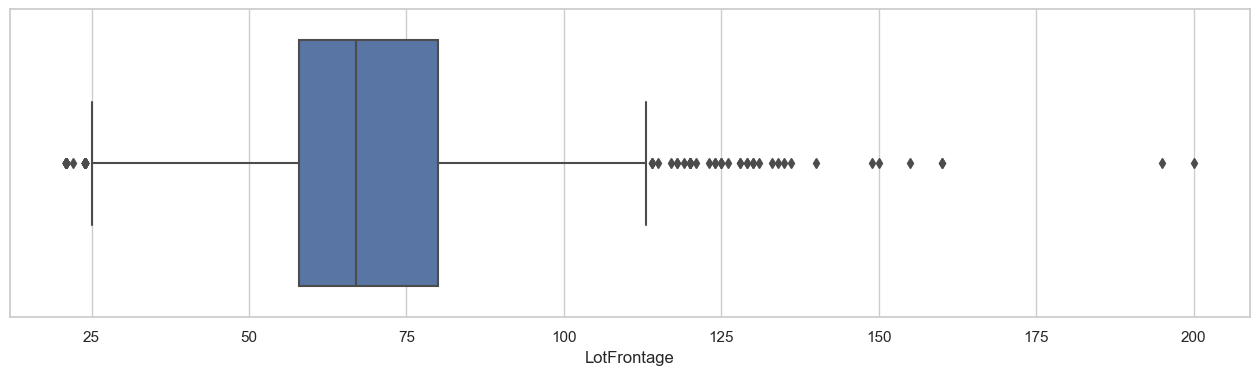

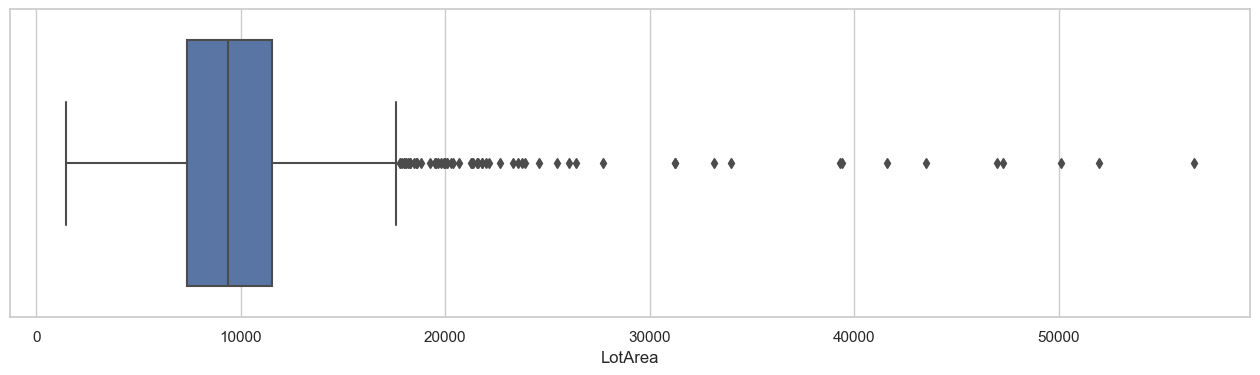

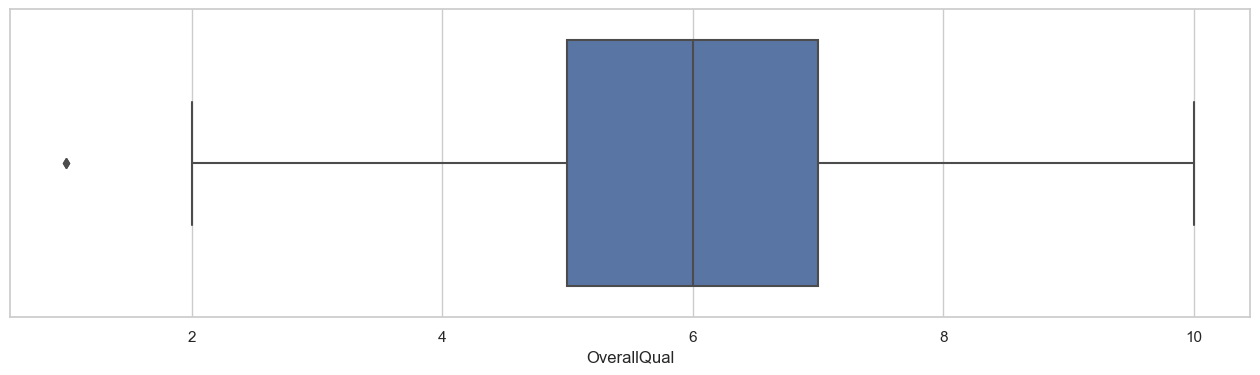

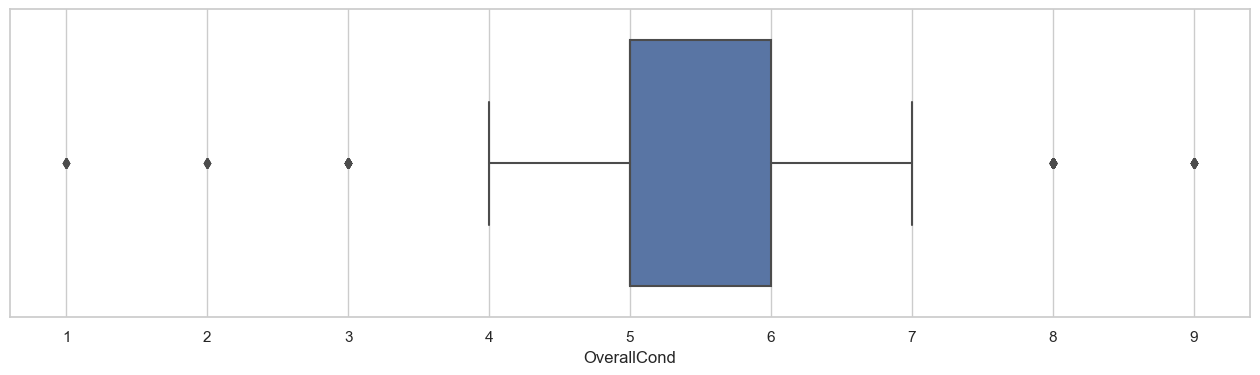

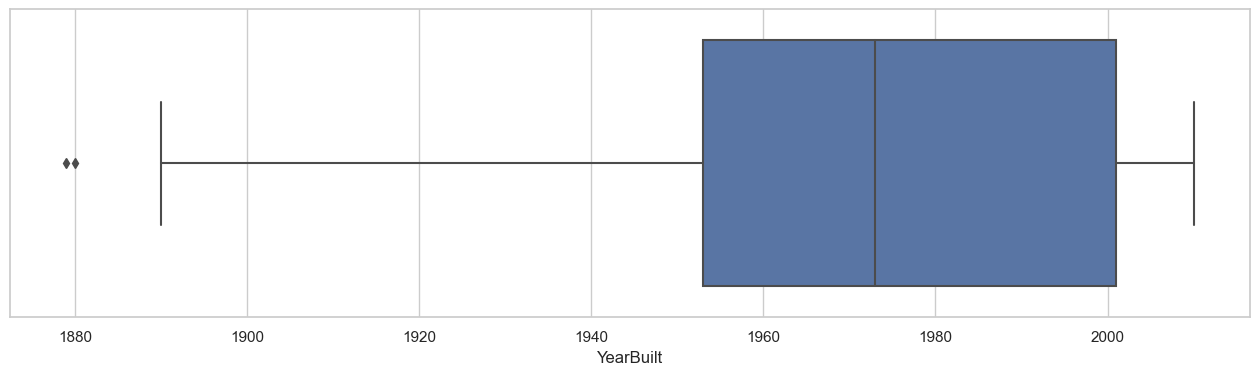

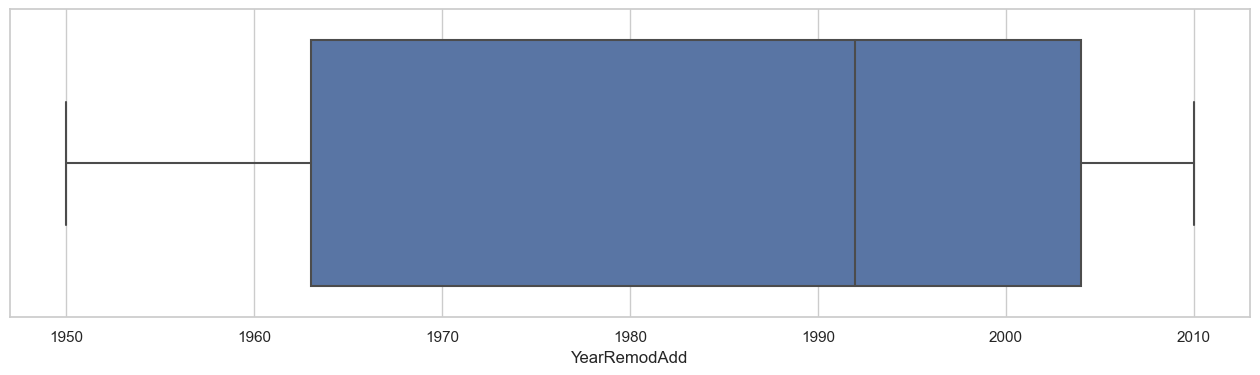

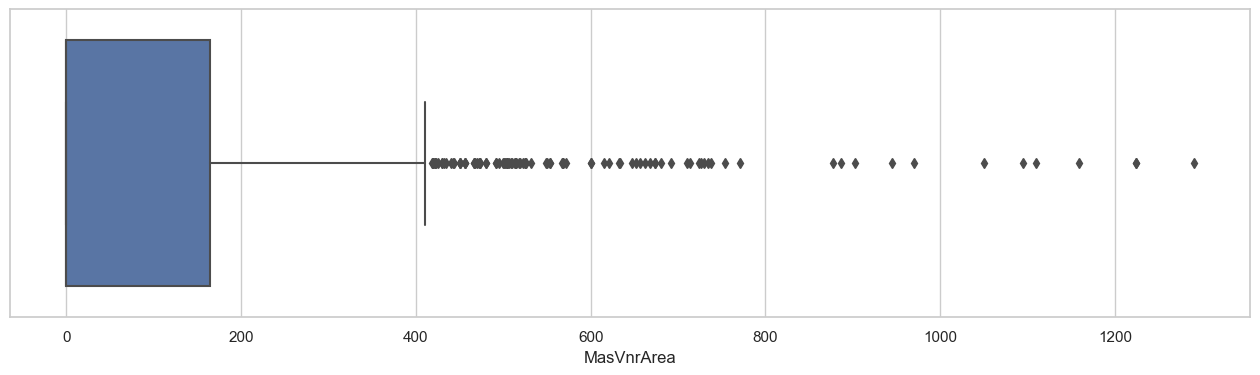

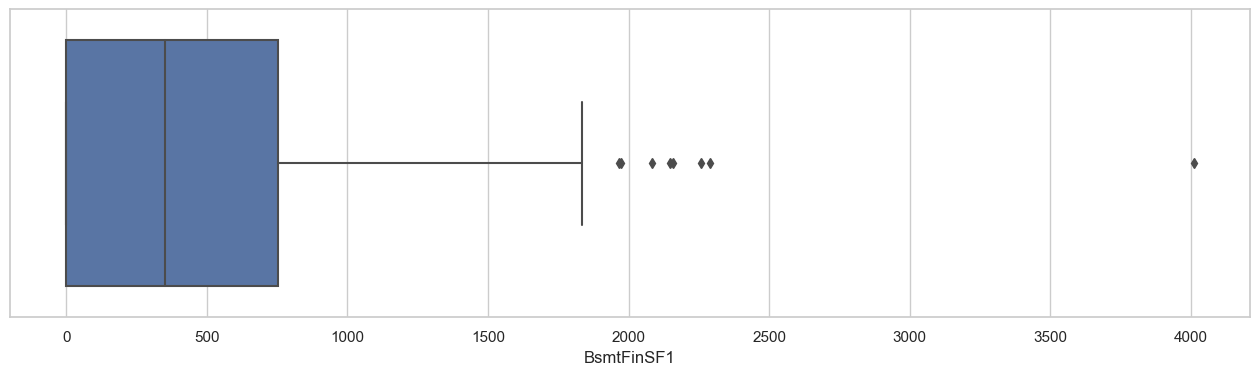

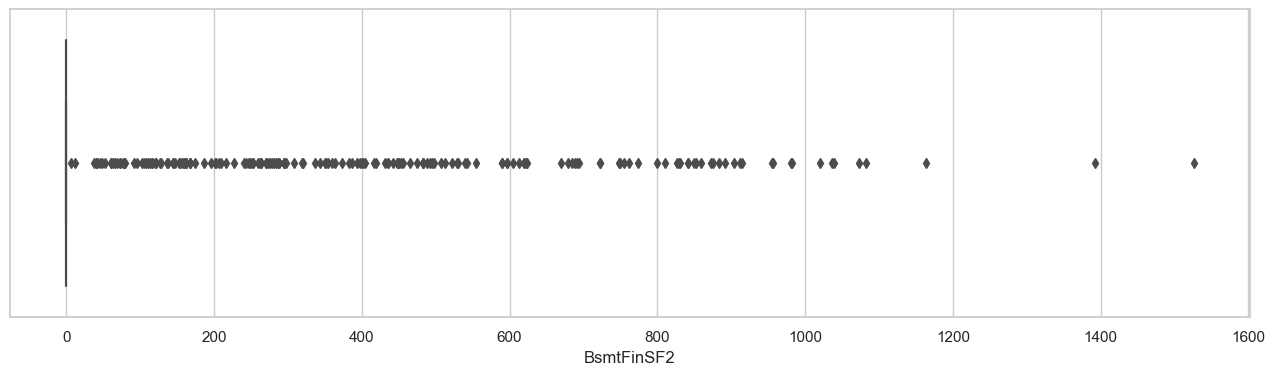

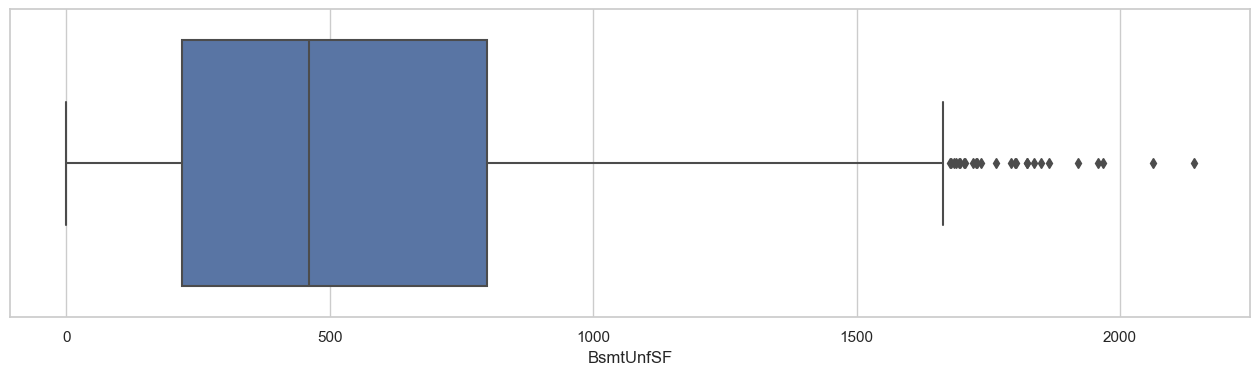

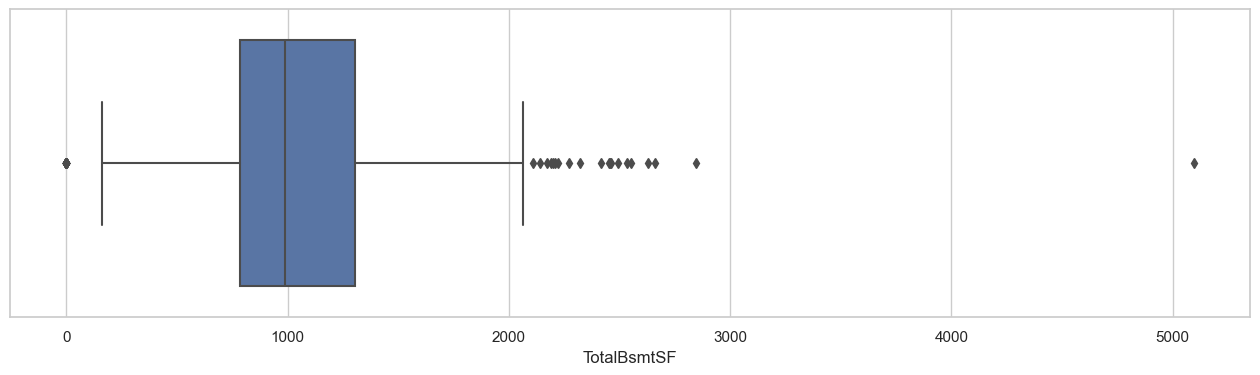

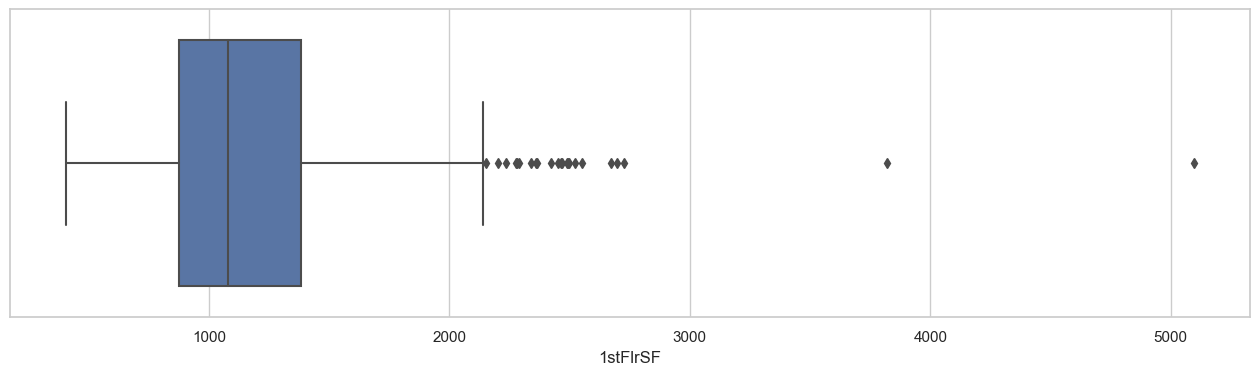

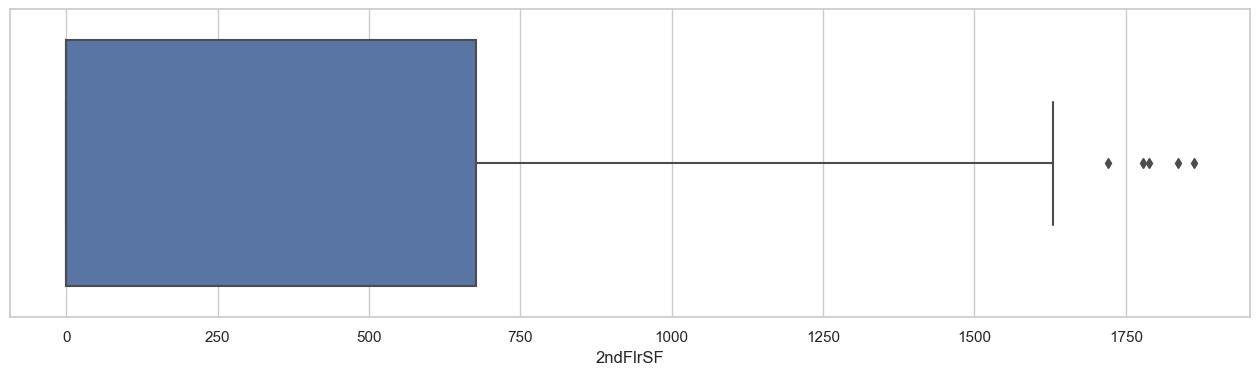

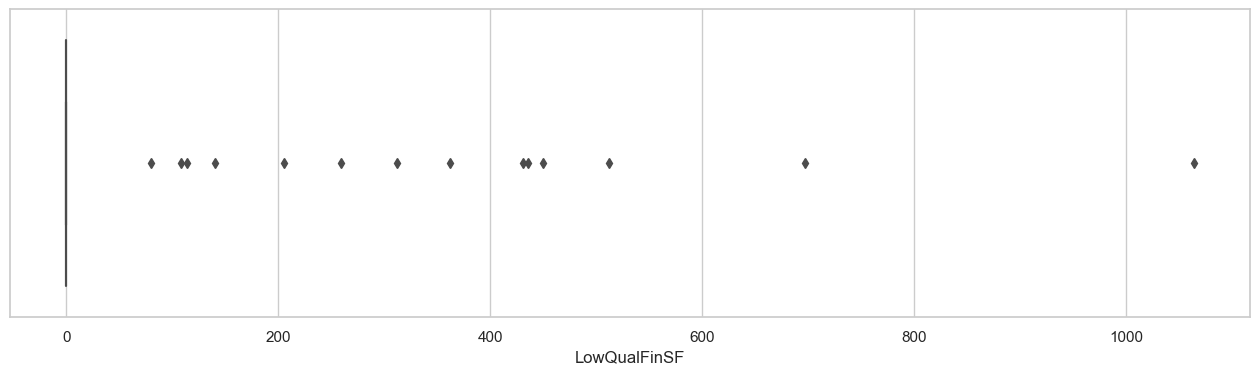

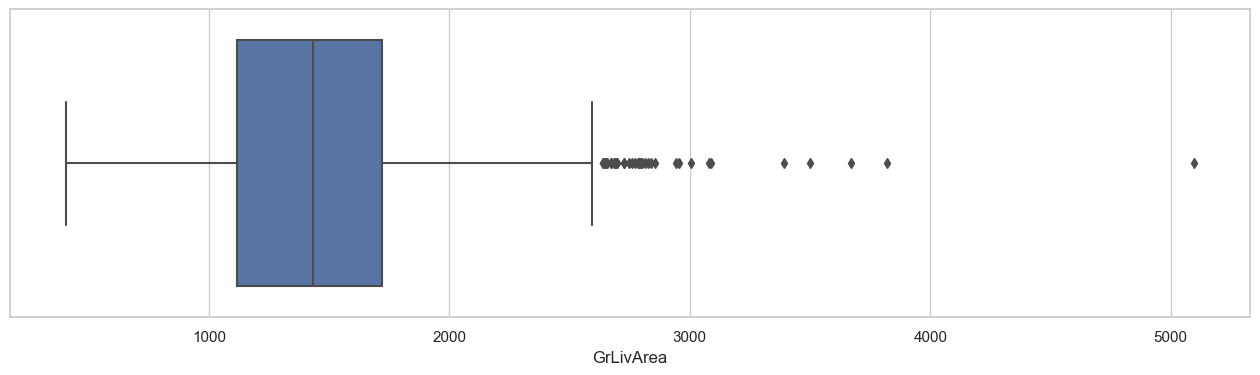

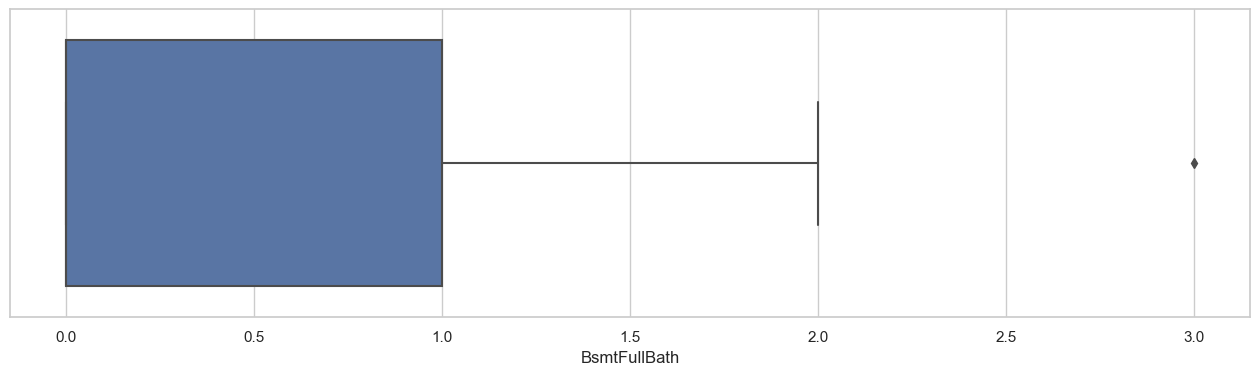

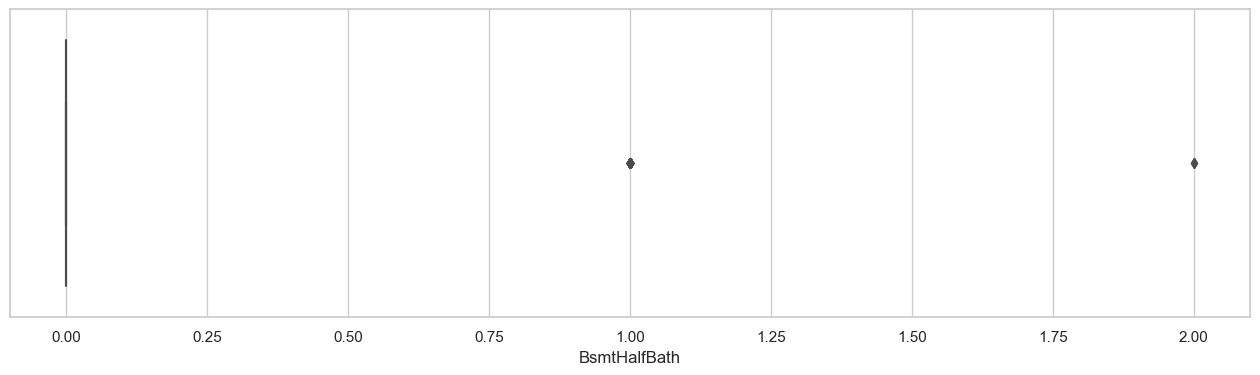

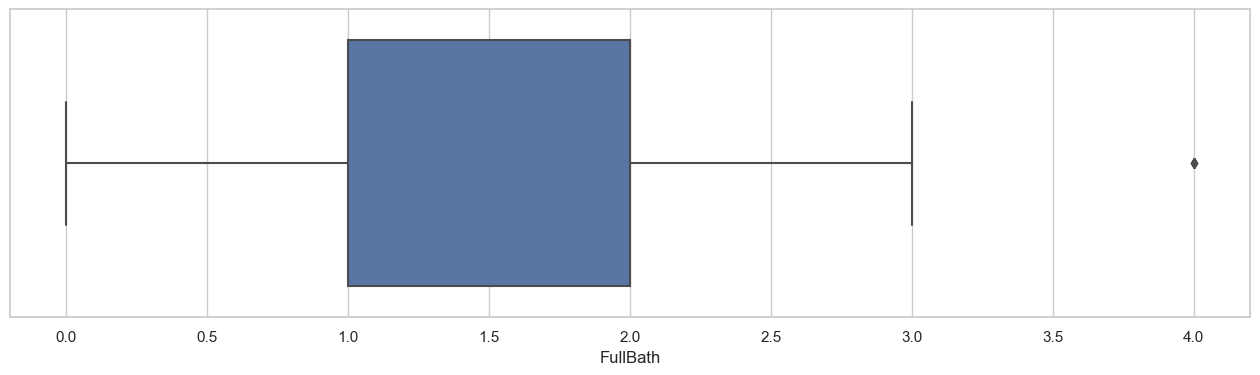

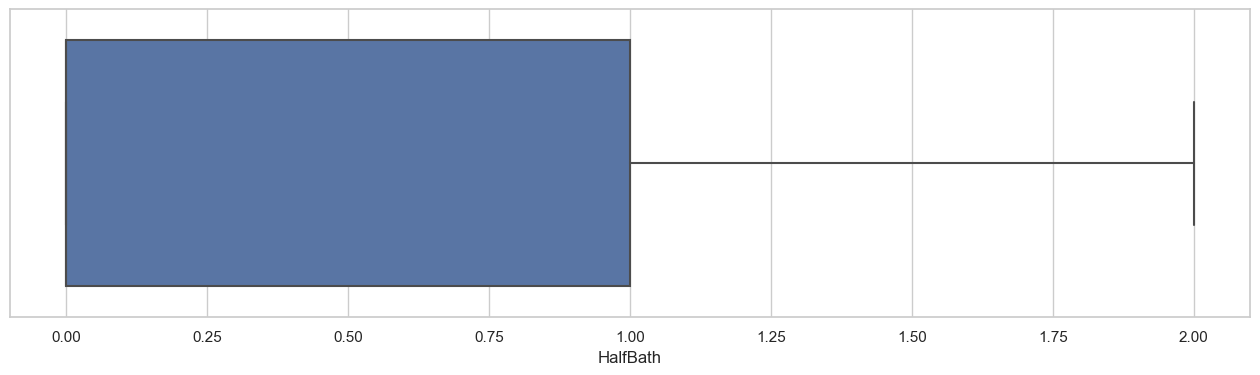

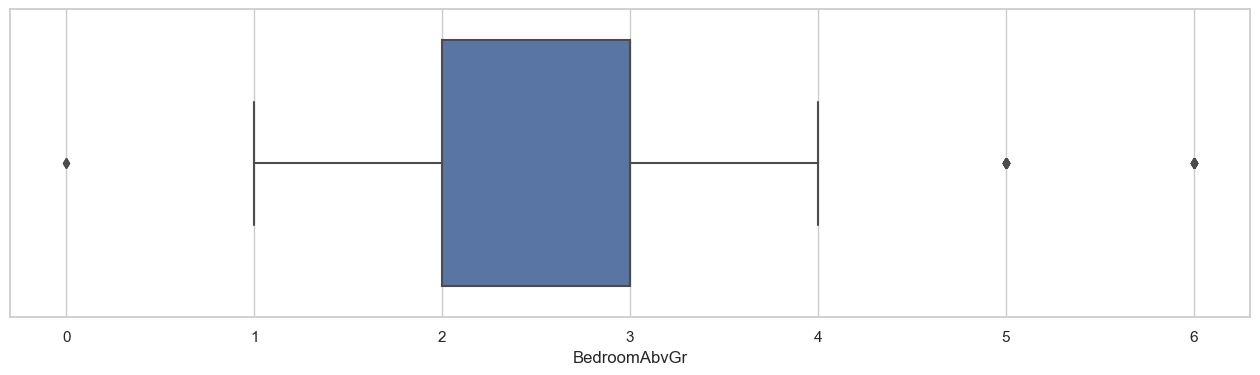

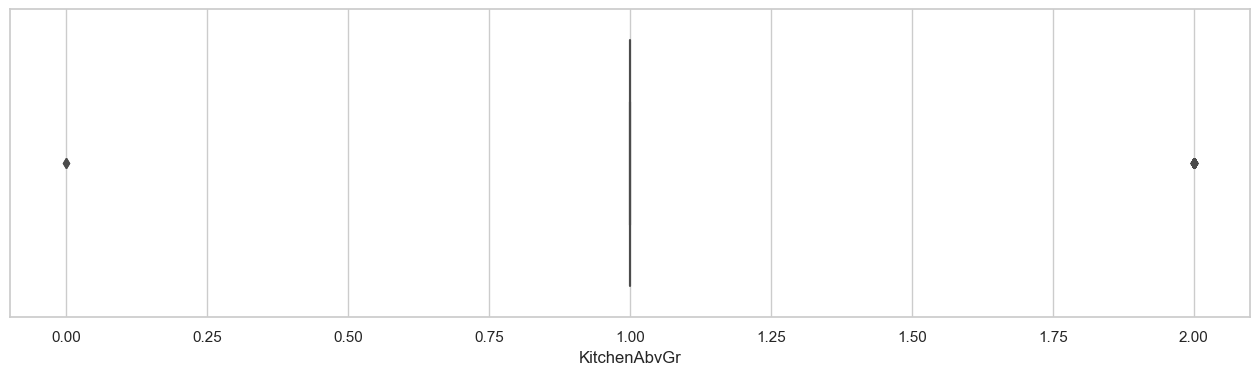

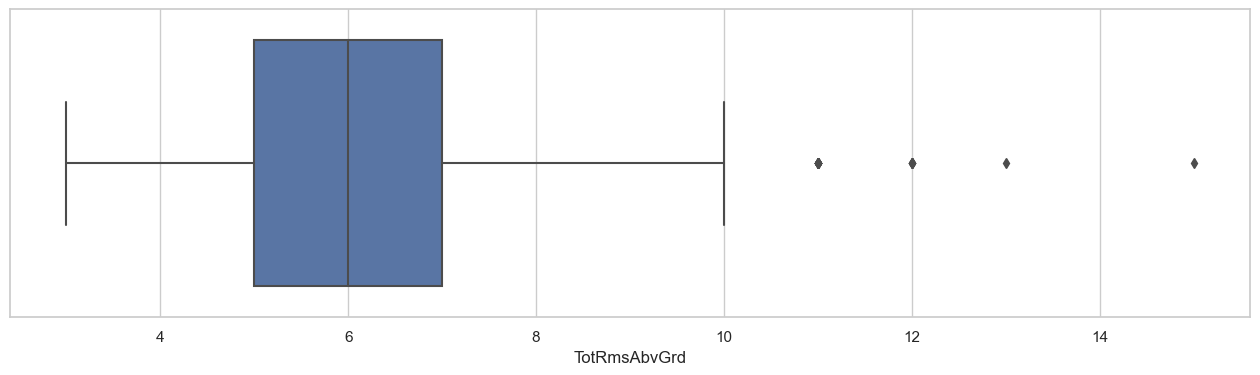

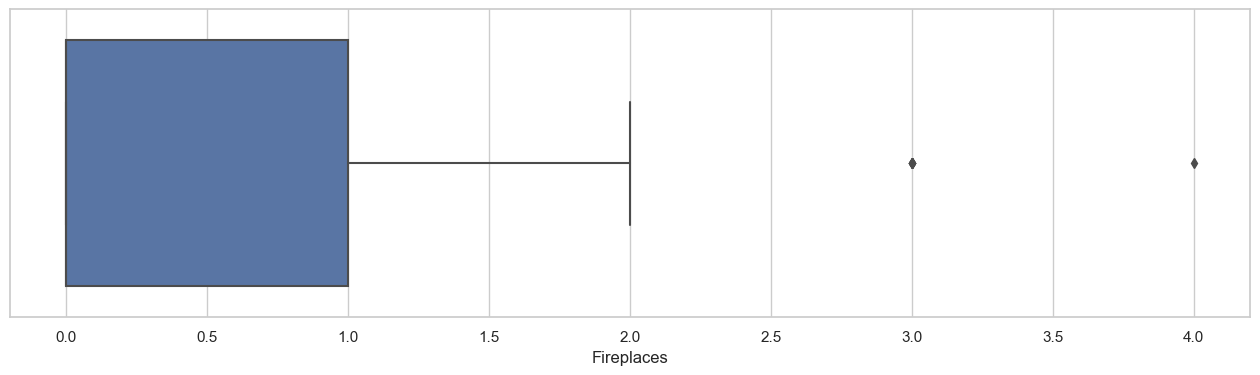

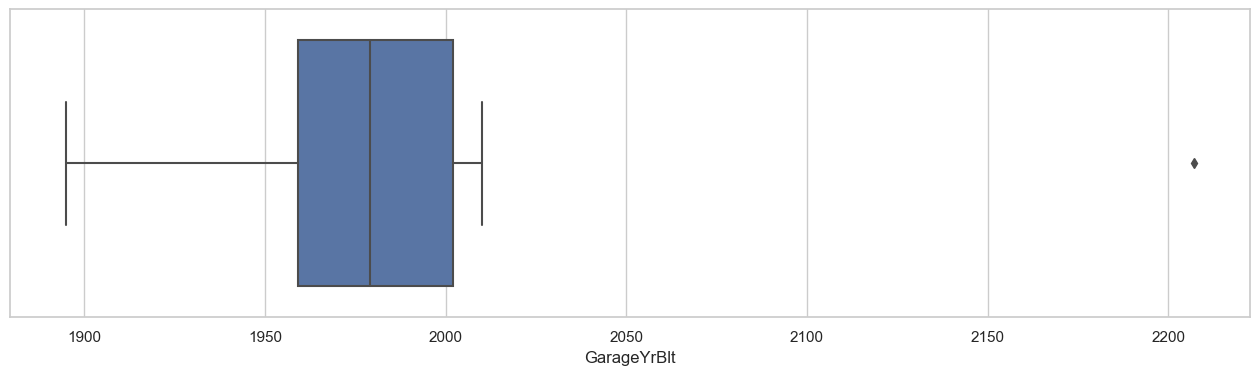

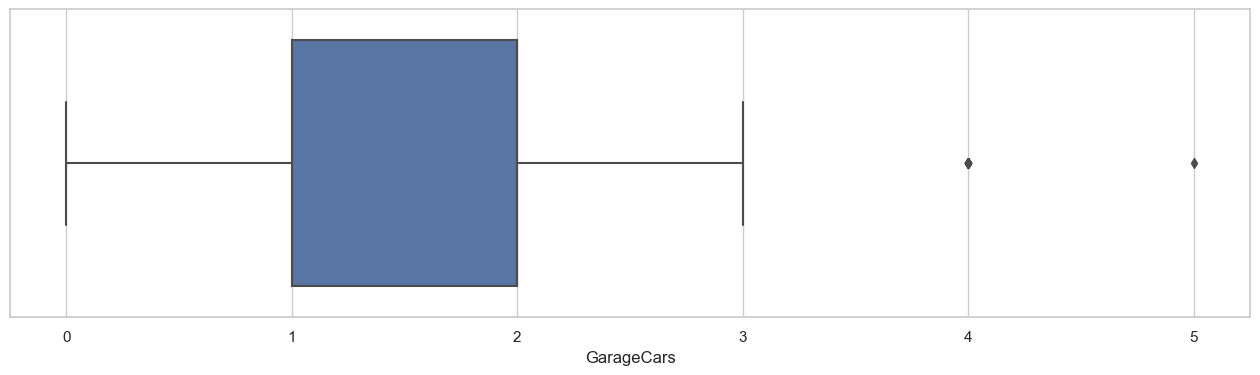

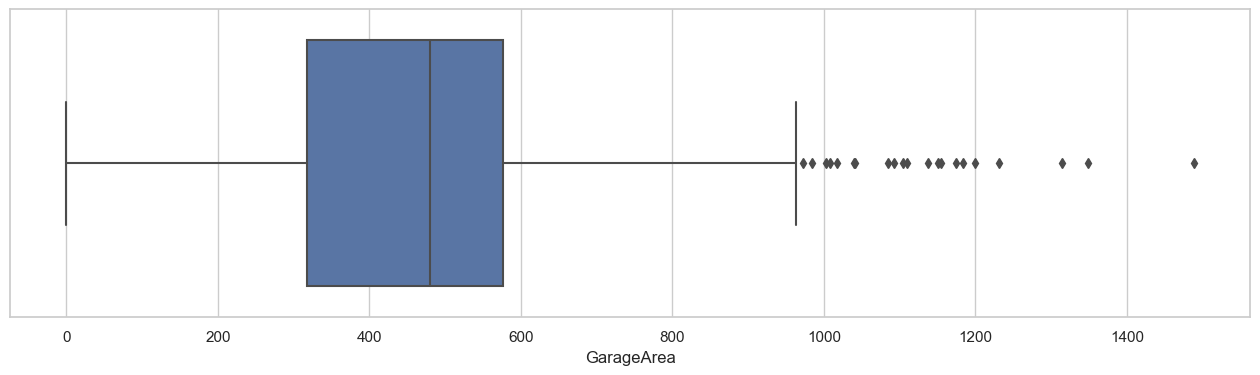

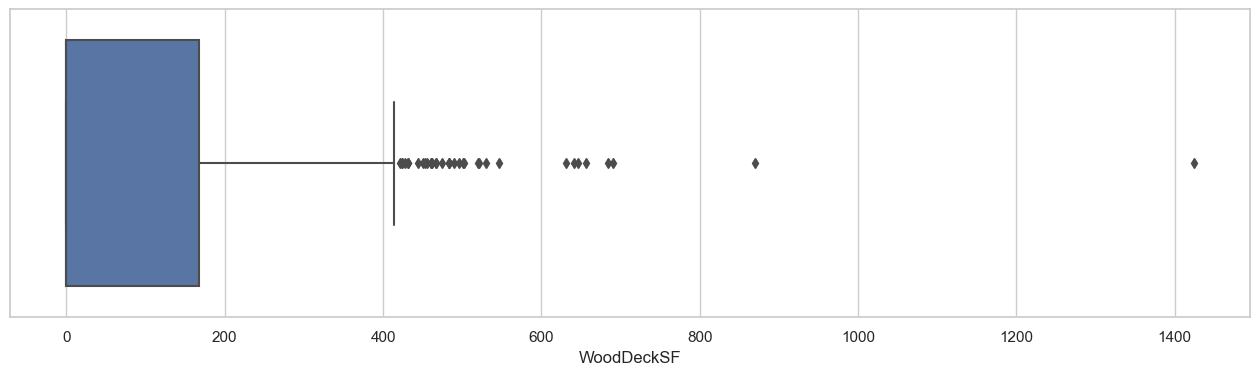

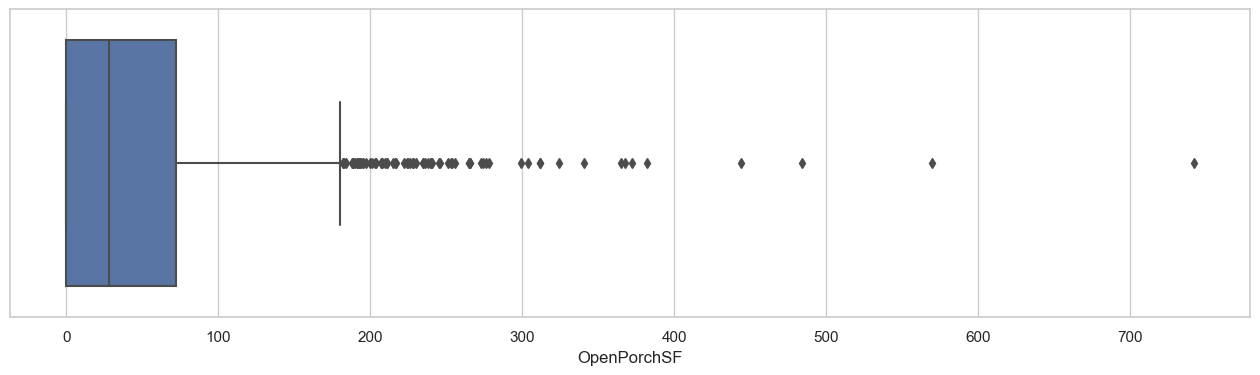

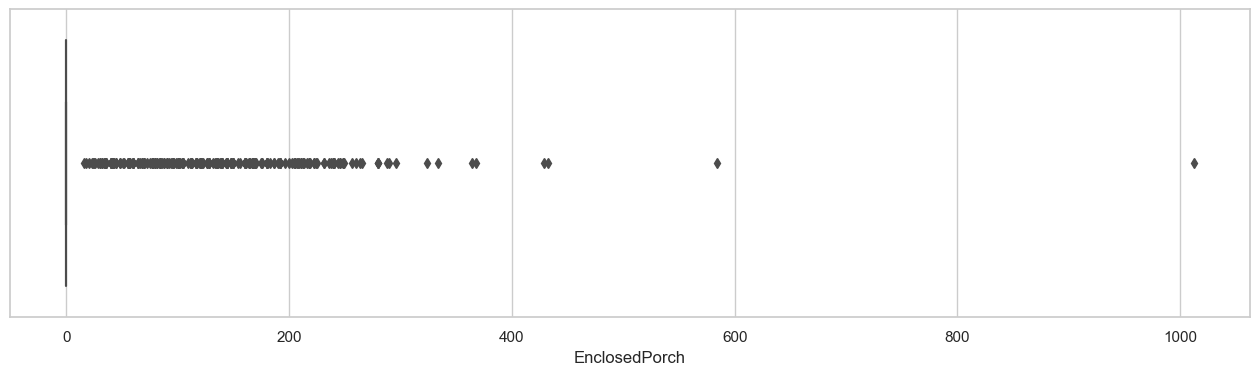

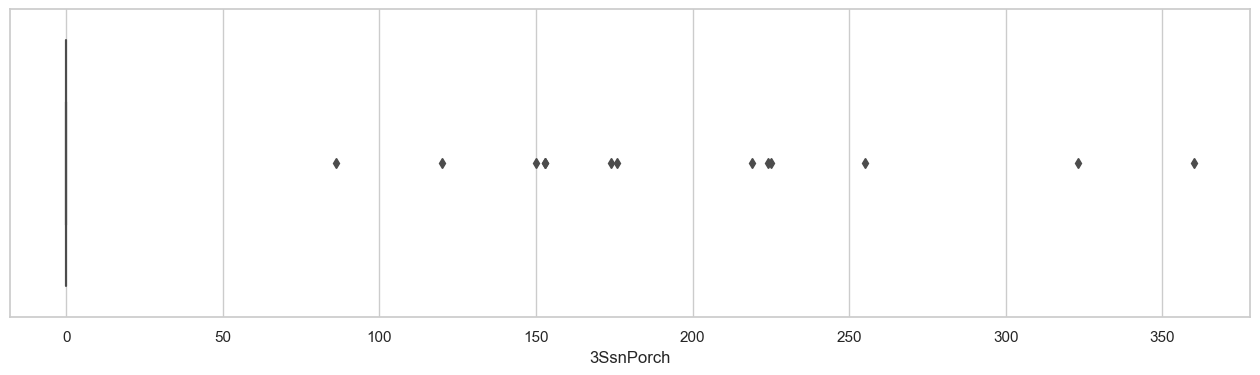

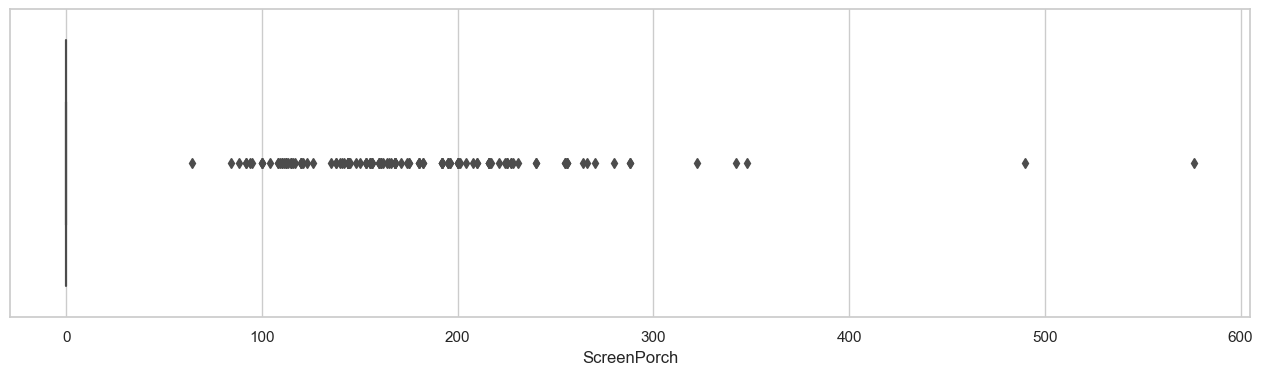

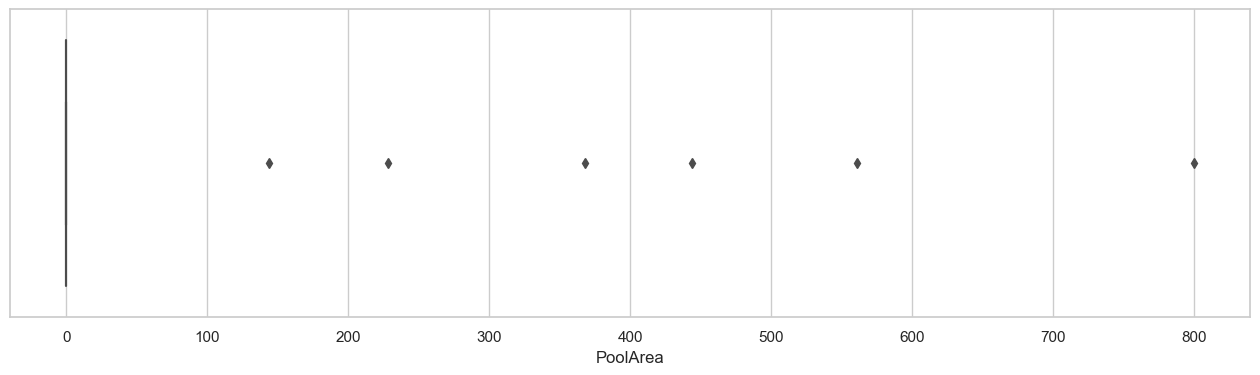

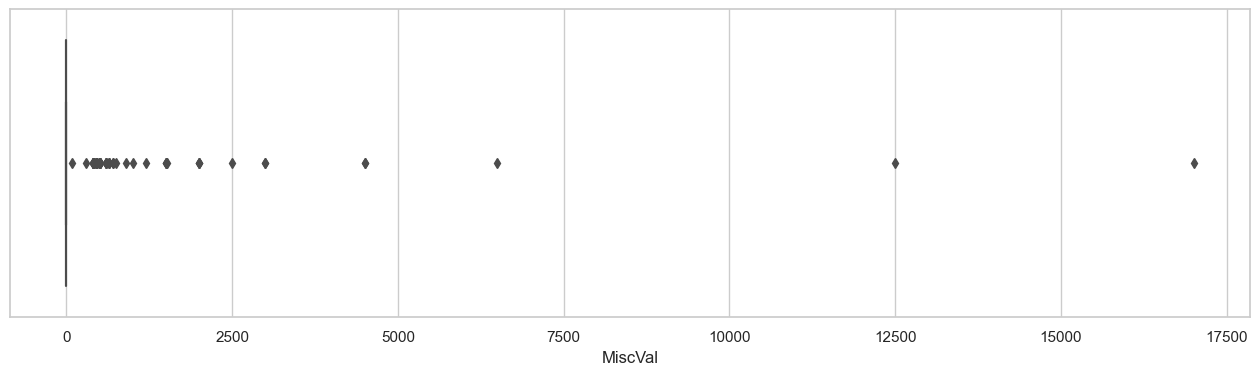

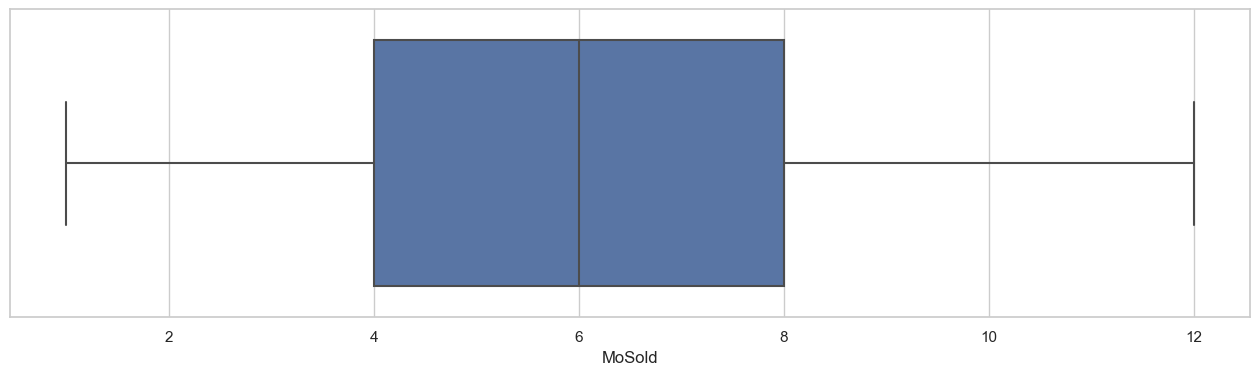

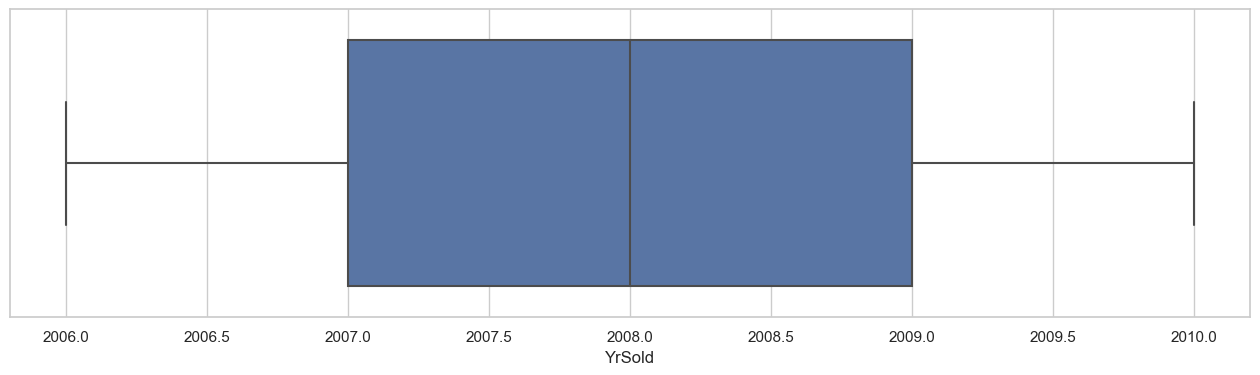

In [ ]:
numerical_df = test.select_dtypes(exclude=['object'])
#numerical_df = numerical_df.drop(["Id"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\si

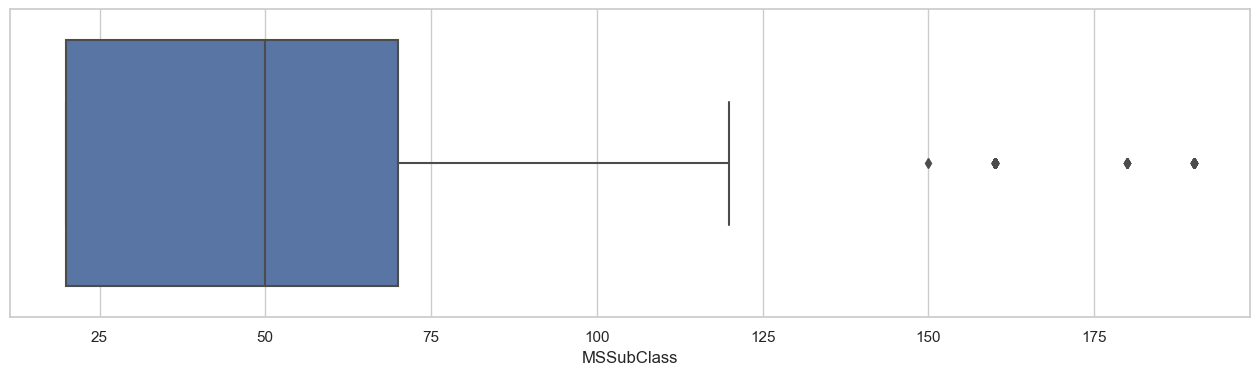

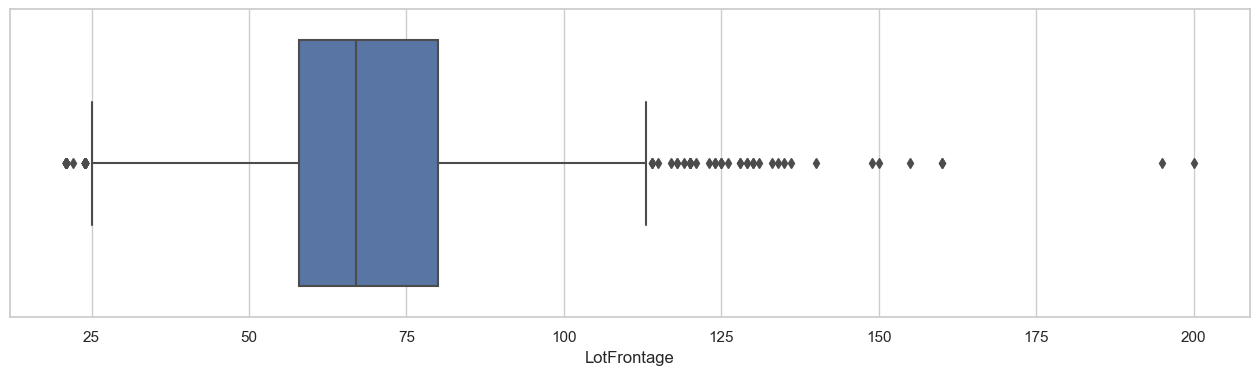

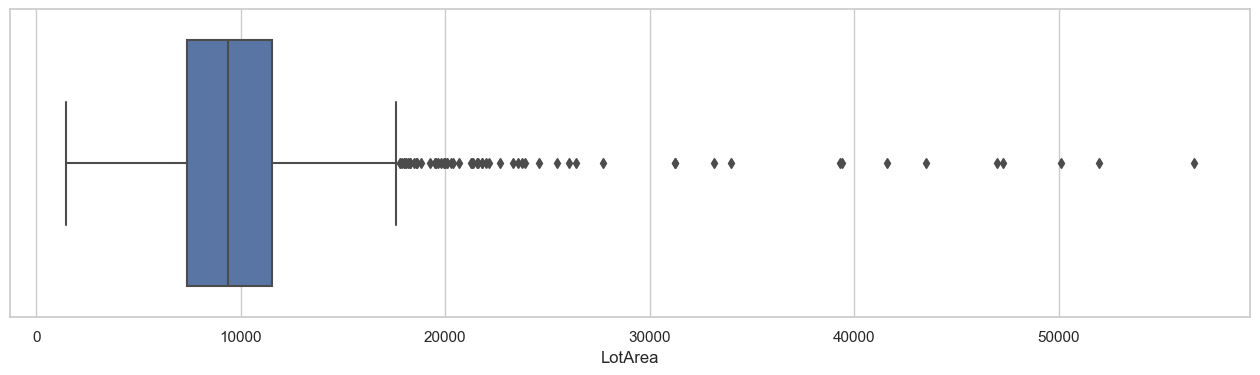

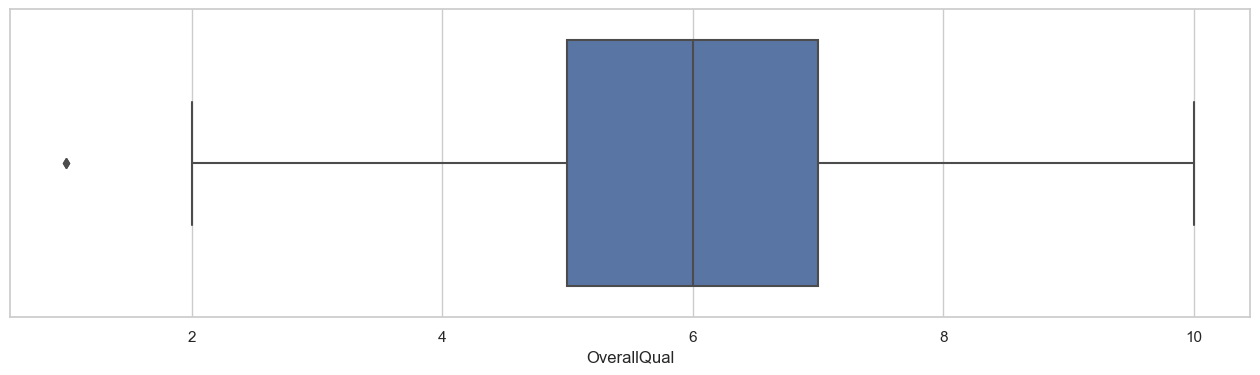

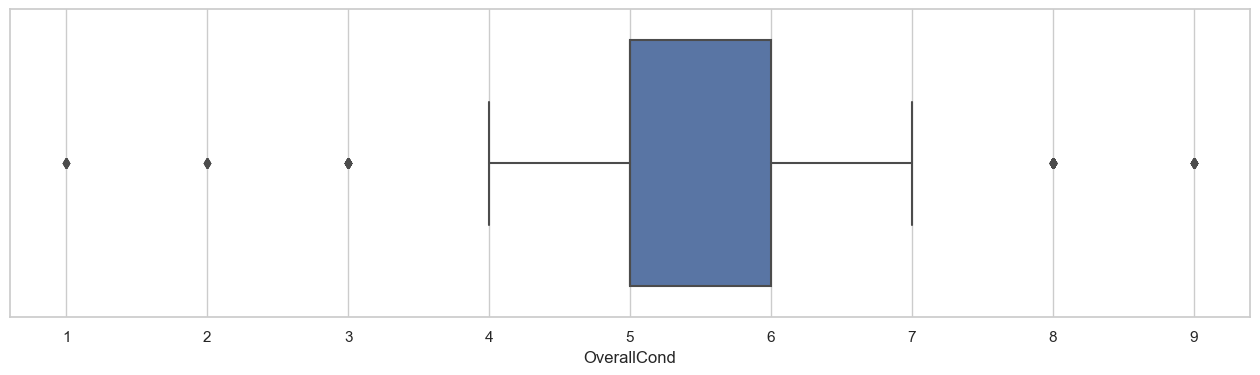

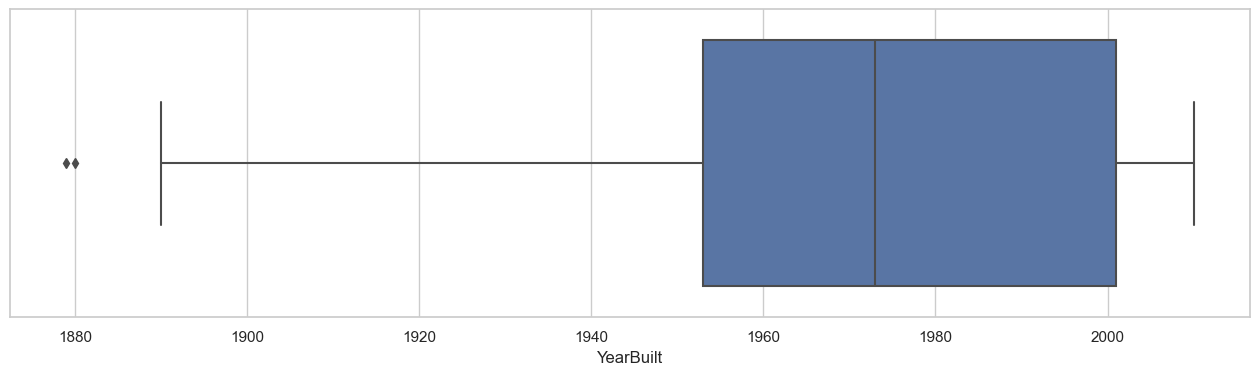

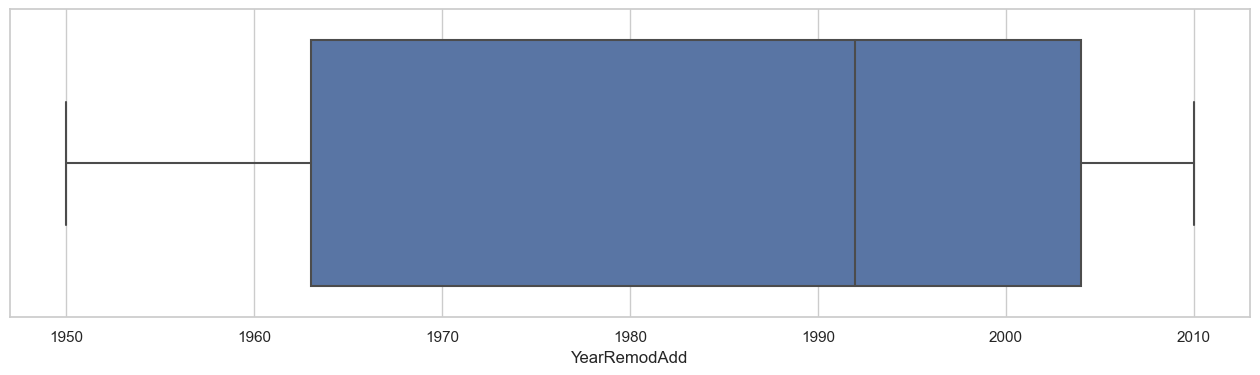

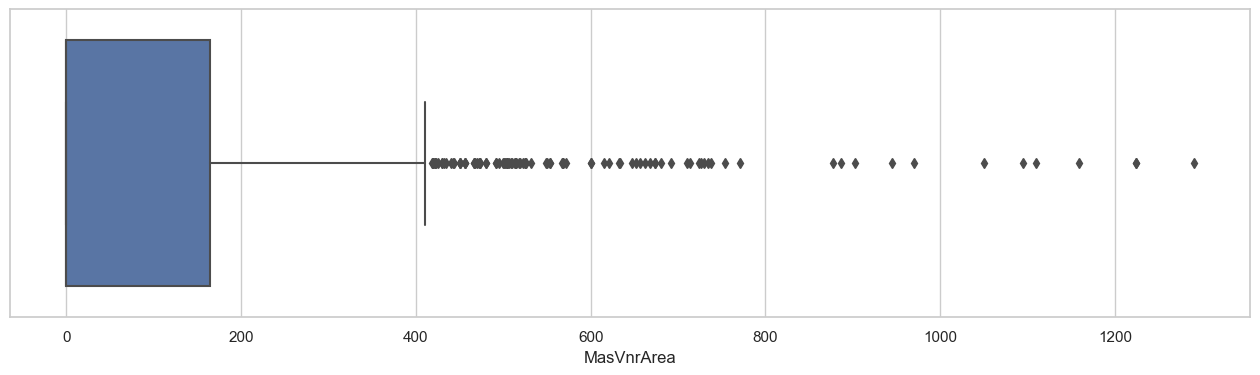

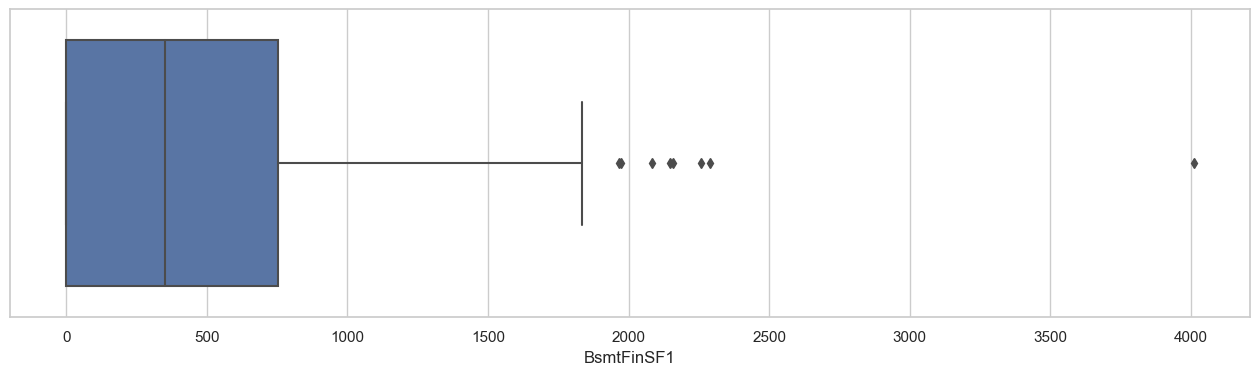

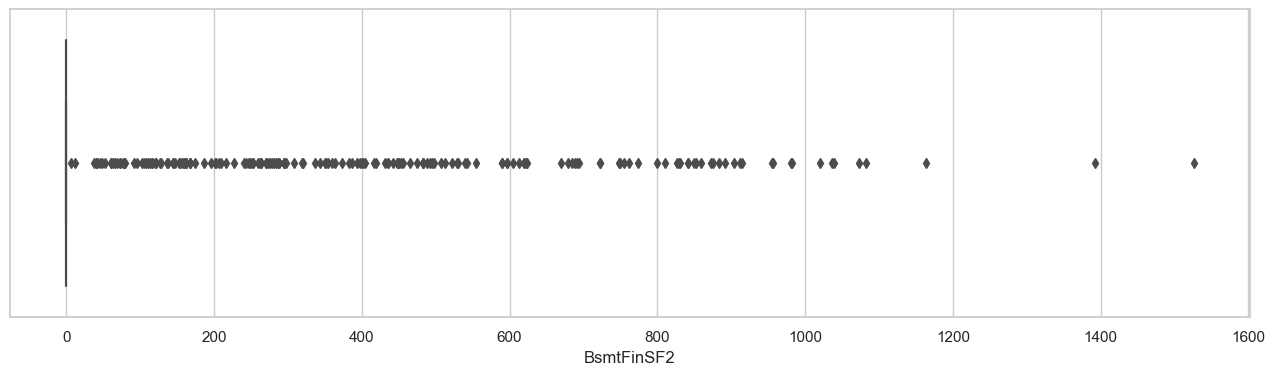

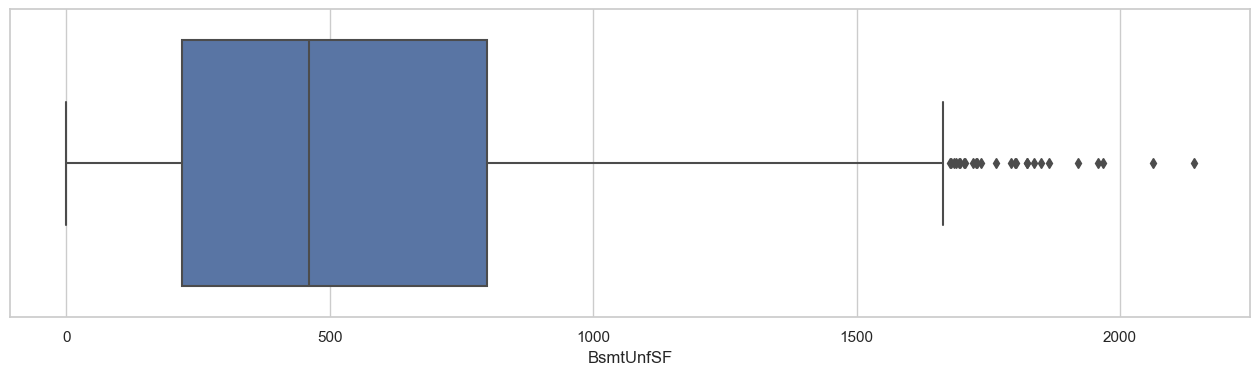

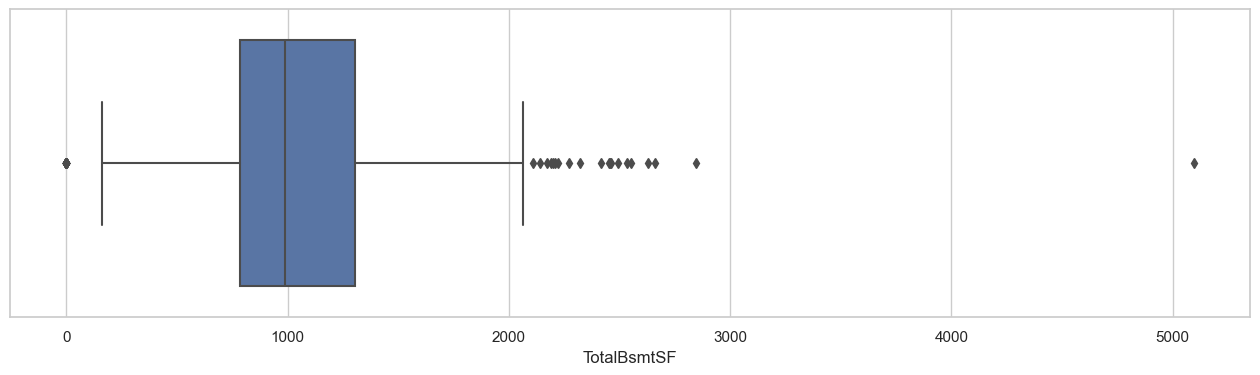

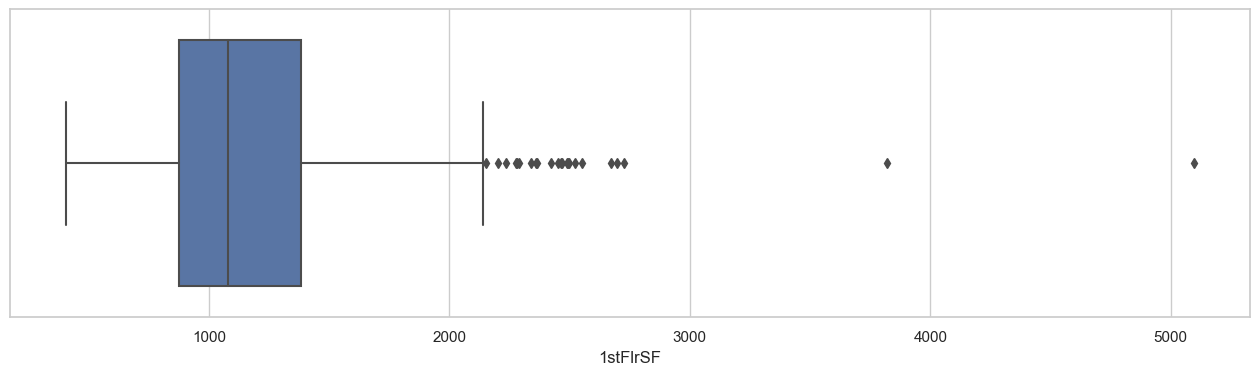

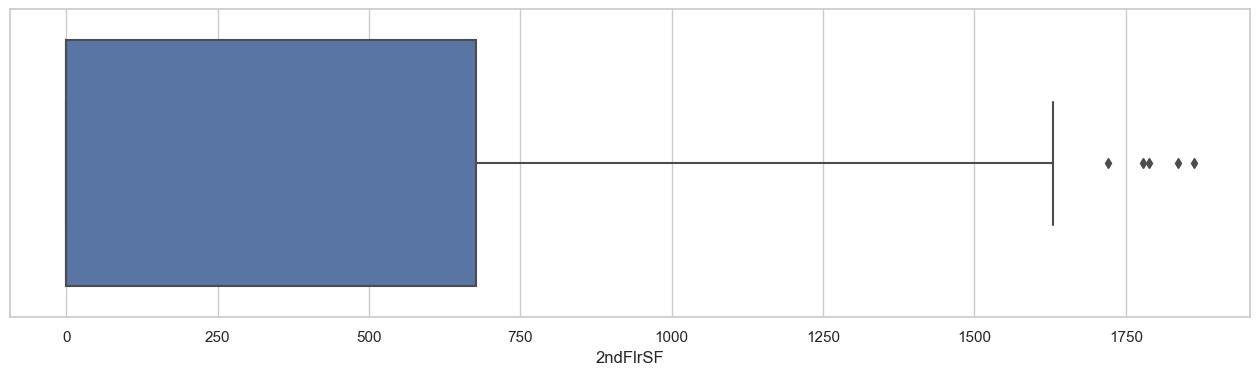

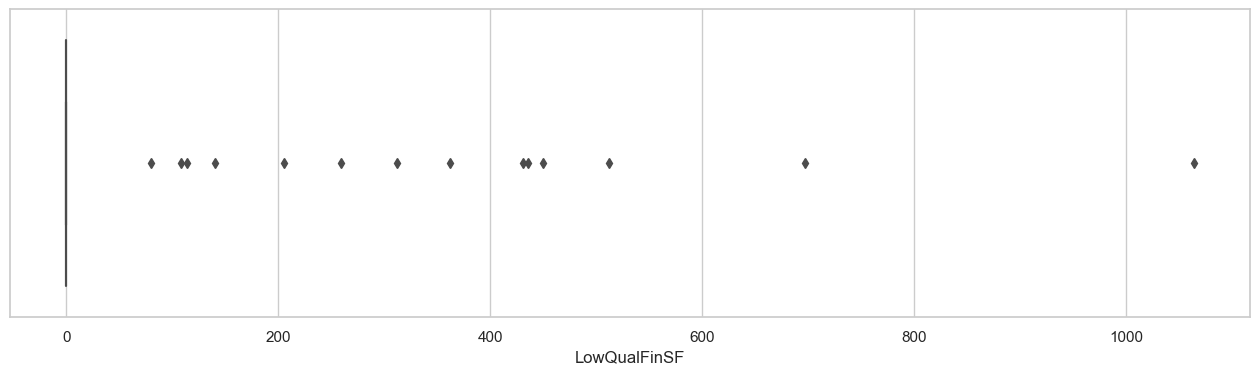

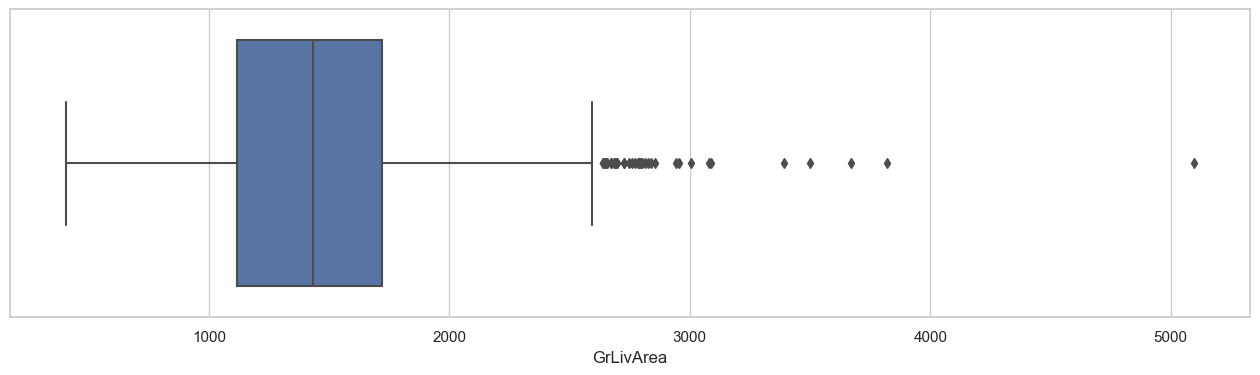

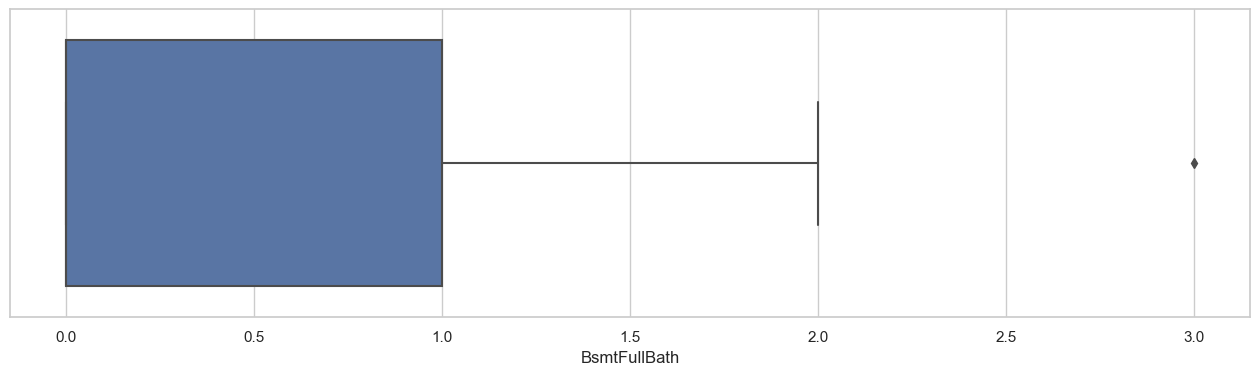

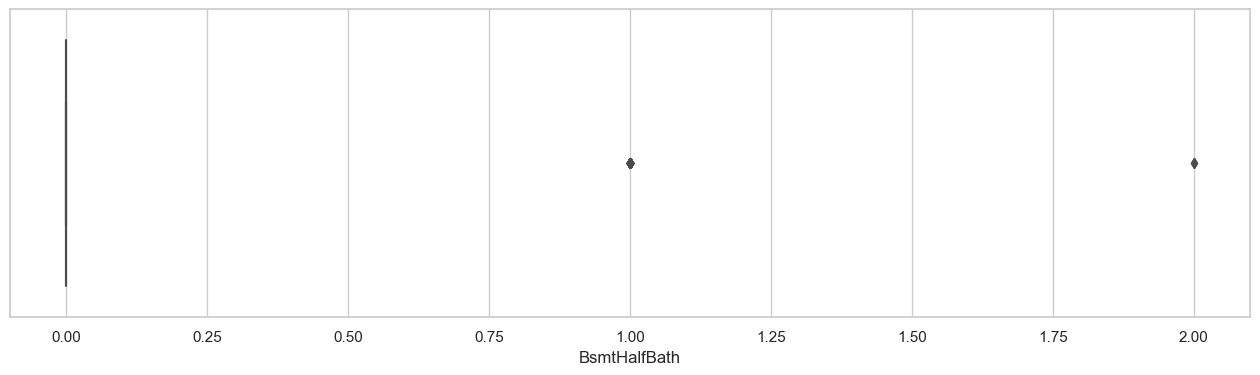

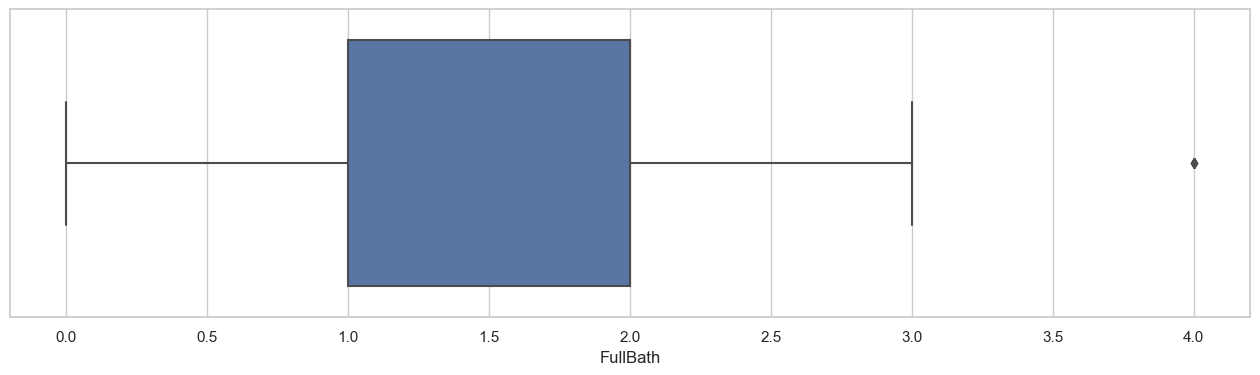

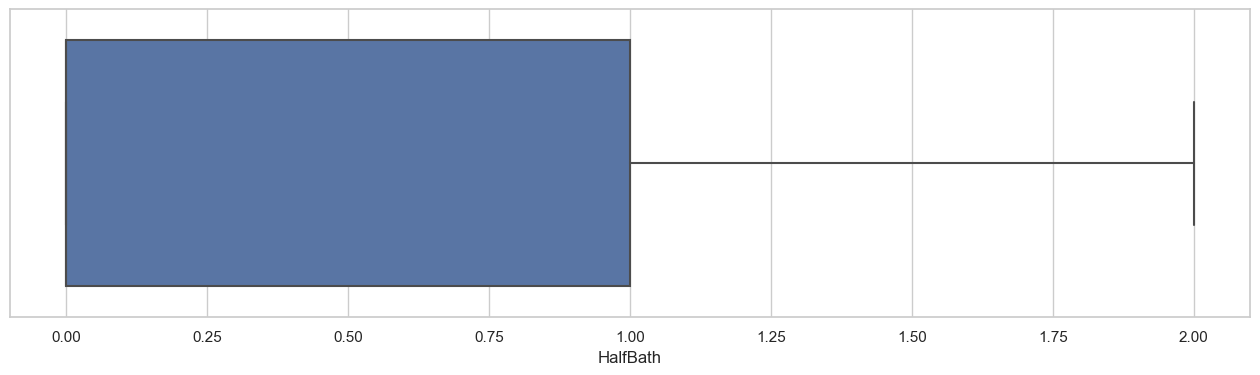

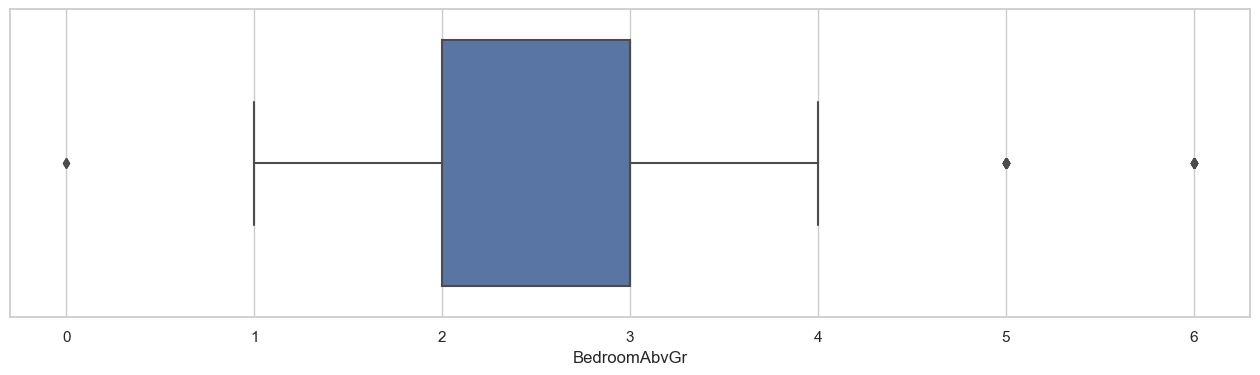

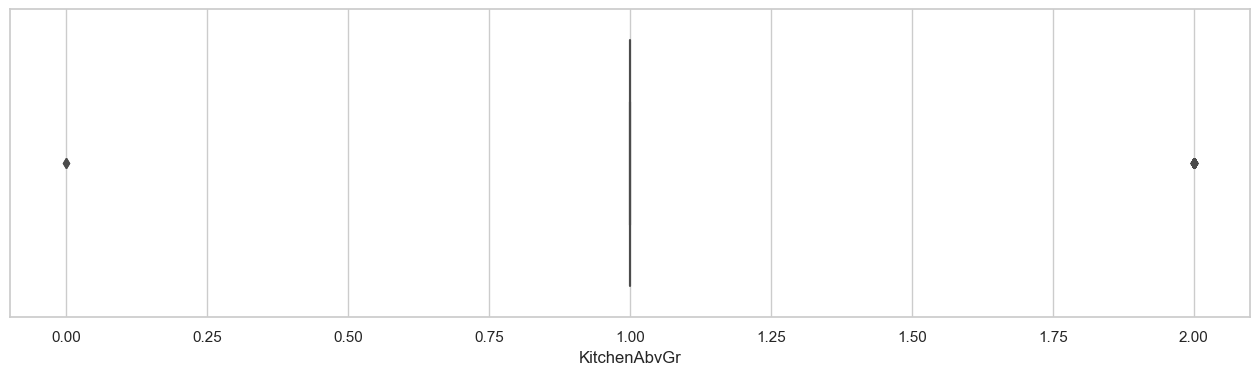

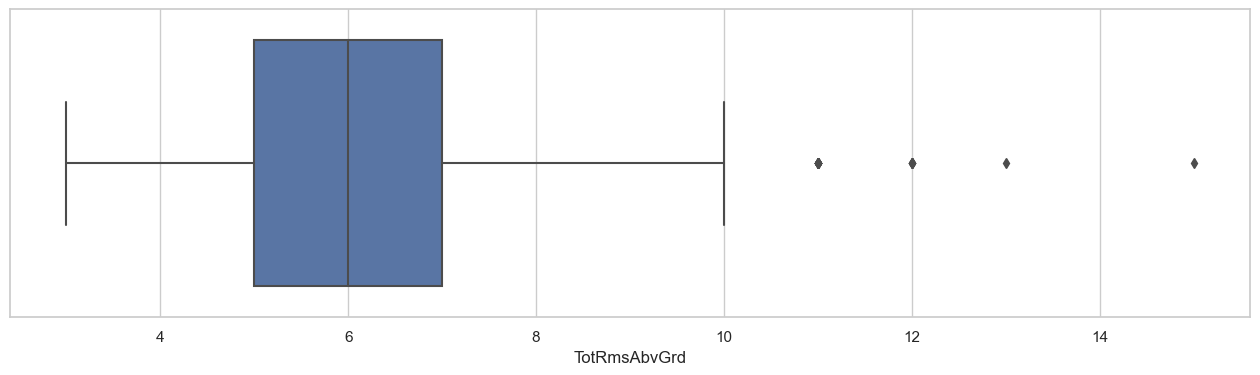

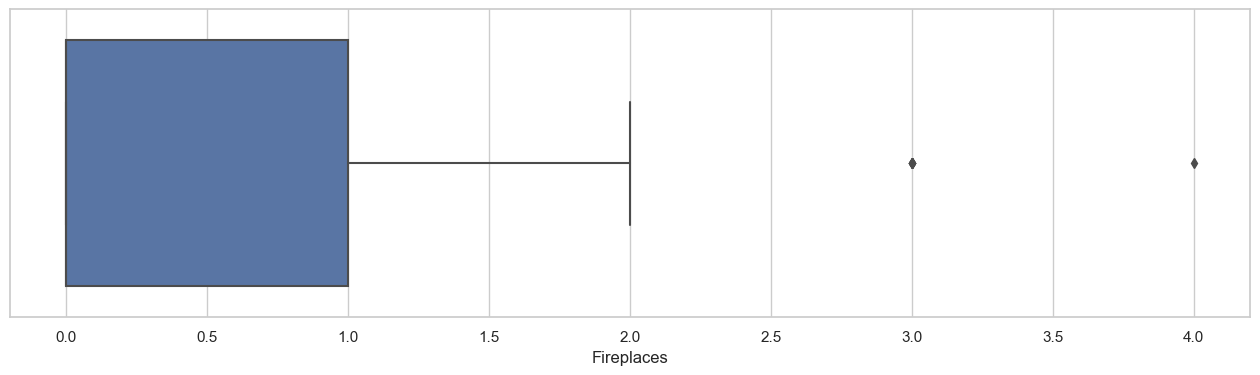

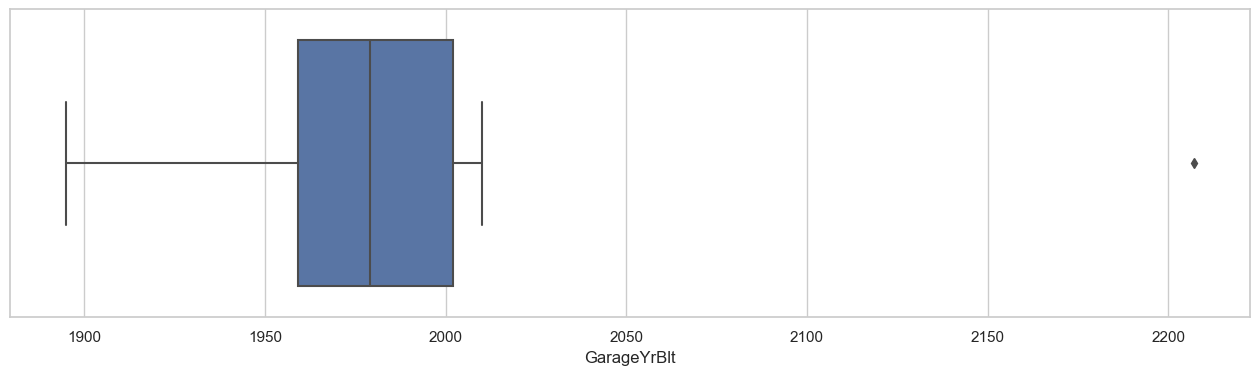

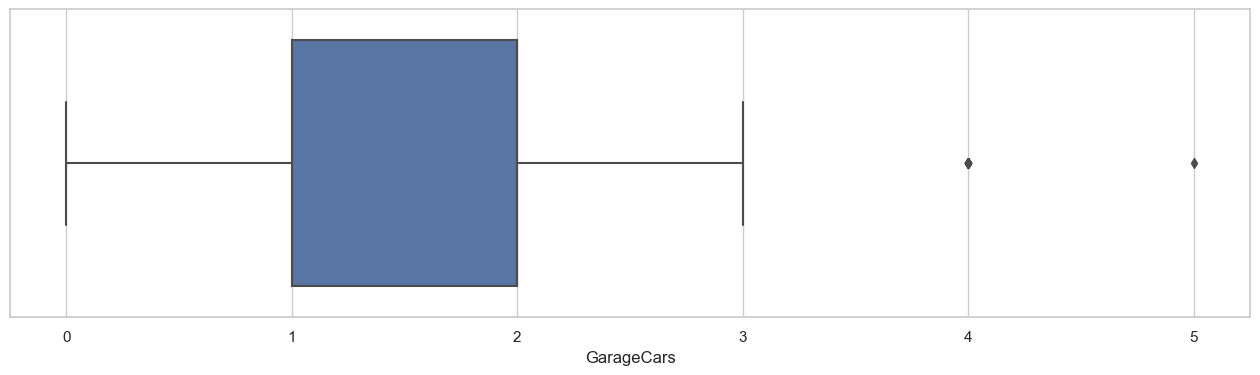

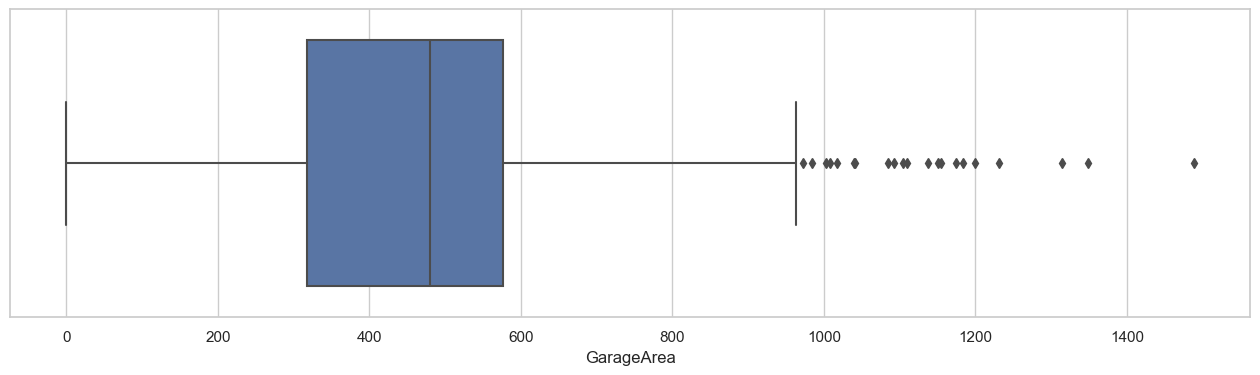

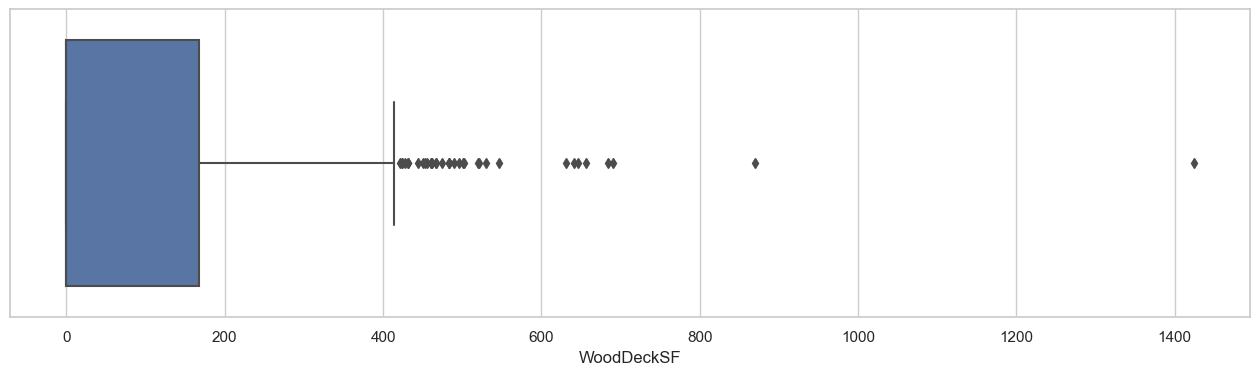

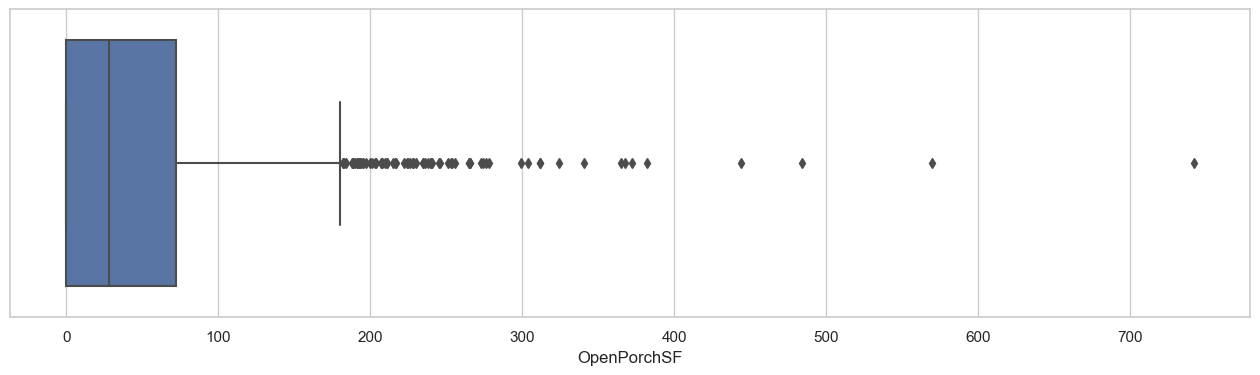

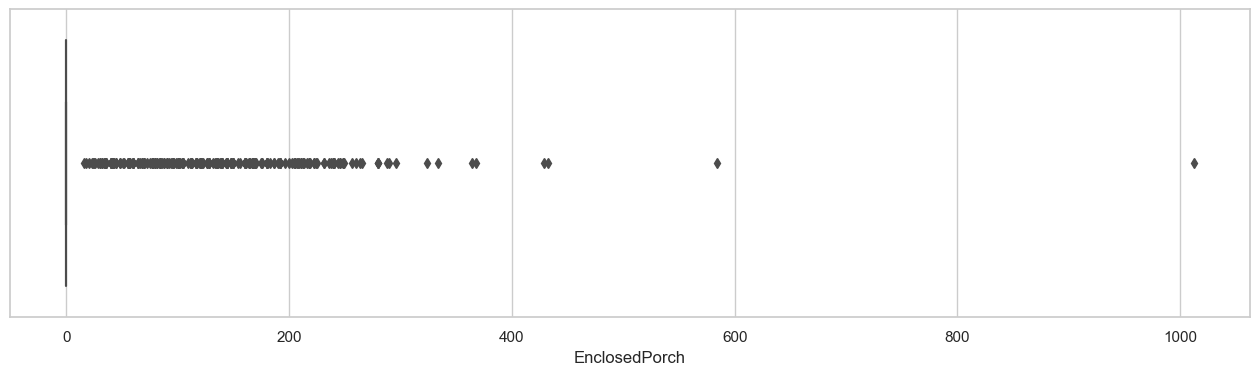

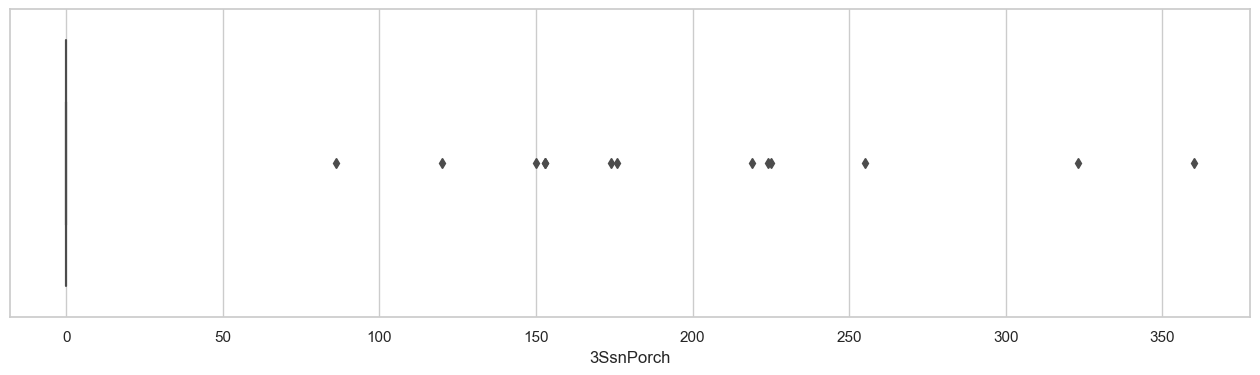

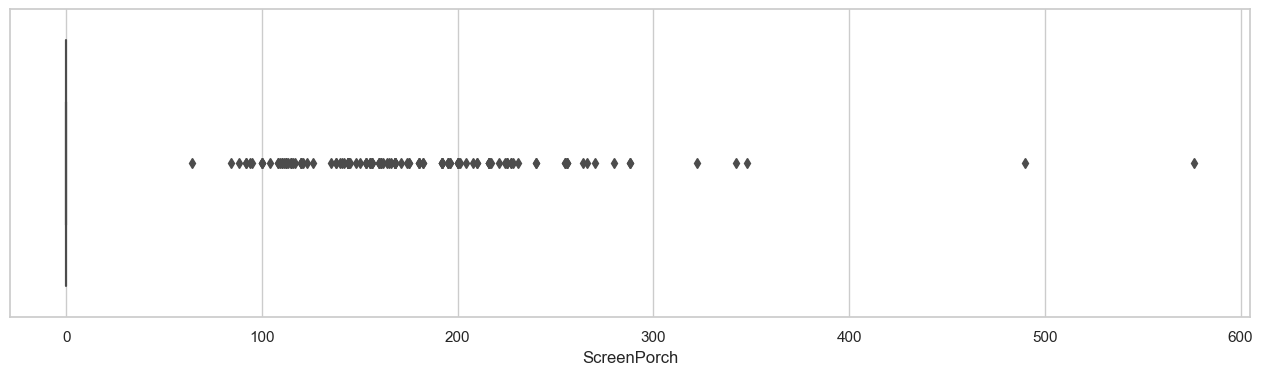

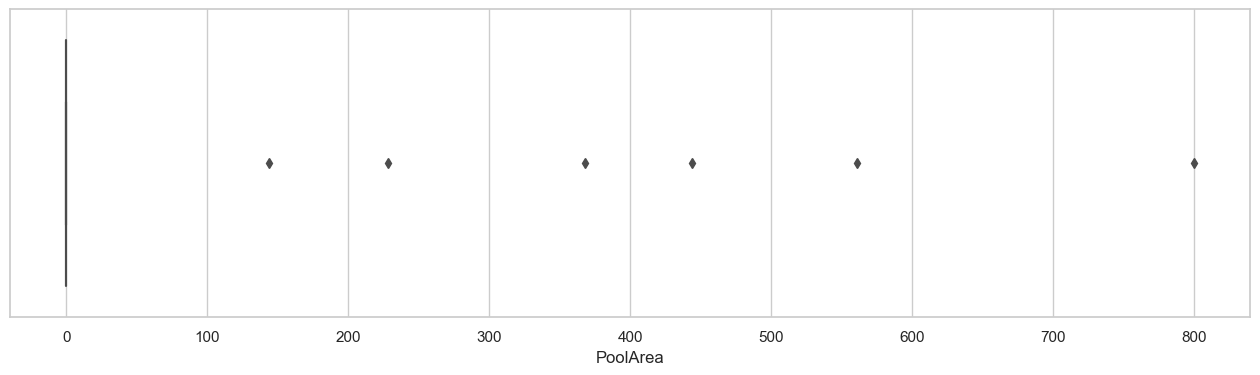

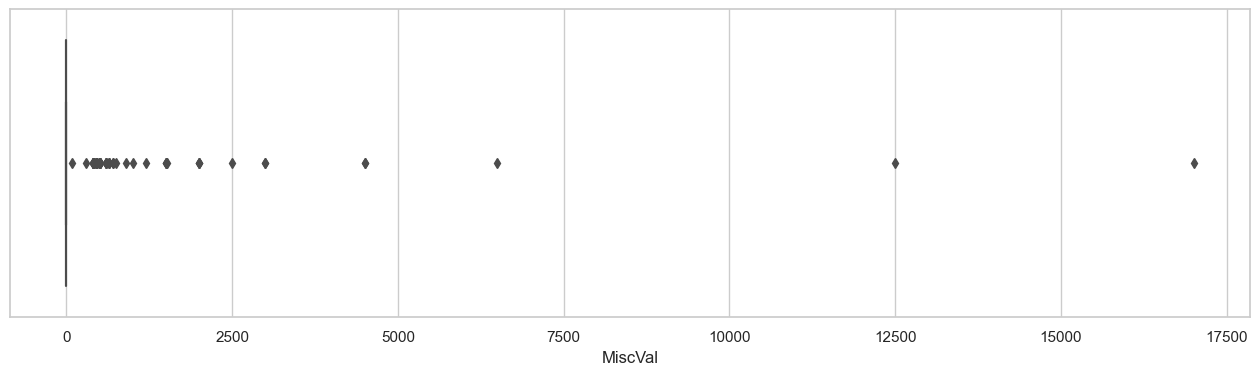

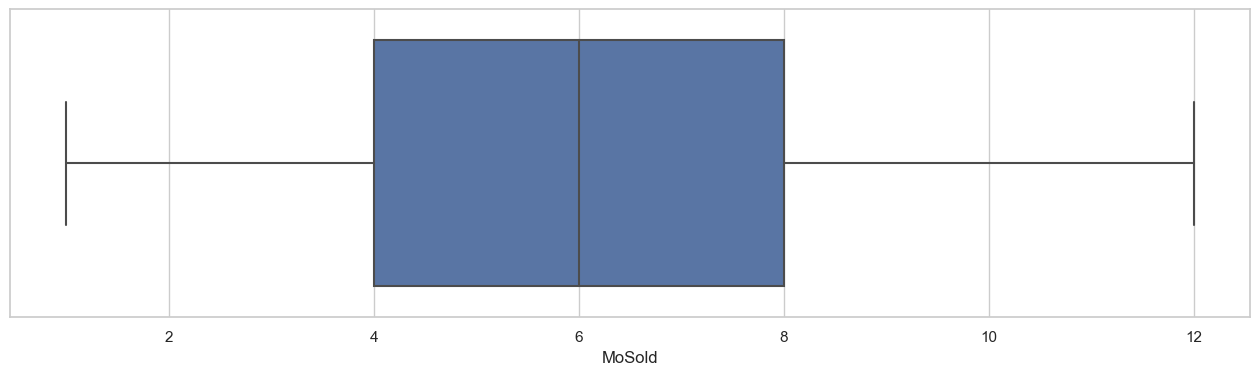

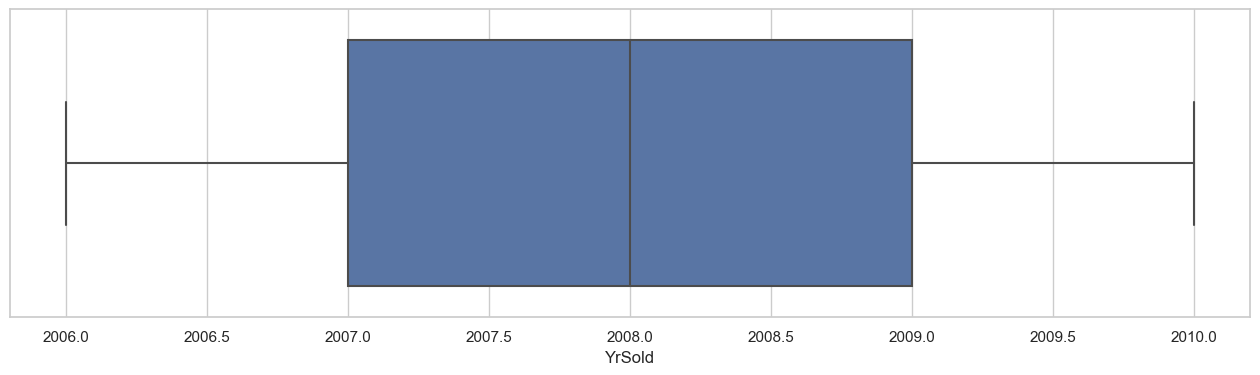

In [ ]:
numerical_df = test.select_dtypes(exclude=['object'])
#numerical_df = numerical_df.drop(["Id"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\si

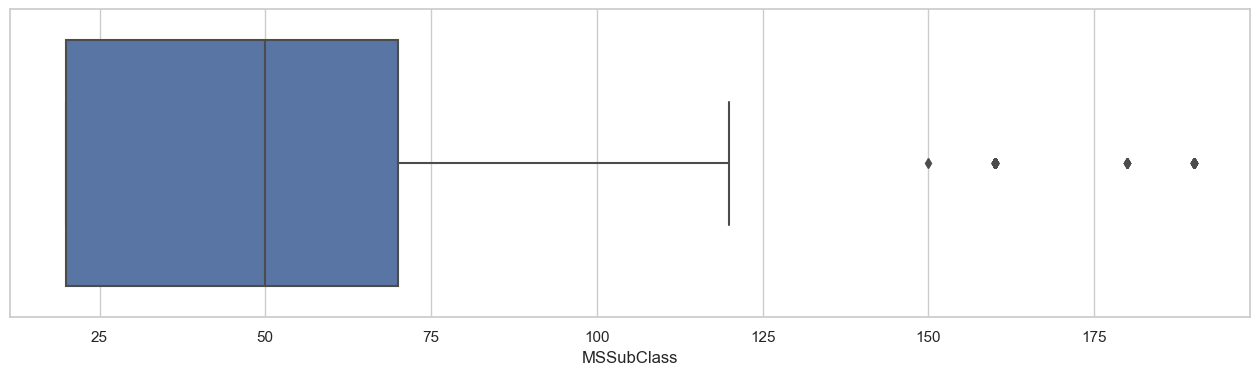

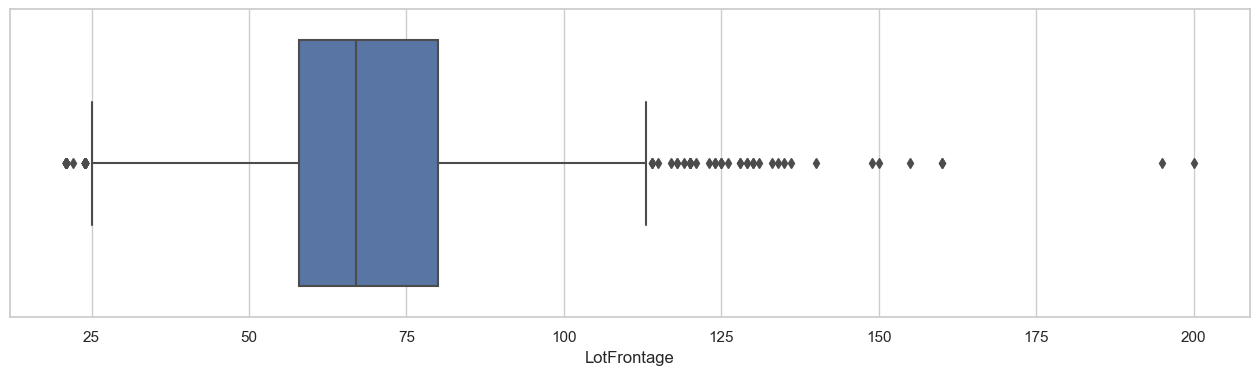

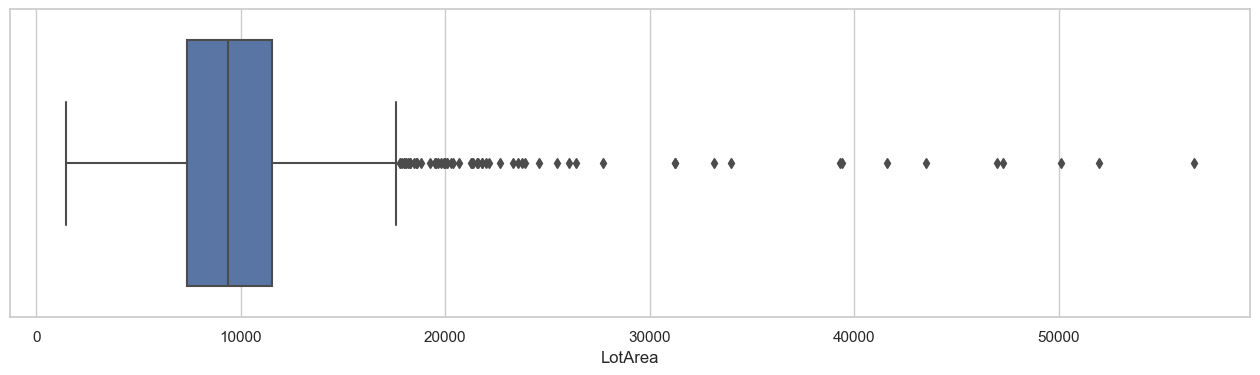

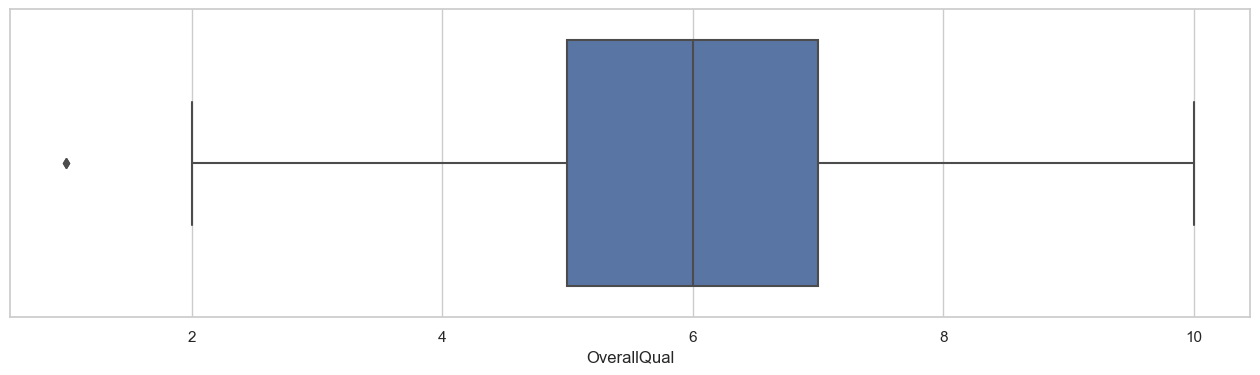

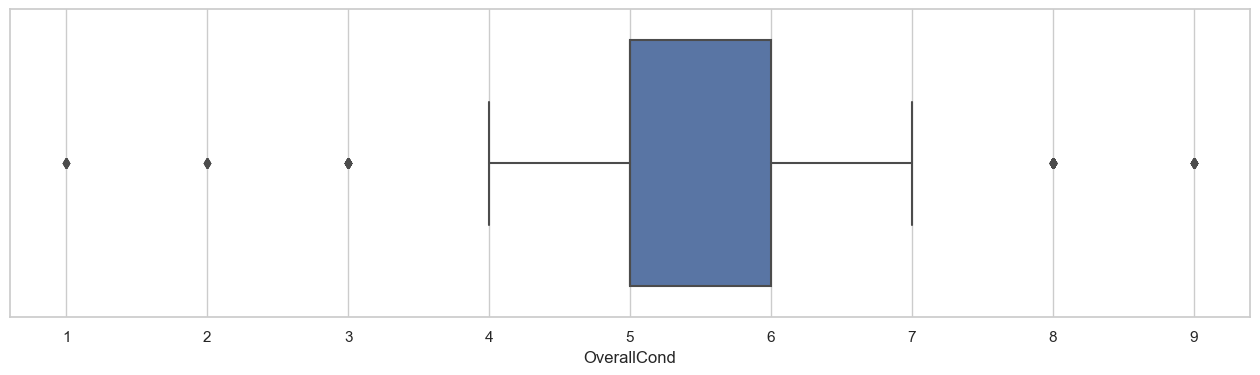

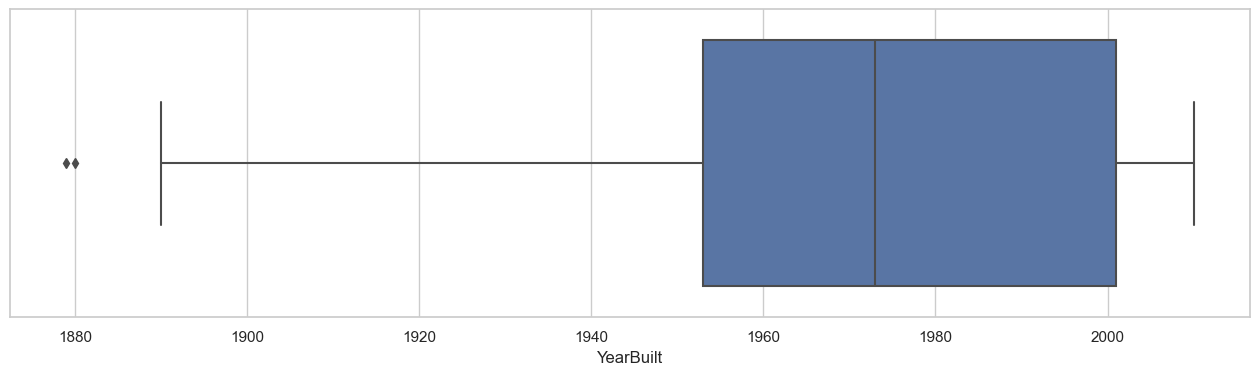

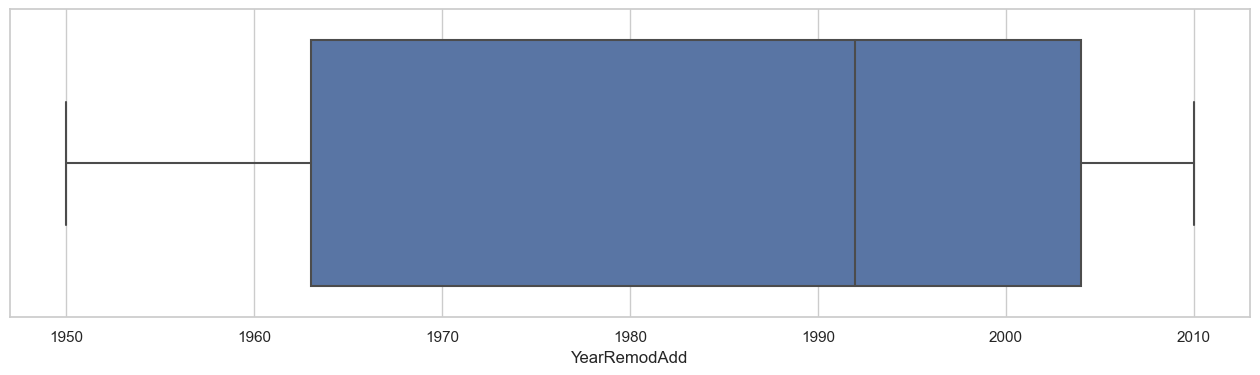

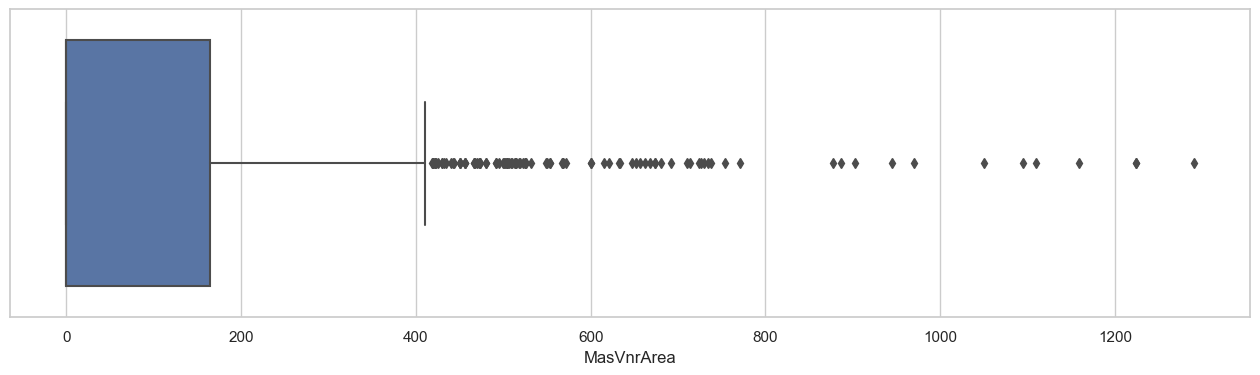

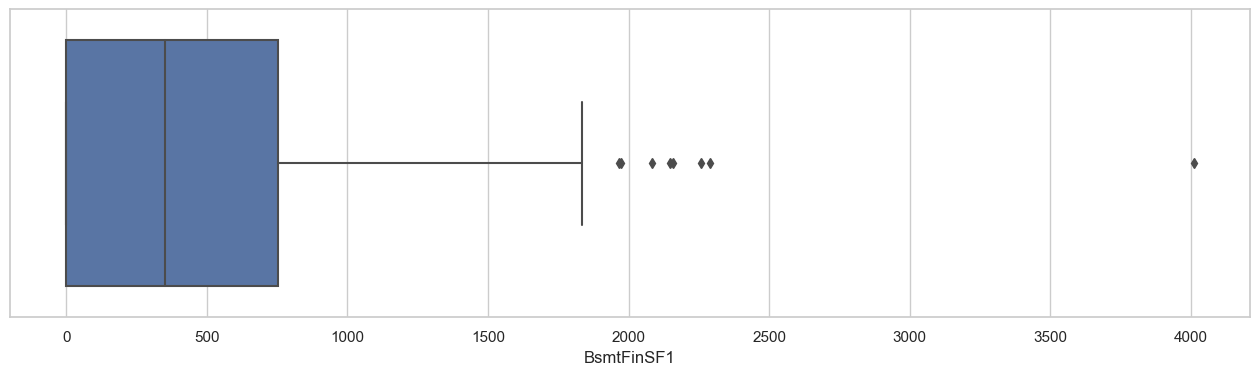

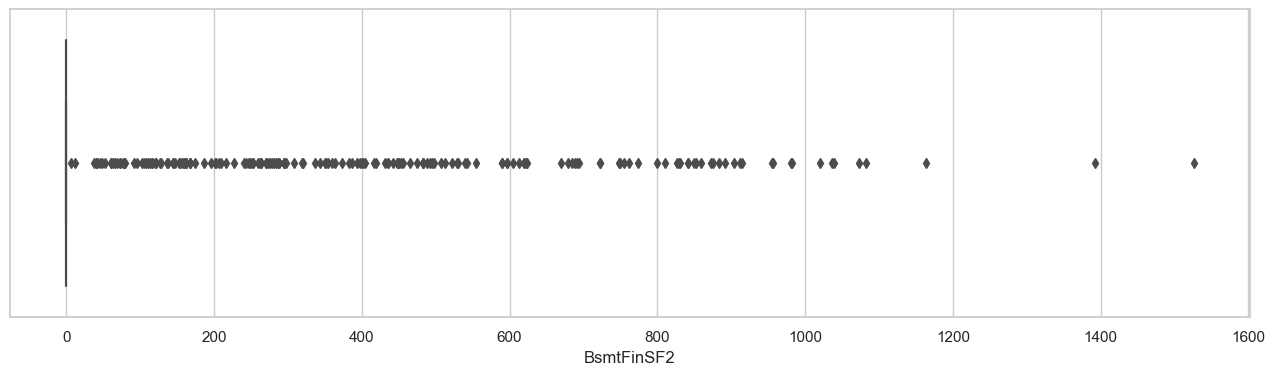

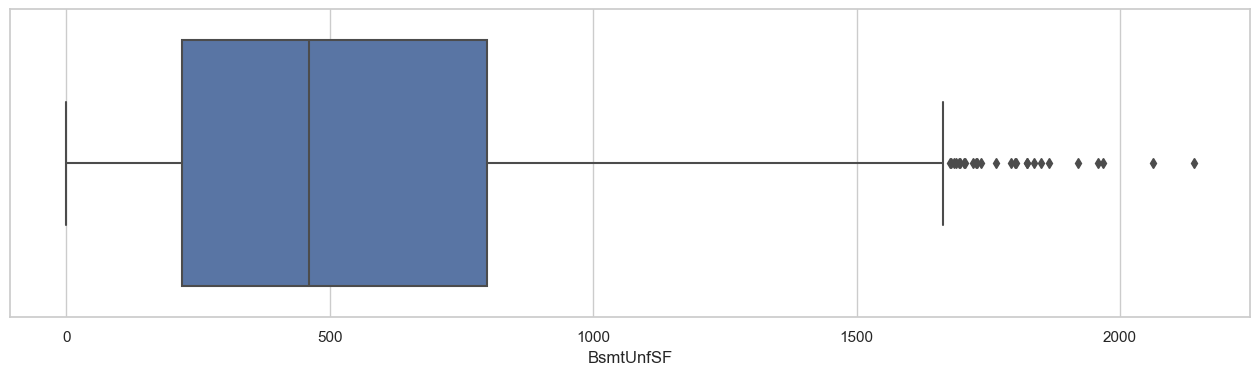

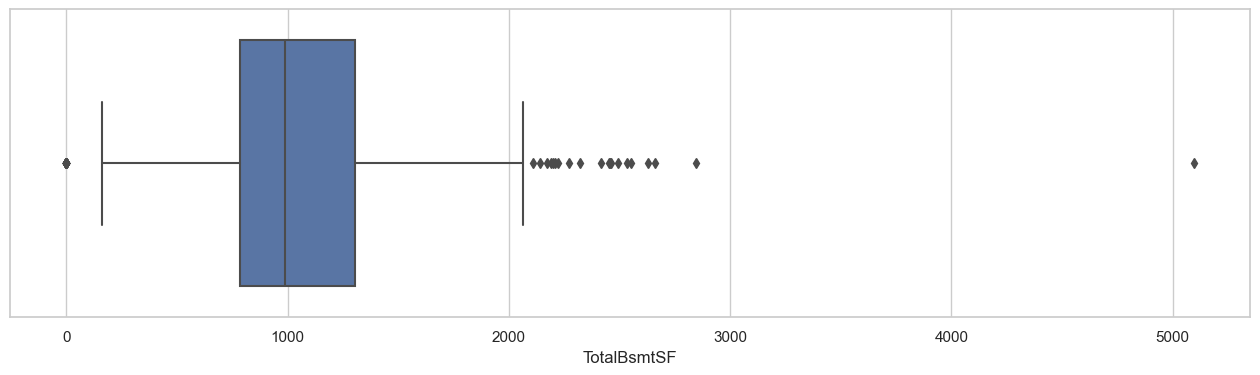

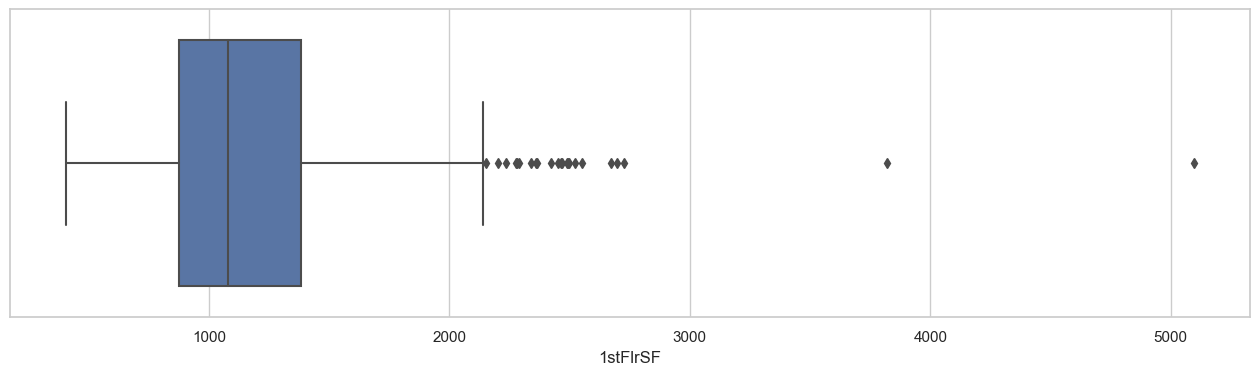

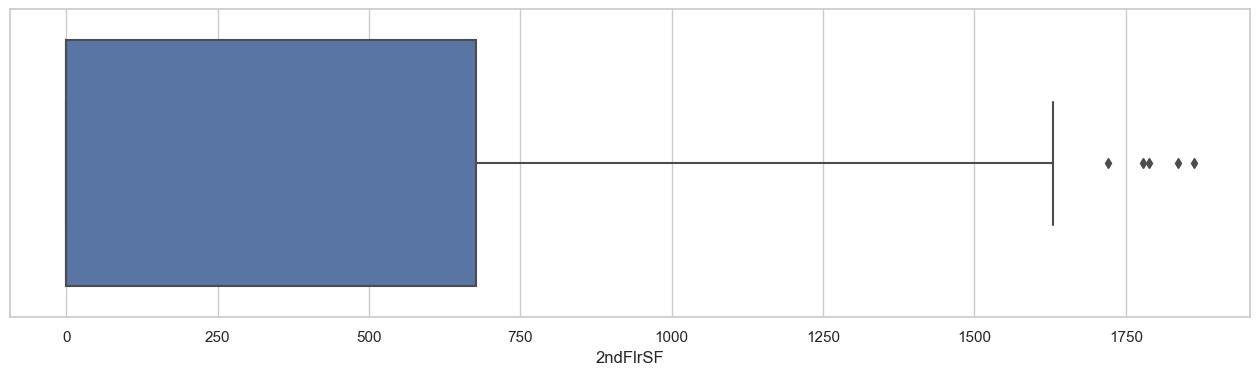

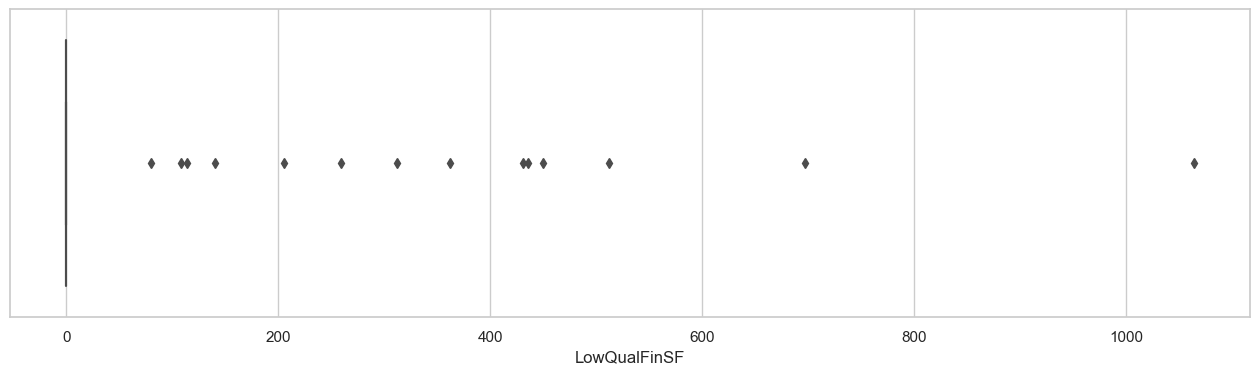

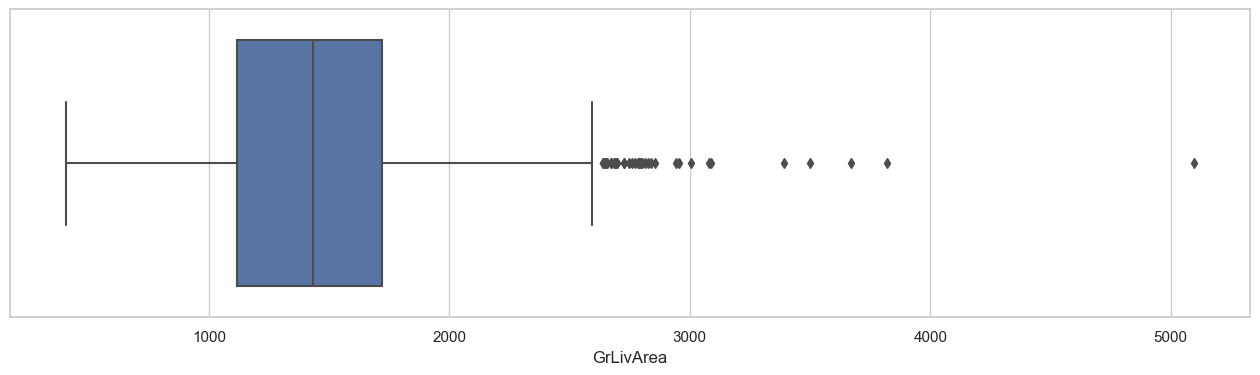

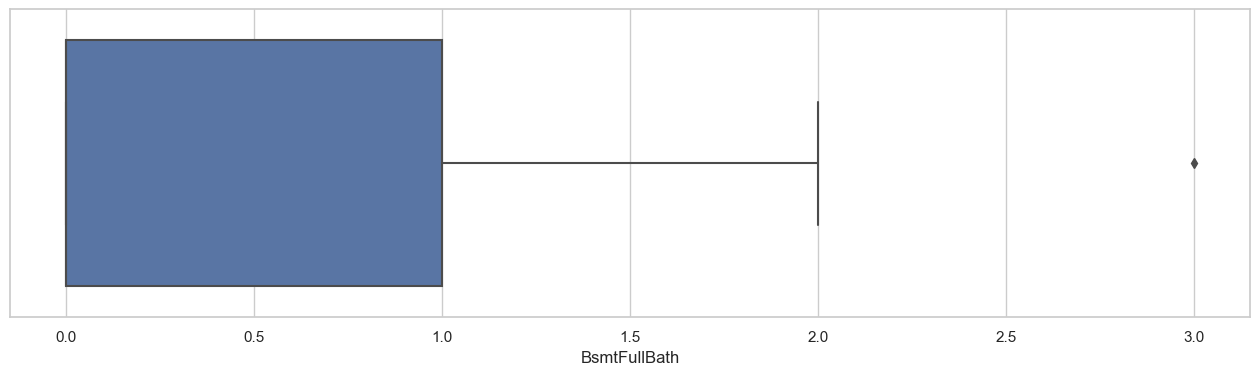

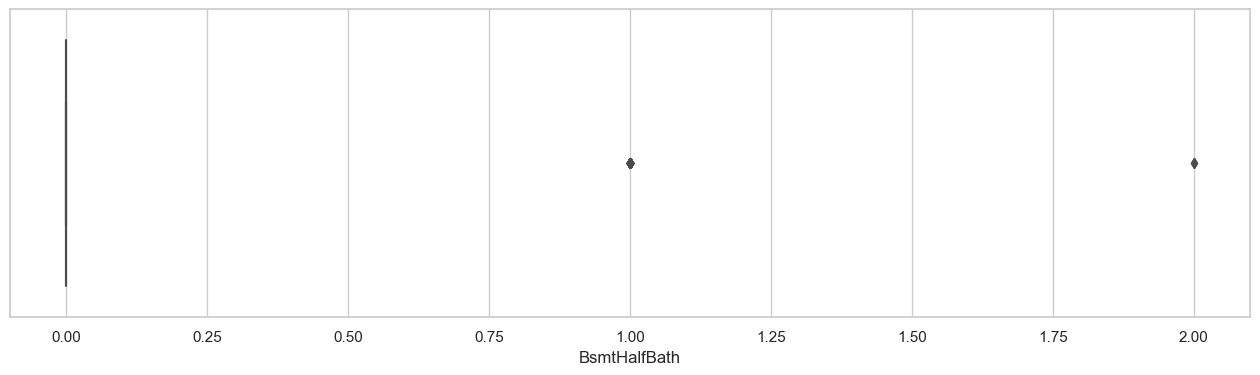

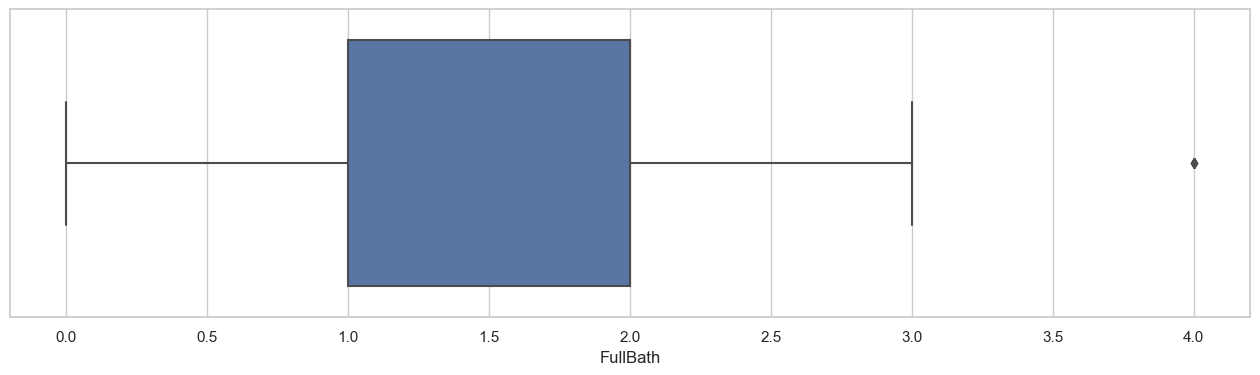

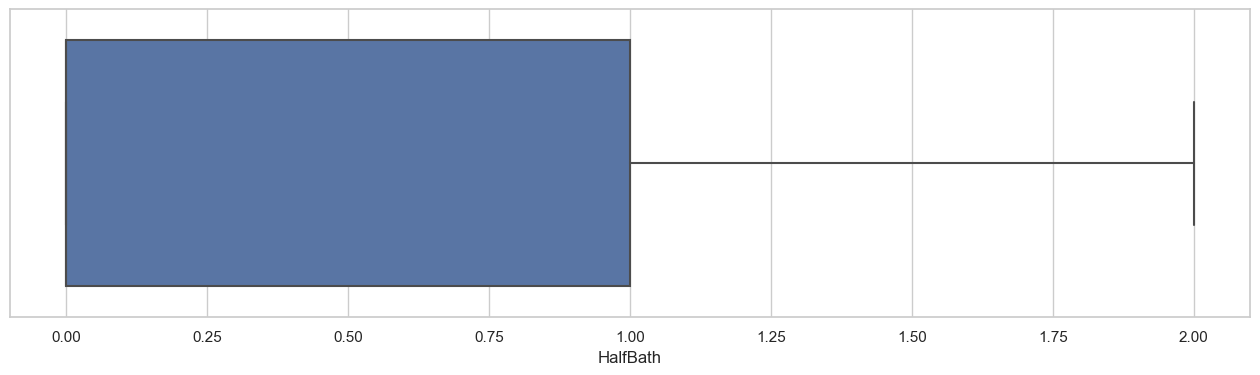

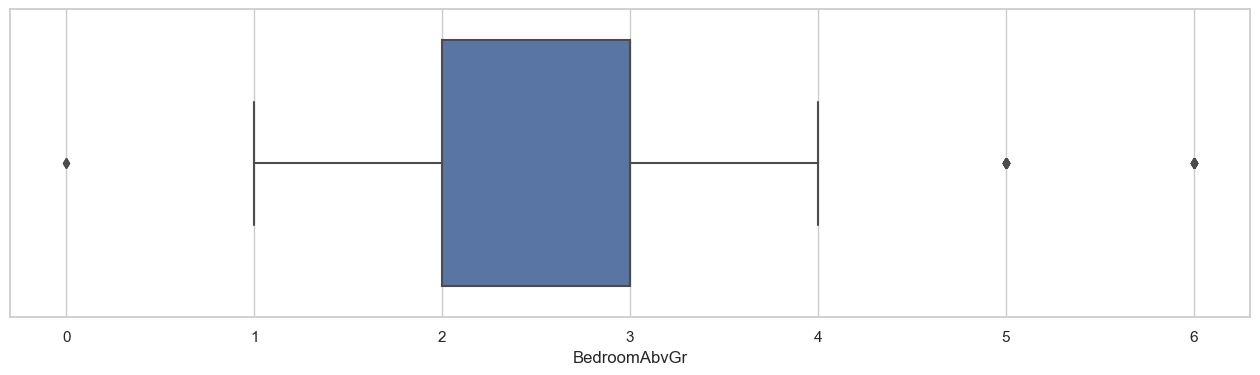

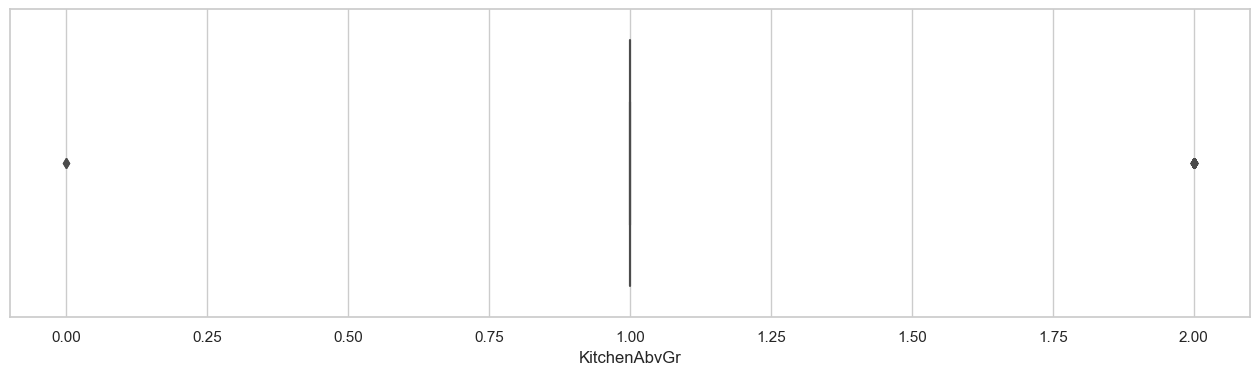

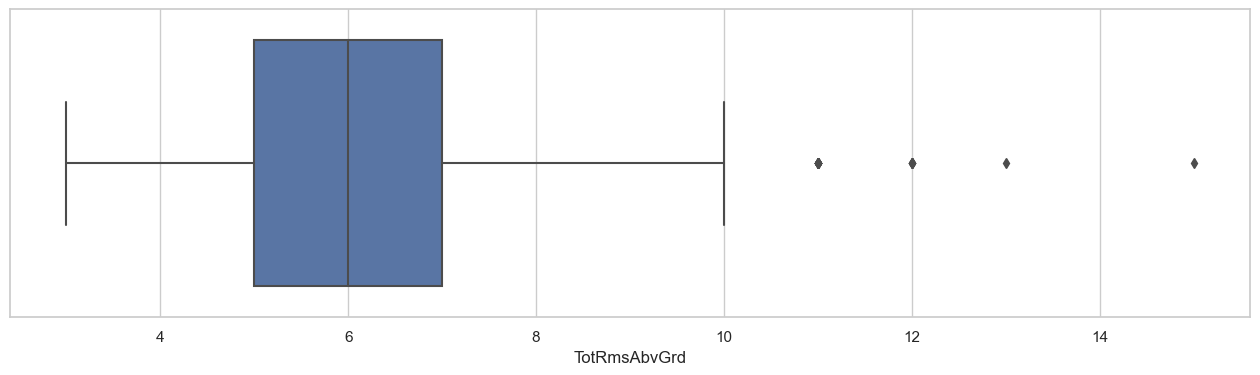

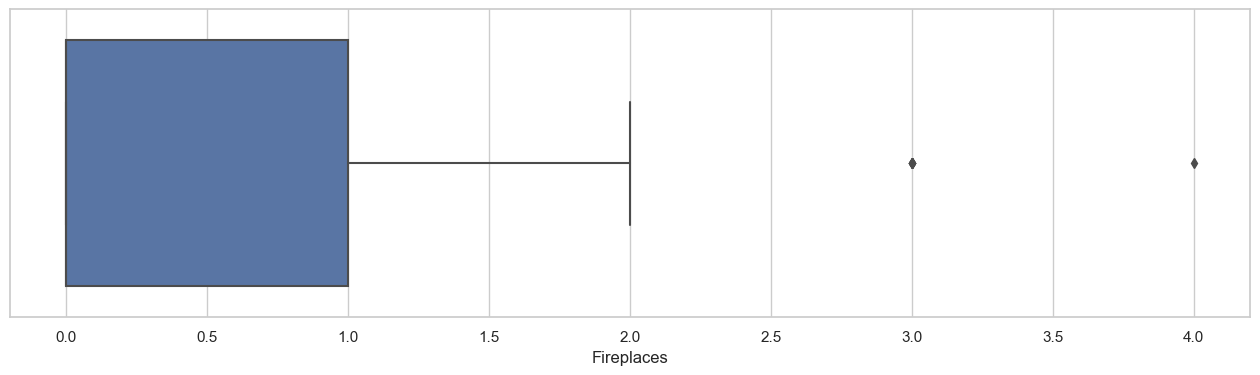

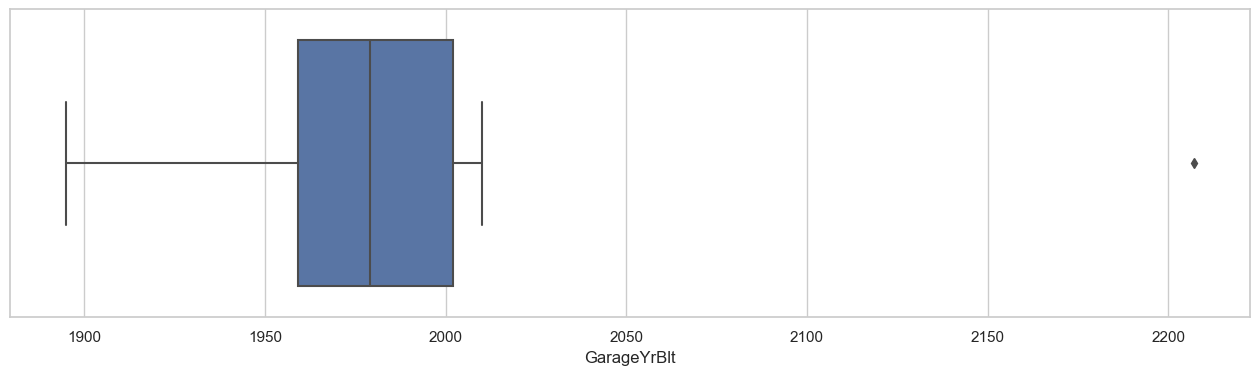

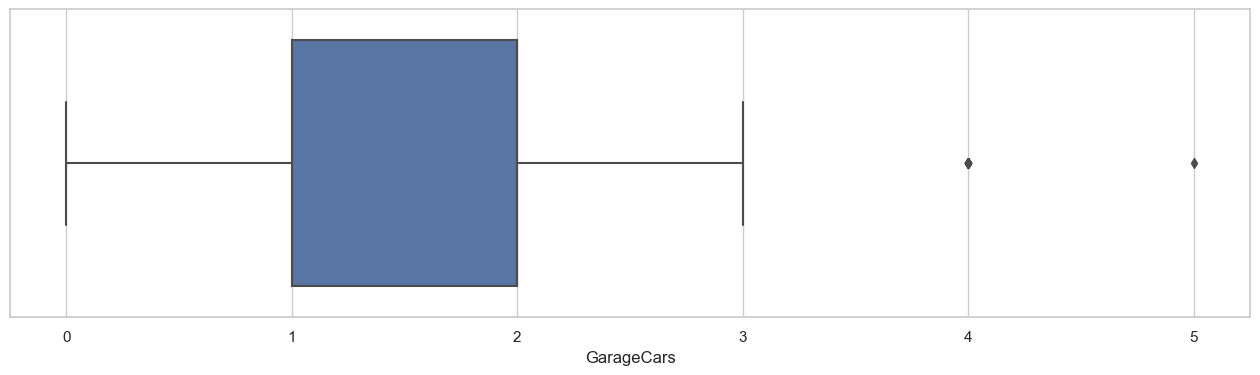

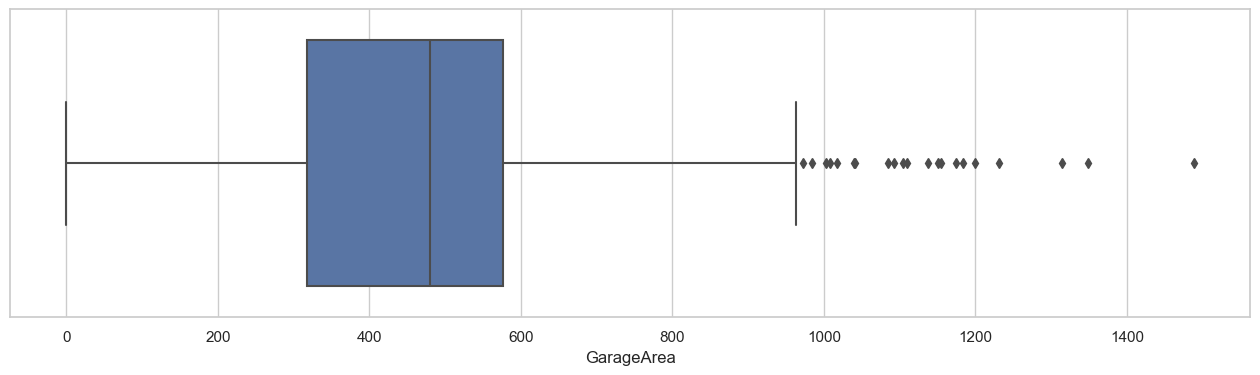

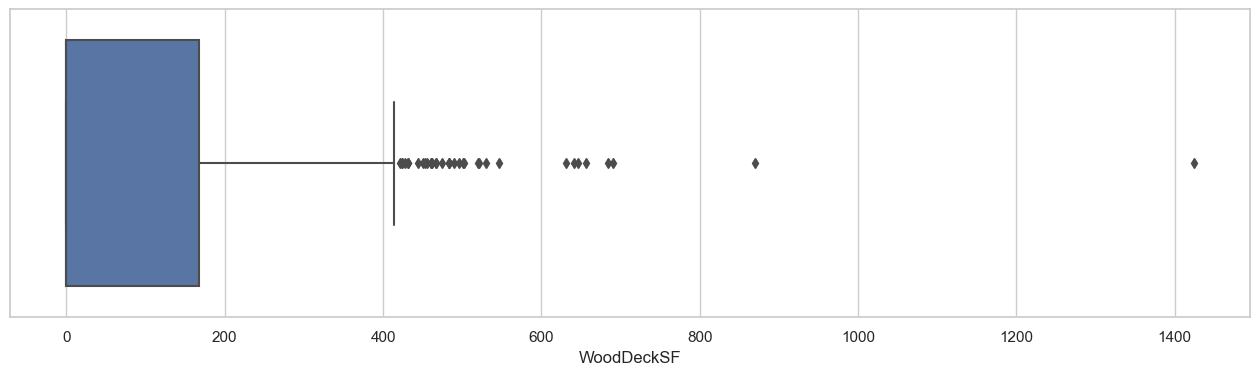

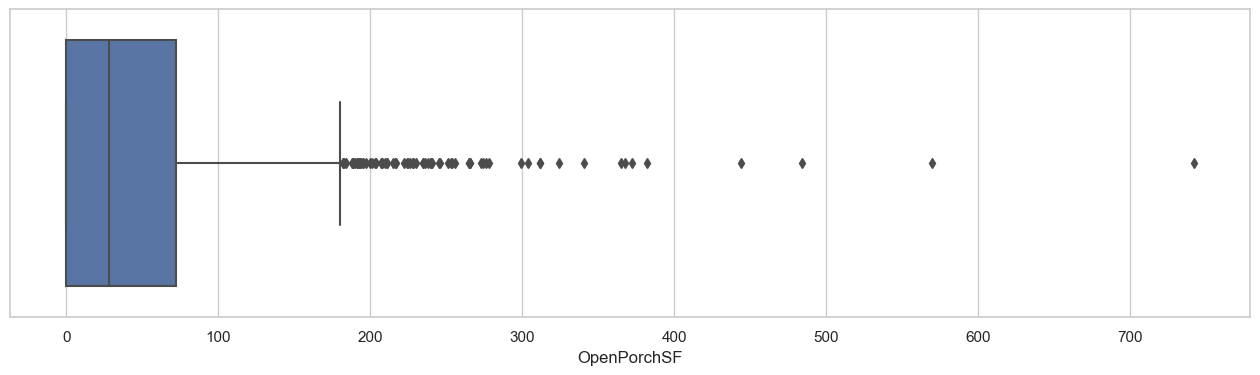

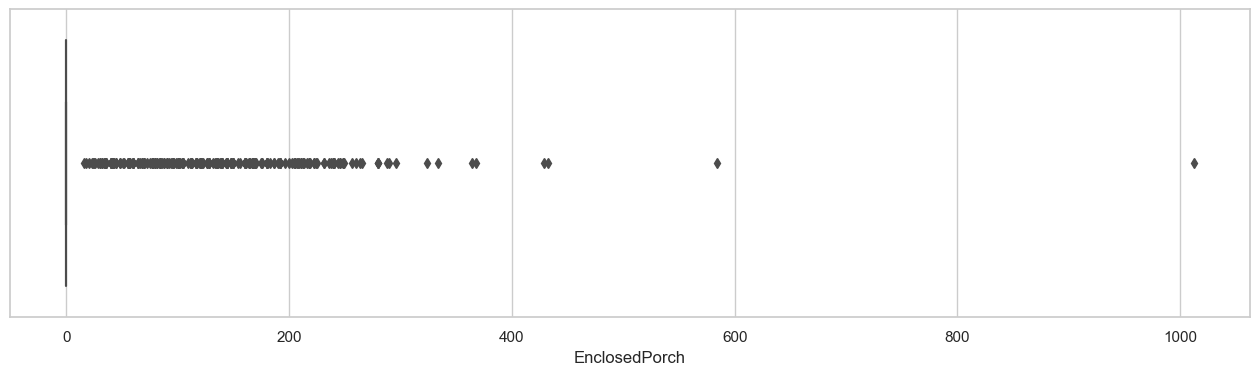

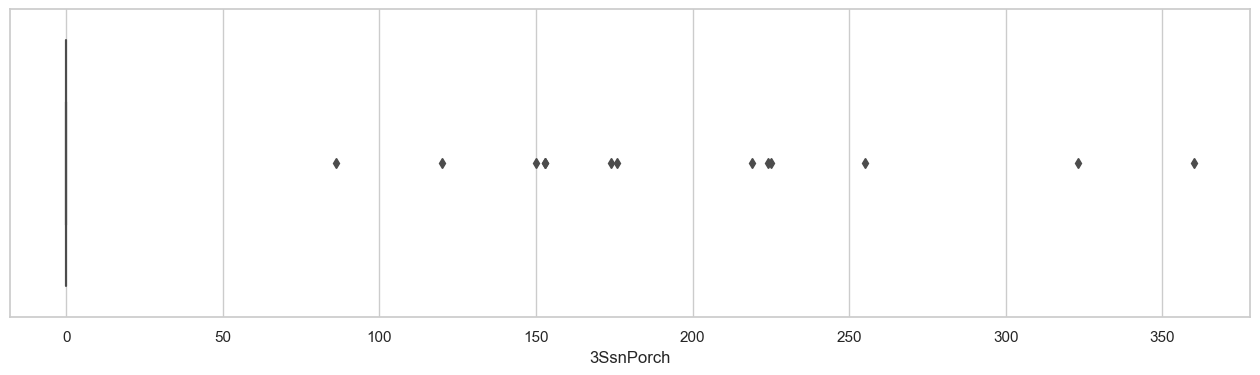

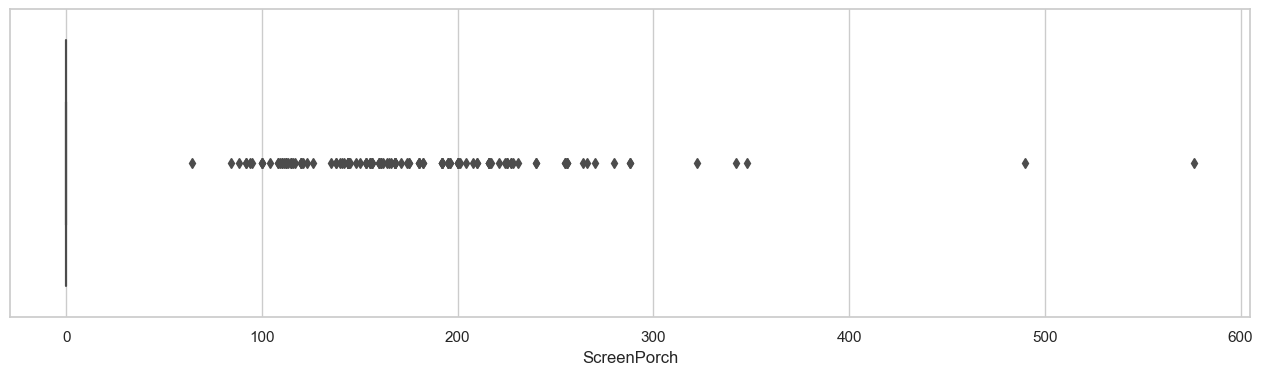

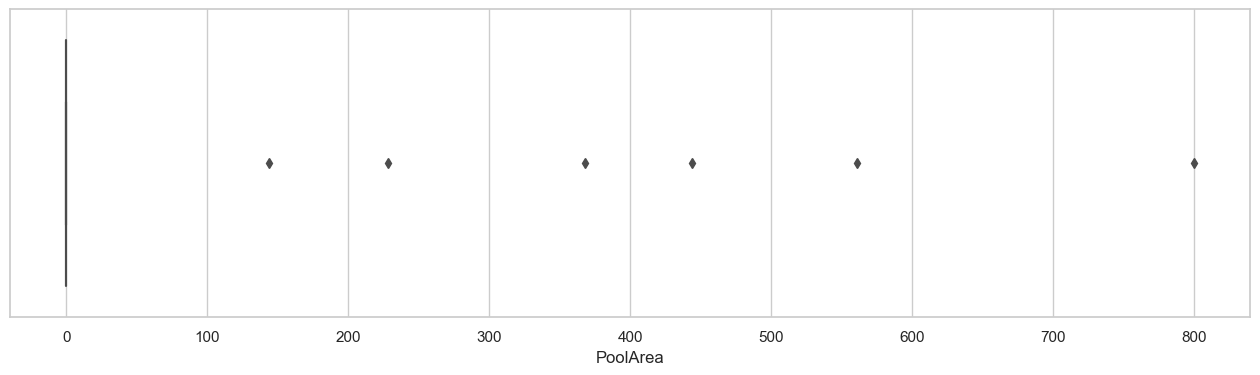

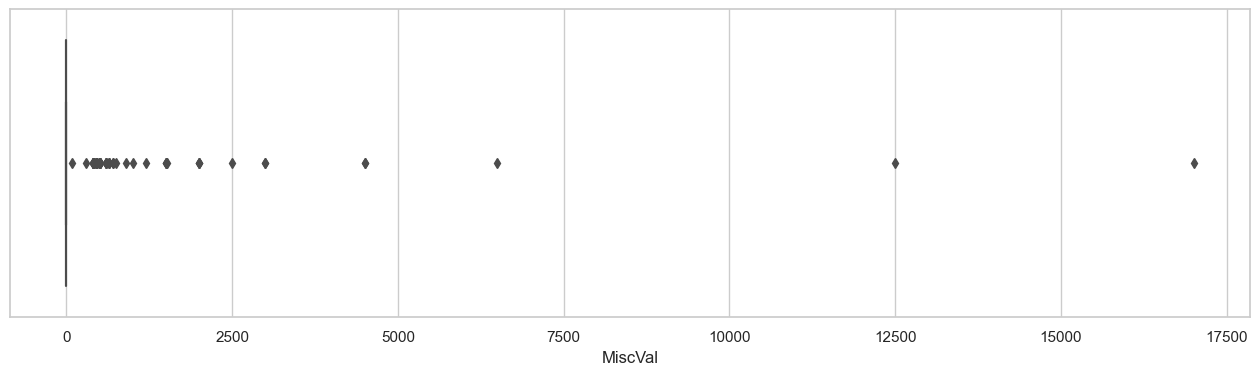

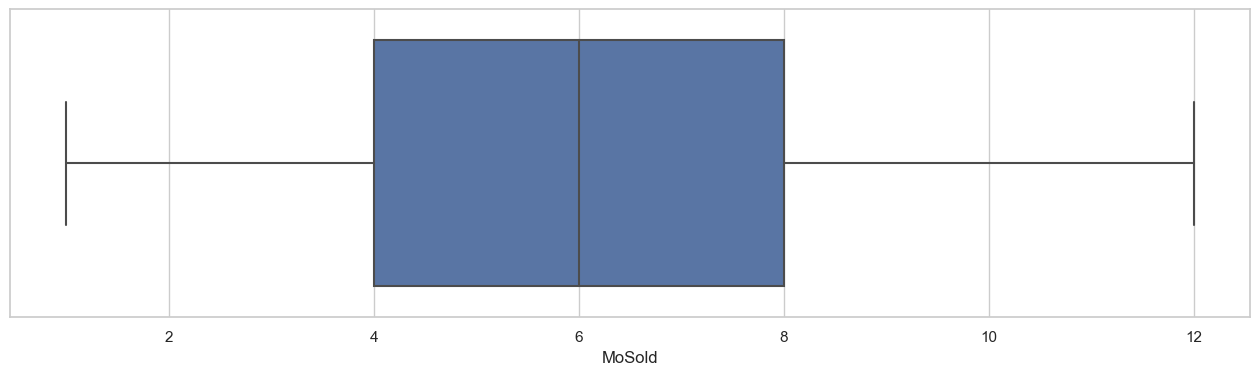

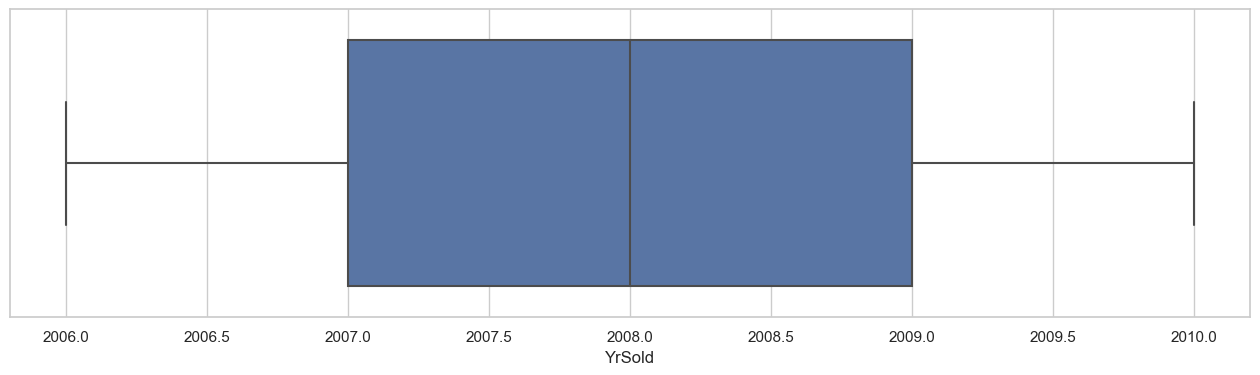

In [ ]:
numerical_df = test.select_dtypes(exclude=['object'])
#numerical_df = numerical_df.drop(["Id"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\si

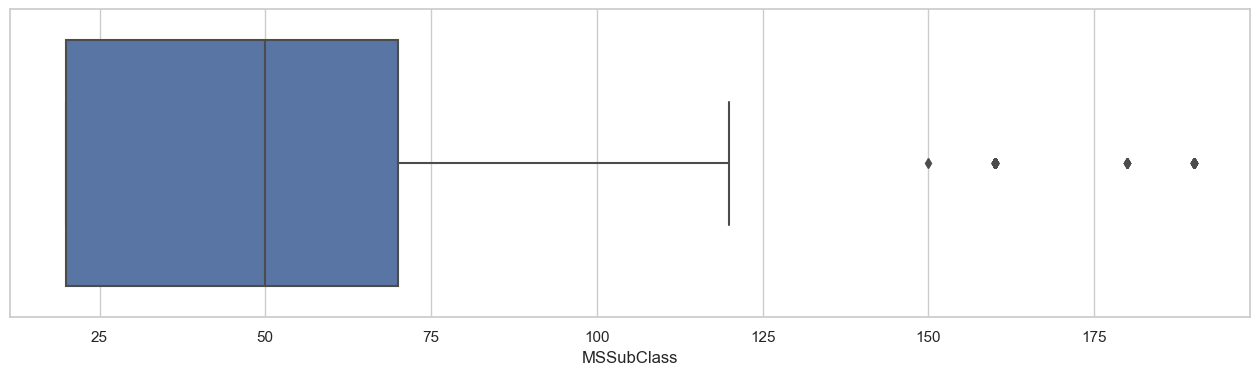

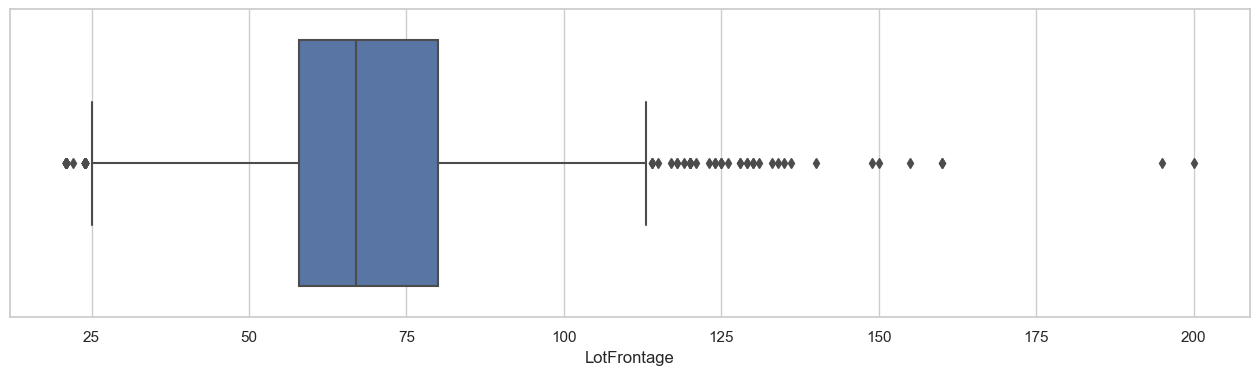

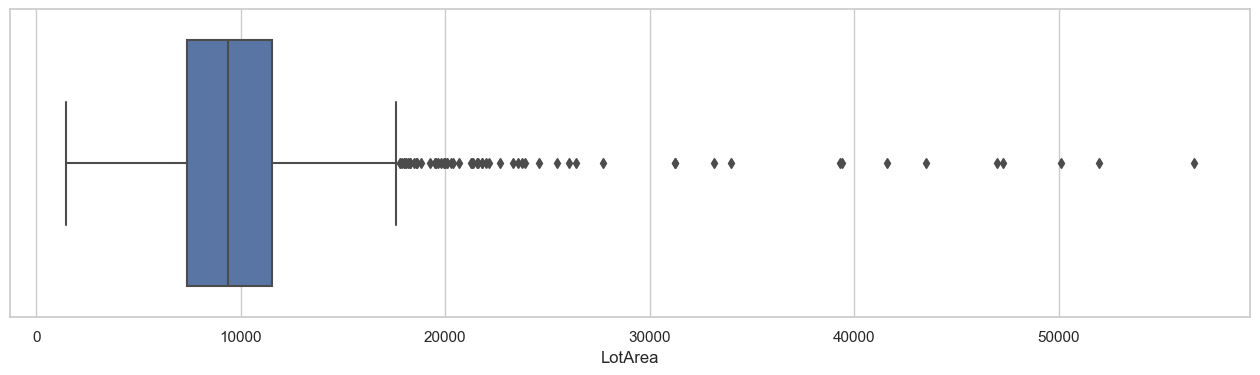

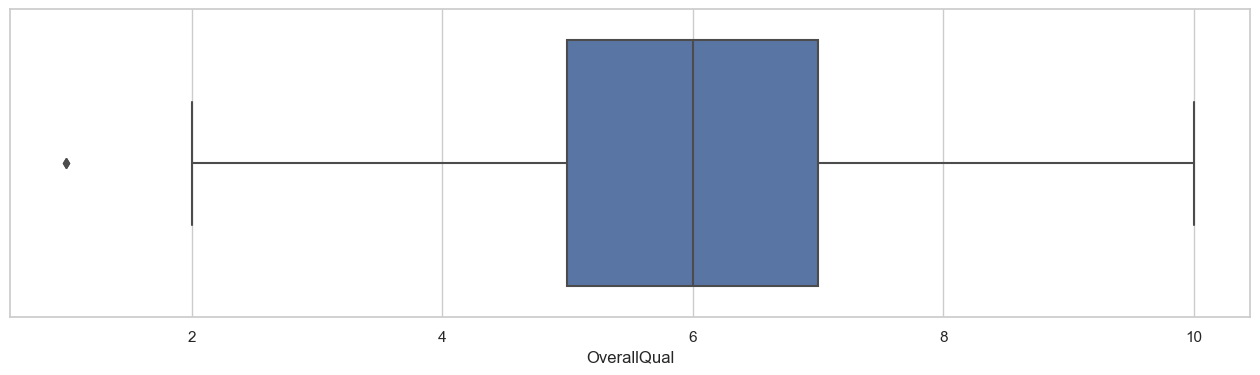

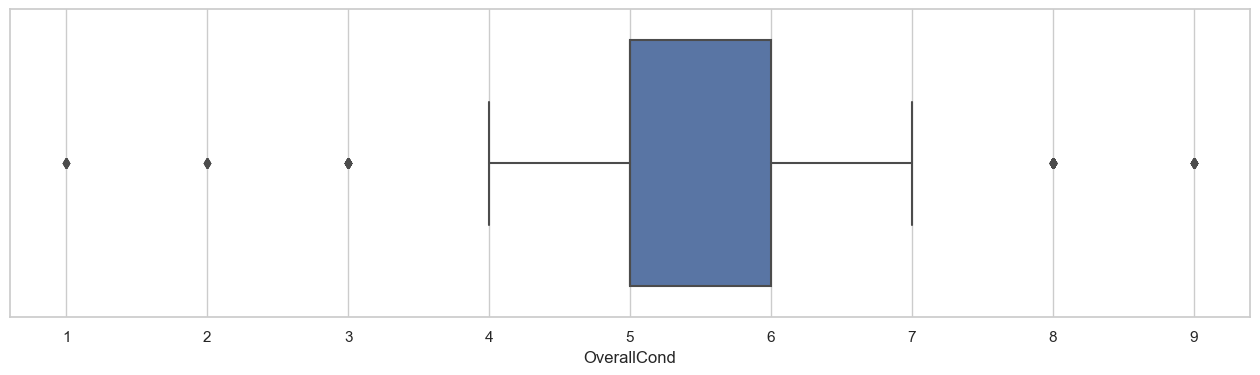

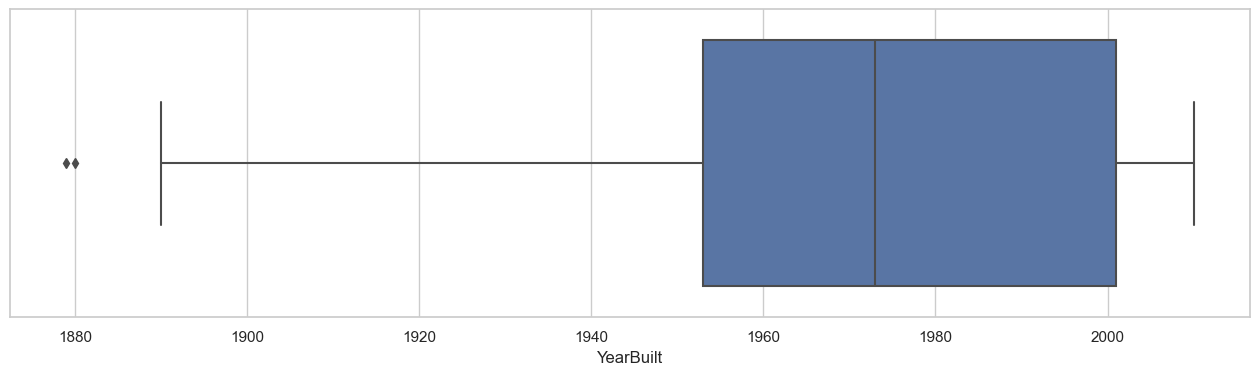

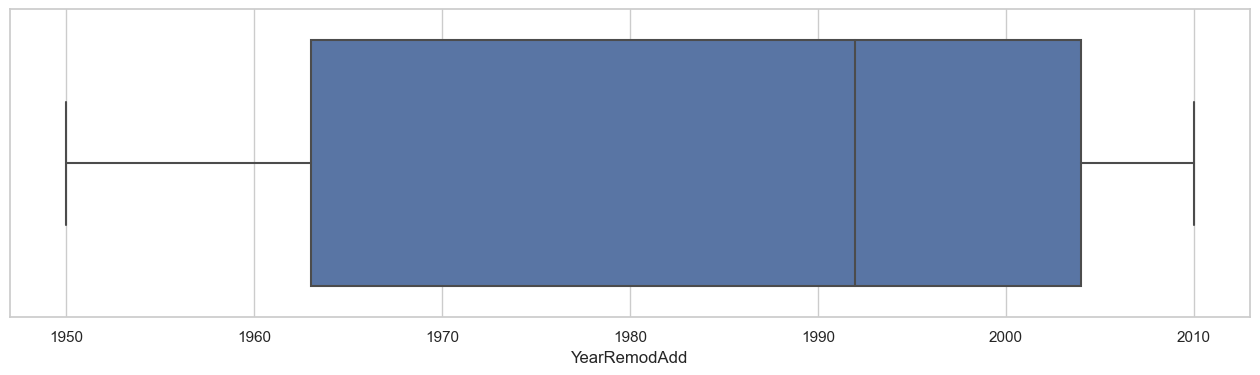

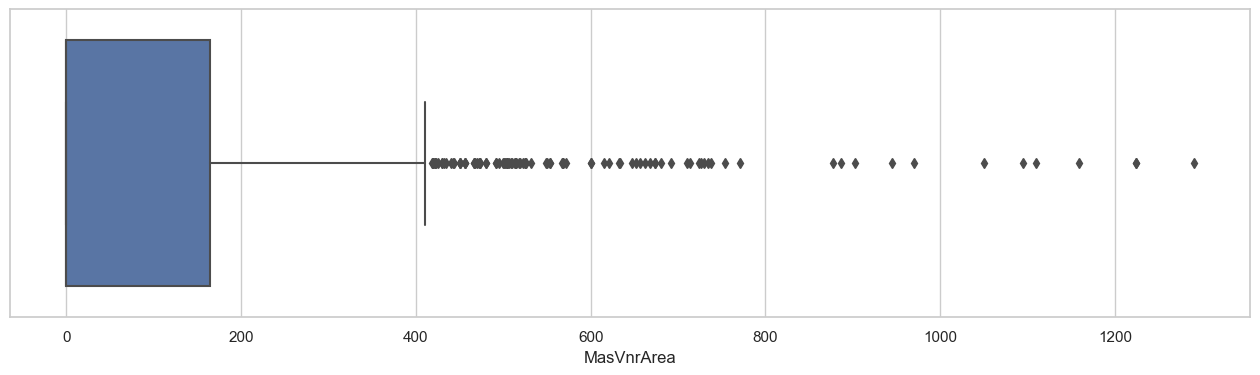

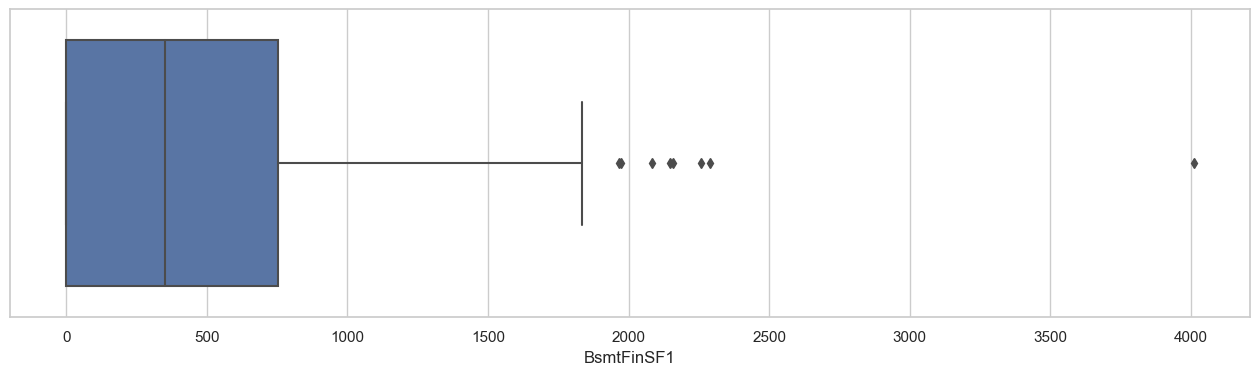

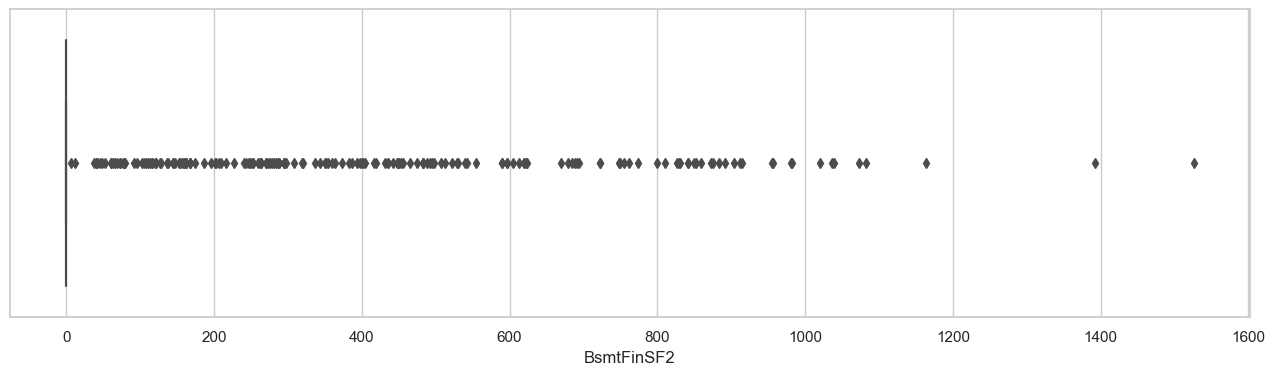

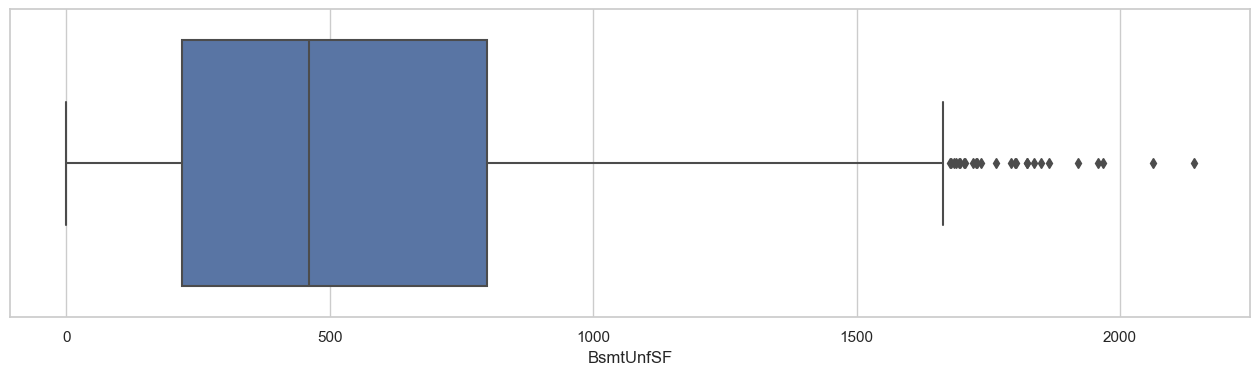

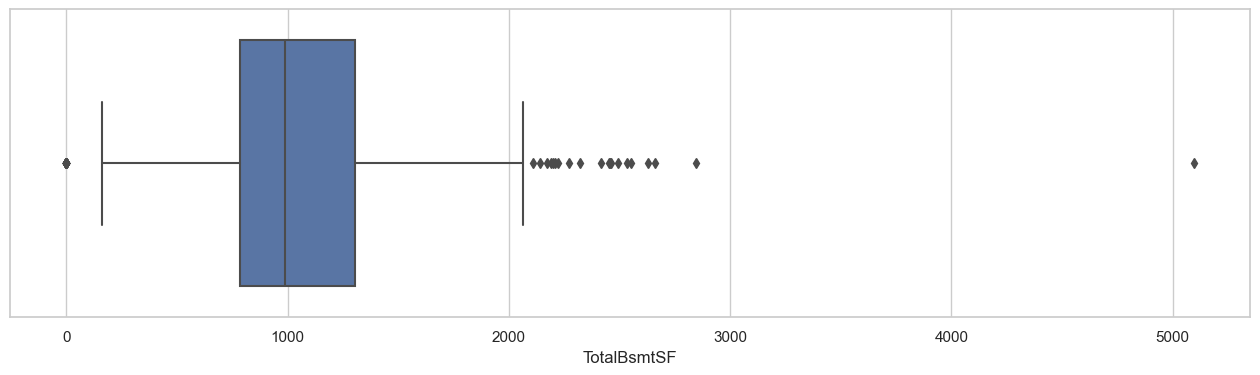

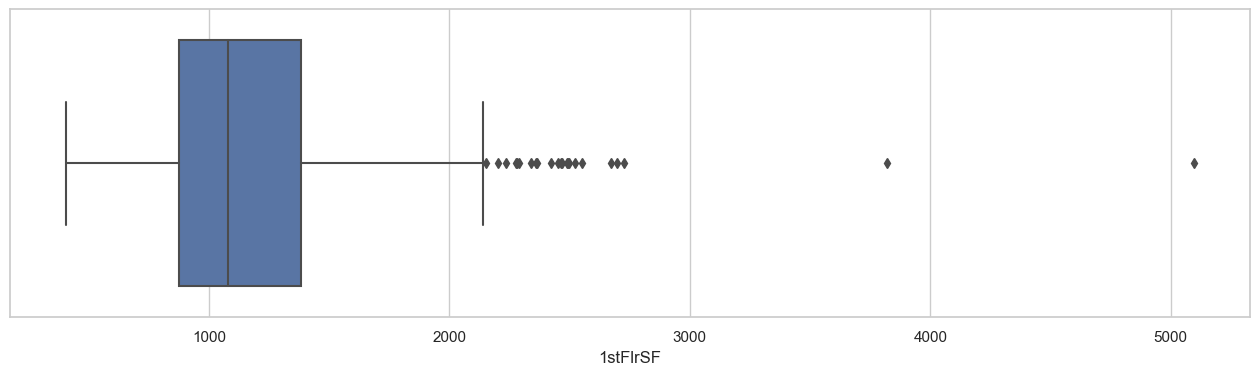

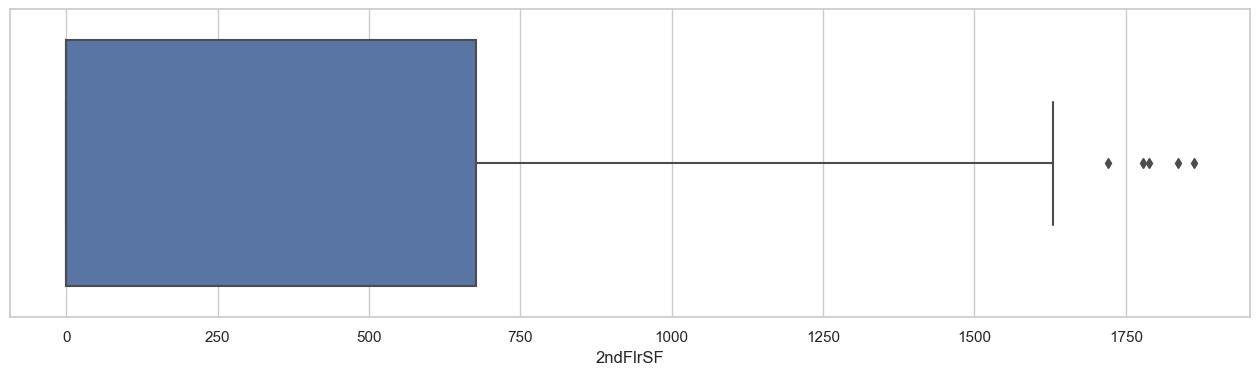

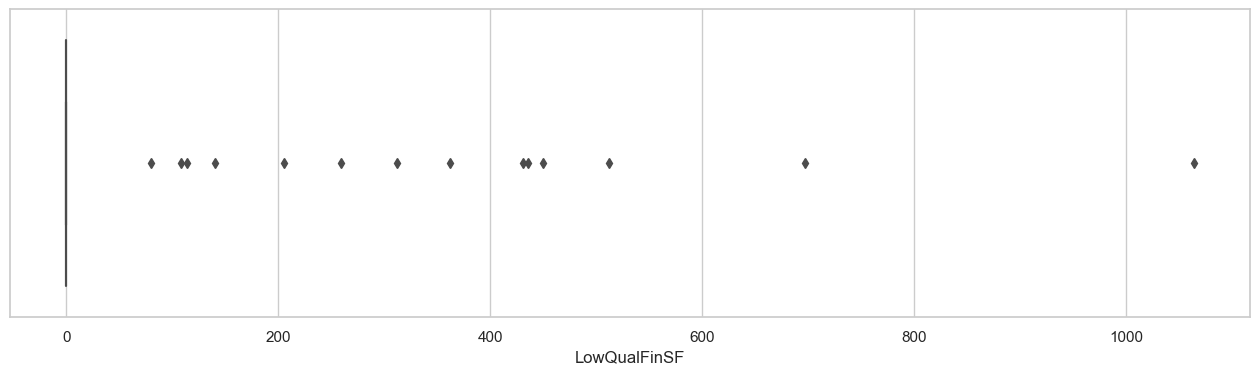

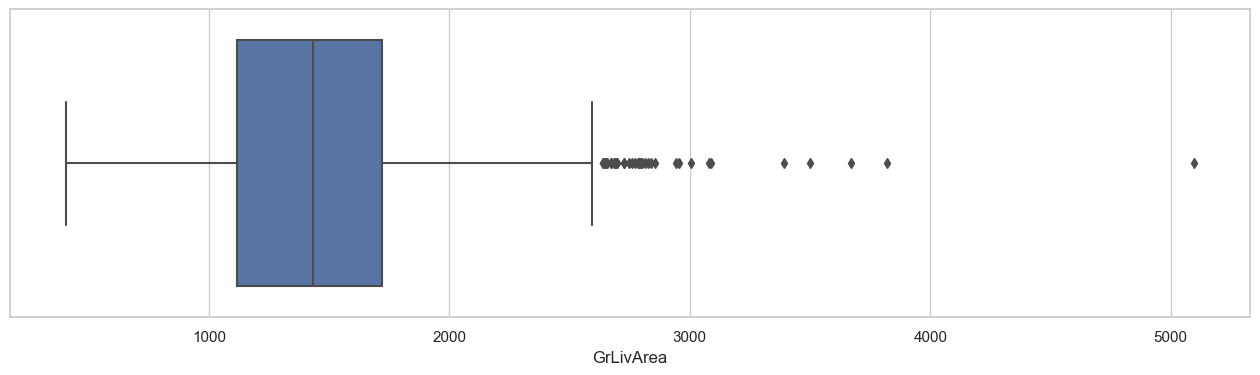

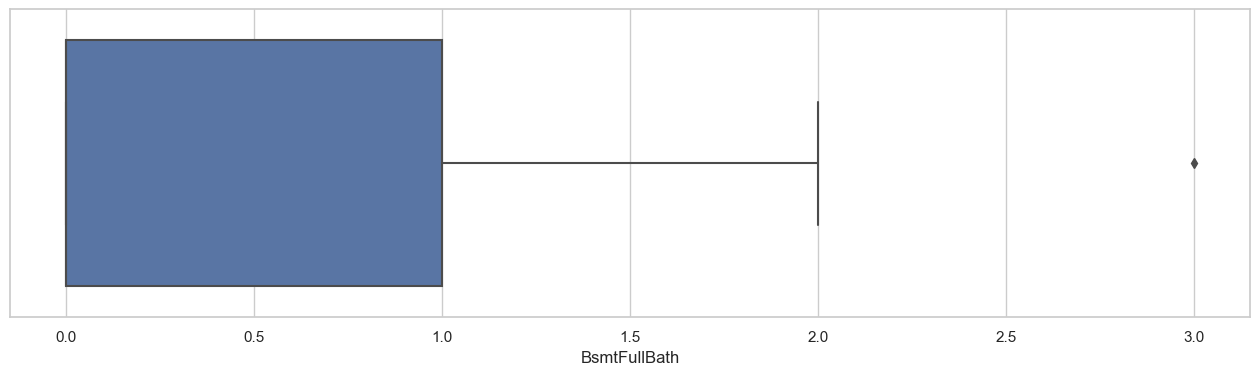

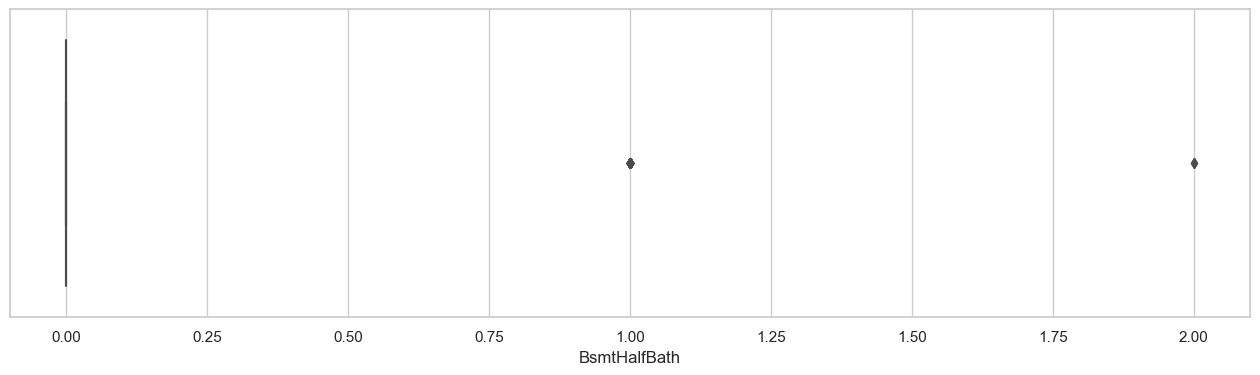

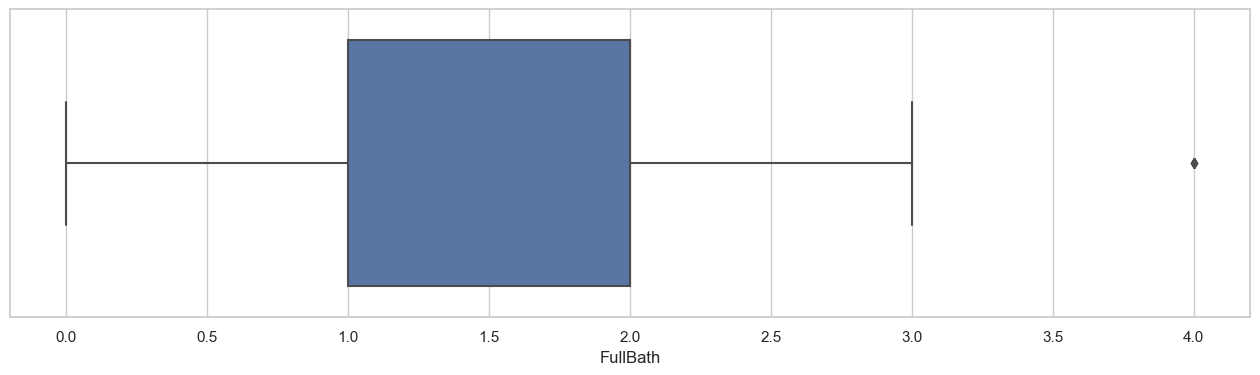

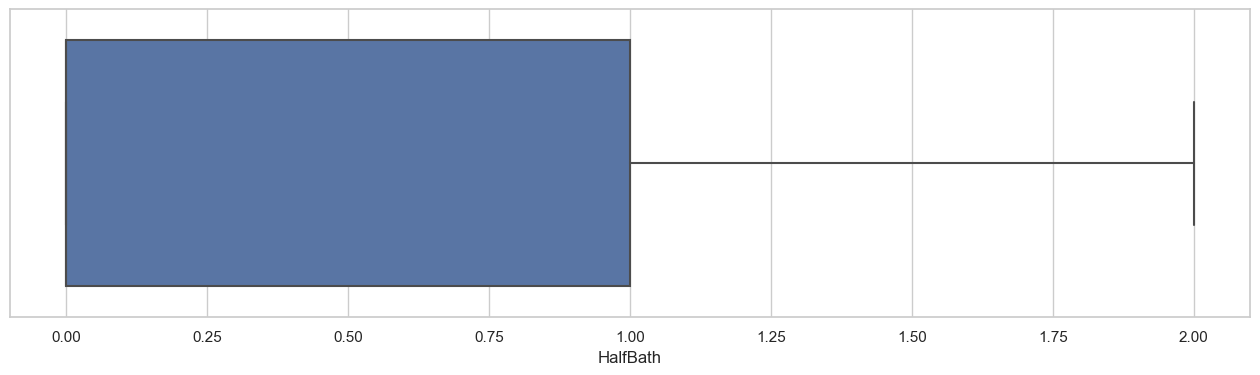

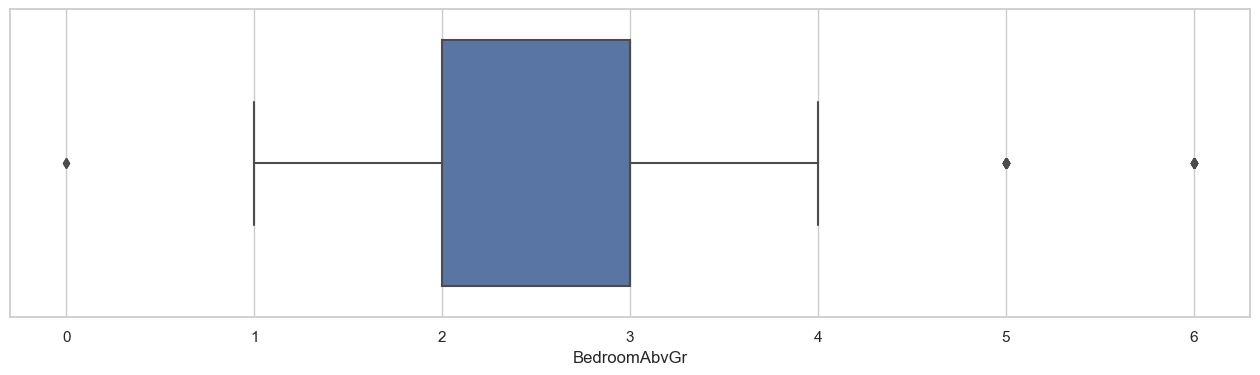

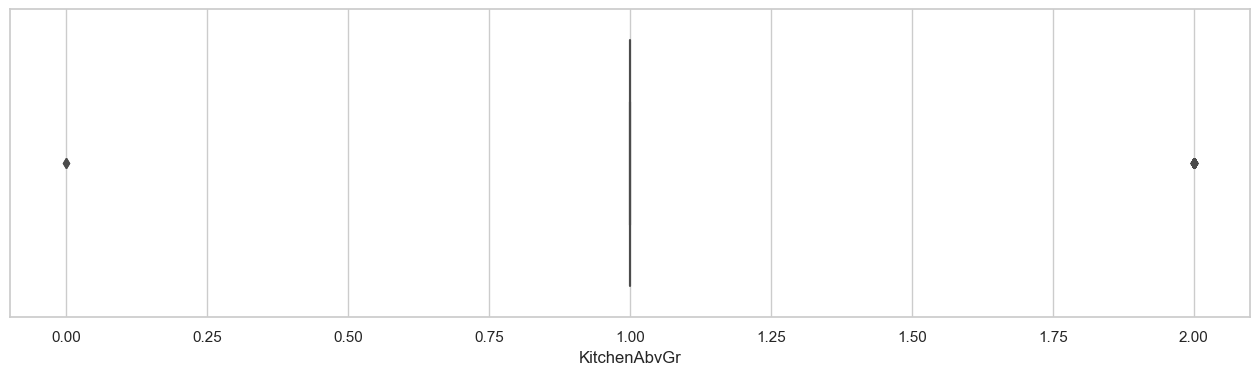

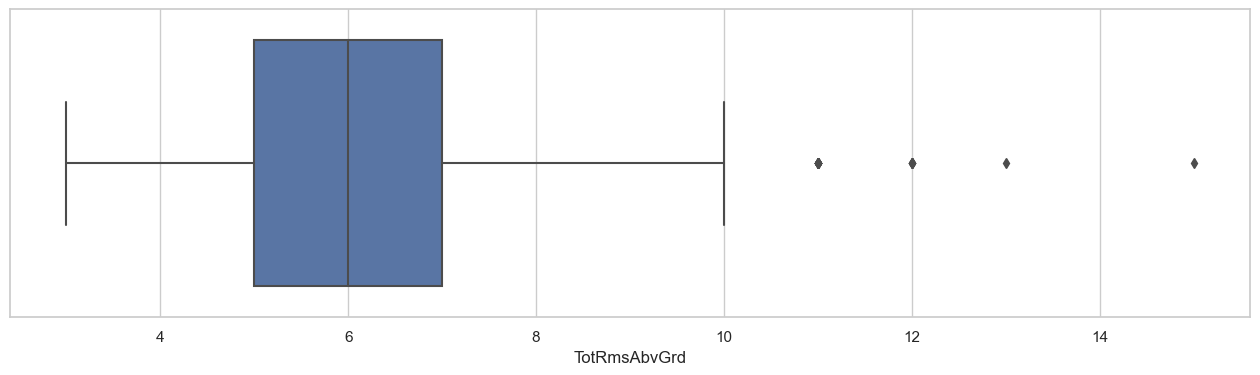

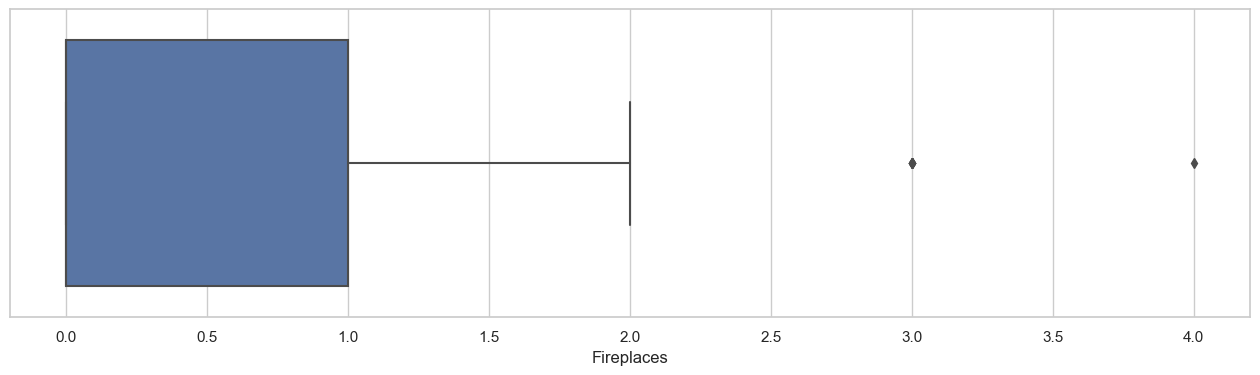

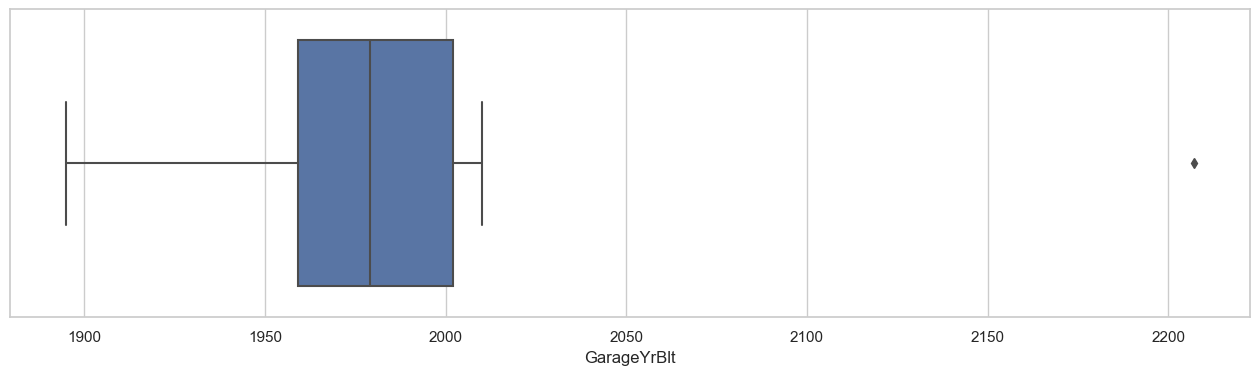

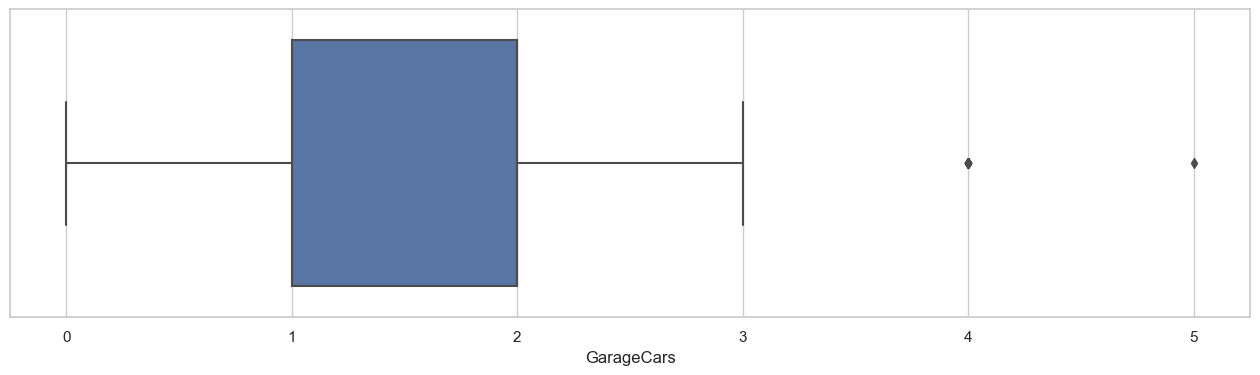

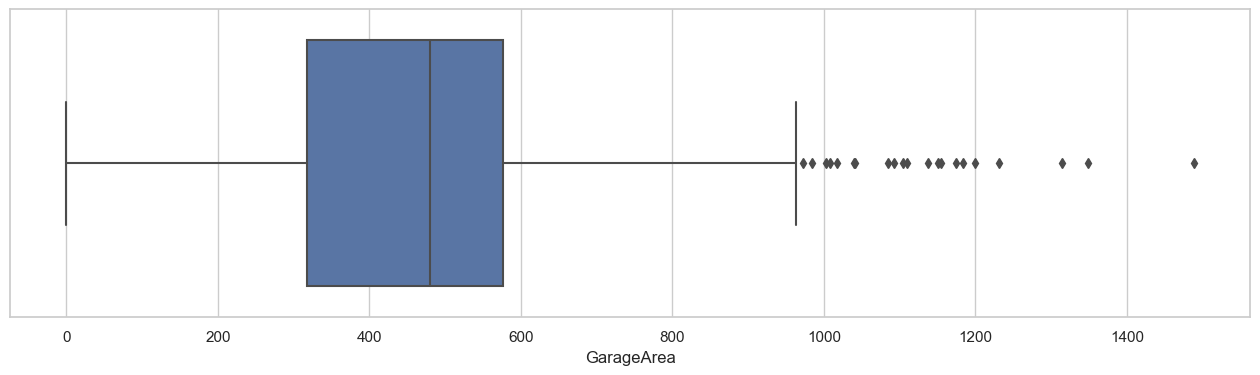

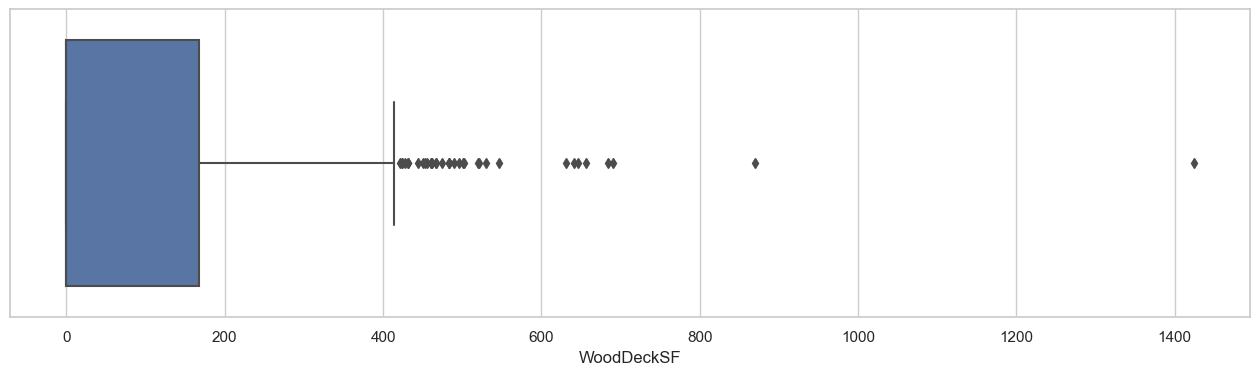

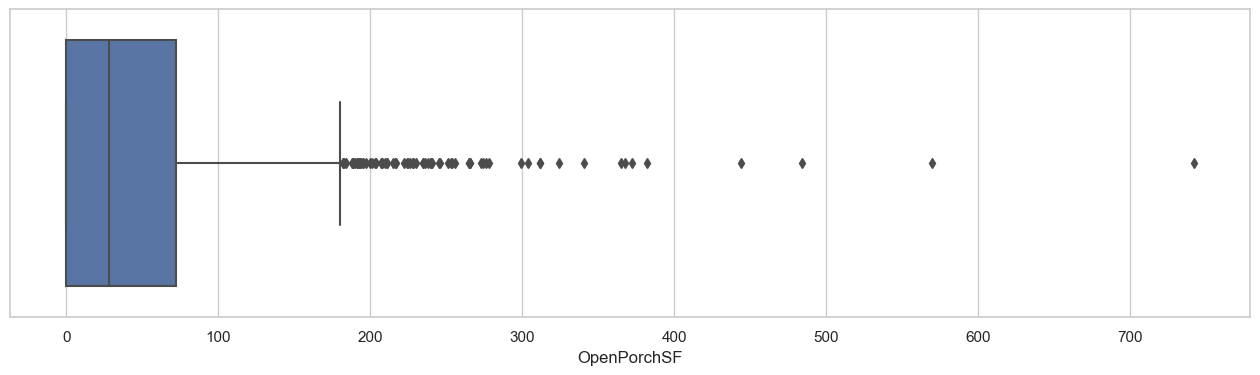

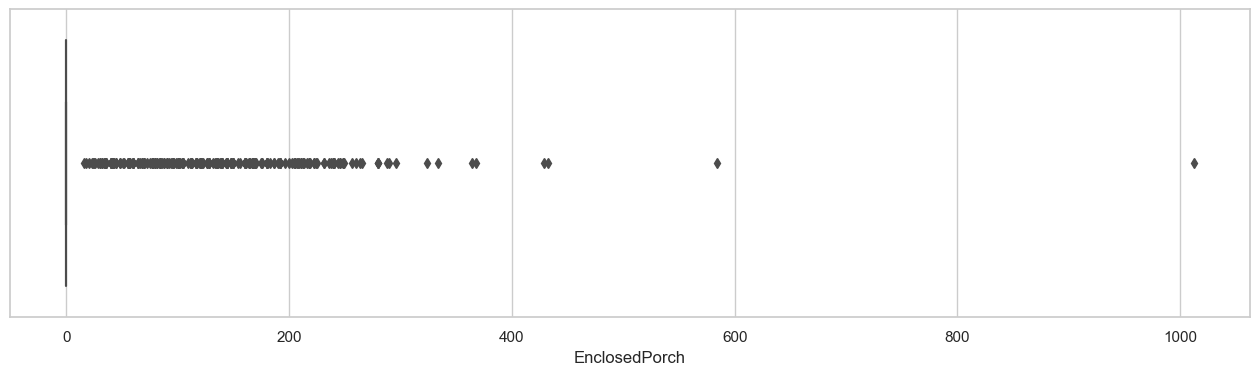

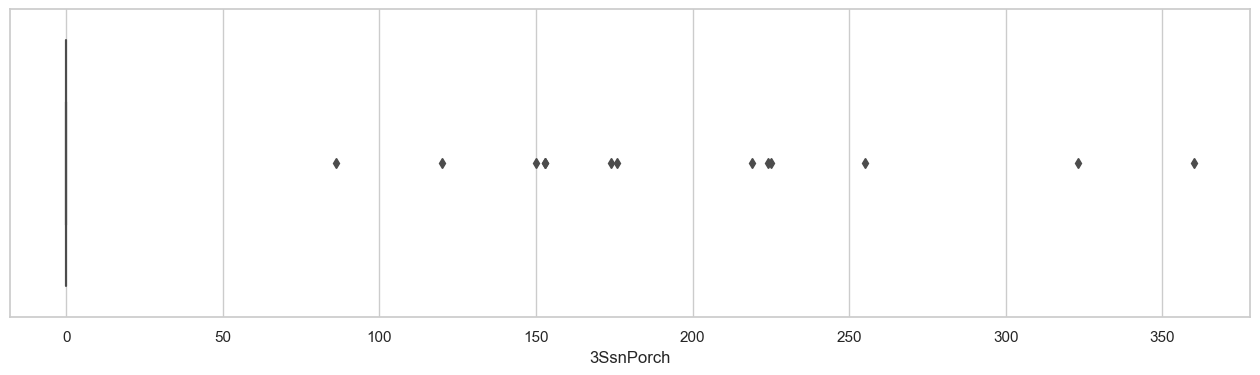

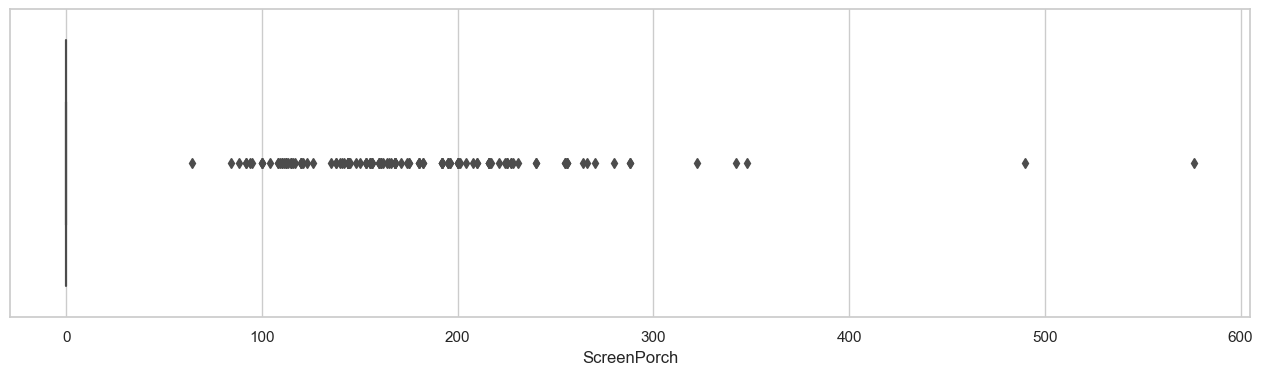

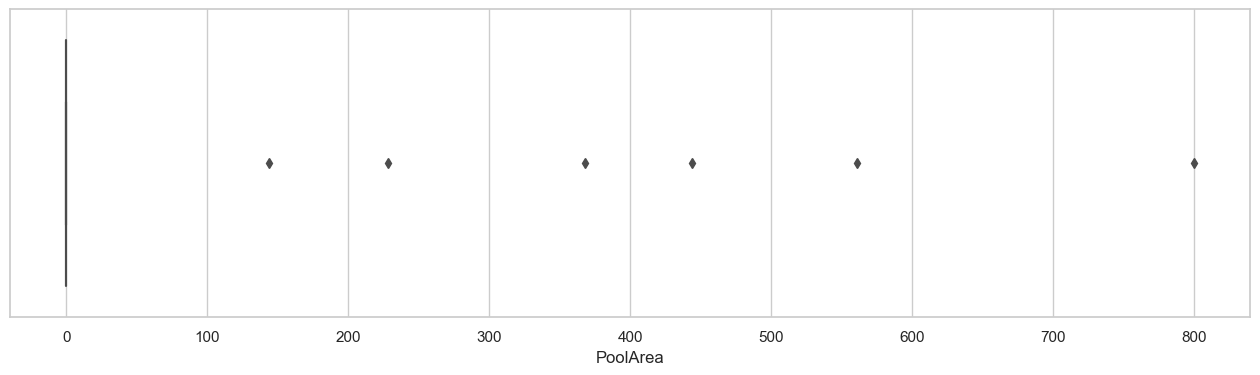

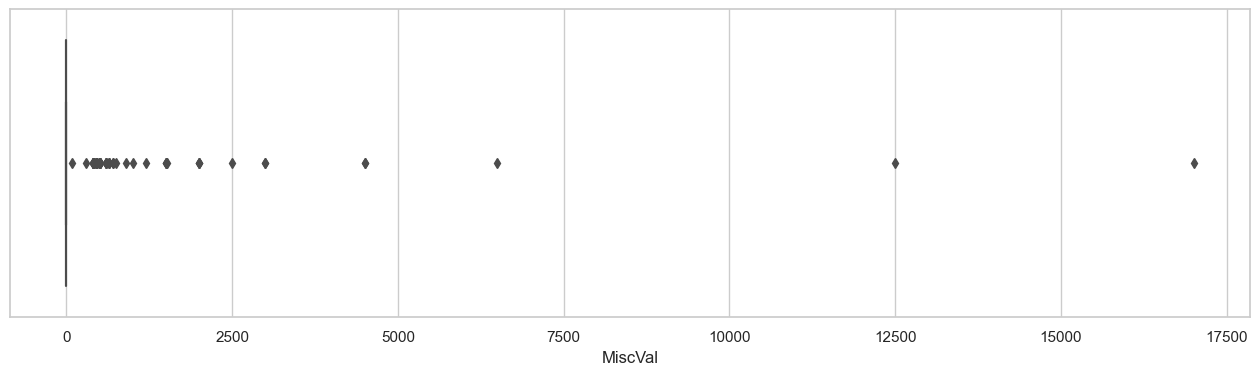

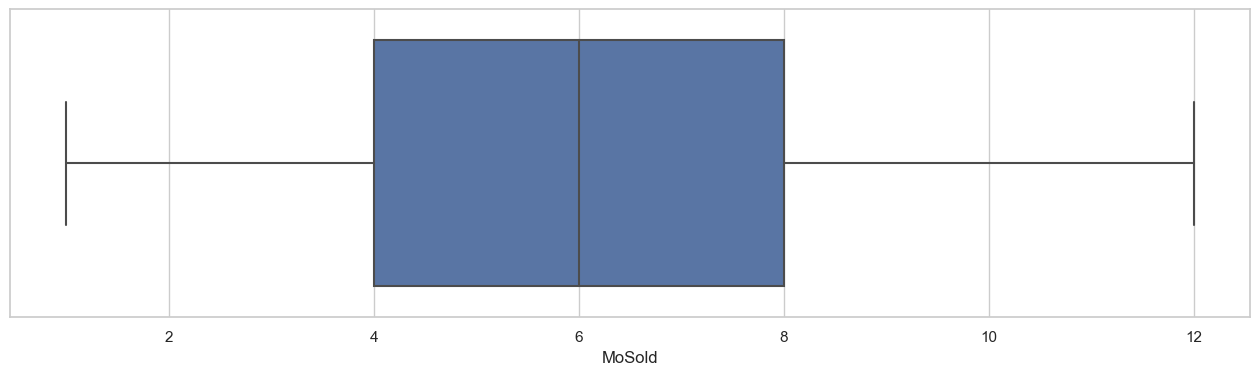

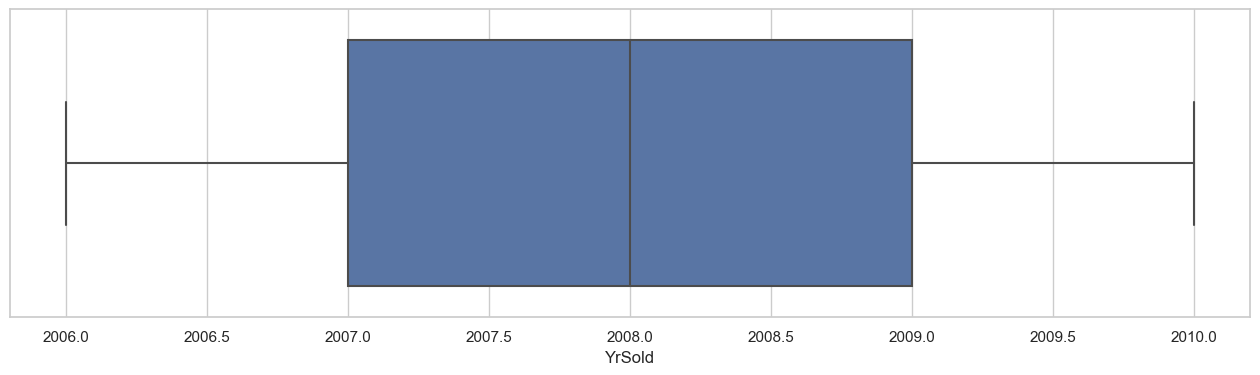

In [ ]:
numerical_df = test.select_dtypes(exclude=['object'])
#numerical_df = numerical_df.drop(["Id"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\si

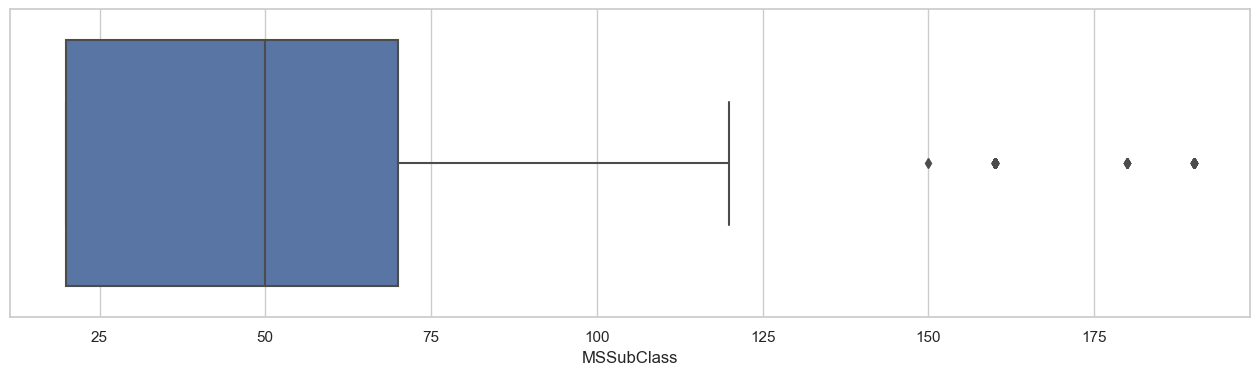

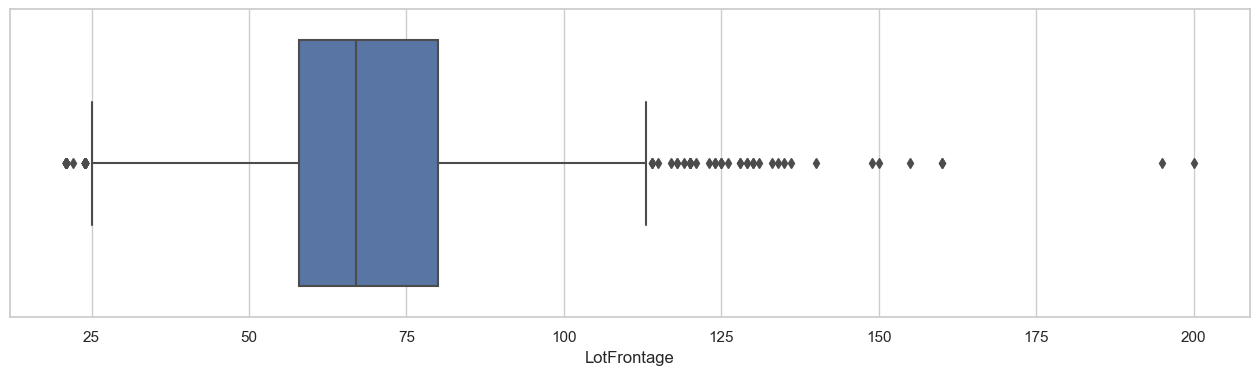

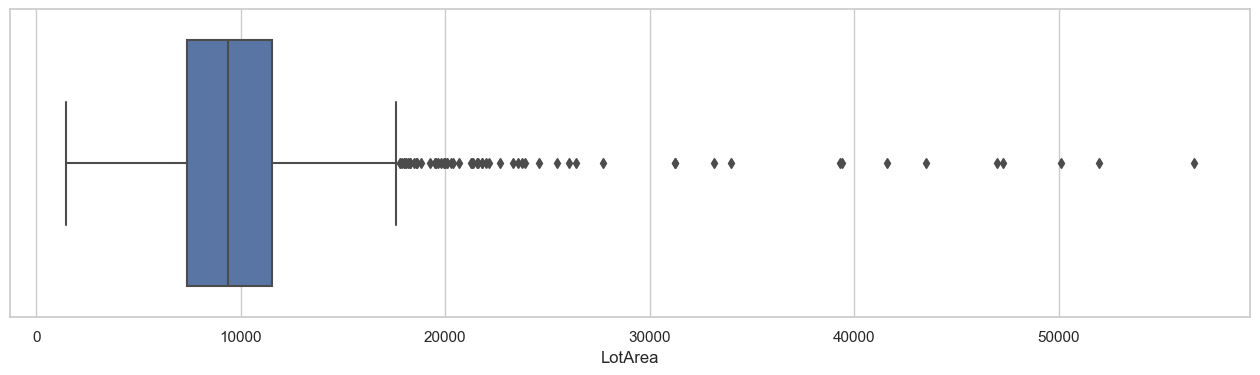

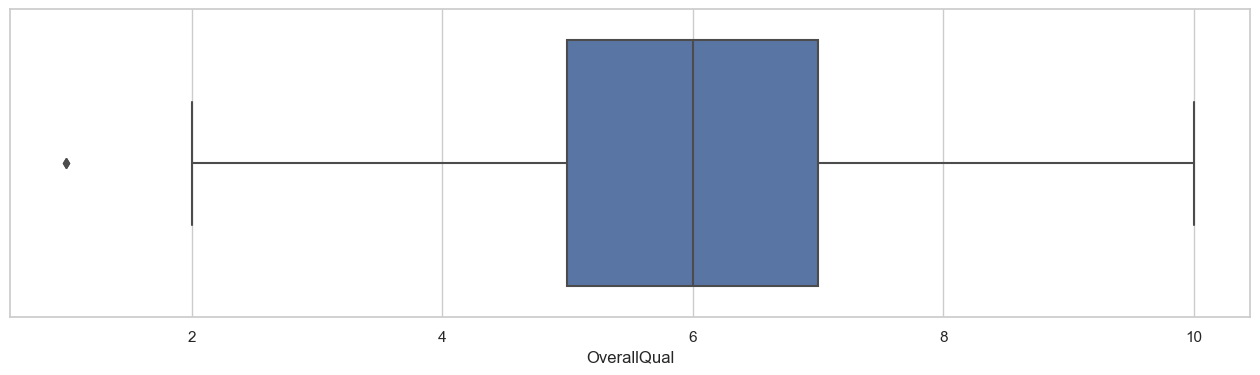

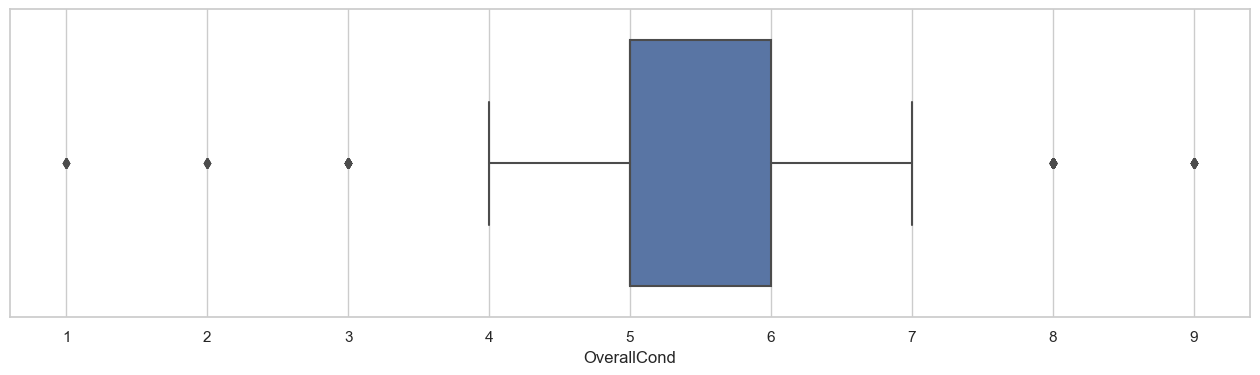

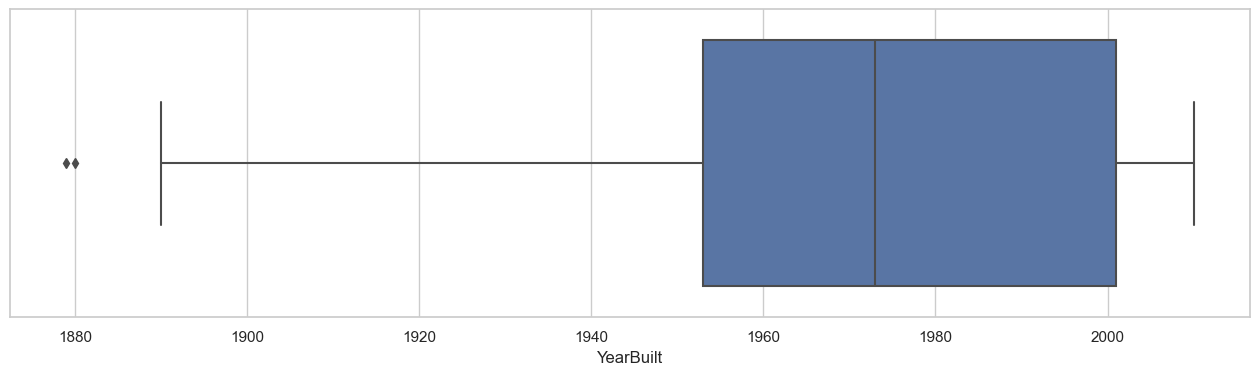

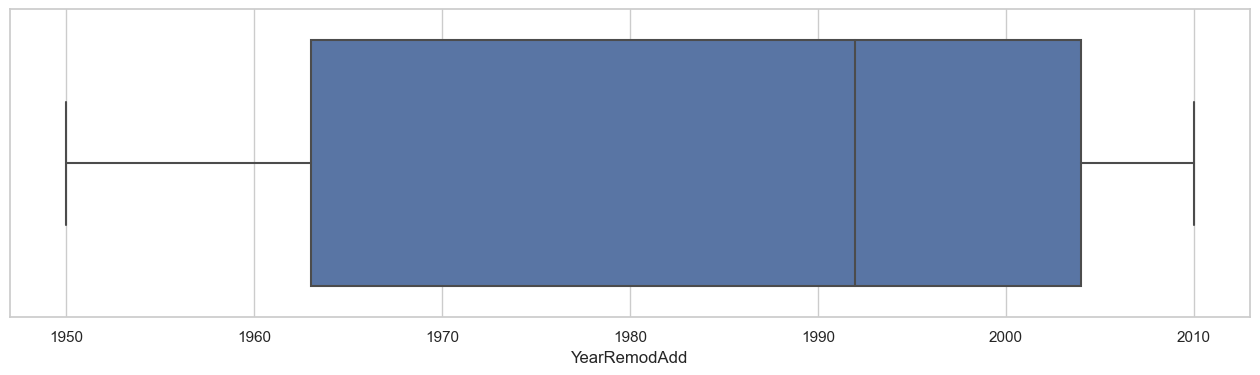

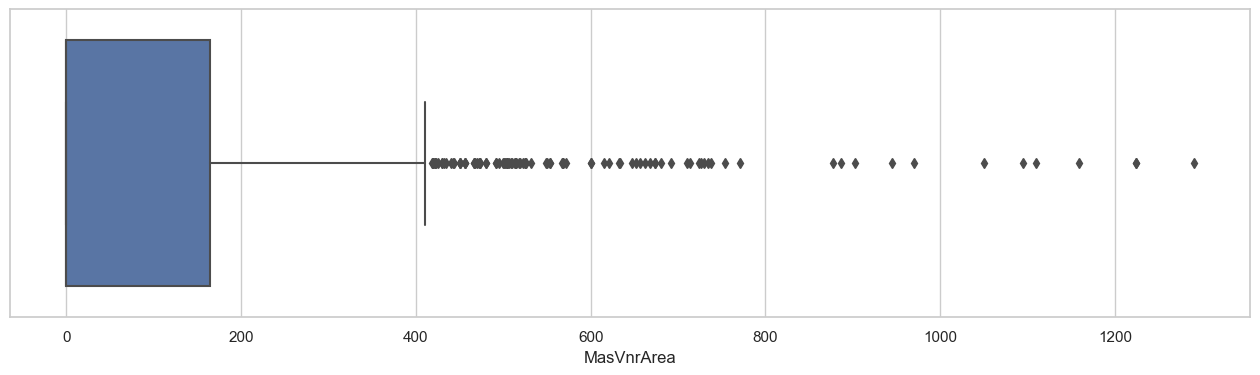

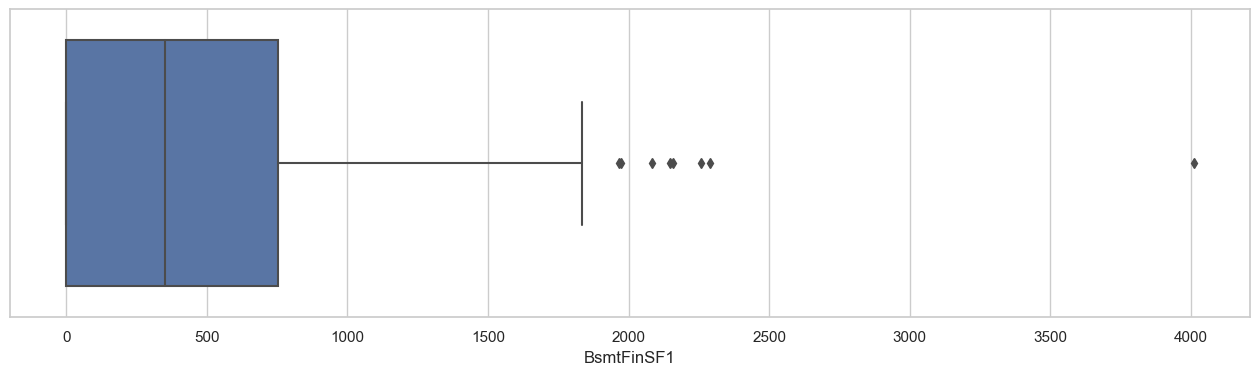

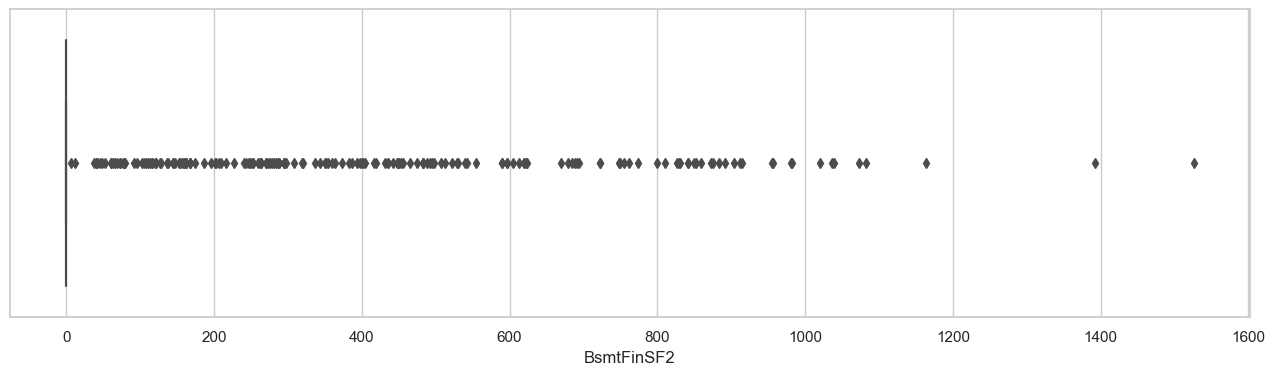

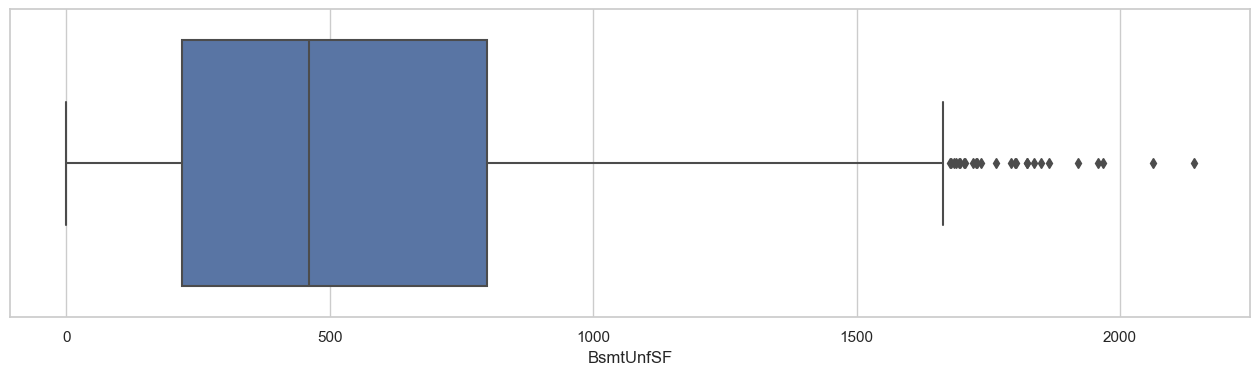

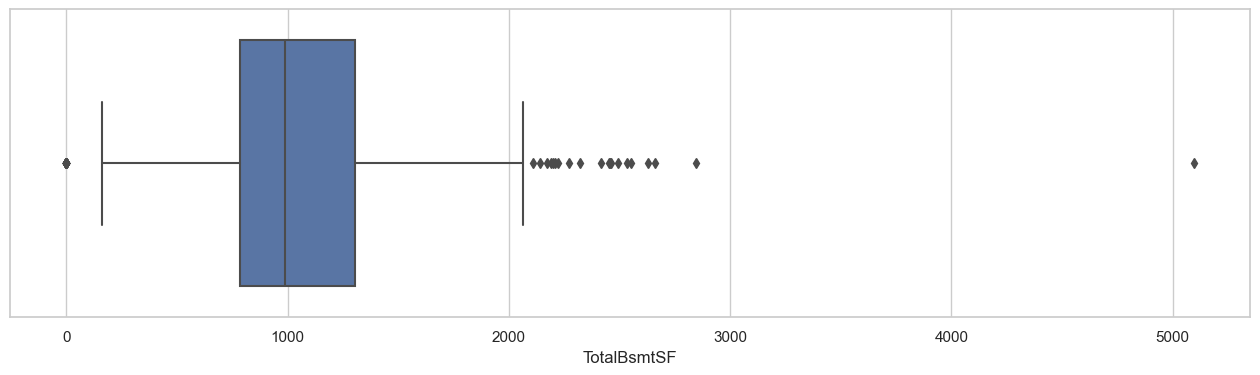

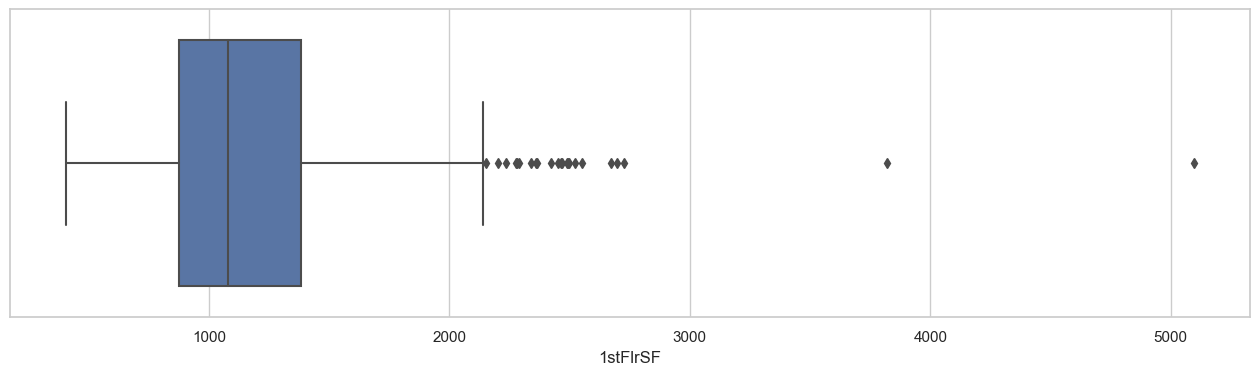

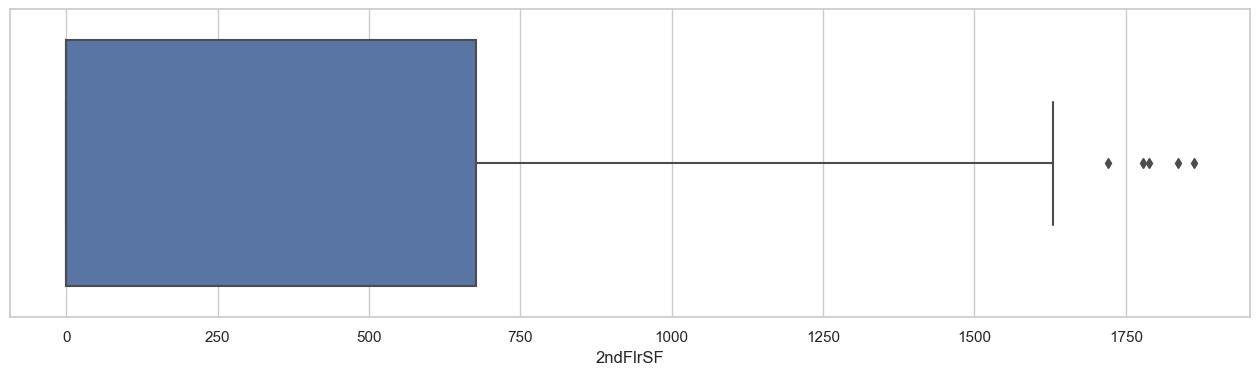

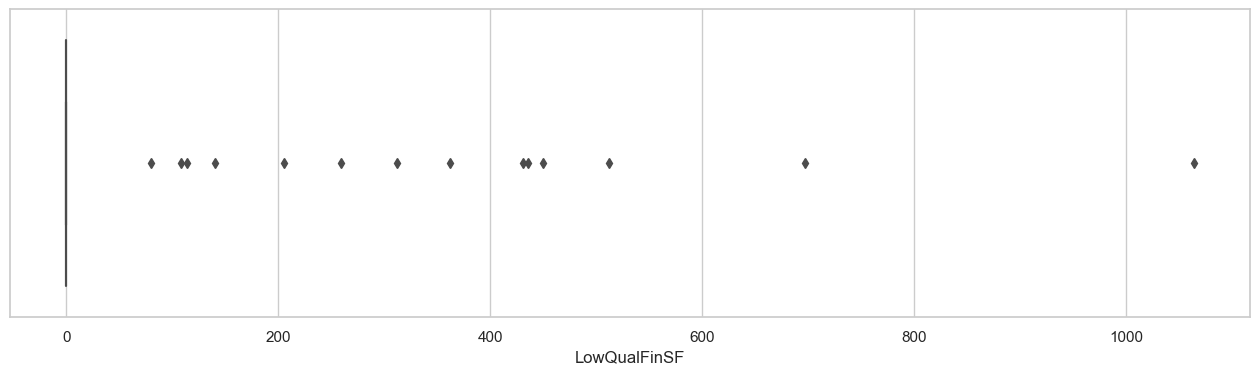

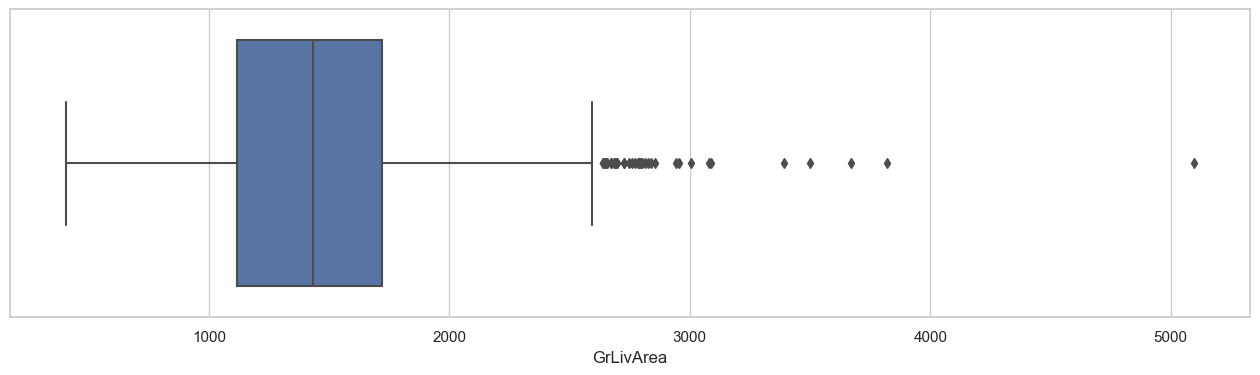

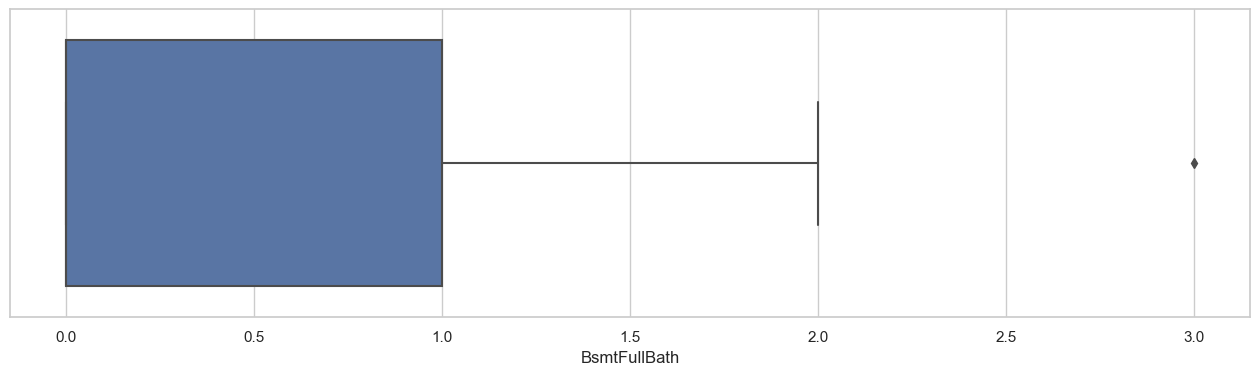

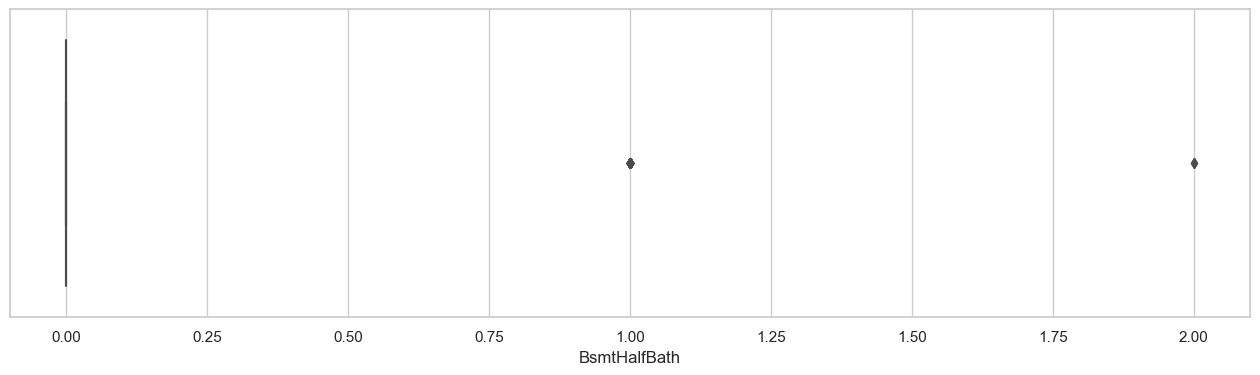

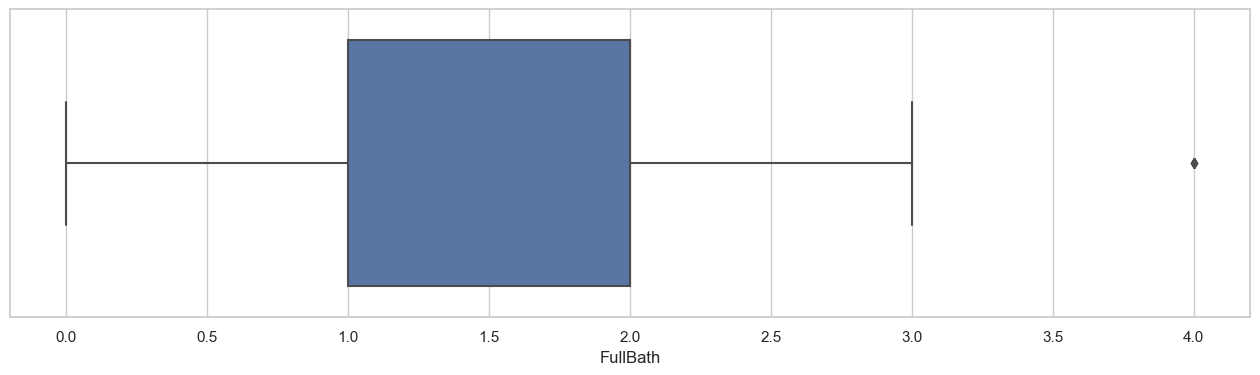

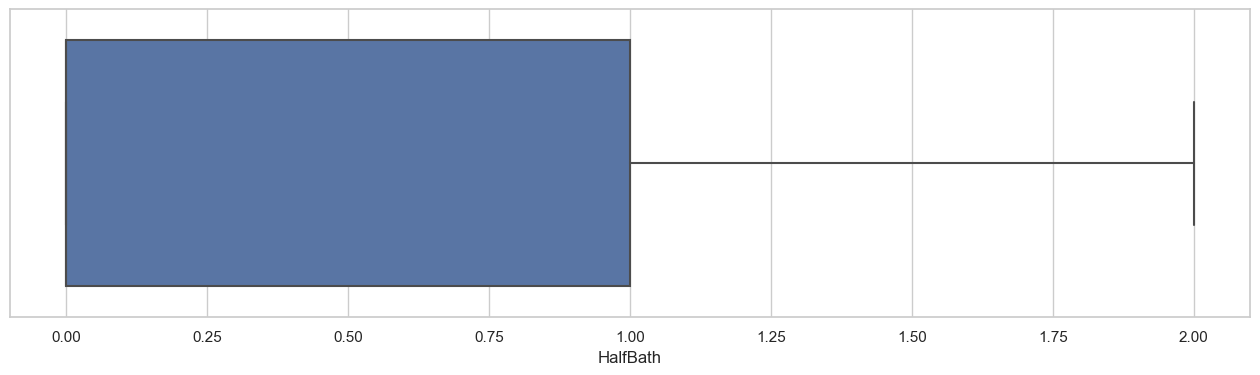

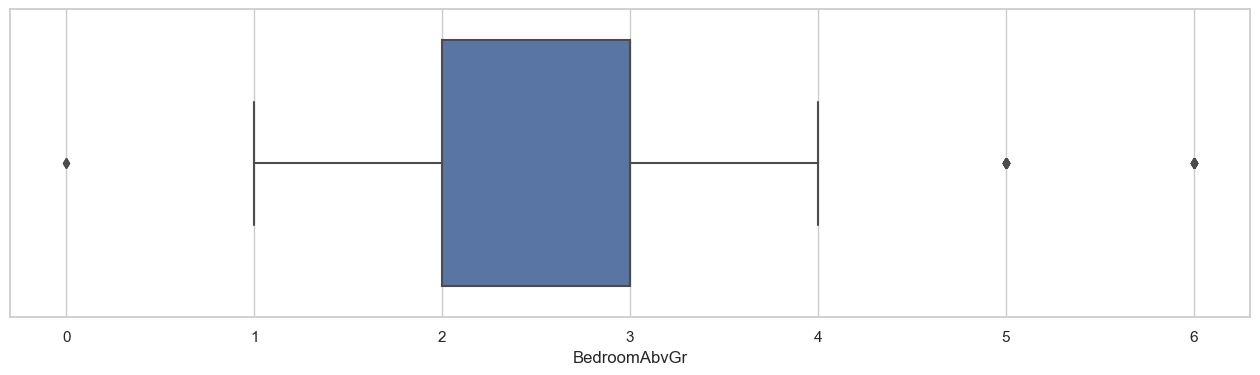

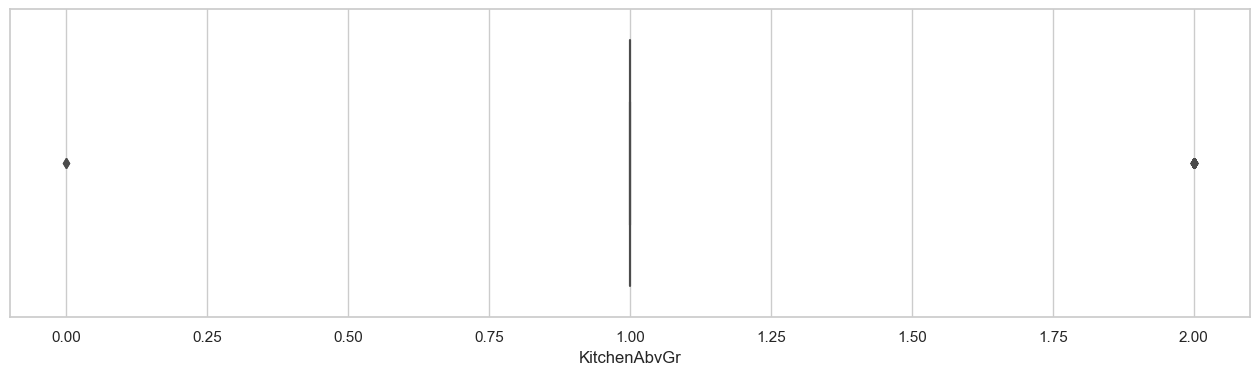

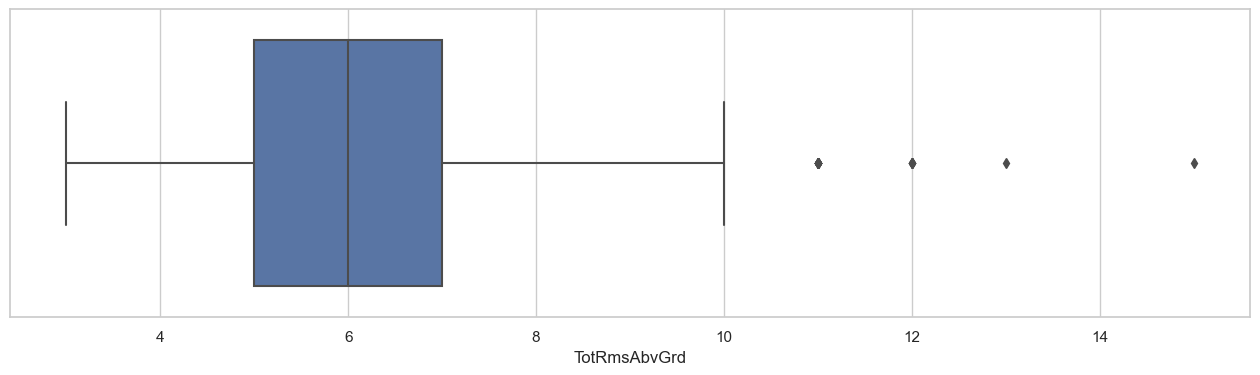

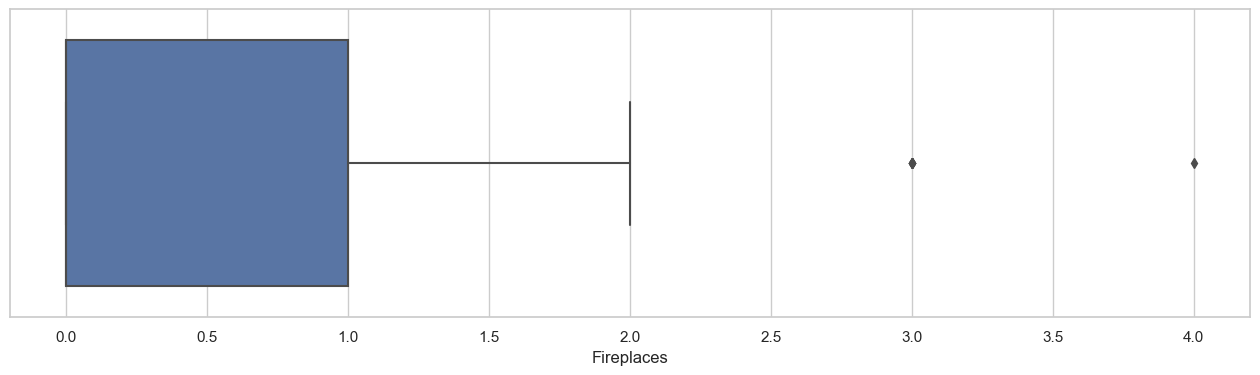

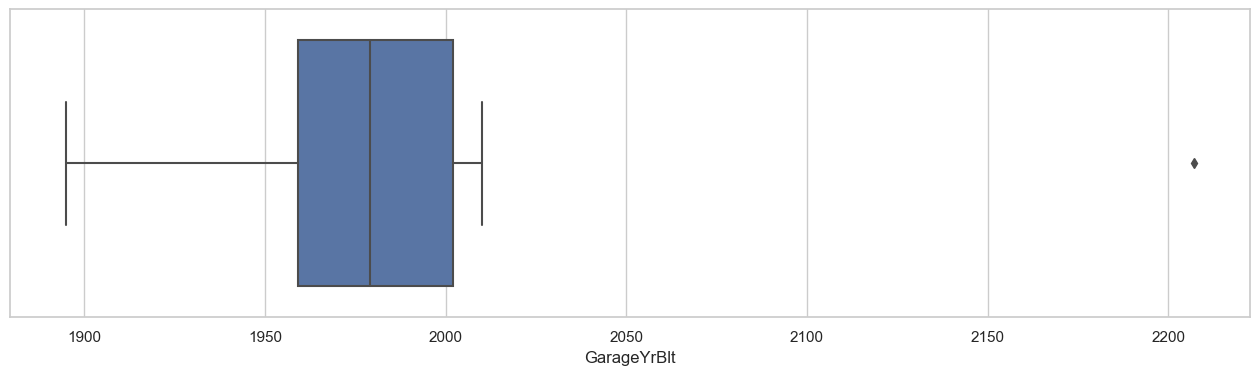

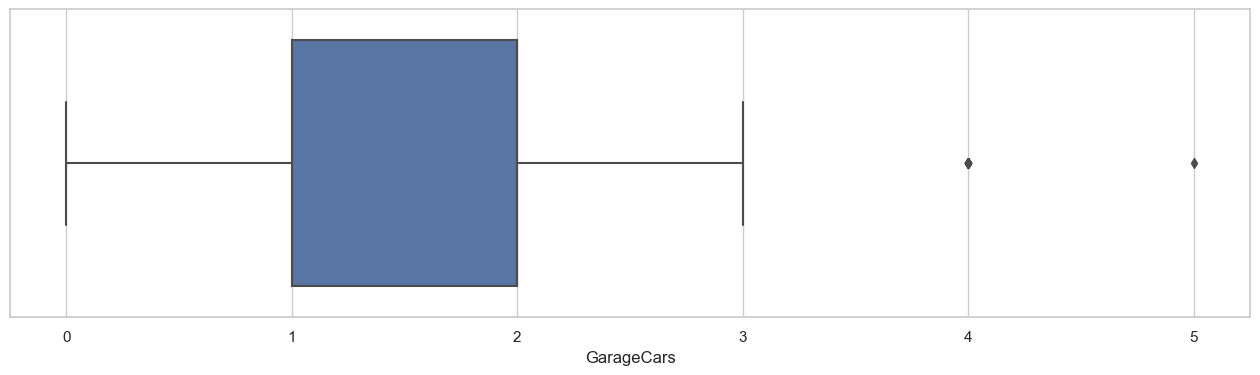

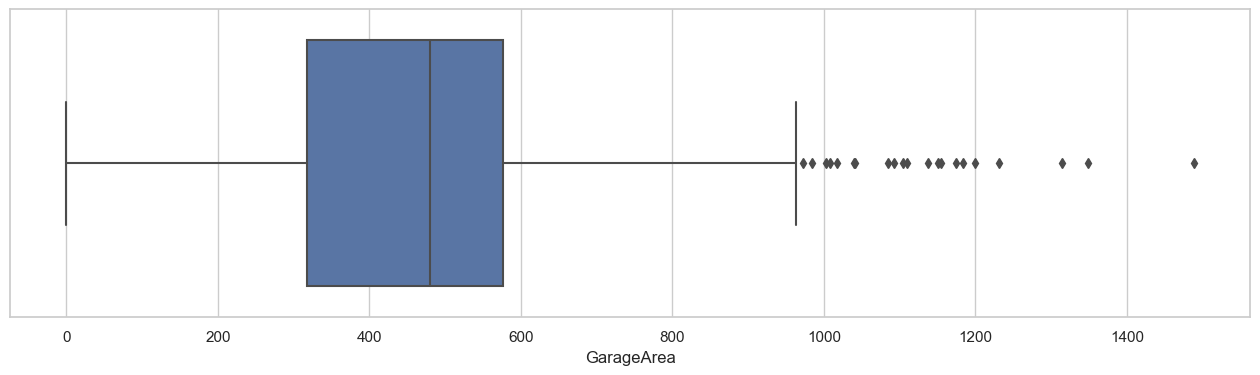

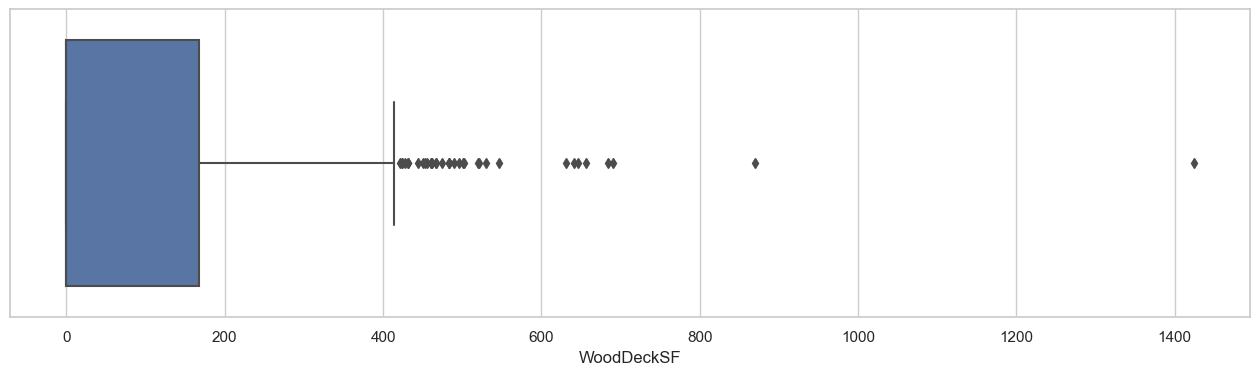

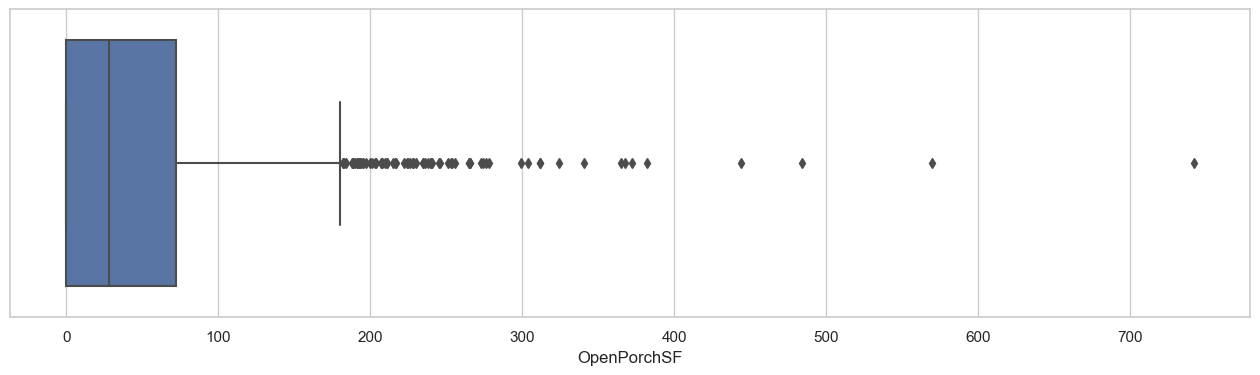

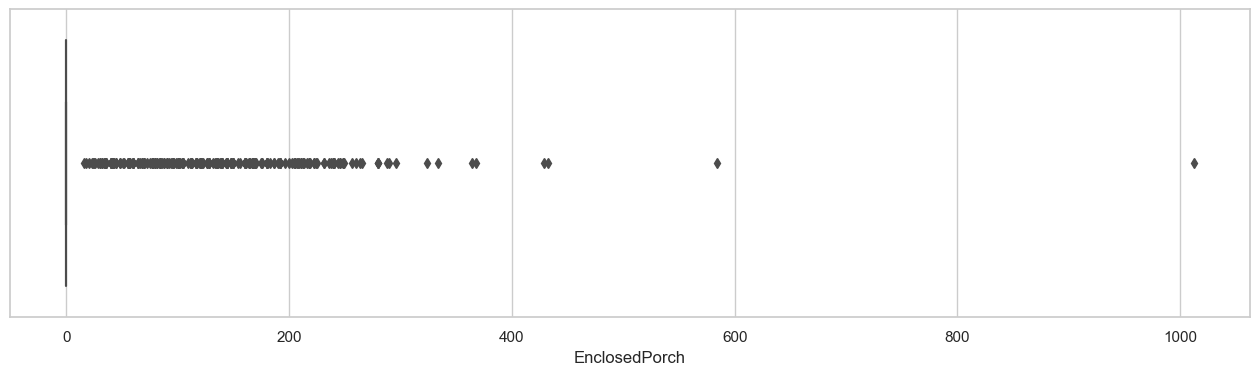

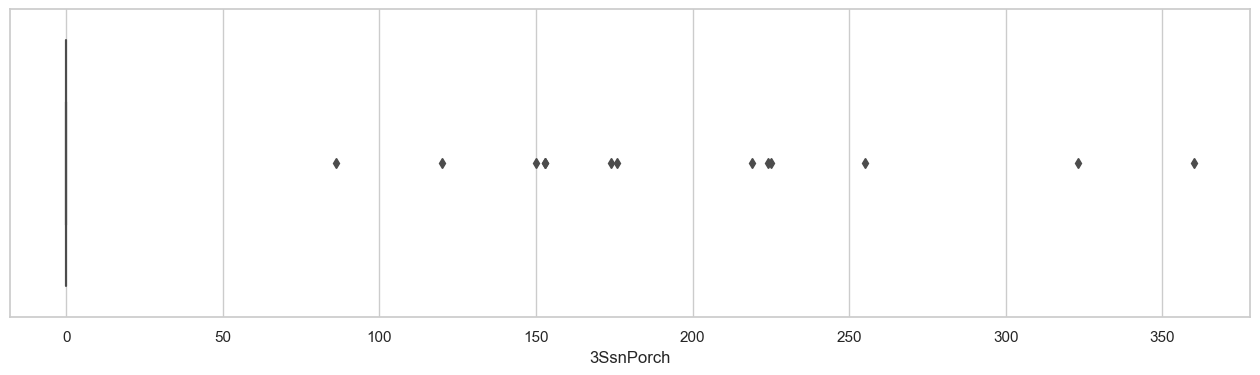

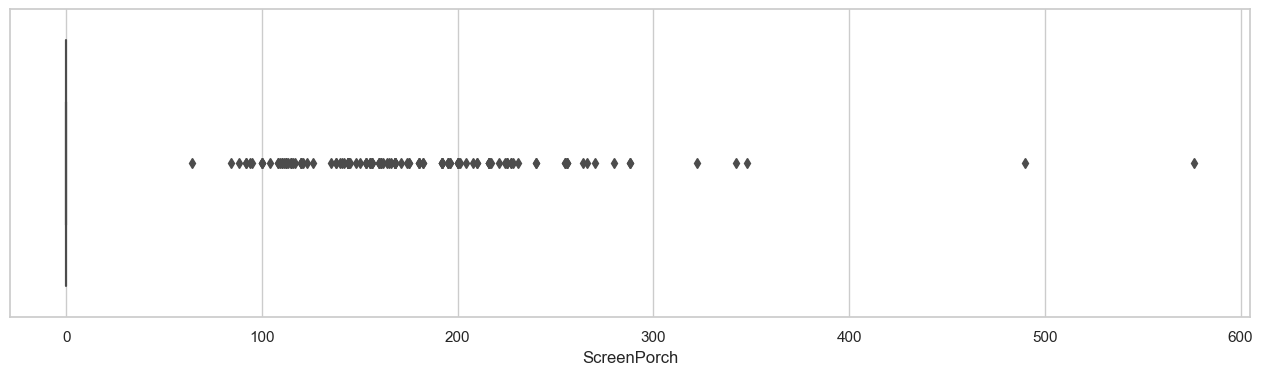

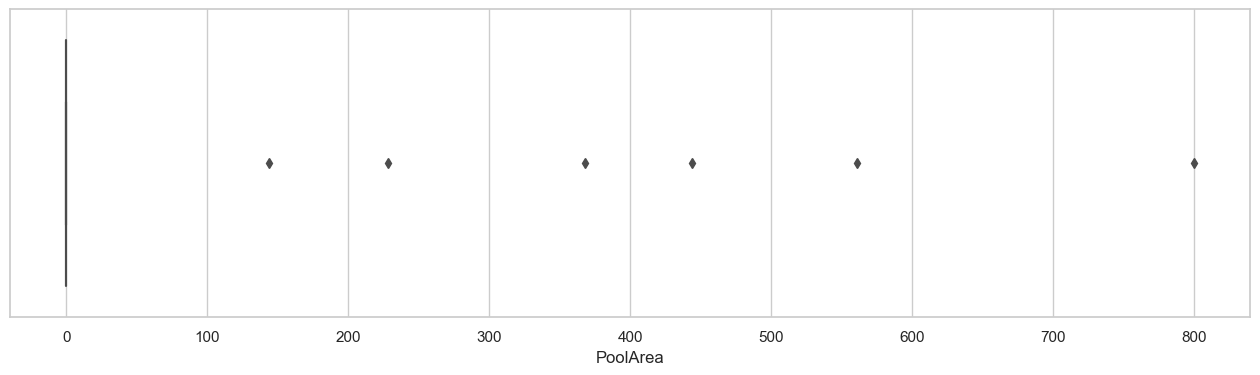

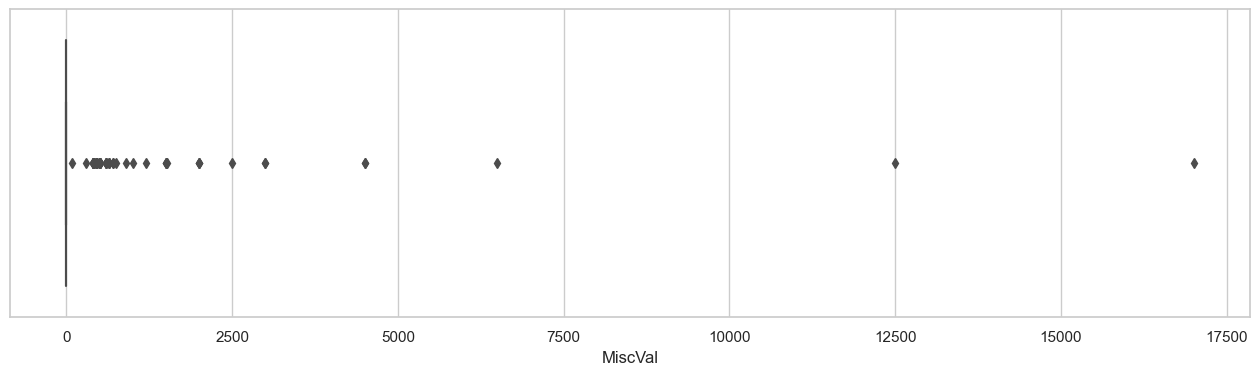

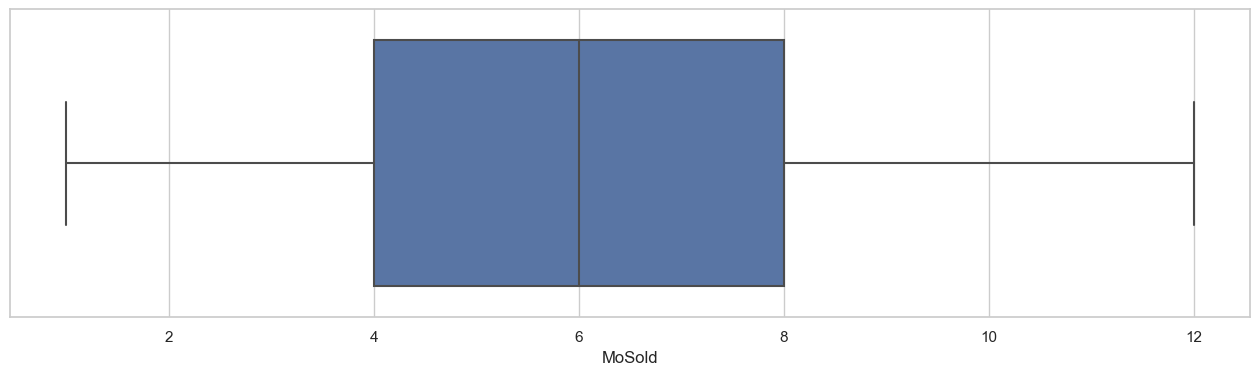

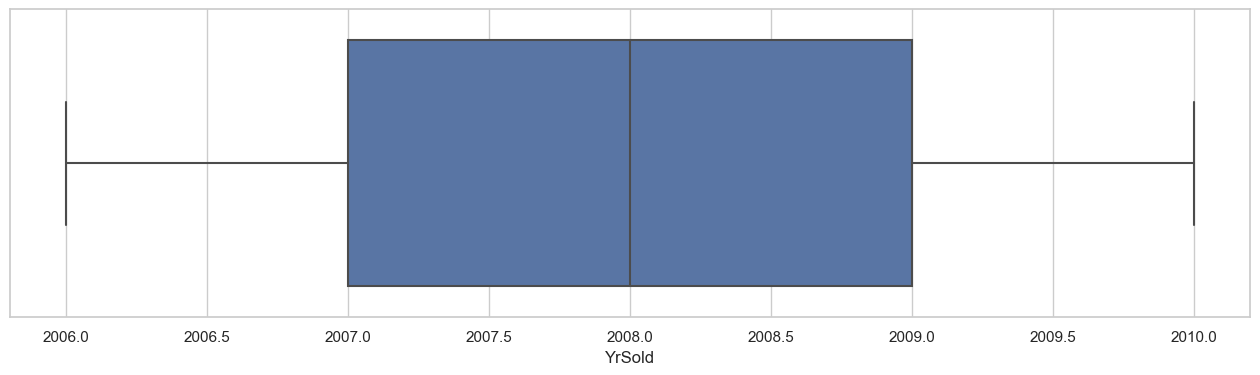

In [ ]:
numerical_df = test.select_dtypes(exclude=['object'])
#numerical_df = numerical_df.drop(["Id"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\si

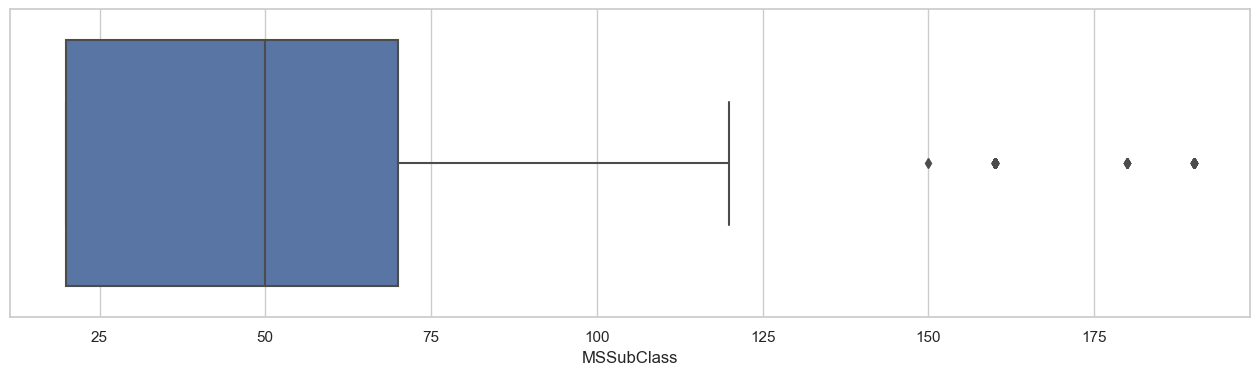

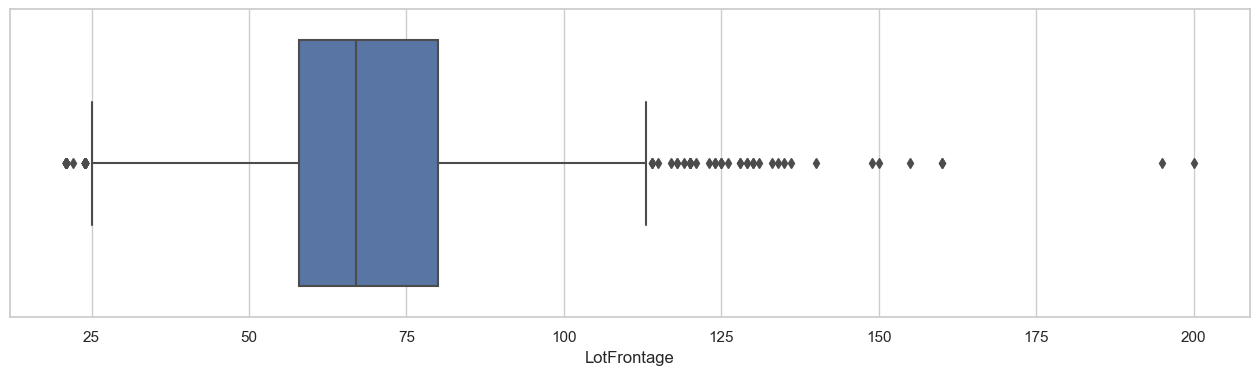

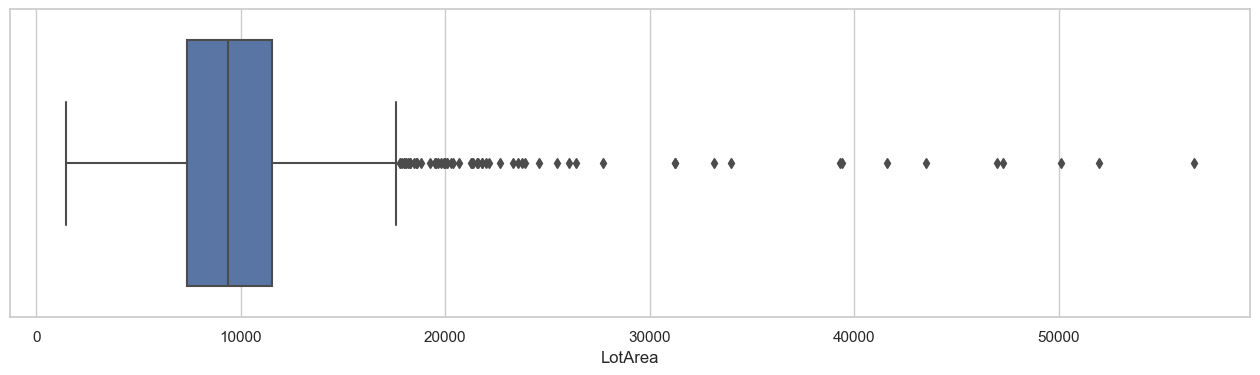

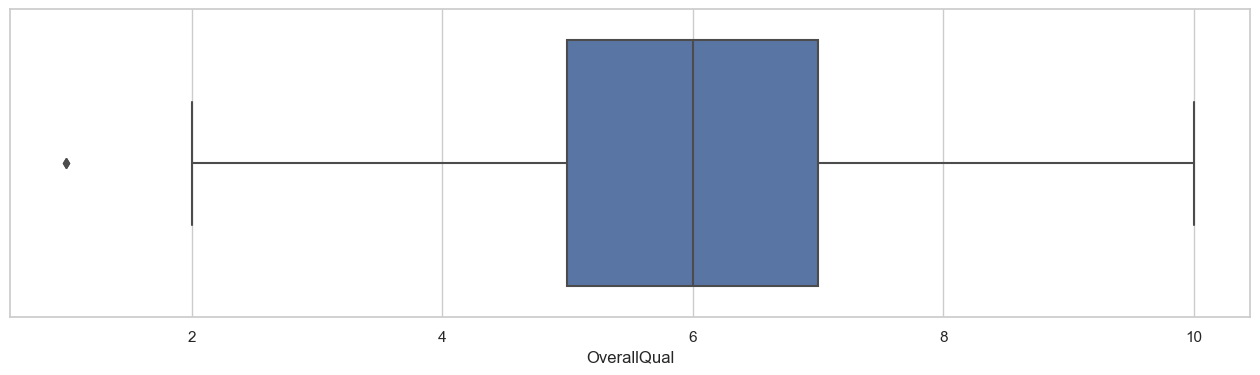

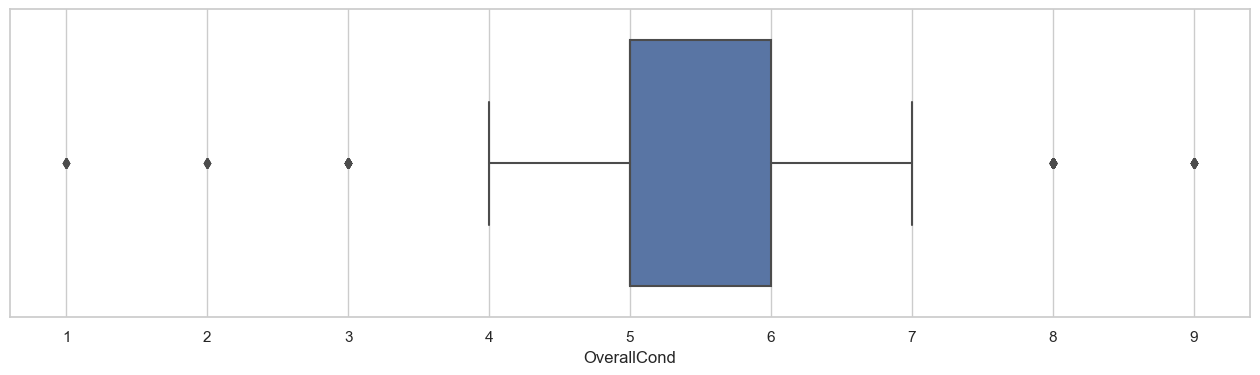

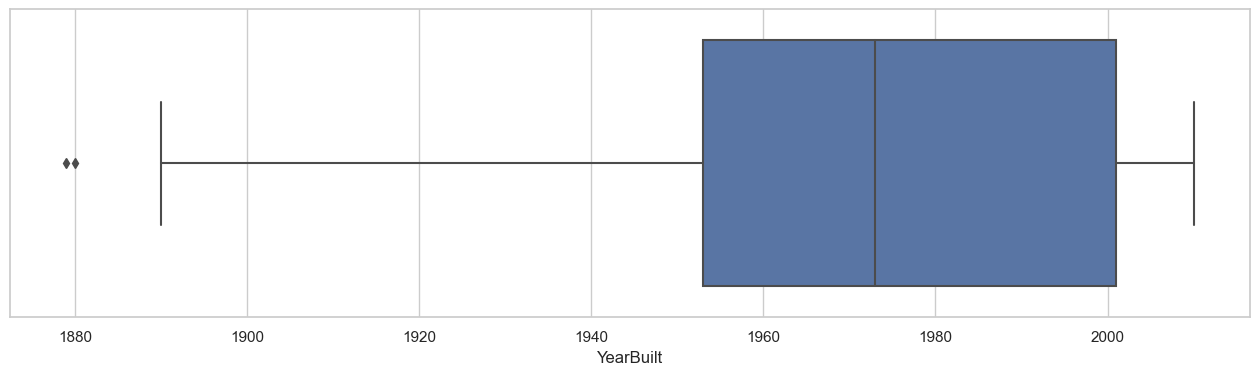

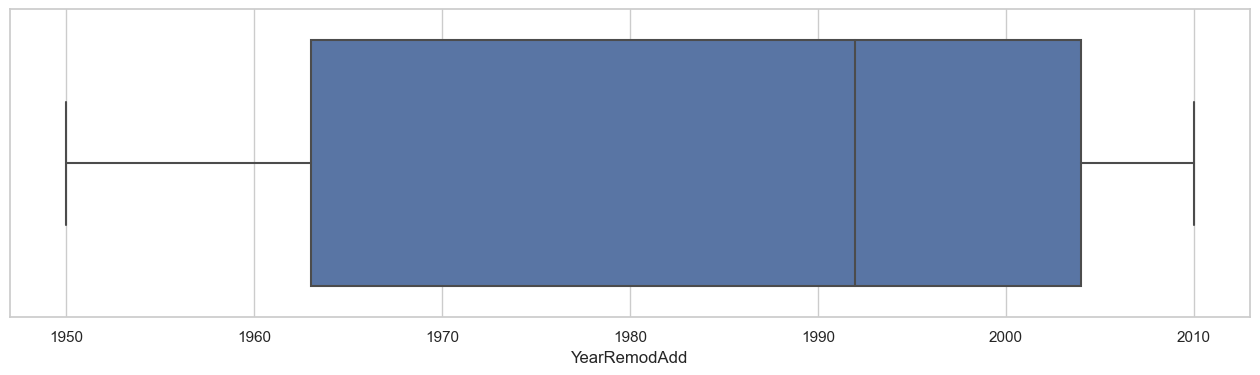

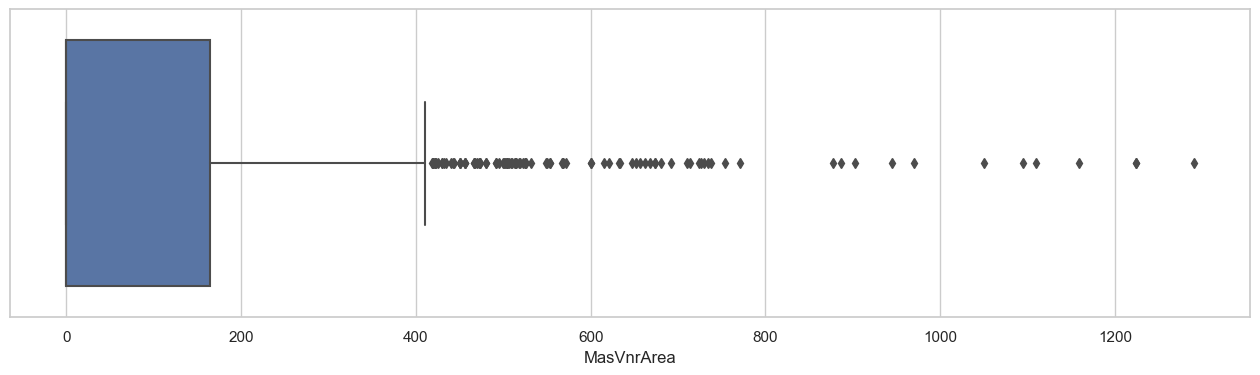

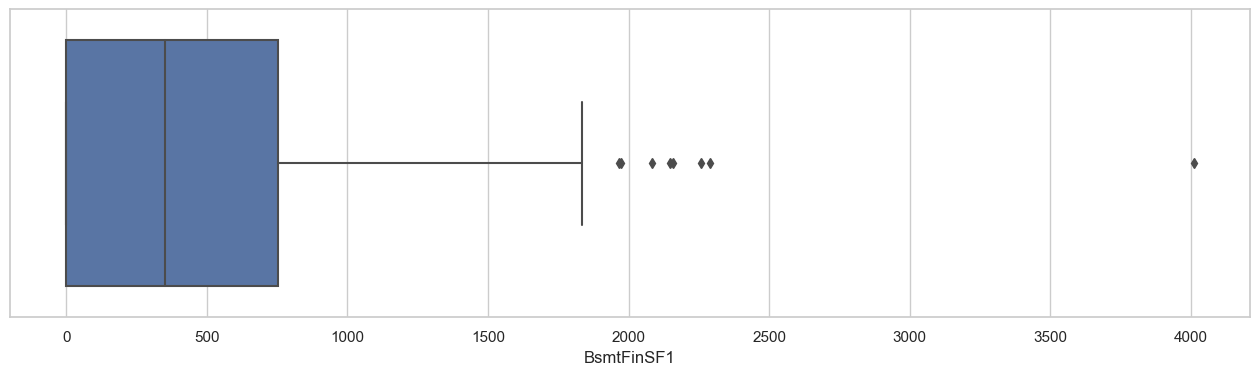

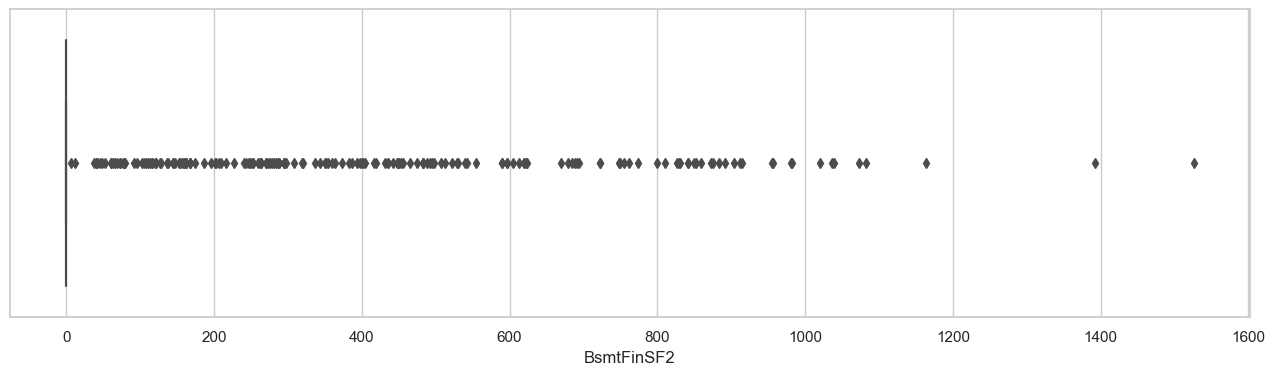

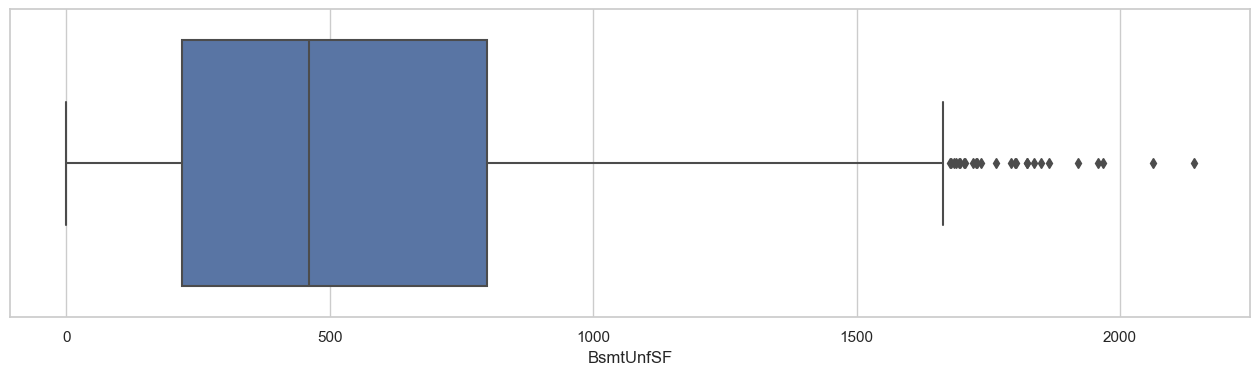

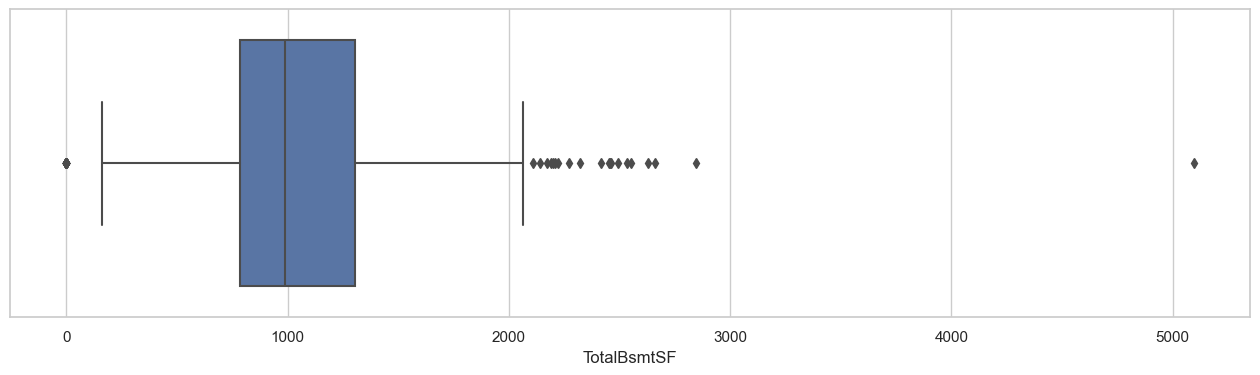

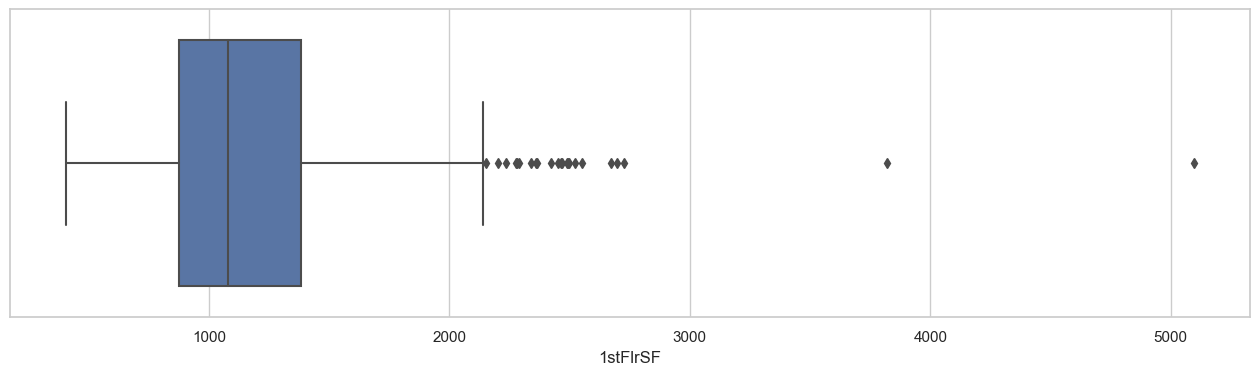

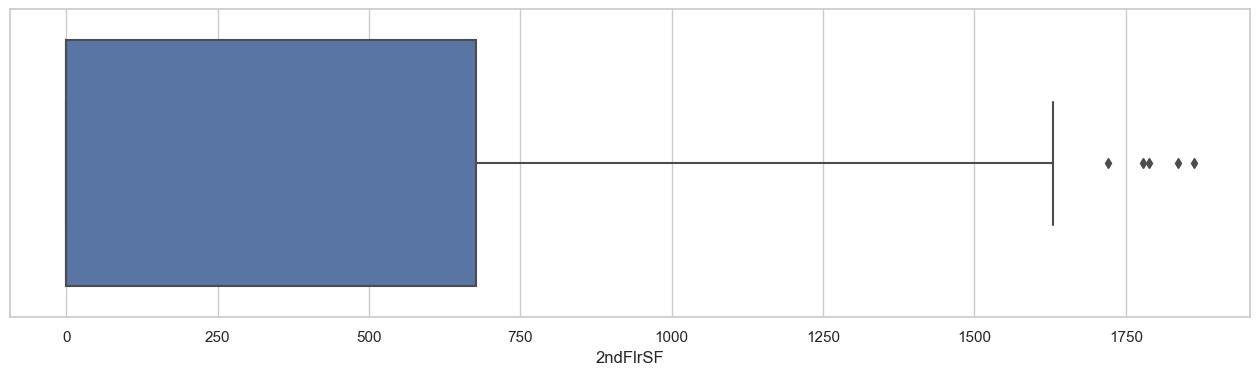

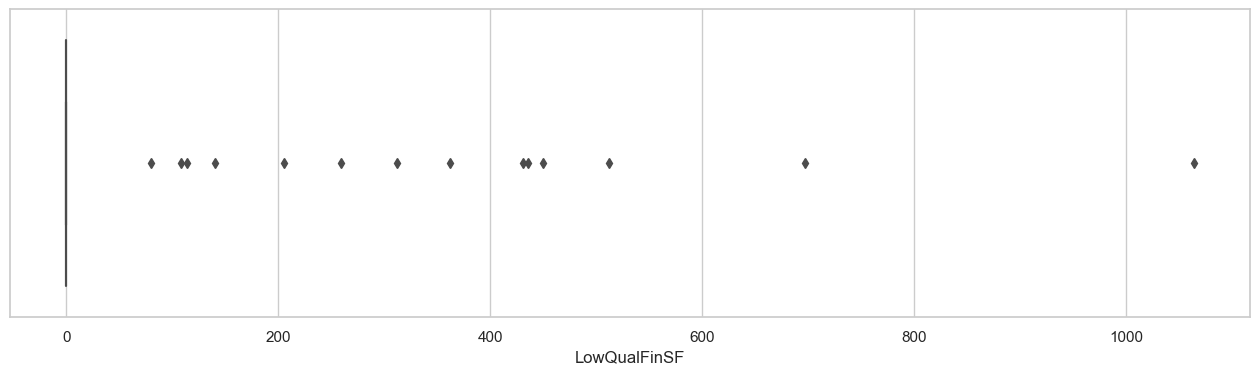

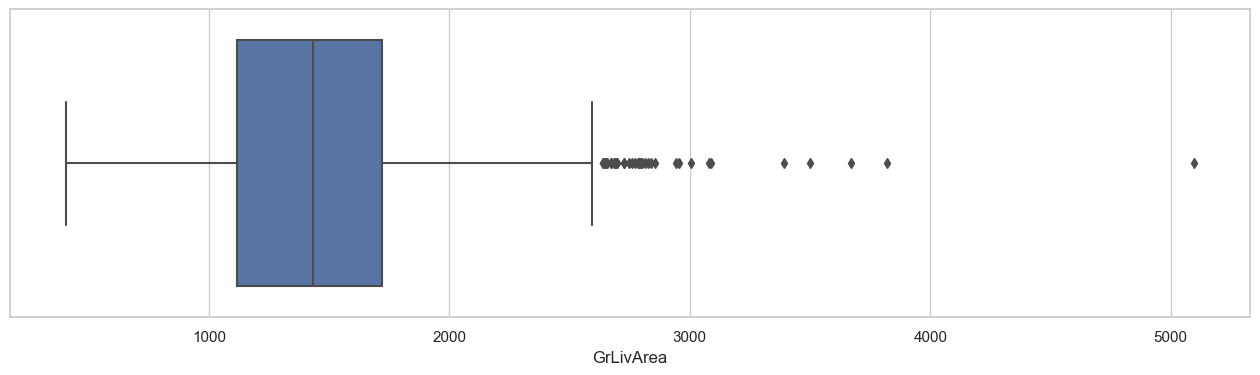

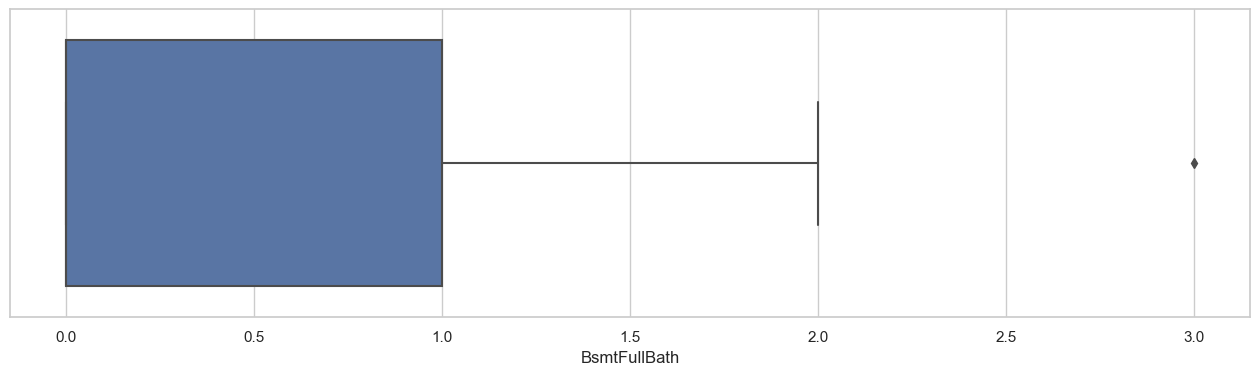

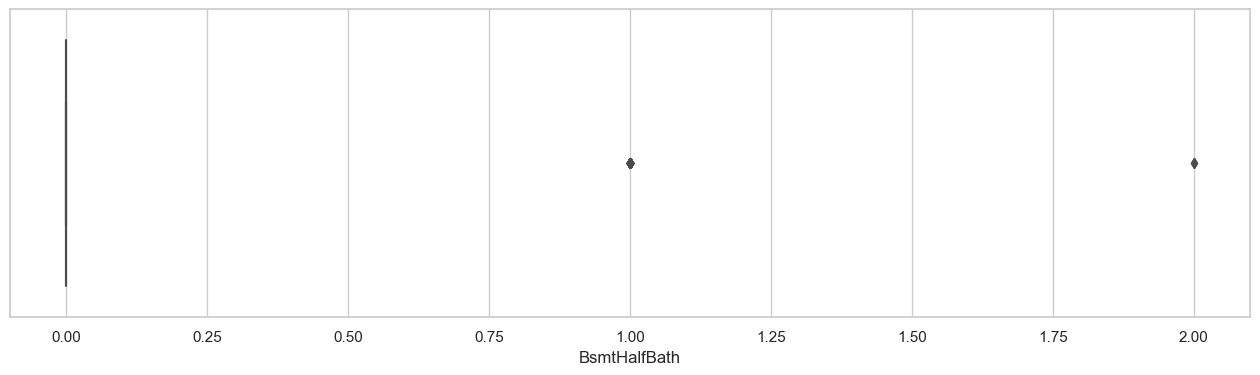

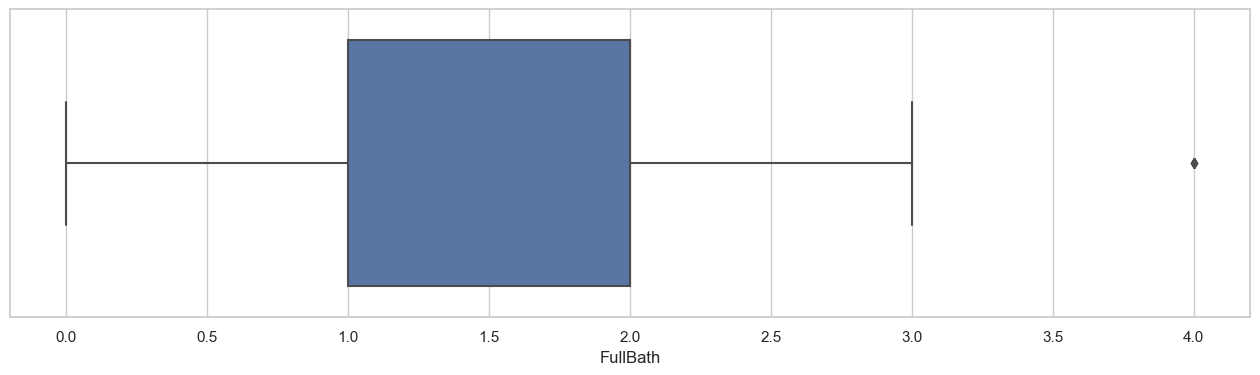

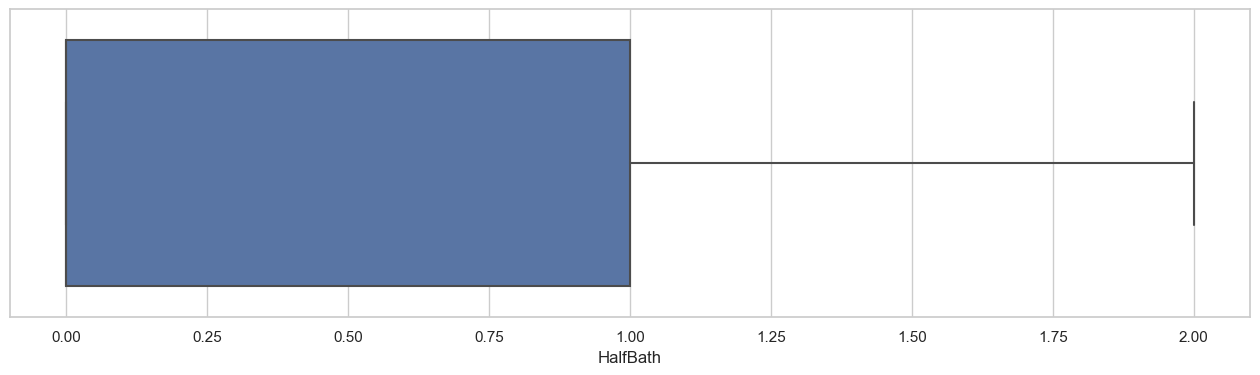

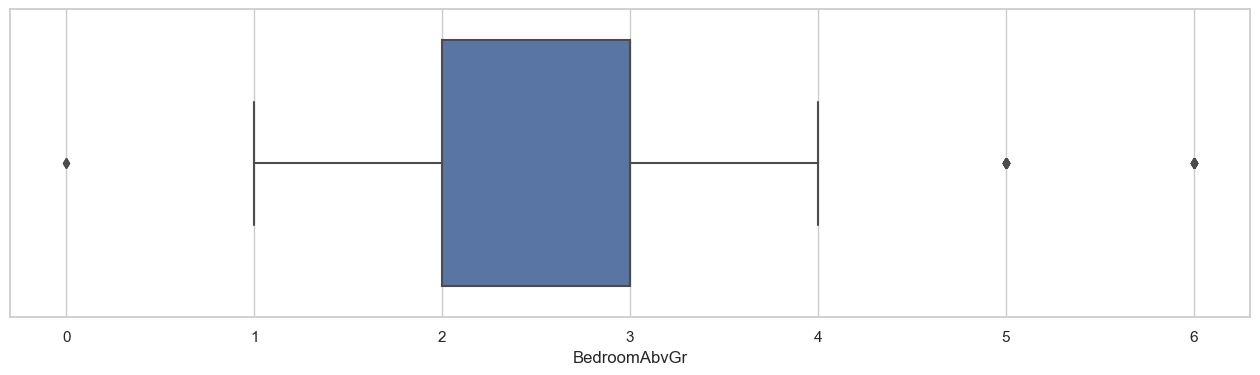

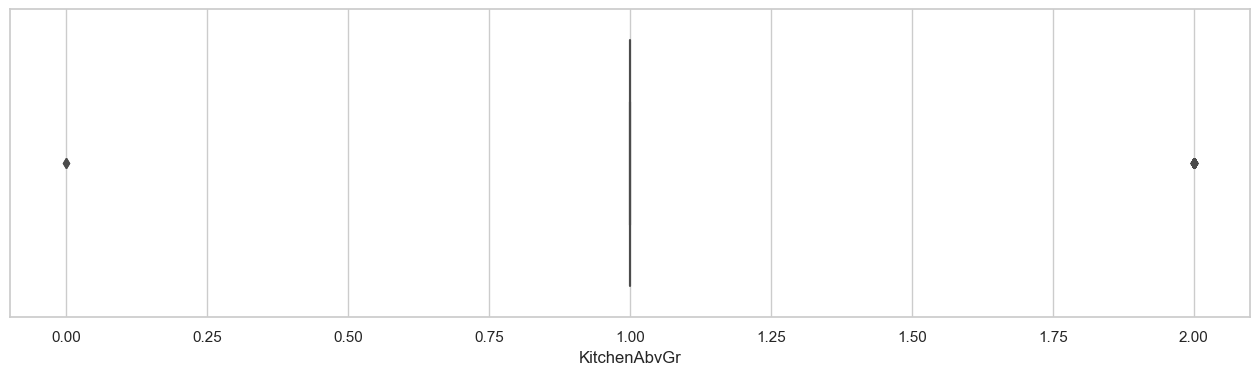

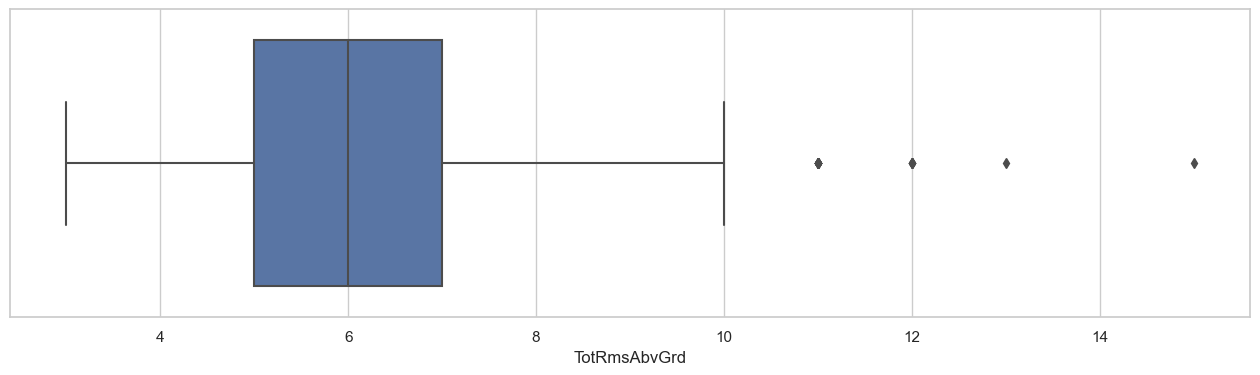

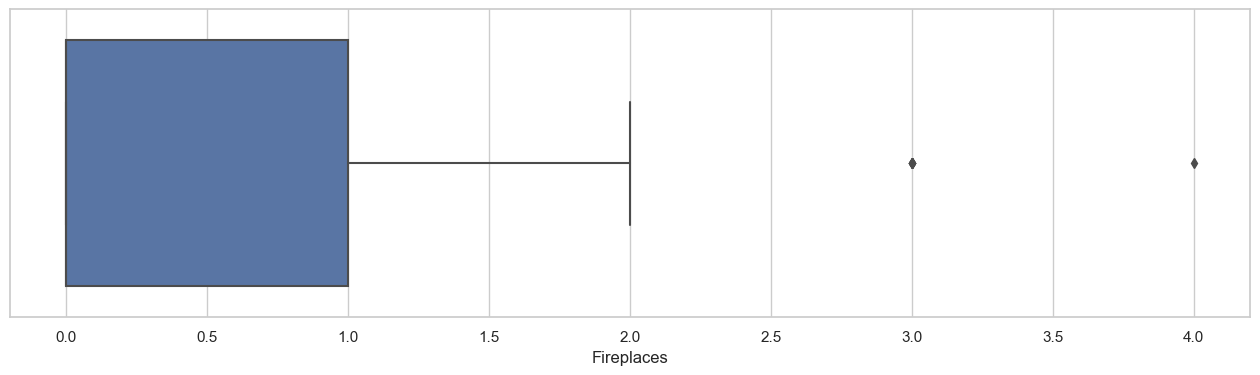

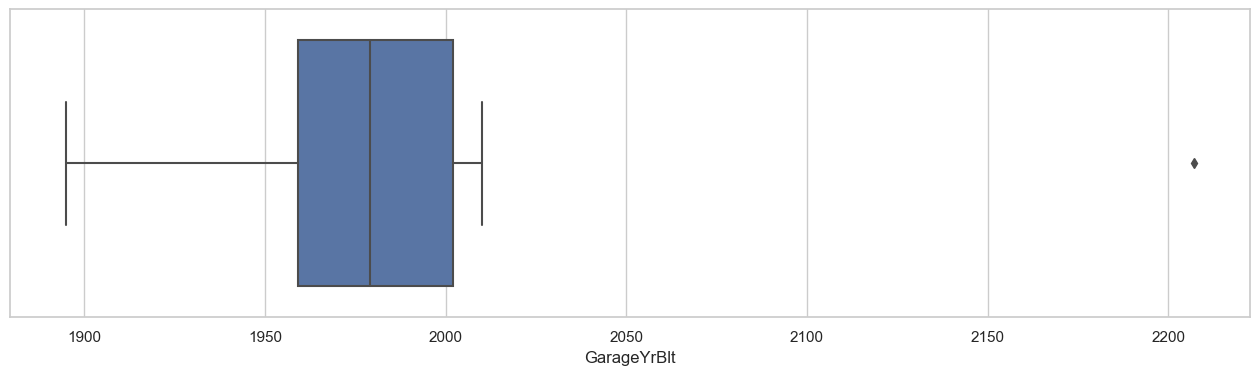

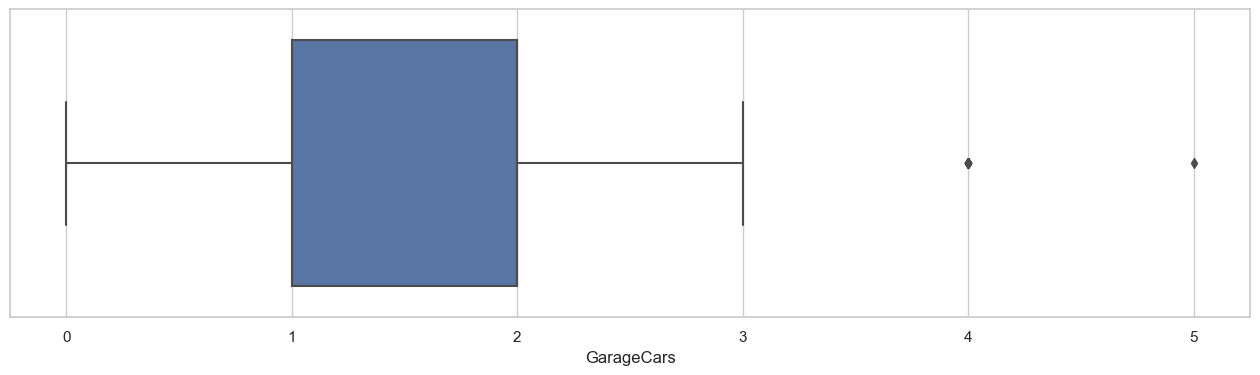

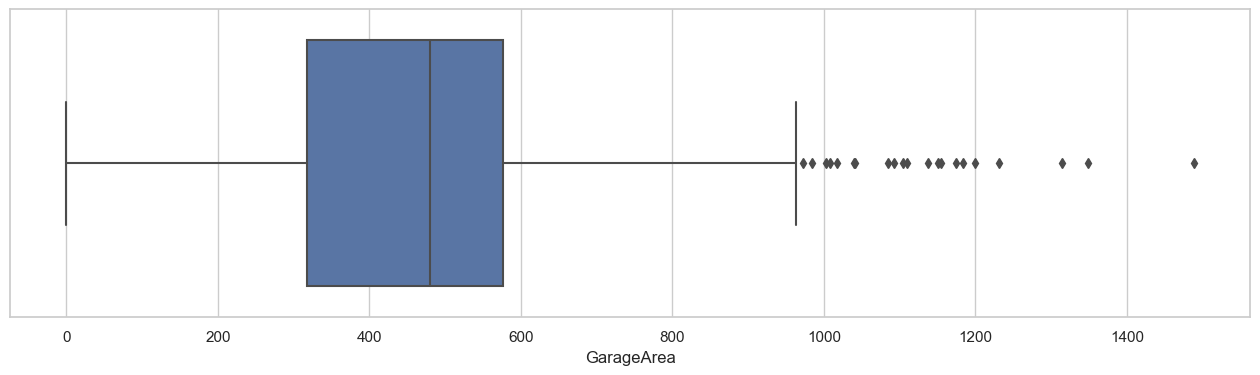

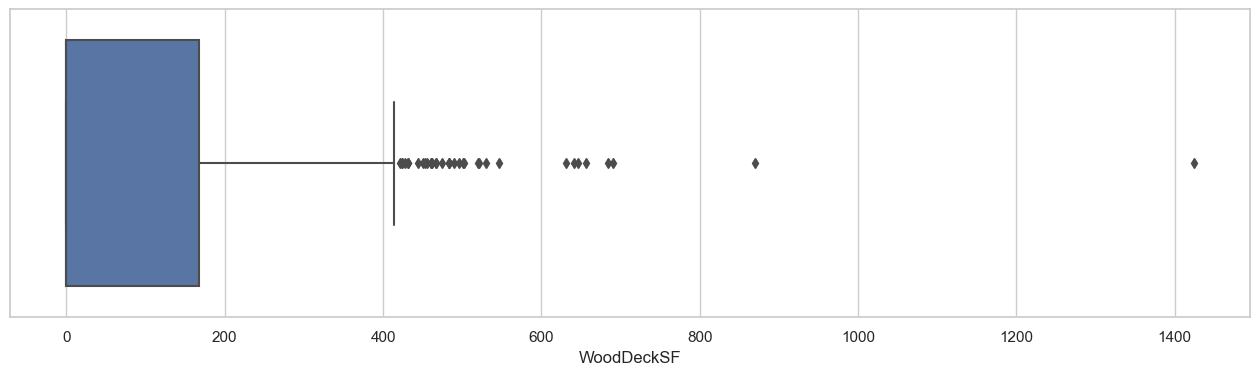

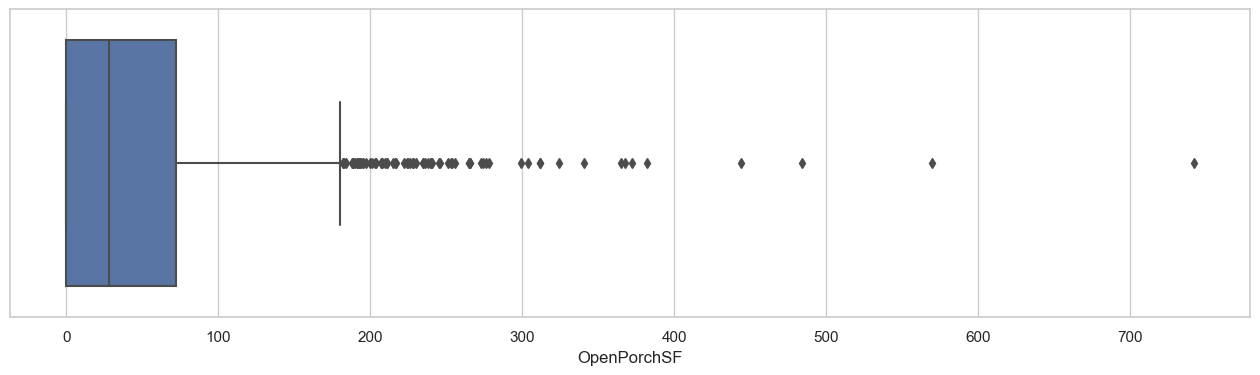

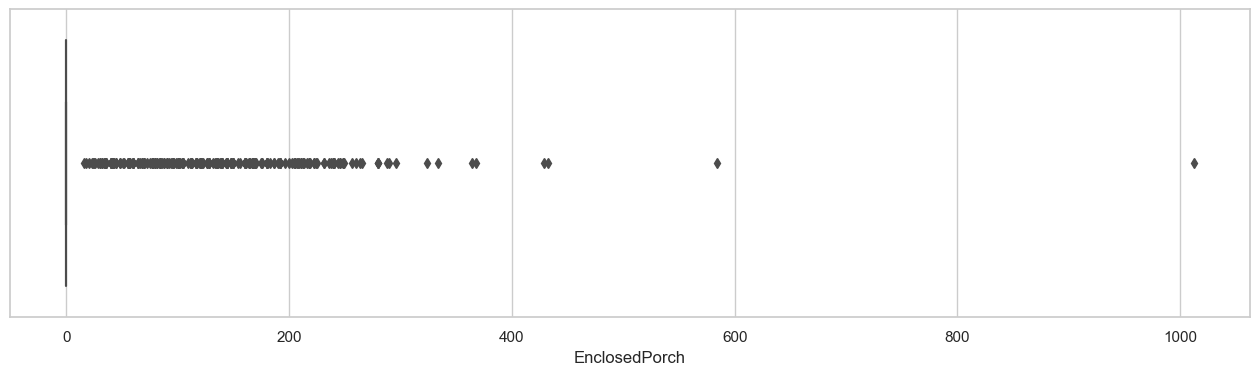

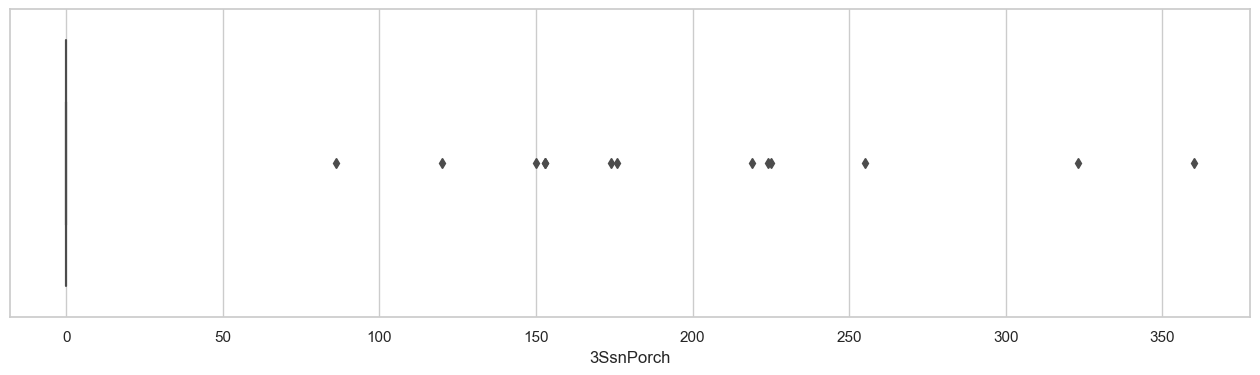

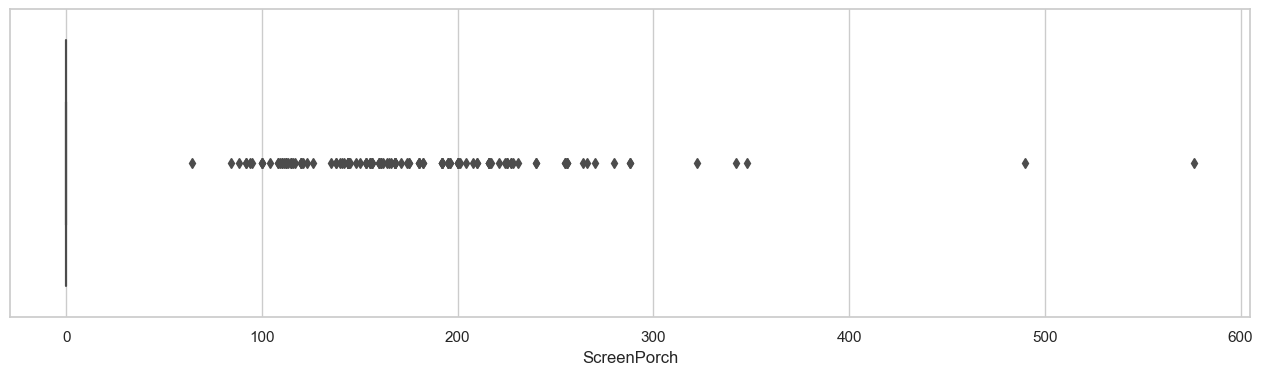

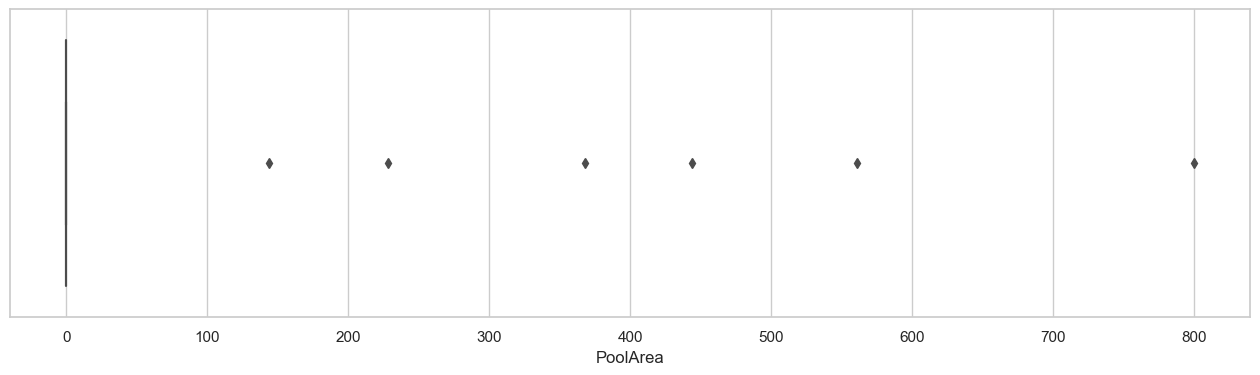

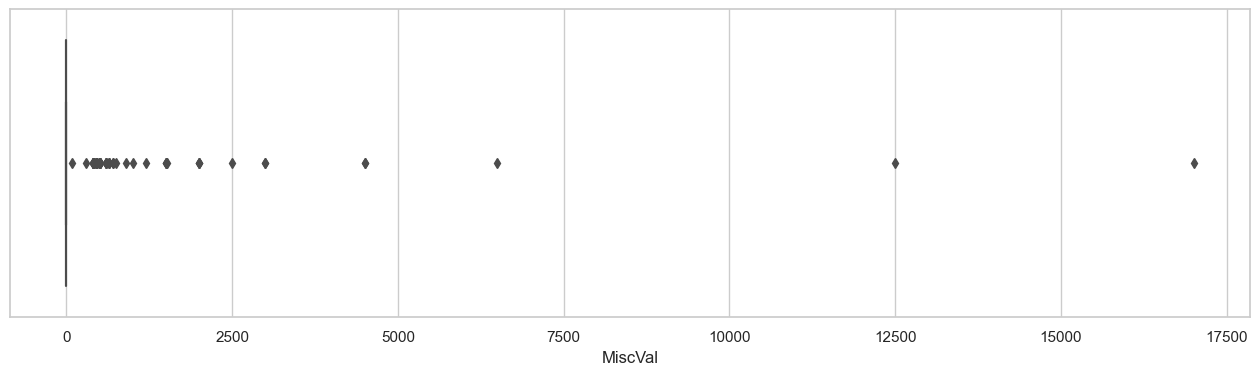

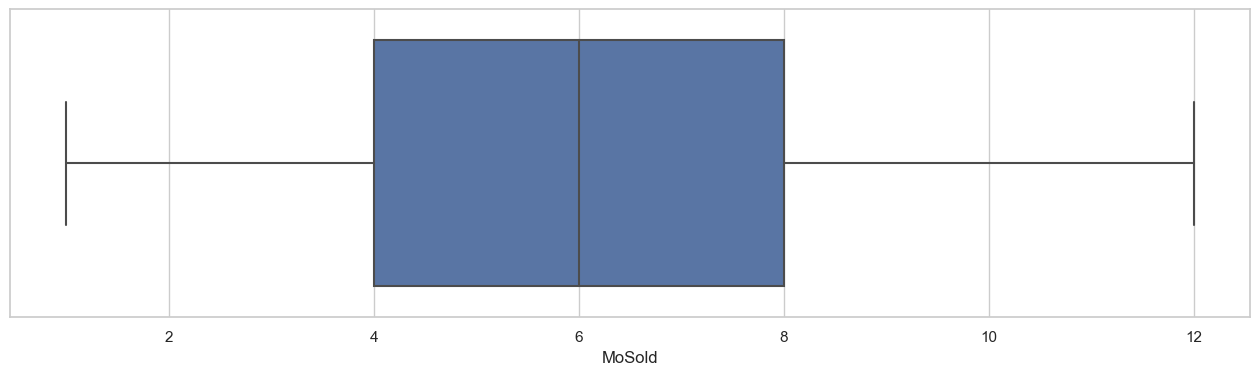

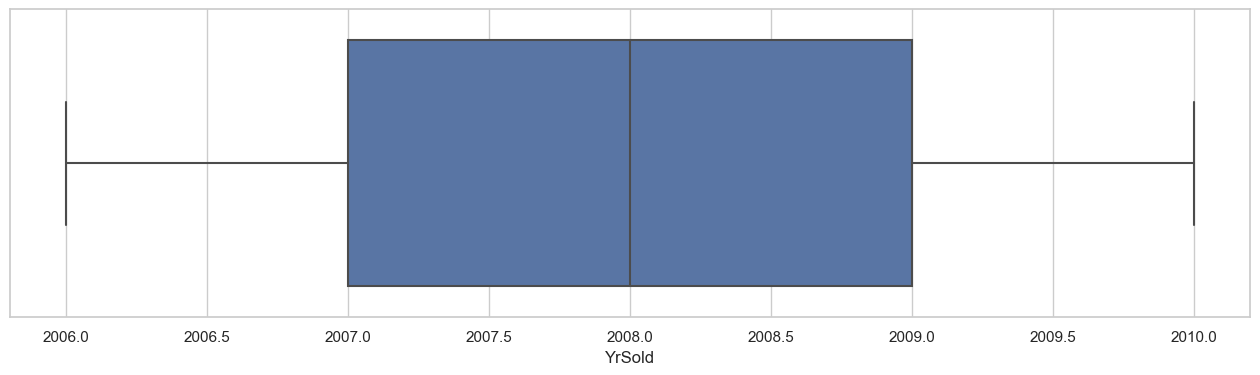

In [ ]:
numerical_df = test.select_dtypes(exclude=['object'])
#numerical_df = numerical_df.drop(["Id"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\si

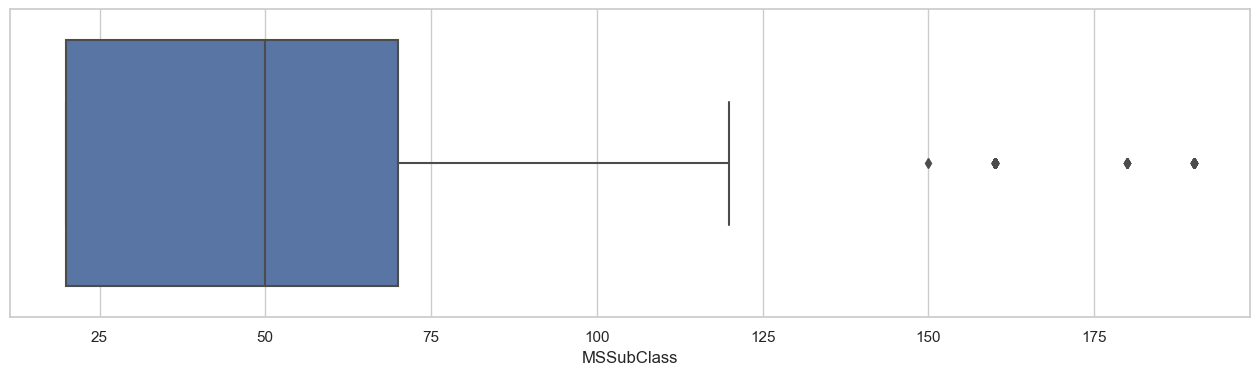

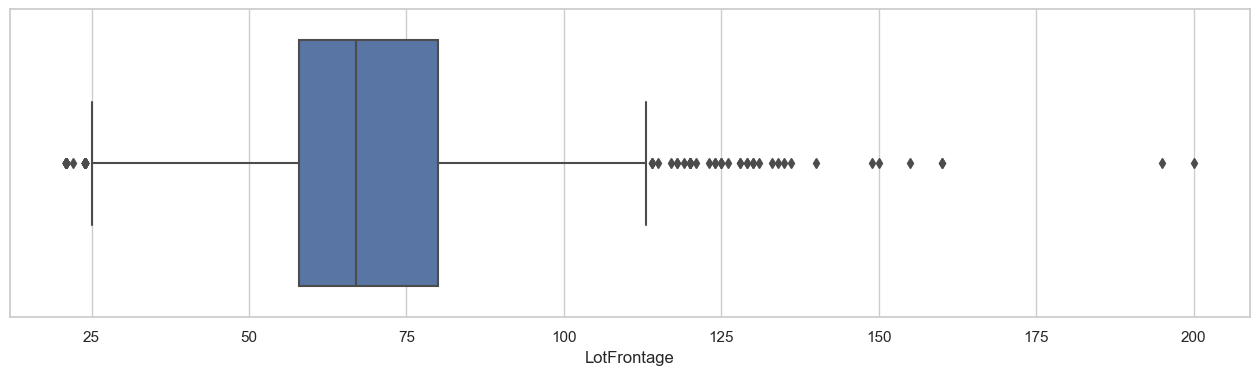

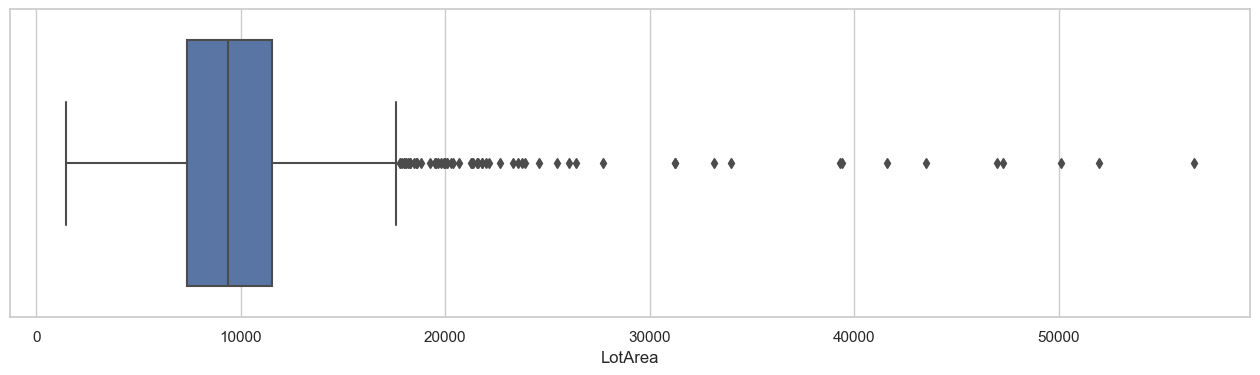

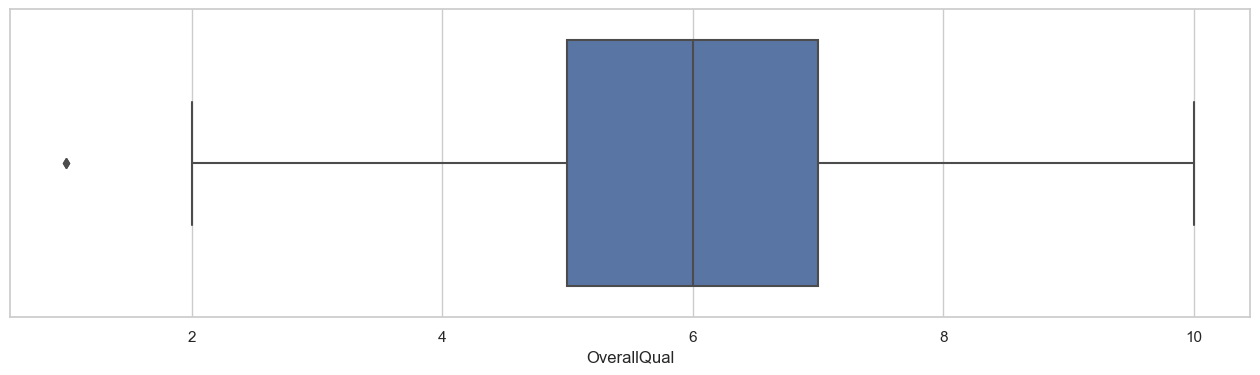

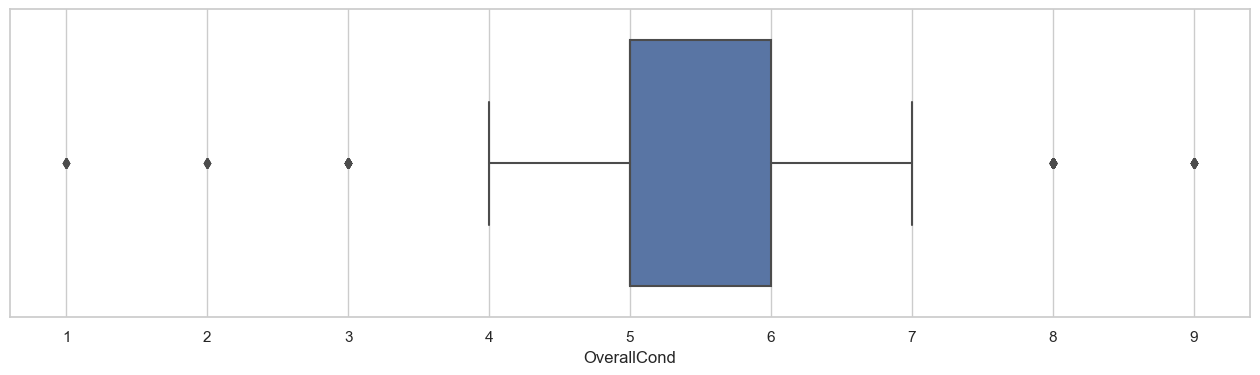

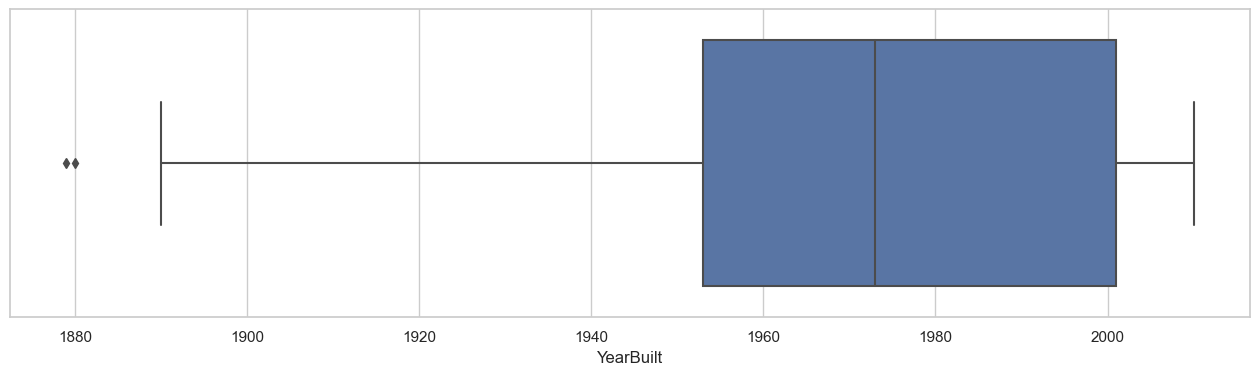

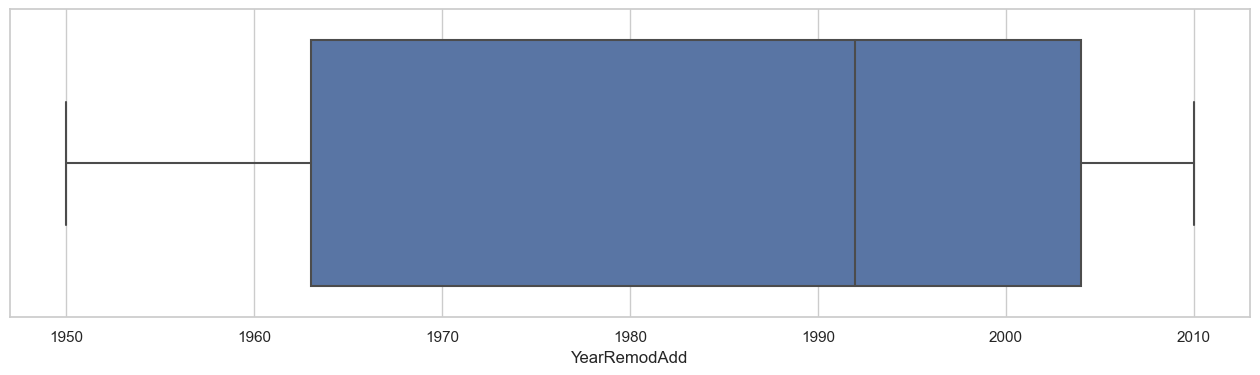

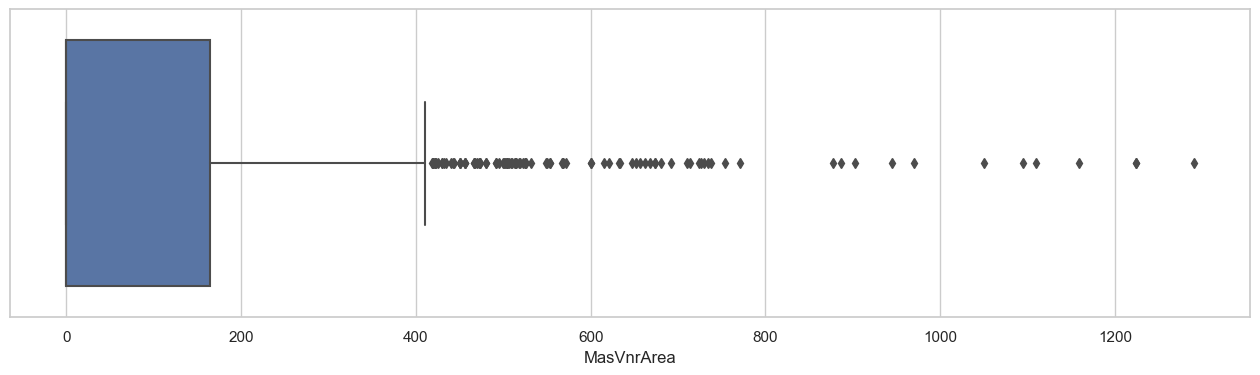

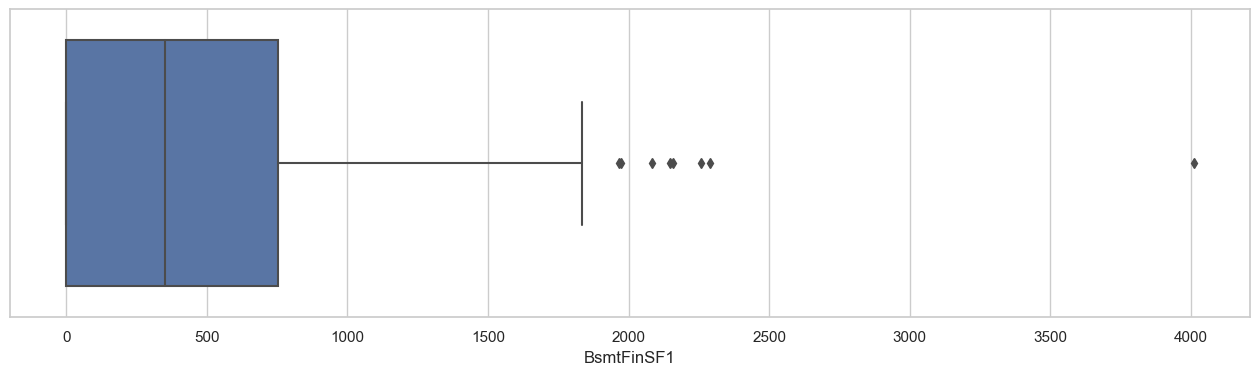

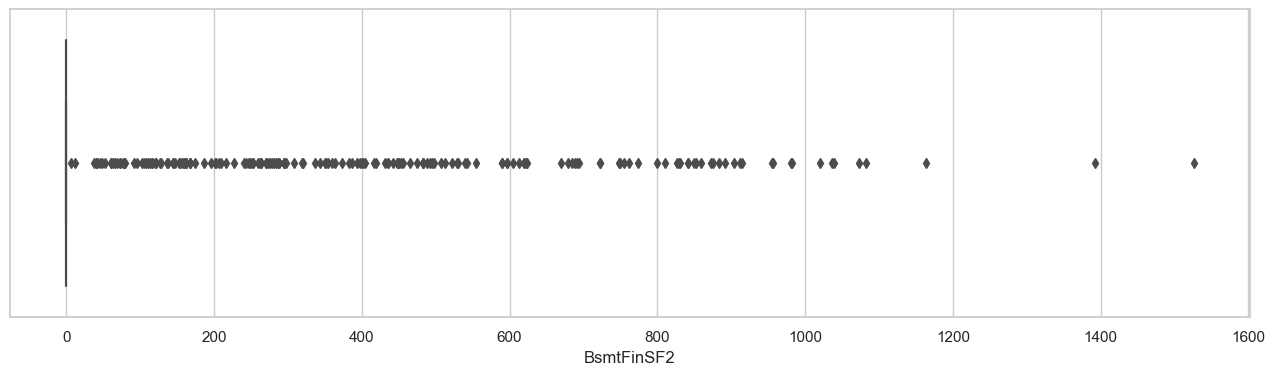

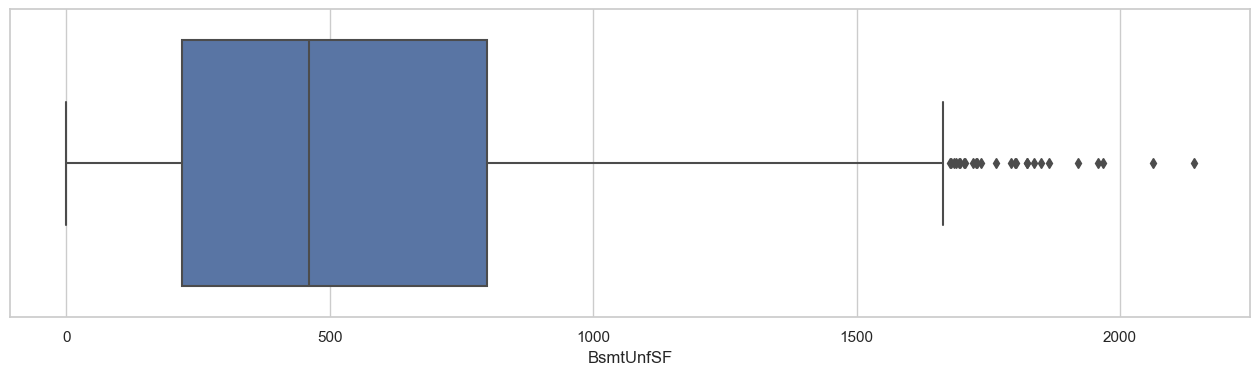

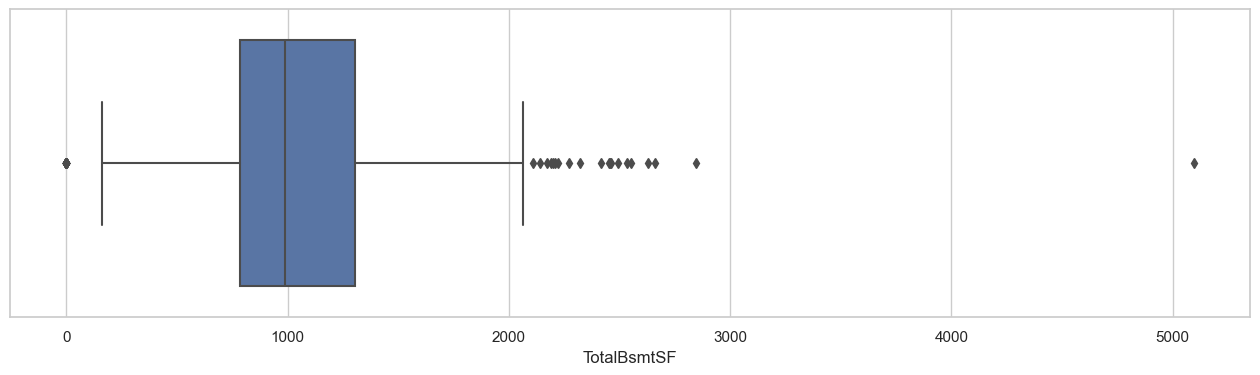

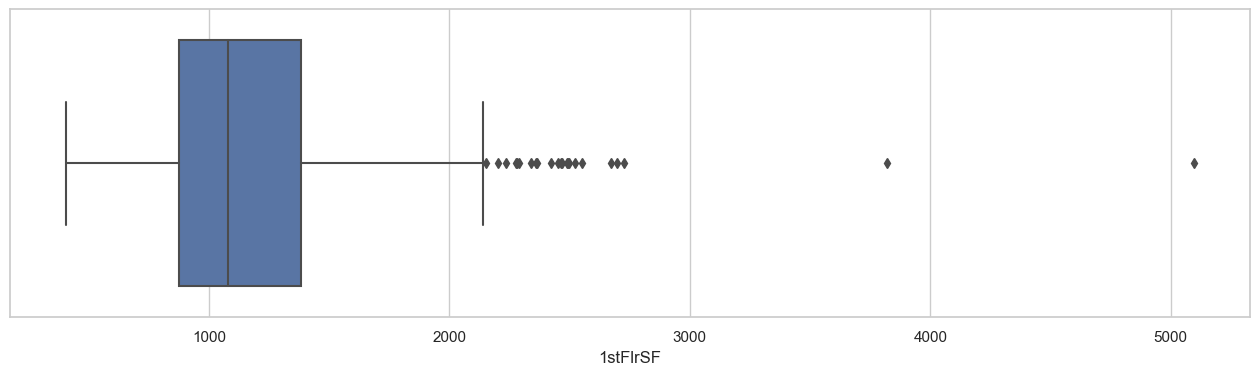

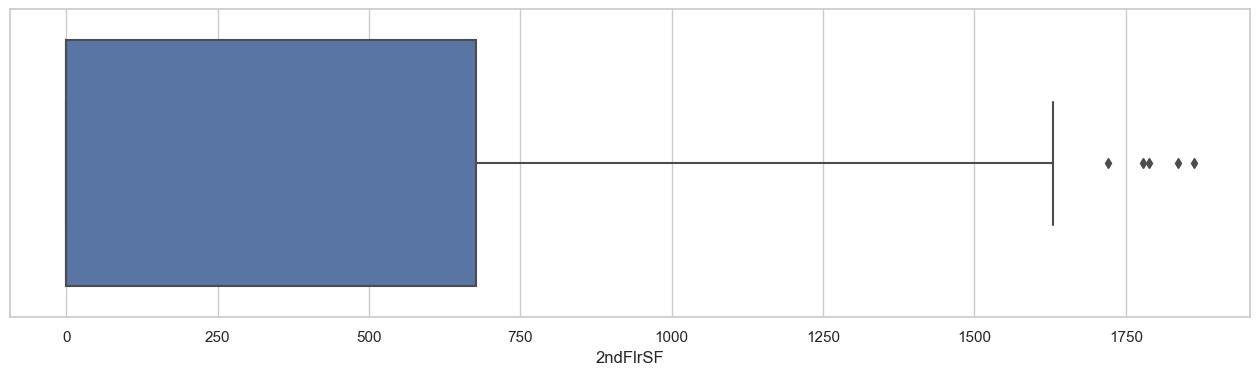

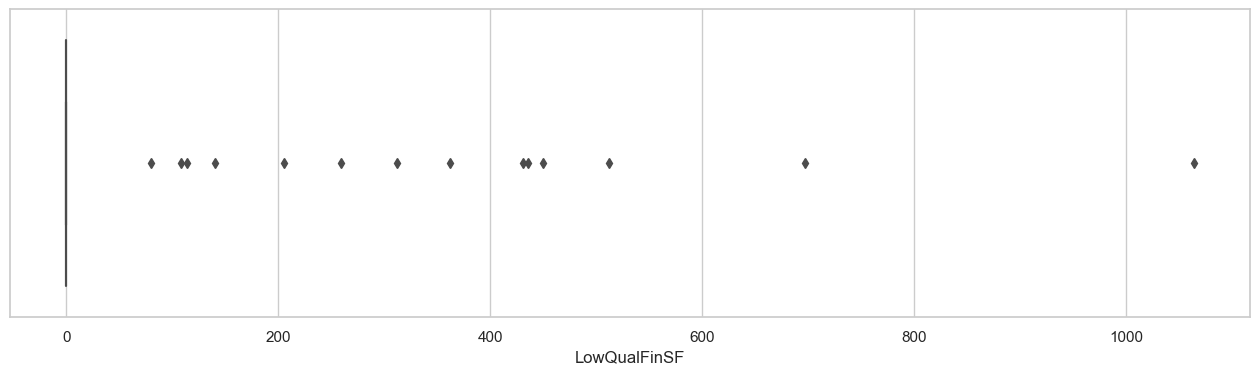

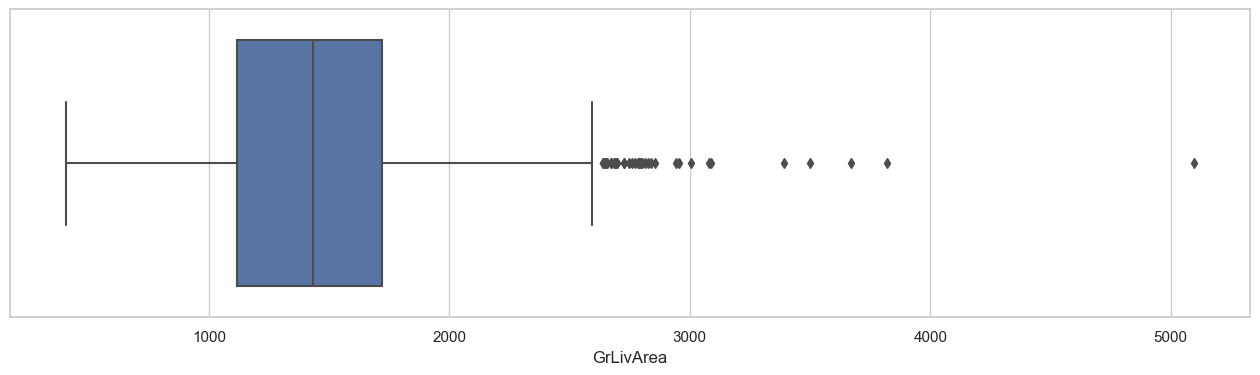

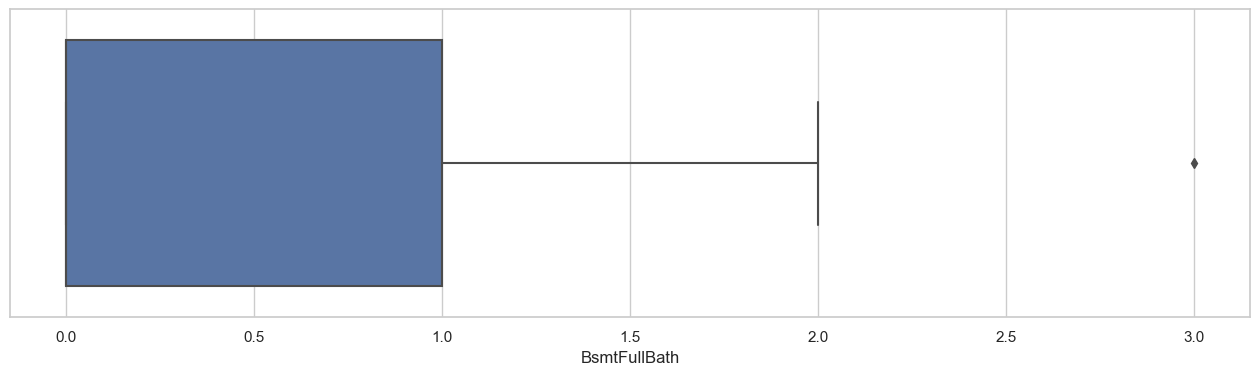

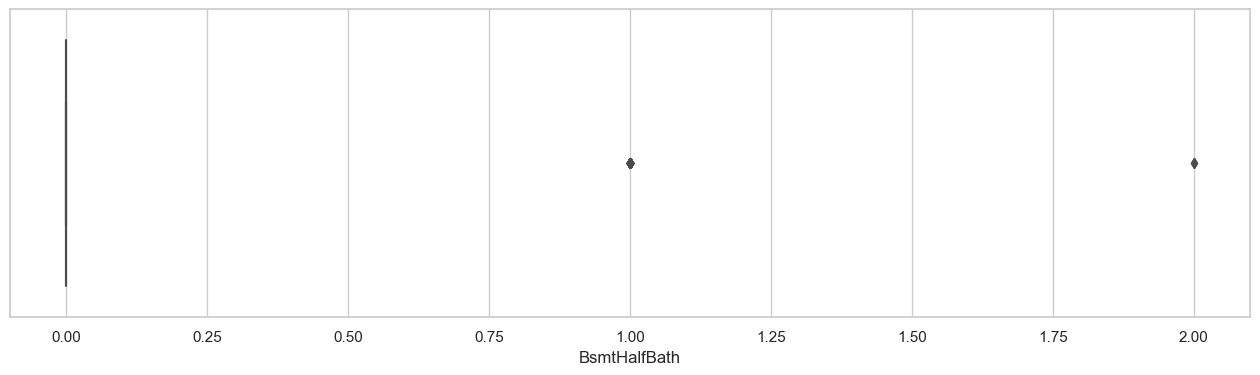

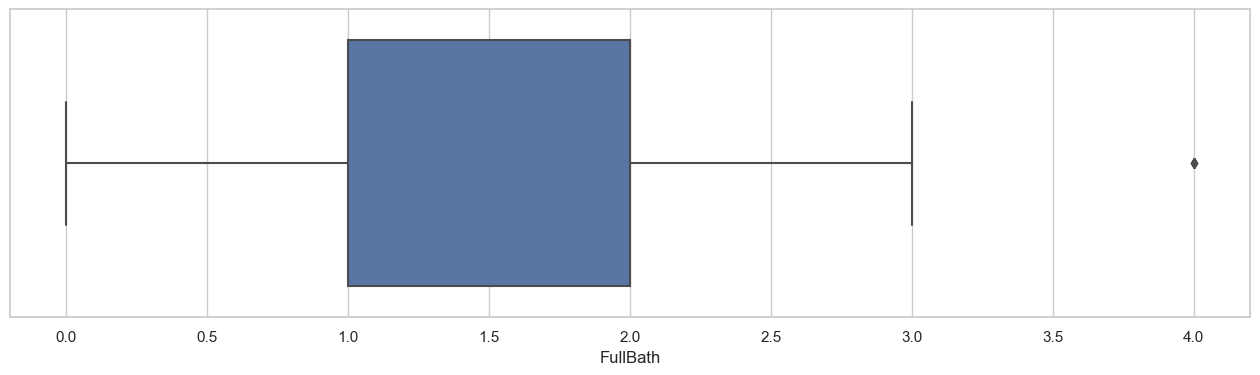

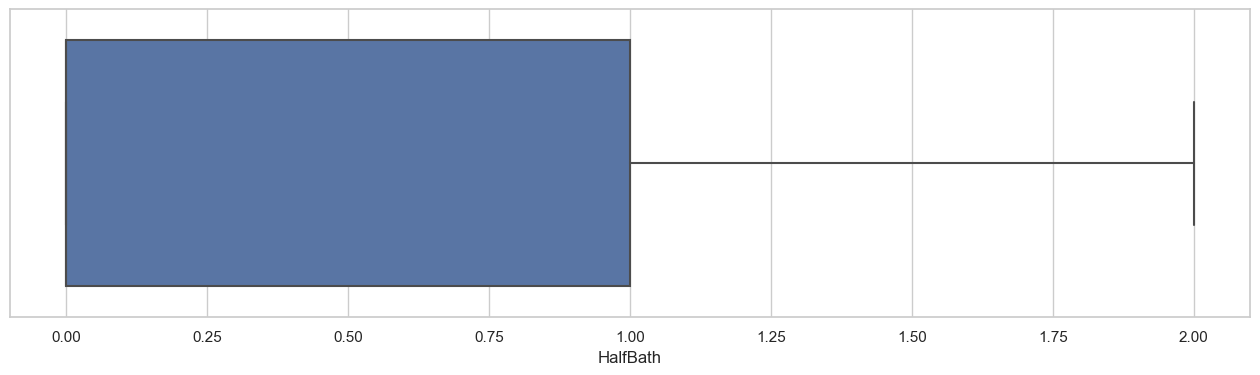

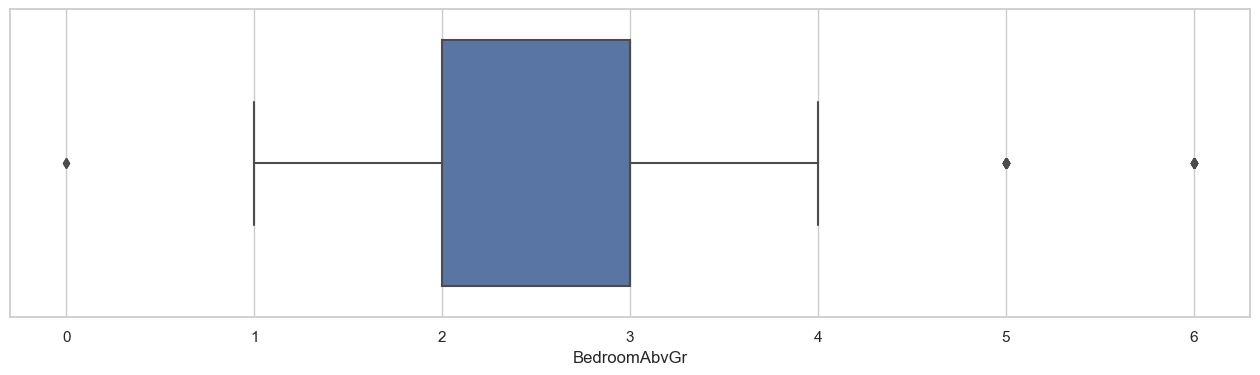

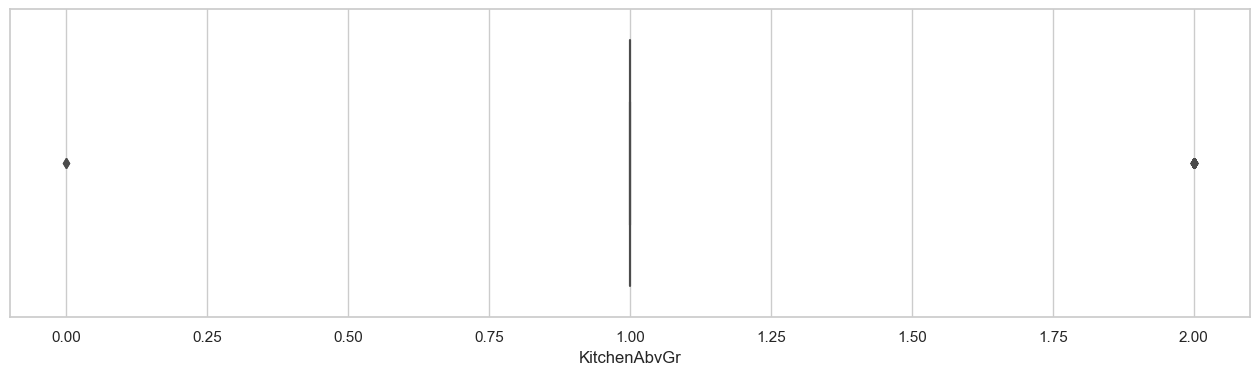

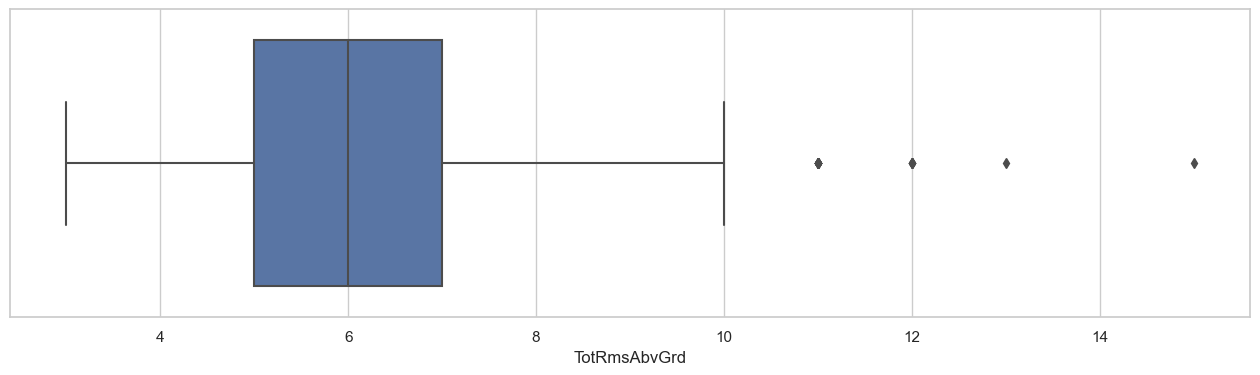

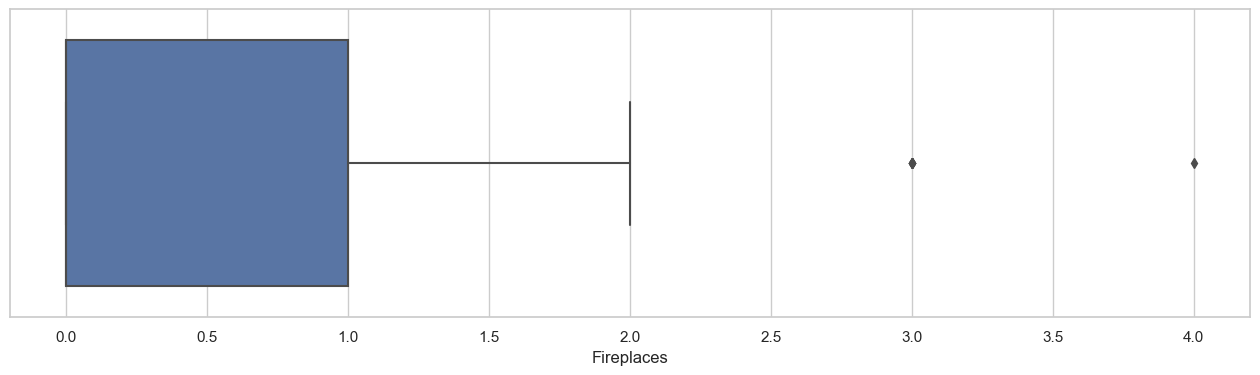

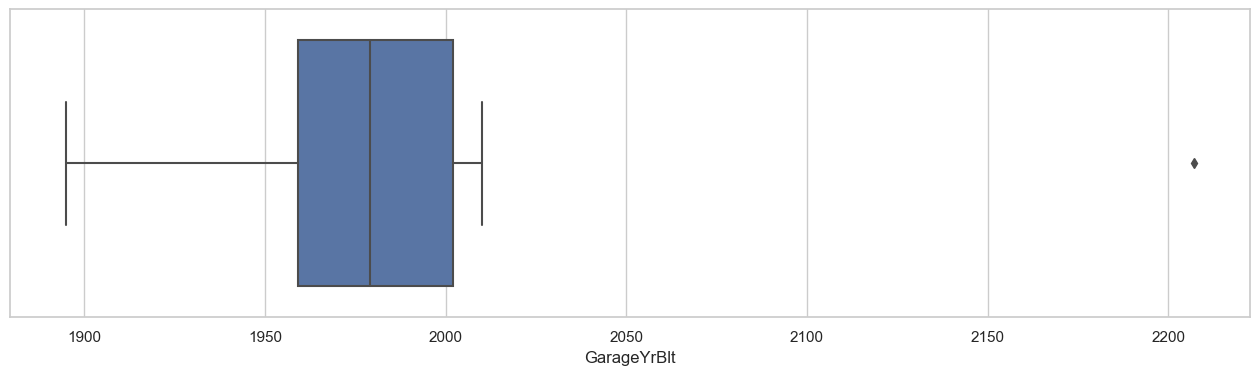

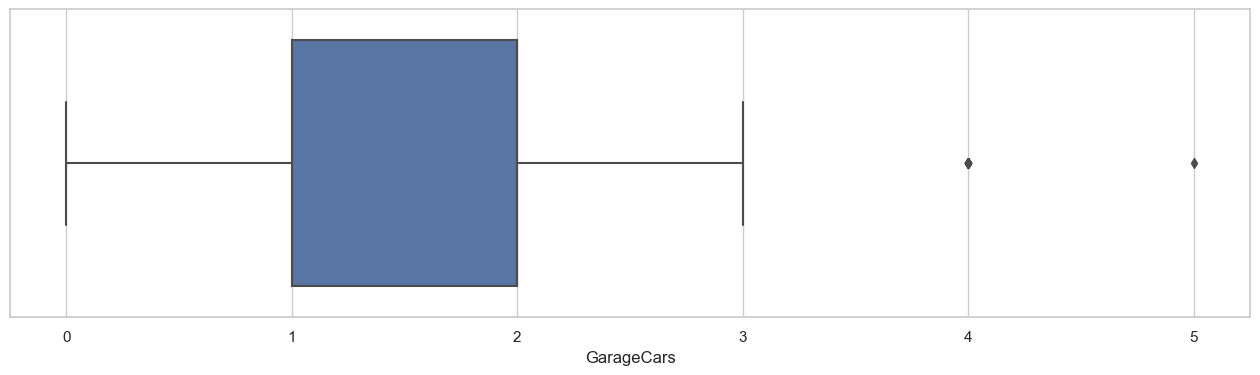

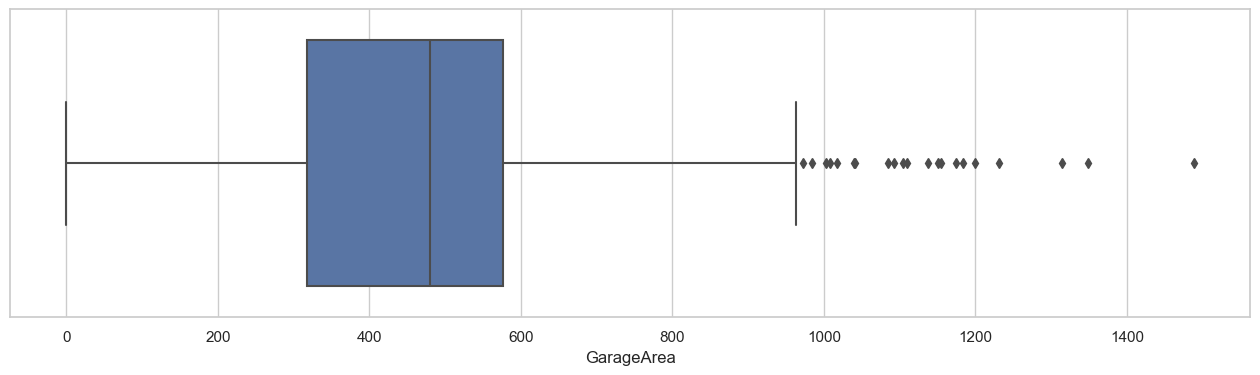

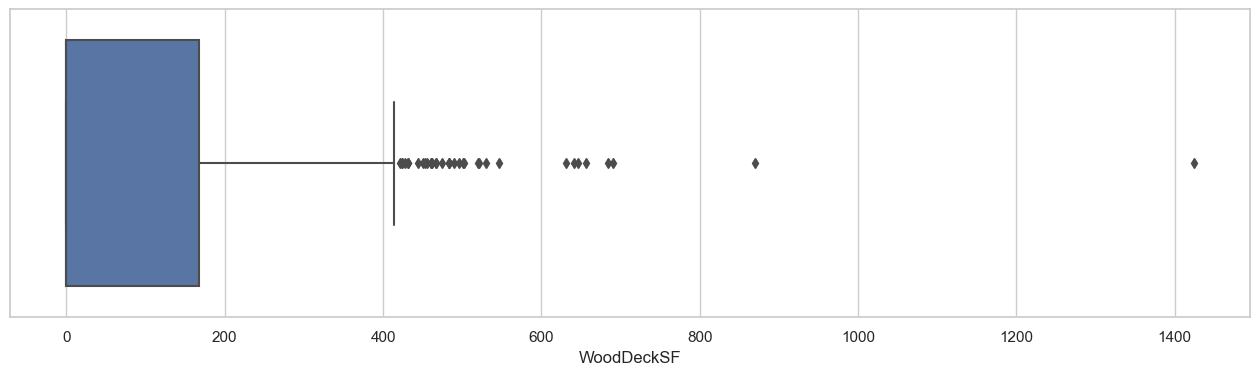

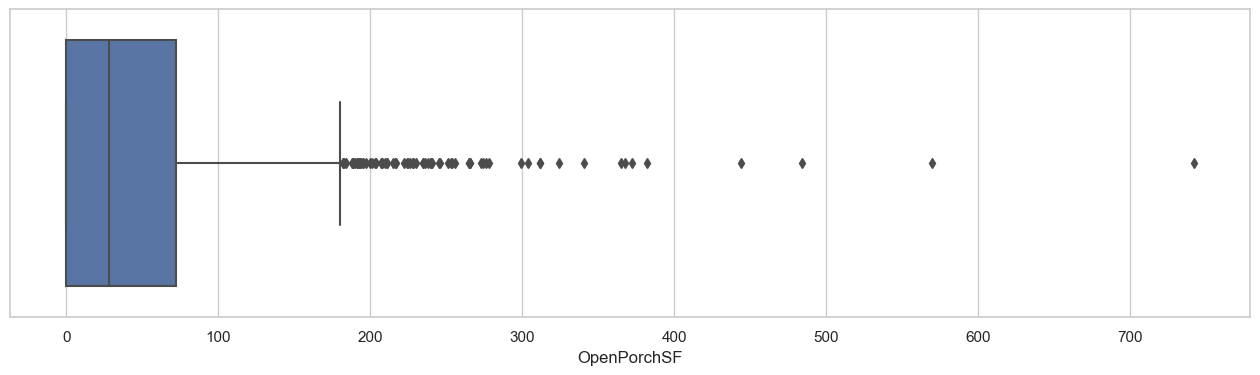

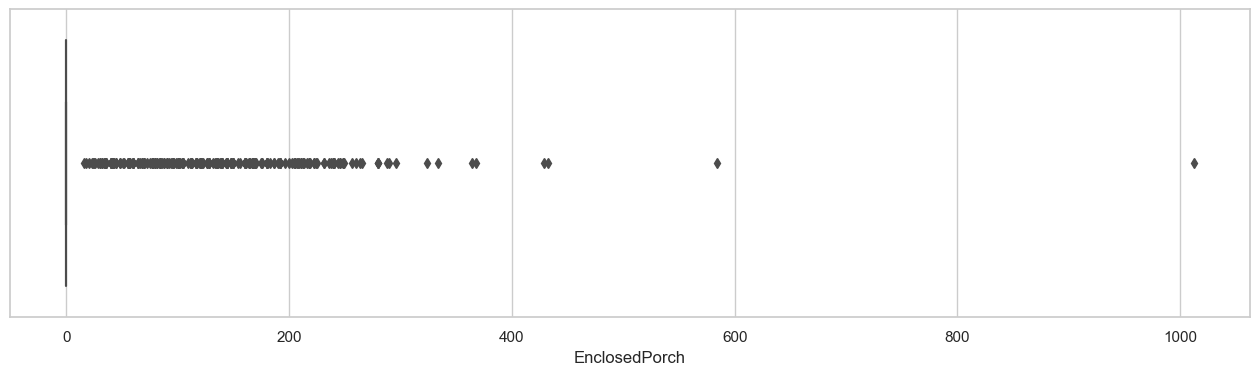

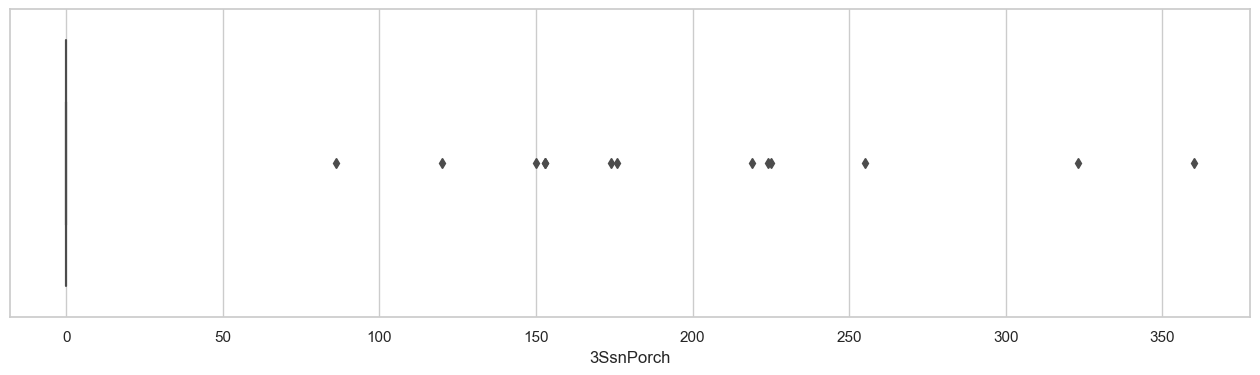

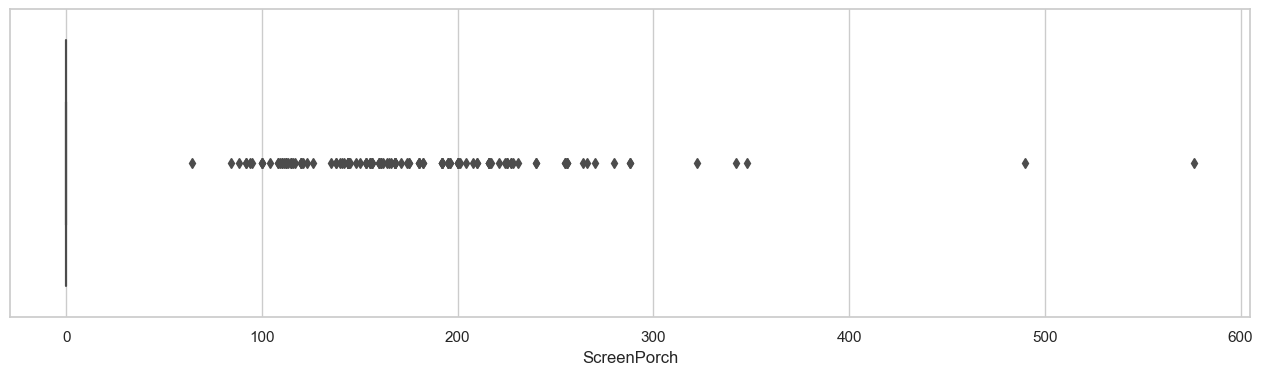

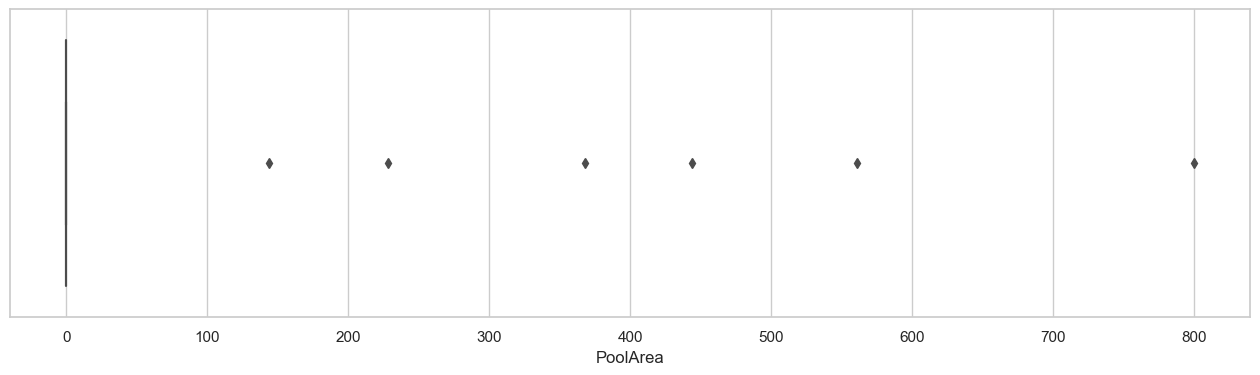

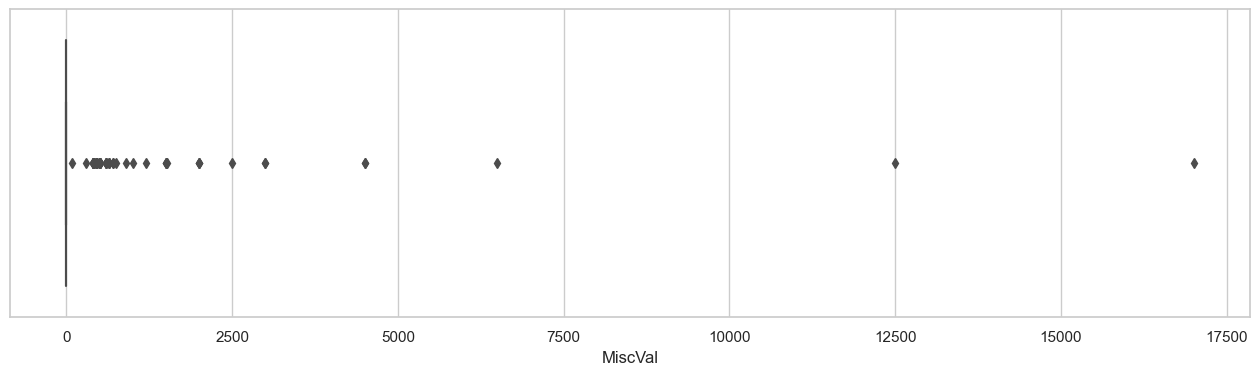

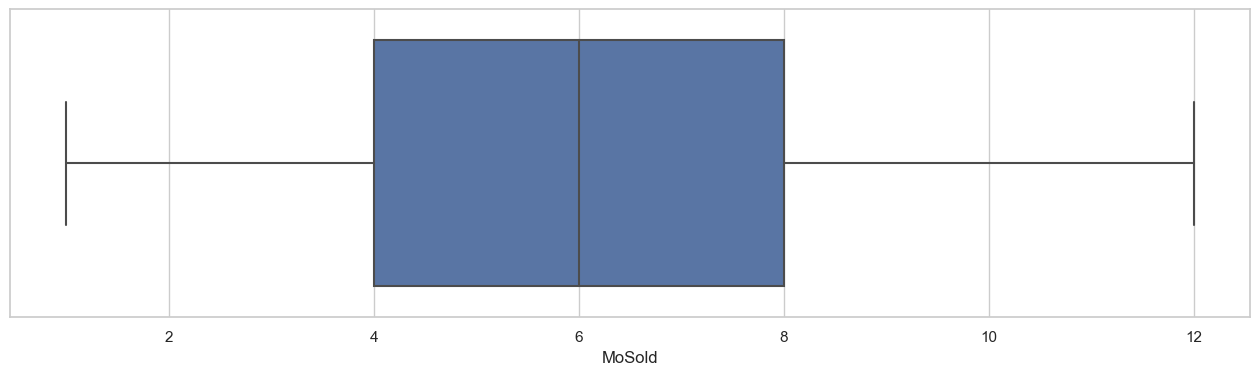

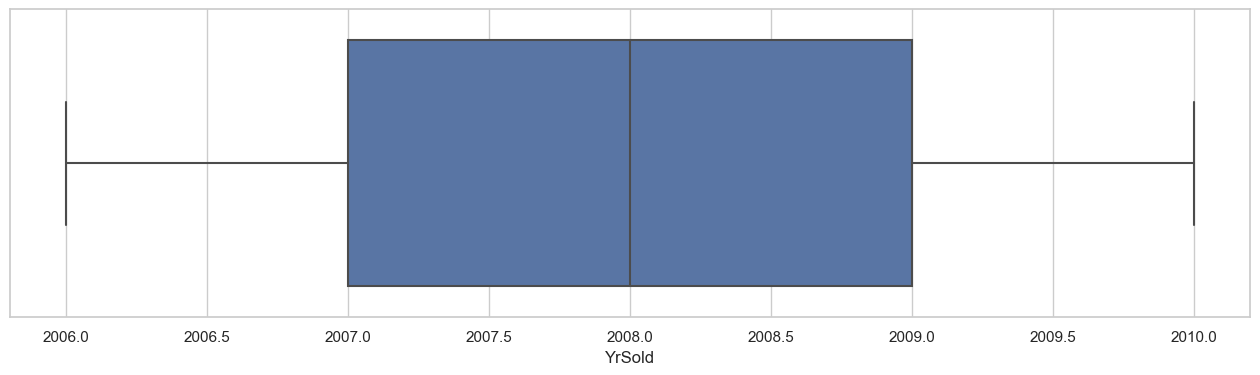

In [ ]:
numerical_df = test.select_dtypes(exclude=['object'])
#numerical_df = numerical_df.drop(["Id"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])

In [5]:
#Creating More Variables that Make Sense
#Total Area Sq Feet of the House
df['AllSF'] = df['TotalBsmtSF'] + df['GrLivArea']
#Ratio of Constructed Area vs TotalArea of the Lot
#df['RatioConstArea'] = (df['AllSF'] / df['LotArea']).round(2)
#Age of the House
cur_year = datetime.now().year
df["House_Age"] = cur_year - df["YearBuilt"]
#Age of Lates Remodalation
df["AgeRemodAdd"] = cur_year - df["YearRemodAdd"]
#Age When the House was Sold
df["Age_Sold"] = df["YrSold"] - df["YearBuilt"] 
#Calculating Total Porch Rea
df['TotalPorch']=df['EnclosedPorch'] + df['OpenPorchSF'] + df['ScreenPorch'] + df['3SsnPorch'] 
#Calculating Total Number of Bathrooms
df['TotalBath'] = df['FullBath']+ df['HalfBath']+ df['BsmtFullBath']+ df['BsmtHalfBath']

In [6]:
df.to_csv('check_columns1.csv', index=False)

In [7]:
df = df[["MSSubClass",
"MSZoning",
"LotFrontage",
"LotArea",
"Street",
"Alley",
"LotShape",
"LandContour",
"Utilities",
"LotConfig",
"LandSlope",
"Neighborhood",
"Condition1",
"Condition2",
"BldgType",
"HouseStyle",
"OverallQual",
"OverallCond",
#"YearBuilt",
#"YearRemodAdd",
"RoofStyle",
"RoofMatl",
"Exterior1st",
"Exterior2nd",
"MasVnrType",
"MasVnrArea",
"ExterQual",
"ExterCond",
"Foundation",
#"BsmtQual",
#"BsmtCond",
#"BsmtExposure",
#"BsmtFinType1",
#"BsmtFinSF1",
#"BsmtFinType2",
#"BsmtFinSF2",
#"BsmtUnfSF",
#"TotalBsmtSF",
"Heating",
"HeatingQC",
"CentralAir",
"Electrical",
#"1stFlrSF",
#"2ndFlrSF",
#"LowQualFinSF",
#"GrLivArea",
#"BsmtFullBath",
#"BsmtHalfBath",
#"FullBath",
#"HalfBath",
"BedroomAbvGr",
"KitchenAbvGr",
"KitchenQual",
"TotRmsAbvGrd",
"Functional",
"Fireplaces",
"FireplaceQu",
"GarageType",
"GarageYrBlt",
"GarageFinish",
"GarageCars",
"GarageArea",
"GarageQual",
"GarageCond",
"PavedDrive",
"WoodDeckSF",
#"OpenPorchSF",
#"EnclosedPorch",
#"3SsnPorch",
#"ScreenPorch",
"PoolArea",
"PoolQC",
"Fence",
"MiscFeature",
"MiscVal",
#"MoSold",
#"YrSold",
"SaleType",
"SaleCondition",
"SalePrice",
"Set",
"AllSF",
"House_Age",
"AgeRemodAdd",
"Age_Sold",
"TotalPorch",
"TotalBath"]]

In [8]:
def quality_encode(df, columns, encoding=None):
    if encoding is None:
        encoding = {'Ex':5, 
                    'Gd':4, 
                    'TA':3,
                    'Fa':2,
                    'Po':1}
    df[columns] = df[columns].replace(encoding).fillna(0)
    return df 

In [9]:
# backfill (filling values with the next valid value)
backfill_columns = ['GarageYrBlt', 'Electrical']
df[backfill_columns] = df[backfill_columns].fillna(method='bfill')

In [10]:
# fillna zero
fillna_zero_columns = ['GarageCars', 'GarageArea']
df.fillna(0, inplace=True)

In [11]:
# Standard encoder
quality_encoding_columns = ['GarageQual', 'GarageCond', 'FireplaceQu', 
                            'ExterCond', 'ExterQual',
                            'HeatingQC', 'KitchenQual']

df = quality_encode(df, quality_encoding_columns)

# Custom encoders
df = quality_encode(df, columns=['PavedDrive'],
                               encoding={'Y':3, 'P':2, 'N':1})
df = quality_encode(df, columns=['GarageFinish'],
                               encoding={'Fin':3, 'RFn':2, 'Unf':1})  
df = quality_encode(df, columns=['Fence'],
                               encoding={'MnPrv': 3, 'GdPrv': 4, 'GdWo': 2, 'MnWw':1})  
#df = quality_encode(df, columns=['BsmtExposure'],
#                               encoding={'Gd':4, 'Av':3, 'Mn':2, 'No':1}) 
#df = quality_encode(df, columns=['BsmtFinType1', 'BsmtFinType2'],
#                               encoding={'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3,'LwQ':2, 'Unf':1})                                 
df = quality_encode(df, columns=['Electrical'],
                               encoding={'SBrkr':3, 'FuseA':2, 'FuseF':1, 'FuseP':0, 'Mix':3} ) 
df = quality_encode(df, columns=['LandContour'],
                               encoding={'Low':0, 'HLS':1, 'Bnk':2, 'Lvl':3} )                                                                
df = quality_encode(df, columns=['LandSlope'],
                               encoding={'Sev':0, 'Mod':1, 'Gtl':2} ) 

In [12]:
# The Alley feature has the highest number of missing values
df['Alley'].value_counts(dropna=False)

0       2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [13]:
# missing values mean that there is no alley access, so we'll keep this information
df = pd.get_dummies(df, columns=['Alley'], prefix='Alley')

In [14]:
# Cleaning the misc feature
df['MiscFeature'].value_counts(dropna=False)

0       2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [15]:
df['HasMiscFeature'] = df['MiscFeature'].notna()
df.loc[df['GarageType']=='2Types', 'HasMiscFeature'] = True
df.drop(columns=['MiscFeature'], inplace=True)

In [16]:
#Check to See if any Null Values
if df.isnull().sum().sum() > 0: 
    print('Dataframe contains non-values.')
else:
    print('Fataframe does not contain non-values.')


Fataframe does not contain non-values.


In [17]:
df.drop(columns=['PoolQC'], inplace=True)

In [18]:
df['LotFrontage'].fillna(df['LotArea']**0.5, inplace=True)

In [19]:
df['MasVnrType'].fillna('None', inplace=True)

In [20]:
print(df['Condition1'].unique())
print(df['Condition2'].unique())

['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


In [21]:
def condition_merge(df):
    df = pd.get_dummies(df, columns=['Condition1', 'Condition2'], prefix='COND')
    df = df.groupby(level=0, axis=1).max()
    df['StreetProximity'] = df['COND_Artery']*2 + df['COND_Feedr']
    df['RailroadProximity'] = (df['COND_RRAe'] + df['COND_RRAe'])*2 + df['COND_RRNn'] + df['COND_RRNe']
    df['FeatureProximity'] = df['COND_PosA']*2 + df['COND_PosN']
    df.drop(columns=df.filter(regex='COND_').columns, inplace=True)
    return df

df = condition_merge(df)

In [22]:
def exterior_merge(df):
    df = pd.get_dummies(df, columns=['Exterior1st', 'Exterior2nd'], prefix='EXT')
    df = df.groupby(level=0, axis=1).max()
    return df
df = exterior_merge(df)

In [23]:
# Columns with just two values
df = pd.get_dummies(data=df, columns=['Utilities', 'CentralAir'], drop_first=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 83 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AgeRemodAdd        2919 non-null   int64  
 1   Age_Sold           2919 non-null   int64  
 2   AllSF              2919 non-null   float64
 3   Alley_0            2919 non-null   int64  
 4   Alley_Grvl         2919 non-null   int64  
 5   Alley_Pave         2919 non-null   int64  
 6   BedroomAbvGr       2919 non-null   int64  
 7   BldgType           2919 non-null   object 
 8   EXT_0              2919 non-null   int64  
 9   EXT_AsbShng        2919 non-null   int64  
 10  EXT_AsphShn        2919 non-null   int64  
 11  EXT_Brk Cmn        2919 non-null   int64  
 12  EXT_BrkComm        2919 non-null   int64  
 13  EXT_BrkFace        2919 non-null   int64  
 14  EXT_CBlock         2919 non-null   int64  
 15  EXT_CemntBd        2919 non-null   int64  
 16  EXT_CmentBd        2919 

In [25]:
# The rest will be one-hot-encoded
def encode_all_objects_cols(df):
    one_hot_columns = df.select_dtypes('object').columns
    df = pd.get_dummies(data=df, columns=one_hot_columns)
    return df
df = encode_all_objects_cols(df)

In [26]:
df.to_csv('check_columns.csv', index=False)

In [27]:
test_b, data_b = df[df['Set_test'].eq(1)], df[df['Set_train'].eq(1)]

In [28]:
test_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Columns: 185 entries, AgeRemodAdd to Street_Pave
dtypes: bool(1), float64(8), int64(54), uint8(122)
memory usage: 893.4 KB


In [29]:
test_b['SalePrice'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1459 entries, 1461 to 2919
Series name: SalePrice
Non-Null Count  Dtype  
--------------  -----  
1459 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


In [30]:
#Drop Columns of SalePrice
test_b = test_b.drop('SalePrice',axis=1)

In [31]:
test_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Columns: 184 entries, AgeRemodAdd to Street_Pave
dtypes: bool(1), float64(7), int64(54), uint8(122)
memory usage: 882.0 KB


In [32]:
data_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Columns: 185 entries, AgeRemodAdd to Street_Pave
dtypes: bool(1), float64(8), int64(54), uint8(122)
memory usage: 894.0 KB


In [33]:
y = data_b.pop("SalePrice")

In [34]:
#Run Cross validation for each Model 
def run_cvs(X,y):
    
    baseline = ElasticNet(random_state=0,max_iter=10e7,alpha=0.0003)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("ENet avg:",np.mean(baseline_score))
    
#    baseline = Ridge(alpha = 1, random_state=0)
#    baseline_score = cross_val_score(baseline, X, y, cv=10)
#    print("Ridge avg:",np.mean(baseline_score))   

#    baseline = Lasso(alpha = 0.0001,random_state=0)
#    baseline_score = cross_val_score(baseline, X, y, cv=10)
#    print("Lasso avg:",np.mean(baseline_score))

#    baseline = KernelRidge(alpha=0.1)
#    baseline_score = cross_val_score(baseline, X, y, cv=10)
#    print("KRR avg:",np.mean(baseline_score))

#    baseline = lgb.LGBMRegressor(learning_rate=0.01,num_leaves=4,n_estimators=2000, random_state=0)
#    baseline_score = cross_val_score(baseline, X, y, cv=10)
#    print("LGBM avg:",np.mean(baseline_score))

    baseline = xg.XGBRegressor(learning_rate=0.01,n_estimators=2000, subsample=0.7,colsample_bytree=0.7,random_state=0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("XGB avg:",np.mean(baseline_score))

    baseline = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.02,max_depth=4, max_features='sqrt',
                min_samples_leaf=15, min_samples_split=50,loss='huber', random_state = 0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("GBR avg:",np.mean(baseline_score))

    baseline = CatBoostRegressor(random_state=0,verbose=0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("CatB avg:",np.mean(baseline_score))

    
run_cvs(data_b,y) 

ENet avg: 0.8329209521725689
XGB avg: 0.89697047596347
GBR avg: 0.8805750591297515
CatB avg: 0.9017079131799599


In [36]:

#Combine 4 models (2 tree-based AND 2 linear Models) 
def make_submission(X_train, y_train, X_test):    
    sub_df = pd.read_csv('sample_submission.csv', index_col = "Id")
    
    #ridge = Ridge(alpha = 1, random_state=0).fit(X_train,y_train)
    #ridge_preds_log=ridge.predict(X_test)
    
    #lasso = Lasso(alpha = 0.0001,random_state=0).fit(X_train,y_train)
    #lasso_preds_log=lasso.predict(X_test)

    xgb = xg.XGBRegressor(learning_rate=0.01,n_estimators=2000, subsample=0.7,colsample_bytree=0.7,random_state=0).fit(X_train,y_train)
    xgb_preds=xgb.predict(X_test)

    catB = CatBoostRegressor(random_state=0,verbose=0).fit(X_train,y_train)
    catB_preds=catB.predict(X_test)

    enet = ElasticNet(alpha=0.0001, l1_ratio=0.5, random_state=0).fit(X_train, y_train)
    enet_preds = enet.predict(X_test)

    gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0).fit(X_train, y_train)
    gbr_preds = gbr.predict(X_test)
    
    avg_models=(xgb_preds + catB_preds + enet_preds + gbr_preds)/4
    sub_df['SalePrice'] = (avg_models)
    sub_df.to_csv("last_model_3_submission.csv")
    
make_submission(data_b,y,test_b)    

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.887e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(
